# Deep Hedging for nonlinear generalized affine processes

# Example: Path-dependent Option, Lookback Call

Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import style
style.use('ggplot')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from mpl_toolkits.mplot3d import Axes3D
from Functions import*
from matplotlib import rcParams

Execute if it should be run on a GPU

In [2]:
#physical_devices = tf.config.list_physical_devices('GPU') 

Write a function to generate paths of the SDE
$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^\gamma dW_t,~t\geq 0,\\
X_0 = x_0
$$
using the Euler-Maruyama Method, i.e., through
$$
X_{i+1} = X_i+(b_0+b_1 X_i) \Delta t_i +(a_0+a_1 X_i)^\gamma  \Delta W_i,~i=1,\dots,n
$$
with $\Delta t_i = T/n$ and $\Delta W_i = W_{(i+1)T/n}-W_{iT/n}$ and $X_0 = x_0$

Write a function to determine the optimal hedge based on a deep learning approach

Test it in a purely nonlinear setting:

$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^\gamma dW_t
$$

for 

\begin{align}
a_0 &\in [0.3,0.7] \\
a_1 &\in [0.4,0.6] \\
b_0 &\in [-0.2,0.2] \\
b_1 &\in [-0.1,0.1] \\
\gamma &\in [0.5,1.5]
\end{align}

We specify the option Payoff:
$$
\Phi(X)= \max((X)_{0\leq t \leq T}-12)^+
$$

# Part 1)
# Markovian Setting: We let the hedge only depend on spot price and time

In [3]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
a_0 = [0.3,0.7]
a_1 = [0.4,0.6]
b_0 = [-0.2,0.2]
b_1 = [-0.1,0.1]
gamma = [0.5,1.5]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(tf.math.reduce_max(path)-12)

price, hedge = optimal_hedge(derivative,a_0,a_1,b_0,b_1,gamma,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)

  0%|          | 11/10000 [00:04<1:00:05,  2.77it/s]

Iteration:10, Price of Hedge: 0.3105247914791107, Loss: 0.3421262800693512


  0%|          | 21/10000 [00:09<1:35:55,  1.73it/s]

Iteration:20, Price of Hedge: 0.3140961825847626, Loss: 0.39766964316368103


  0%|          | 31/10000 [00:15<1:49:35,  1.52it/s]

Iteration:30, Price of Hedge: 0.32335636019706726, Loss: 0.28645867109298706


  0%|          | 41/10000 [00:22<1:49:58,  1.51it/s]

Iteration:40, Price of Hedge: 0.33449599146842957, Loss: 0.35751891136169434


  1%|          | 51/10000 [00:29<1:53:19,  1.46it/s]

Iteration:50, Price of Hedge: 0.34312549233436584, Loss: 0.3503749966621399


  1%|          | 61/10000 [00:36<1:51:28,  1.49it/s]

Iteration:60, Price of Hedge: 0.3506845533847809, Loss: 0.2586897909641266


  1%|          | 71/10000 [00:43<1:54:09,  1.45it/s]

Iteration:70, Price of Hedge: 0.3571028411388397, Loss: 0.2182178795337677


  1%|          | 81/10000 [00:50<1:55:19,  1.43it/s]

Iteration:80, Price of Hedge: 0.3602868318557739, Loss: 0.21482405066490173


  1%|          | 91/10000 [00:56<1:37:27,  1.69it/s]

Iteration:90, Price of Hedge: 0.3618035912513733, Loss: 0.2886146306991577


  1%|          | 101/10000 [01:02<1:48:51,  1.52it/s]

Iteration:100, Price of Hedge: 0.3639848232269287, Loss: 0.2532727122306824


  1%|          | 111/10000 [01:09<1:52:32,  1.46it/s]

Iteration:110, Price of Hedge: 0.3649807572364807, Loss: 0.2485056221485138


  1%|          | 121/10000 [01:16<1:48:22,  1.52it/s]

Iteration:120, Price of Hedge: 0.36344224214553833, Loss: 0.27119919657707214


  1%|▏         | 131/10000 [01:22<1:46:51,  1.54it/s]

Iteration:130, Price of Hedge: 0.3625337481498718, Loss: 0.18682235479354858


  1%|▏         | 141/10000 [01:29<1:45:25,  1.56it/s]

Iteration:140, Price of Hedge: 0.35965535044670105, Loss: 0.27535367012023926


  2%|▏         | 151/10000 [01:35<1:41:26,  1.62it/s]

Iteration:150, Price of Hedge: 0.35881924629211426, Loss: 0.2789706587791443


  2%|▏         | 161/10000 [01:42<1:43:44,  1.58it/s]

Iteration:160, Price of Hedge: 0.3593069911003113, Loss: 0.27465856075286865


  2%|▏         | 171/10000 [01:49<1:56:51,  1.40it/s]

Iteration:170, Price of Hedge: 0.3616958260536194, Loss: 0.17147378623485565


  2%|▏         | 181/10000 [01:55<1:53:34,  1.44it/s]

Iteration:180, Price of Hedge: 0.3604394495487213, Loss: 0.25489410758018494


  2%|▏         | 191/10000 [02:02<1:51:21,  1.47it/s]

Iteration:190, Price of Hedge: 0.35973799228668213, Loss: 0.2827532887458801


  2%|▏         | 201/10000 [02:09<1:53:05,  1.44it/s]

Iteration:200, Price of Hedge: 0.35691606998443604, Loss: 0.23858465254306793


  2%|▏         | 211/10000 [02:16<1:53:26,  1.44it/s]

Iteration:210, Price of Hedge: 0.35398101806640625, Loss: 0.13175776600837708


  2%|▏         | 221/10000 [02:22<1:48:36,  1.50it/s]

Iteration:220, Price of Hedge: 0.3553091287612915, Loss: 0.21705853939056396


  2%|▏         | 231/10000 [02:29<1:53:28,  1.43it/s]

Iteration:230, Price of Hedge: 0.35943934321403503, Loss: 0.15045255422592163


  2%|▏         | 241/10000 [02:36<1:52:38,  1.44it/s]

Iteration:240, Price of Hedge: 0.3621823191642761, Loss: 0.3087676465511322


  3%|▎         | 251/10000 [02:43<1:47:21,  1.51it/s]

Iteration:250, Price of Hedge: 0.36360371112823486, Loss: 0.13578087091445923


  3%|▎         | 261/10000 [02:49<1:50:46,  1.47it/s]

Iteration:260, Price of Hedge: 0.36208754777908325, Loss: 0.1735217422246933


  3%|▎         | 271/10000 [02:56<1:41:43,  1.59it/s]

Iteration:270, Price of Hedge: 0.3588077127933502, Loss: 0.25656992197036743


  3%|▎         | 281/10000 [03:02<1:44:50,  1.54it/s]

Iteration:280, Price of Hedge: 0.3589327931404114, Loss: 0.3607698678970337


  3%|▎         | 291/10000 [03:08<1:44:48,  1.54it/s]

Iteration:290, Price of Hedge: 0.36339715123176575, Loss: 0.19231243431568146


  3%|▎         | 301/10000 [03:15<1:38:23,  1.64it/s]

Iteration:300, Price of Hedge: 0.3663148283958435, Loss: 0.15379762649536133


  3%|▎         | 311/10000 [03:22<1:50:09,  1.47it/s]

Iteration:310, Price of Hedge: 0.3631046712398529, Loss: 0.21307474374771118


  3%|▎         | 321/10000 [03:28<1:47:28,  1.50it/s]

Iteration:320, Price of Hedge: 0.3638063073158264, Loss: 0.2557028532028198


  3%|▎         | 331/10000 [03:35<1:49:25,  1.47it/s]

Iteration:330, Price of Hedge: 0.36566030979156494, Loss: 0.2665063142776489


  3%|▎         | 341/10000 [03:42<1:51:27,  1.44it/s]

Iteration:340, Price of Hedge: 0.36190104484558105, Loss: 0.17854344844818115


  4%|▎         | 351/10000 [03:49<1:46:38,  1.51it/s]

Iteration:350, Price of Hedge: 0.3627234995365143, Loss: 0.20897501707077026


  4%|▎         | 361/10000 [03:55<1:46:18,  1.51it/s]

Iteration:360, Price of Hedge: 0.3642158806324005, Loss: 0.21682289242744446


  4%|▎         | 371/10000 [04:02<1:43:18,  1.55it/s]

Iteration:370, Price of Hedge: 0.3678199350833893, Loss: 0.2574504017829895


  4%|▍         | 381/10000 [04:09<1:48:00,  1.48it/s]

Iteration:380, Price of Hedge: 0.371743768453598, Loss: 0.22577379643917084


  4%|▍         | 391/10000 [04:15<1:47:46,  1.49it/s]

Iteration:390, Price of Hedge: 0.3741571605205536, Loss: 0.36742889881134033


  4%|▍         | 401/10000 [04:22<1:42:39,  1.56it/s]

Iteration:400, Price of Hedge: 0.37061089277267456, Loss: 0.24125856161117554


  4%|▍         | 411/10000 [04:28<1:47:12,  1.49it/s]

Iteration:410, Price of Hedge: 0.36457058787345886, Loss: 0.15986891090869904


  4%|▍         | 421/10000 [04:35<1:47:52,  1.48it/s]

Iteration:420, Price of Hedge: 0.35950061678886414, Loss: 0.0927557647228241


  4%|▍         | 431/10000 [04:42<1:46:07,  1.50it/s]

Iteration:430, Price of Hedge: 0.35892993211746216, Loss: 0.24397742748260498


  4%|▍         | 441/10000 [04:48<1:49:00,  1.46it/s]

Iteration:440, Price of Hedge: 0.3622606098651886, Loss: 0.2769377827644348


  5%|▍         | 451/10000 [04:55<1:46:22,  1.50it/s]

Iteration:450, Price of Hedge: 0.3613528311252594, Loss: 0.2984209954738617


  5%|▍         | 461/10000 [05:02<1:38:44,  1.61it/s]

Iteration:460, Price of Hedge: 0.3559538424015045, Loss: 0.21208685636520386


  5%|▍         | 471/10000 [05:08<1:43:58,  1.53it/s]

Iteration:470, Price of Hedge: 0.35564401745796204, Loss: 0.20512649416923523


  5%|▍         | 481/10000 [05:15<1:48:48,  1.46it/s]

Iteration:480, Price of Hedge: 0.35871419310569763, Loss: 0.2143862247467041


  5%|▍         | 491/10000 [05:22<1:51:09,  1.43it/s]

Iteration:490, Price of Hedge: 0.3623639941215515, Loss: 0.1363697350025177


  5%|▌         | 501/10000 [05:29<1:51:18,  1.42it/s]

Iteration:500, Price of Hedge: 0.3656856119632721, Loss: 0.2118922770023346


  5%|▌         | 511/10000 [05:36<1:46:54,  1.48it/s]

Iteration:510, Price of Hedge: 0.36879822611808777, Loss: 0.1416897177696228


  5%|▌         | 521/10000 [05:42<1:39:19,  1.59it/s]

Iteration:520, Price of Hedge: 0.3663596510887146, Loss: 0.15022188425064087


  5%|▌         | 531/10000 [05:49<1:48:30,  1.45it/s]

Iteration:530, Price of Hedge: 0.3618043065071106, Loss: 0.18386071920394897


  5%|▌         | 541/10000 [05:56<1:46:44,  1.48it/s]

Iteration:540, Price of Hedge: 0.3543894290924072, Loss: 0.3661520779132843


  6%|▌         | 551/10000 [06:02<1:43:41,  1.52it/s]

Iteration:550, Price of Hedge: 0.35212868452072144, Loss: 0.134004145860672


  6%|▌         | 561/10000 [06:08<1:37:50,  1.61it/s]

Iteration:560, Price of Hedge: 0.3516642153263092, Loss: 0.20812346041202545


  6%|▌         | 571/10000 [06:15<1:42:54,  1.53it/s]

Iteration:570, Price of Hedge: 0.3541180491447449, Loss: 0.12947621941566467


  6%|▌         | 581/10000 [06:22<1:41:02,  1.55it/s]

Iteration:580, Price of Hedge: 0.3562968969345093, Loss: 0.21621659398078918


  6%|▌         | 591/10000 [06:28<1:41:10,  1.55it/s]

Iteration:590, Price of Hedge: 0.36118707060813904, Loss: 0.1709563434123993


  6%|▌         | 601/10000 [06:35<1:47:31,  1.46it/s]

Iteration:600, Price of Hedge: 0.36319103837013245, Loss: 0.19468119740486145


  6%|▌         | 611/10000 [06:42<1:43:14,  1.52it/s]

Iteration:610, Price of Hedge: 0.3633705675601959, Loss: 0.18799647688865662


  6%|▌         | 621/10000 [06:48<1:44:34,  1.49it/s]

Iteration:620, Price of Hedge: 0.3555772006511688, Loss: 0.12353187054395676


  6%|▋         | 631/10000 [06:55<1:38:32,  1.58it/s]

Iteration:630, Price of Hedge: 0.35205352306365967, Loss: 0.1269797682762146


  6%|▋         | 641/10000 [07:01<1:44:07,  1.50it/s]

Iteration:640, Price of Hedge: 0.35566791892051697, Loss: 0.10855536162853241


  7%|▋         | 651/10000 [07:08<1:41:37,  1.53it/s]

Iteration:650, Price of Hedge: 0.3617185950279236, Loss: 0.16241994500160217


  7%|▋         | 661/10000 [07:15<1:50:26,  1.41it/s]

Iteration:660, Price of Hedge: 0.3583749830722809, Loss: 0.14542795717716217


  7%|▋         | 671/10000 [07:22<1:45:41,  1.47it/s]

Iteration:670, Price of Hedge: 0.35721370577812195, Loss: 0.2309214323759079


  7%|▋         | 681/10000 [07:28<1:48:45,  1.43it/s]

Iteration:680, Price of Hedge: 0.3653116822242737, Loss: 0.1705392599105835


  7%|▋         | 691/10000 [07:35<1:31:29,  1.70it/s]

Iteration:690, Price of Hedge: 0.36197715997695923, Loss: 0.13815179467201233


  7%|▋         | 701/10000 [07:41<1:43:32,  1.50it/s]

Iteration:700, Price of Hedge: 0.35979828238487244, Loss: 0.12338681519031525


  7%|▋         | 711/10000 [07:48<1:46:06,  1.46it/s]

Iteration:710, Price of Hedge: 0.35659560561180115, Loss: 0.12214615941047668


  7%|▋         | 721/10000 [07:55<1:40:22,  1.54it/s]

Iteration:720, Price of Hedge: 0.35834842920303345, Loss: 0.12023375183343887


  7%|▋         | 731/10000 [08:01<1:41:02,  1.53it/s]

Iteration:730, Price of Hedge: 0.36445918679237366, Loss: 0.1689428985118866


  7%|▋         | 741/10000 [08:08<1:46:01,  1.46it/s]

Iteration:740, Price of Hedge: 0.3664563000202179, Loss: 0.15917134284973145


  8%|▊         | 751/10000 [08:15<1:48:06,  1.43it/s]

Iteration:750, Price of Hedge: 0.3590368330478668, Loss: 0.14687959849834442


  8%|▊         | 761/10000 [08:22<1:44:33,  1.47it/s]

Iteration:760, Price of Hedge: 0.35996103286743164, Loss: 0.18723691999912262


  8%|▊         | 771/10000 [08:28<1:46:05,  1.45it/s]

Iteration:770, Price of Hedge: 0.36141499876976013, Loss: 0.22421036660671234


  8%|▊         | 781/10000 [08:35<1:44:01,  1.48it/s]

Iteration:780, Price of Hedge: 0.35842978954315186, Loss: 0.1799497753381729


  8%|▊         | 791/10000 [08:41<1:37:00,  1.58it/s]

Iteration:790, Price of Hedge: 0.3577510714530945, Loss: 0.14961333572864532


  8%|▊         | 801/10000 [08:48<1:44:09,  1.47it/s]

Iteration:800, Price of Hedge: 0.3535623252391815, Loss: 0.1167779192328453


  8%|▊         | 811/10000 [08:55<1:42:00,  1.50it/s]

Iteration:810, Price of Hedge: 0.35369086265563965, Loss: 0.2145572006702423


  8%|▊         | 821/10000 [09:01<1:31:07,  1.68it/s]

Iteration:820, Price of Hedge: 0.36096635460853577, Loss: 0.1896626204252243


  8%|▊         | 831/10000 [09:08<1:47:43,  1.42it/s]

Iteration:830, Price of Hedge: 0.36723390221595764, Loss: 0.1409771740436554


  8%|▊         | 841/10000 [09:15<1:45:51,  1.44it/s]

Iteration:840, Price of Hedge: 0.3656444549560547, Loss: 0.12462673336267471


  9%|▊         | 851/10000 [09:22<1:47:54,  1.41it/s]

Iteration:850, Price of Hedge: 0.35468095541000366, Loss: 0.12089744955301285


  9%|▊         | 861/10000 [09:28<1:43:16,  1.47it/s]

Iteration:860, Price of Hedge: 0.3492785394191742, Loss: 0.0947016254067421


  9%|▊         | 871/10000 [09:35<1:45:22,  1.44it/s]

Iteration:870, Price of Hedge: 0.3460463583469391, Loss: 0.1824539601802826


  9%|▉         | 881/10000 [09:42<1:42:37,  1.48it/s]

Iteration:880, Price of Hedge: 0.3447781801223755, Loss: 0.12562516331672668


  9%|▉         | 891/10000 [09:49<1:44:09,  1.46it/s]

Iteration:890, Price of Hedge: 0.35623863339424133, Loss: 0.25911909341812134


  9%|▉         | 901/10000 [09:56<1:49:44,  1.38it/s]

Iteration:900, Price of Hedge: 0.36898094415664673, Loss: 0.13595393300056458


  9%|▉         | 911/10000 [10:02<1:29:45,  1.69it/s]

Iteration:910, Price of Hedge: 0.3697463870048523, Loss: 0.17895722389221191


  9%|▉         | 921/10000 [10:08<1:40:23,  1.51it/s]

Iteration:920, Price of Hedge: 0.36250239610671997, Loss: 0.18340441584587097


  9%|▉         | 931/10000 [10:14<1:34:50,  1.59it/s]

Iteration:930, Price of Hedge: 0.35908135771751404, Loss: 0.091024249792099


  9%|▉         | 941/10000 [10:21<1:39:55,  1.51it/s]

Iteration:940, Price of Hedge: 0.35660454630851746, Loss: 0.08592410385608673


 10%|▉         | 951/10000 [10:28<1:44:17,  1.45it/s]

Iteration:950, Price of Hedge: 0.3554929792881012, Loss: 0.11937929689884186


 10%|▉         | 961/10000 [10:34<1:32:41,  1.63it/s]

Iteration:960, Price of Hedge: 0.35793060064315796, Loss: 0.10574392974376678


 10%|▉         | 971/10000 [10:40<1:39:48,  1.51it/s]

Iteration:970, Price of Hedge: 0.3570469915866852, Loss: 0.14990171790122986


 10%|▉         | 981/10000 [10:47<1:40:43,  1.49it/s]

Iteration:980, Price of Hedge: 0.35371068120002747, Loss: 0.0902731642127037


 10%|▉         | 991/10000 [10:53<1:38:16,  1.53it/s]

Iteration:990, Price of Hedge: 0.3579622805118561, Loss: 0.15700113773345947


 10%|█         | 1001/10000 [10:59<1:37:31,  1.54it/s]

Iteration:1000, Price of Hedge: 0.3649570643901825, Loss: 0.10013987123966217


 10%|█         | 1011/10000 [11:06<1:43:34,  1.45it/s]

Iteration:1010, Price of Hedge: 0.36123111844062805, Loss: 0.16301745176315308


 10%|█         | 1021/10000 [11:13<1:41:23,  1.48it/s]

Iteration:1020, Price of Hedge: 0.3556503355503082, Loss: 0.1786482036113739


 10%|█         | 1031/10000 [11:19<1:36:07,  1.56it/s]

Iteration:1030, Price of Hedge: 0.36494582891464233, Loss: 0.09427069127559662


 10%|█         | 1041/10000 [11:26<1:35:13,  1.57it/s]

Iteration:1040, Price of Hedge: 0.3654710650444031, Loss: 0.13523218035697937


 11%|█         | 1051/10000 [11:33<1:43:10,  1.45it/s]

Iteration:1050, Price of Hedge: 0.36516016721725464, Loss: 0.13327865302562714


 11%|█         | 1061/10000 [11:40<1:42:14,  1.46it/s]

Iteration:1060, Price of Hedge: 0.3672492504119873, Loss: 0.17843401432037354


 11%|█         | 1071/10000 [11:47<1:46:53,  1.39it/s]

Iteration:1070, Price of Hedge: 0.3676508665084839, Loss: 0.22976800799369812


 11%|█         | 1081/10000 [11:54<1:38:50,  1.50it/s]

Iteration:1080, Price of Hedge: 0.3613510727882385, Loss: 0.11035522818565369


 11%|█         | 1091/10000 [12:01<1:43:36,  1.43it/s]

Iteration:1090, Price of Hedge: 0.3544543385505676, Loss: 0.12580689787864685


 11%|█         | 1101/10000 [12:08<1:38:11,  1.51it/s]

Iteration:1100, Price of Hedge: 0.3544285297393799, Loss: 0.15611043572425842


 11%|█         | 1111/10000 [12:15<1:37:11,  1.52it/s]

Iteration:1110, Price of Hedge: 0.36058473587036133, Loss: 0.16256600618362427


 11%|█         | 1121/10000 [12:21<1:42:44,  1.44it/s]

Iteration:1120, Price of Hedge: 0.3565860092639923, Loss: 0.17700403928756714


 11%|█▏        | 1131/10000 [12:28<1:41:05,  1.46it/s]

Iteration:1130, Price of Hedge: 0.35119080543518066, Loss: 0.1374642252922058


 11%|█▏        | 1141/10000 [12:35<1:37:15,  1.52it/s]

Iteration:1140, Price of Hedge: 0.3559466302394867, Loss: 0.21133574843406677


 12%|█▏        | 1151/10000 [12:41<1:27:55,  1.68it/s]

Iteration:1150, Price of Hedge: 0.36535459756851196, Loss: 0.09338836371898651


 12%|█▏        | 1161/10000 [12:47<1:41:45,  1.45it/s]

Iteration:1160, Price of Hedge: 0.367434024810791, Loss: 0.13197222352027893


 12%|█▏        | 1171/10000 [12:55<1:46:12,  1.39it/s]

Iteration:1170, Price of Hedge: 0.3630261719226837, Loss: 0.11250536888837814


 12%|█▏        | 1181/10000 [13:01<1:34:47,  1.55it/s]

Iteration:1180, Price of Hedge: 0.35963812470436096, Loss: 0.11398874223232269


 12%|█▏        | 1191/10000 [13:09<1:55:25,  1.27it/s]

Iteration:1190, Price of Hedge: 0.36364418268203735, Loss: 0.12175972759723663


 12%|█▏        | 1201/10000 [13:16<1:49:06,  1.34it/s]

Iteration:1200, Price of Hedge: 0.3604862093925476, Loss: 0.20080605149269104


 12%|█▏        | 1211/10000 [13:23<1:43:37,  1.41it/s]

Iteration:1210, Price of Hedge: 0.36306440830230713, Loss: 0.16821840405464172


 12%|█▏        | 1221/10000 [13:36<3:15:37,  1.34s/it]

Iteration:1220, Price of Hedge: 0.3657514452934265, Loss: 0.12224579602479935


 12%|█▏        | 1231/10000 [13:47<2:55:01,  1.20s/it]

Iteration:1230, Price of Hedge: 0.35726723074913025, Loss: 0.11143622547388077


 12%|█▏        | 1241/10000 [13:59<2:53:20,  1.19s/it]

Iteration:1240, Price of Hedge: 0.3554142713546753, Loss: 0.09178885072469711


 13%|█▎        | 1251/10000 [14:11<2:53:37,  1.19s/it]

Iteration:1250, Price of Hedge: 0.35648101568222046, Loss: 0.13968133926391602


 13%|█▎        | 1261/10000 [14:23<2:52:29,  1.18s/it]

Iteration:1260, Price of Hedge: 0.3597397208213806, Loss: 0.11774709075689316


 13%|█▎        | 1271/10000 [14:35<2:53:08,  1.19s/it]

Iteration:1270, Price of Hedge: 0.3644314706325531, Loss: 0.16804465651512146


 13%|█▎        | 1281/10000 [14:47<2:58:21,  1.23s/it]

Iteration:1280, Price of Hedge: 0.35979363322257996, Loss: 0.18504418432712555


 13%|█▎        | 1291/10000 [15:01<3:22:13,  1.39s/it]

Iteration:1290, Price of Hedge: 0.35543105006217957, Loss: 0.1165548786520958


 13%|█▎        | 1301/10000 [15:14<2:59:01,  1.23s/it]

Iteration:1300, Price of Hedge: 0.356015145778656, Loss: 0.10550172626972198


 13%|█▎        | 1311/10000 [15:26<2:52:28,  1.19s/it]

Iteration:1310, Price of Hedge: 0.3627222180366516, Loss: 0.1404539942741394


 13%|█▎        | 1321/10000 [15:37<2:43:25,  1.13s/it]

Iteration:1320, Price of Hedge: 0.362339049577713, Loss: 0.12172527611255646


 13%|█▎        | 1331/10000 [15:49<2:46:59,  1.16s/it]

Iteration:1330, Price of Hedge: 0.35979434847831726, Loss: 0.12503723800182343


 13%|█▎        | 1341/10000 [16:00<2:48:30,  1.17s/it]

Iteration:1340, Price of Hedge: 0.3580411672592163, Loss: 0.10699974000453949


 14%|█▎        | 1351/10000 [16:12<2:45:31,  1.15s/it]

Iteration:1350, Price of Hedge: 0.3553886413574219, Loss: 0.20323537290096283


 14%|█▎        | 1361/10000 [16:23<2:42:36,  1.13s/it]

Iteration:1360, Price of Hedge: 0.35104140639305115, Loss: 0.13670381903648376


 14%|█▎        | 1371/10000 [16:35<2:45:00,  1.15s/it]

Iteration:1370, Price of Hedge: 0.35347169637680054, Loss: 0.11658427119255066


 14%|█▍        | 1381/10000 [16:46<2:46:49,  1.16s/it]

Iteration:1380, Price of Hedge: 0.3506256937980652, Loss: 0.08040261268615723


 14%|█▍        | 1391/10000 [16:58<2:37:05,  1.09s/it]

Iteration:1390, Price of Hedge: 0.35540682077407837, Loss: 0.09687843918800354


 14%|█▍        | 1401/10000 [17:10<2:47:09,  1.17s/it]

Iteration:1400, Price of Hedge: 0.36328035593032837, Loss: 0.1293049454689026


 14%|█▍        | 1411/10000 [17:21<2:47:54,  1.17s/it]

Iteration:1410, Price of Hedge: 0.3628711402416229, Loss: 0.11116845905780792


 14%|█▍        | 1421/10000 [17:32<2:27:52,  1.03s/it]

Iteration:1420, Price of Hedge: 0.35847368836402893, Loss: 0.11014142632484436


 14%|█▍        | 1431/10000 [17:44<2:32:09,  1.07s/it]

Iteration:1430, Price of Hedge: 0.3623897433280945, Loss: 0.16086828708648682


 14%|█▍        | 1441/10000 [17:56<2:52:58,  1.21s/it]

Iteration:1440, Price of Hedge: 0.35936829447746277, Loss: 0.10127861797809601


 15%|█▍        | 1451/10000 [18:08<2:47:32,  1.18s/it]

Iteration:1450, Price of Hedge: 0.3676181733608246, Loss: 0.23891738057136536


 15%|█▍        | 1461/10000 [18:19<2:47:05,  1.17s/it]

Iteration:1460, Price of Hedge: 0.3689221143722534, Loss: 0.1621330976486206


 15%|█▍        | 1471/10000 [18:31<2:49:54,  1.20s/it]

Iteration:1470, Price of Hedge: 0.3653620481491089, Loss: 0.13043586909770966


 15%|█▍        | 1481/10000 [18:43<2:49:43,  1.20s/it]

Iteration:1480, Price of Hedge: 0.35724928975105286, Loss: 0.08754666149616241


 15%|█▍        | 1491/10000 [18:55<2:46:46,  1.18s/it]

Iteration:1490, Price of Hedge: 0.3536398708820343, Loss: 0.13737821578979492


 15%|█▌        | 1501/10000 [19:05<2:44:30,  1.16s/it]

Iteration:1500, Price of Hedge: 0.36212021112442017, Loss: 0.10102753341197968


 15%|█▌        | 1511/10000 [19:17<2:53:24,  1.23s/it]

Iteration:1510, Price of Hedge: 0.36541545391082764, Loss: 0.13417695462703705


 15%|█▌        | 1521/10000 [19:29<2:51:45,  1.22s/it]

Iteration:1520, Price of Hedge: 0.3505619466304779, Loss: 0.11181652545928955


 15%|█▌        | 1531/10000 [19:41<2:45:41,  1.17s/it]

Iteration:1530, Price of Hedge: 0.34956875443458557, Loss: 0.11527368426322937


 15%|█▌        | 1541/10000 [19:53<2:43:02,  1.16s/it]

Iteration:1540, Price of Hedge: 0.3500250279903412, Loss: 0.11367315798997879


 16%|█▌        | 1551/10000 [20:05<2:41:28,  1.15s/it]

Iteration:1550, Price of Hedge: 0.35579031705856323, Loss: 0.12062736600637436


 16%|█▌        | 1561/10000 [20:16<2:42:32,  1.16s/it]

Iteration:1560, Price of Hedge: 0.36412328481674194, Loss: 0.11559789627790451


 16%|█▌        | 1571/10000 [20:28<2:41:35,  1.15s/it]

Iteration:1570, Price of Hedge: 0.37328895926475525, Loss: 0.11115387082099915


 16%|█▌        | 1581/10000 [20:39<2:42:46,  1.16s/it]

Iteration:1580, Price of Hedge: 0.366976797580719, Loss: 0.15458378195762634


 16%|█▌        | 1591/10000 [20:51<2:42:54,  1.16s/it]

Iteration:1590, Price of Hedge: 0.35889941453933716, Loss: 0.11151695251464844


 16%|█▌        | 1601/10000 [21:04<3:04:33,  1.32s/it]

Iteration:1600, Price of Hedge: 0.3563070297241211, Loss: 0.0924236923456192


 16%|█▌        | 1611/10000 [21:15<2:39:22,  1.14s/it]

Iteration:1610, Price of Hedge: 0.3566179573535919, Loss: 0.13561251759529114


 16%|█▌        | 1621/10000 [21:27<2:34:55,  1.11s/it]

Iteration:1620, Price of Hedge: 0.3618921637535095, Loss: 0.11415322870016098


 16%|█▋        | 1631/10000 [21:38<2:31:57,  1.09s/it]

Iteration:1630, Price of Hedge: 0.37191271781921387, Loss: 0.21086585521697998


 16%|█▋        | 1641/10000 [21:49<2:36:59,  1.13s/it]

Iteration:1640, Price of Hedge: 0.37393856048583984, Loss: 0.10160616040229797


 17%|█▋        | 1651/10000 [22:00<2:38:19,  1.14s/it]

Iteration:1650, Price of Hedge: 0.35785266757011414, Loss: 0.20189669728279114


 17%|█▋        | 1661/10000 [22:12<2:41:08,  1.16s/it]

Iteration:1660, Price of Hedge: 0.35254645347595215, Loss: 0.19656522572040558


 17%|█▋        | 1671/10000 [22:23<2:40:50,  1.16s/it]

Iteration:1670, Price of Hedge: 0.35487332940101624, Loss: 0.23459643125534058


 17%|█▋        | 1681/10000 [22:34<2:35:54,  1.12s/it]

Iteration:1680, Price of Hedge: 0.3602328300476074, Loss: 0.11278152465820312


 17%|█▋        | 1691/10000 [22:46<2:38:42,  1.15s/it]

Iteration:1690, Price of Hedge: 0.36144471168518066, Loss: 0.09833216667175293


 17%|█▋        | 1701/10000 [22:58<2:48:41,  1.22s/it]

Iteration:1700, Price of Hedge: 0.3655555248260498, Loss: 0.14710687100887299


 17%|█▋        | 1711/10000 [23:11<3:02:45,  1.32s/it]

Iteration:1710, Price of Hedge: 0.36029672622680664, Loss: 0.1106162741780281


 17%|█▋        | 1721/10000 [23:22<2:41:11,  1.17s/it]

Iteration:1720, Price of Hedge: 0.35075151920318604, Loss: 0.11554589867591858


 17%|█▋        | 1731/10000 [23:34<2:36:50,  1.14s/it]

Iteration:1730, Price of Hedge: 0.3508436977863312, Loss: 0.18729570508003235


 17%|█▋        | 1741/10000 [23:45<2:39:58,  1.16s/it]

Iteration:1740, Price of Hedge: 0.353950560092926, Loss: 0.13582846522331238


 18%|█▊        | 1751/10000 [23:57<2:39:45,  1.16s/it]

Iteration:1750, Price of Hedge: 0.35882270336151123, Loss: 0.13414514064788818


 18%|█▊        | 1761/10000 [24:09<2:40:42,  1.17s/it]

Iteration:1760, Price of Hedge: 0.36735132336616516, Loss: 0.16759580373764038


 18%|█▊        | 1771/10000 [24:20<2:39:23,  1.16s/it]

Iteration:1770, Price of Hedge: 0.3678504526615143, Loss: 0.12097093462944031


 18%|█▊        | 1781/10000 [24:32<2:40:21,  1.17s/it]

Iteration:1780, Price of Hedge: 0.3644447922706604, Loss: 0.14320512115955353


 18%|█▊        | 1791/10000 [24:44<2:41:39,  1.18s/it]

Iteration:1790, Price of Hedge: 0.3652619421482086, Loss: 0.13191014528274536


 18%|█▊        | 1801/10000 [24:55<2:41:42,  1.18s/it]

Iteration:1800, Price of Hedge: 0.3620435893535614, Loss: 0.3881183862686157


 18%|█▊        | 1811/10000 [25:09<2:54:45,  1.28s/it]

Iteration:1810, Price of Hedge: 0.35785531997680664, Loss: 0.1539211869239807


 18%|█▊        | 1821/10000 [25:21<2:37:18,  1.15s/it]

Iteration:1820, Price of Hedge: 0.35422006249427795, Loss: 0.18538758158683777


 18%|█▊        | 1831/10000 [25:32<2:37:40,  1.16s/it]

Iteration:1830, Price of Hedge: 0.35207846760749817, Loss: 0.11466717720031738


 18%|█▊        | 1841/10000 [25:44<2:36:41,  1.15s/it]

Iteration:1840, Price of Hedge: 0.3555697500705719, Loss: 0.10348115116357803


 19%|█▊        | 1851/10000 [25:55<2:37:27,  1.16s/it]

Iteration:1850, Price of Hedge: 0.3655988872051239, Loss: 0.11407776176929474


 19%|█▊        | 1861/10000 [26:07<2:37:49,  1.16s/it]

Iteration:1860, Price of Hedge: 0.36890947818756104, Loss: 0.12262444198131561


 19%|█▊        | 1871/10000 [26:18<2:22:33,  1.05s/it]

Iteration:1870, Price of Hedge: 0.35629042983055115, Loss: 0.11224817484617233


 19%|█▉        | 1881/10000 [26:30<2:44:00,  1.21s/it]

Iteration:1880, Price of Hedge: 0.35584312677383423, Loss: 0.1410258412361145


 19%|█▉        | 1891/10000 [26:41<2:36:38,  1.16s/it]

Iteration:1890, Price of Hedge: 0.3558378517627716, Loss: 0.1996091902256012


 19%|█▉        | 1901/10000 [26:53<2:36:34,  1.16s/it]

Iteration:1900, Price of Hedge: 0.36006730794906616, Loss: 0.11462893337011337


 19%|█▉        | 1911/10000 [27:04<2:40:24,  1.19s/it]

Iteration:1910, Price of Hedge: 0.35279539227485657, Loss: 0.13924425840377808


 19%|█▉        | 1921/10000 [27:16<2:36:24,  1.16s/it]

Iteration:1920, Price of Hedge: 0.35329651832580566, Loss: 0.09751452505588531


 19%|█▉        | 1931/10000 [27:27<2:38:32,  1.18s/it]

Iteration:1930, Price of Hedge: 0.36670544743537903, Loss: 0.1631443351507187


 19%|█▉        | 1941/10000 [27:39<2:37:28,  1.17s/it]

Iteration:1940, Price of Hedge: 0.3703276515007019, Loss: 0.12404628843069077


 20%|█▉        | 1951/10000 [27:51<2:32:39,  1.14s/it]

Iteration:1950, Price of Hedge: 0.3623304069042206, Loss: 0.1224638819694519


 20%|█▉        | 1961/10000 [28:02<2:23:53,  1.07s/it]

Iteration:1960, Price of Hedge: 0.3595704734325409, Loss: 0.1282021701335907


 20%|█▉        | 1971/10000 [28:14<2:45:04,  1.23s/it]

Iteration:1970, Price of Hedge: 0.3618294298648834, Loss: 0.23284539580345154


 20%|█▉        | 1981/10000 [28:25<2:29:27,  1.12s/it]

Iteration:1980, Price of Hedge: 0.3669890761375427, Loss: 0.140558660030365


 20%|█▉        | 1991/10000 [28:36<2:18:12,  1.04s/it]

Iteration:1990, Price of Hedge: 0.36159807443618774, Loss: 0.1562909632921219


 20%|██        | 2001/10000 [28:48<2:42:06,  1.22s/it]

Iteration:2000, Price of Hedge: 0.3696426451206207, Loss: 0.24296721816062927


 20%|██        | 2011/10000 [29:00<2:24:04,  1.08s/it]

Iteration:2010, Price of Hedge: 0.3654215633869171, Loss: 0.15381383895874023


 20%|██        | 2021/10000 [29:11<2:30:43,  1.13s/it]

Iteration:2020, Price of Hedge: 0.35381242632865906, Loss: 0.166808620095253


 20%|██        | 2031/10000 [29:22<2:05:43,  1.06it/s]

Iteration:2030, Price of Hedge: 0.35260236263275146, Loss: 0.11227556318044662


 20%|██        | 2041/10000 [29:33<2:33:00,  1.15s/it]

Iteration:2040, Price of Hedge: 0.36330851912498474, Loss: 0.1302909106016159


 21%|██        | 2051/10000 [29:45<2:31:00,  1.14s/it]

Iteration:2050, Price of Hedge: 0.3670843243598938, Loss: 0.09776099026203156


 21%|██        | 2061/10000 [29:57<2:29:59,  1.13s/it]

Iteration:2060, Price of Hedge: 0.36258724331855774, Loss: 0.1441613733768463


 21%|██        | 2071/10000 [30:08<2:35:50,  1.18s/it]

Iteration:2070, Price of Hedge: 0.3530092239379883, Loss: 0.10285011678934097


 21%|██        | 2081/10000 [30:20<2:27:59,  1.12s/it]

Iteration:2080, Price of Hedge: 0.3488527536392212, Loss: 0.12621372938156128


 21%|██        | 2091/10000 [30:31<2:32:39,  1.16s/it]

Iteration:2090, Price of Hedge: 0.3570263683795929, Loss: 0.13893717527389526


 21%|██        | 2101/10000 [30:42<2:27:59,  1.12s/it]

Iteration:2100, Price of Hedge: 0.36199212074279785, Loss: 0.1788022816181183


 21%|██        | 2111/10000 [30:54<2:33:19,  1.17s/it]

Iteration:2110, Price of Hedge: 0.36307841539382935, Loss: 0.1513182669878006


 21%|██        | 2121/10000 [31:06<2:41:50,  1.23s/it]

Iteration:2120, Price of Hedge: 0.363282710313797, Loss: 0.12707245349884033


 21%|██▏       | 2131/10000 [31:18<2:29:45,  1.14s/it]

Iteration:2130, Price of Hedge: 0.3532993793487549, Loss: 0.1428913027048111


 21%|██▏       | 2141/10000 [31:29<2:31:28,  1.16s/it]

Iteration:2140, Price of Hedge: 0.35690754652023315, Loss: 0.14167430996894836


 22%|██▏       | 2151/10000 [31:41<2:32:59,  1.17s/it]

Iteration:2150, Price of Hedge: 0.36457377672195435, Loss: 0.10269837081432343


 22%|██▏       | 2161/10000 [31:52<2:27:26,  1.13s/it]

Iteration:2160, Price of Hedge: 0.3606668710708618, Loss: 0.1215028464794159


 22%|██▏       | 2171/10000 [32:04<2:31:02,  1.16s/it]

Iteration:2170, Price of Hedge: 0.35051873326301575, Loss: 0.16666460037231445


 22%|██▏       | 2181/10000 [32:15<2:33:13,  1.18s/it]

Iteration:2180, Price of Hedge: 0.35126733779907227, Loss: 0.08794818818569183


 22%|██▏       | 2191/10000 [32:27<2:30:55,  1.16s/it]

Iteration:2190, Price of Hedge: 0.3599347472190857, Loss: 0.10057643055915833


 22%|██▏       | 2201/10000 [32:38<2:26:03,  1.12s/it]

Iteration:2200, Price of Hedge: 0.3603096306324005, Loss: 0.07831689715385437


 22%|██▏       | 2211/10000 [32:50<2:31:20,  1.17s/it]

Iteration:2210, Price of Hedge: 0.3556220233440399, Loss: 0.14789752662181854


 22%|██▏       | 2221/10000 [33:01<2:22:42,  1.10s/it]

Iteration:2220, Price of Hedge: 0.3603445291519165, Loss: 0.227508544921875


 22%|██▏       | 2231/10000 [33:13<2:30:41,  1.16s/it]

Iteration:2230, Price of Hedge: 0.3669404089450836, Loss: 0.1828533560037613


 22%|██▏       | 2241/10000 [33:25<2:28:56,  1.15s/it]

Iteration:2240, Price of Hedge: 0.3622943162918091, Loss: 0.2005501538515091


 23%|██▎       | 2251/10000 [33:36<2:31:20,  1.17s/it]

Iteration:2250, Price of Hedge: 0.36301687359809875, Loss: 0.10277199745178223


 23%|██▎       | 2261/10000 [33:47<2:21:50,  1.10s/it]

Iteration:2260, Price of Hedge: 0.36384040117263794, Loss: 0.14215224981307983


 23%|██▎       | 2271/10000 [33:59<2:32:38,  1.19s/it]

Iteration:2270, Price of Hedge: 0.3552660048007965, Loss: 0.08569665253162384


 23%|██▎       | 2281/10000 [34:11<2:29:13,  1.16s/it]

Iteration:2280, Price of Hedge: 0.35477542877197266, Loss: 0.12926751375198364


 23%|██▎       | 2291/10000 [34:22<2:22:51,  1.11s/it]

Iteration:2290, Price of Hedge: 0.3569134473800659, Loss: 0.11174407601356506


 23%|██▎       | 2301/10000 [34:34<2:40:09,  1.25s/it]

Iteration:2300, Price of Hedge: 0.3573523163795471, Loss: 0.11546067148447037


 23%|██▎       | 2311/10000 [34:45<2:28:30,  1.16s/it]

Iteration:2310, Price of Hedge: 0.35250619053840637, Loss: 0.1403982788324356


 23%|██▎       | 2321/10000 [34:57<2:28:25,  1.16s/it]

Iteration:2320, Price of Hedge: 0.35554593801498413, Loss: 0.13269908726215363


 23%|██▎       | 2331/10000 [35:09<2:36:06,  1.22s/it]

Iteration:2330, Price of Hedge: 0.3567791283130646, Loss: 0.11058324575424194


 23%|██▎       | 2341/10000 [35:20<2:27:35,  1.16s/it]

Iteration:2340, Price of Hedge: 0.362364798784256, Loss: 0.14318245649337769


 24%|██▎       | 2351/10000 [35:32<2:27:14,  1.16s/it]

Iteration:2350, Price of Hedge: 0.365695059299469, Loss: 0.13912886381149292


 24%|██▎       | 2361/10000 [35:43<2:27:01,  1.15s/it]

Iteration:2360, Price of Hedge: 0.35823914408683777, Loss: 0.15097761154174805


 24%|██▎       | 2371/10000 [35:55<2:26:29,  1.15s/it]

Iteration:2370, Price of Hedge: 0.3538194000720978, Loss: 0.10376110672950745


 24%|██▍       | 2381/10000 [36:06<2:20:02,  1.10s/it]

Iteration:2380, Price of Hedge: 0.35942041873931885, Loss: 0.12252365052700043


 24%|██▍       | 2391/10000 [36:18<2:26:38,  1.16s/it]

Iteration:2390, Price of Hedge: 0.36136654019355774, Loss: 0.16152186691761017


 24%|██▍       | 2401/10000 [36:29<2:29:35,  1.18s/it]

Iteration:2400, Price of Hedge: 0.37031543254852295, Loss: 0.12318748235702515


 24%|██▍       | 2411/10000 [36:41<2:27:26,  1.17s/it]

Iteration:2410, Price of Hedge: 0.36028170585632324, Loss: 0.08970370143651962


 24%|██▍       | 2421/10000 [36:52<2:26:58,  1.16s/it]

Iteration:2420, Price of Hedge: 0.352000892162323, Loss: 0.12342601269483566


 24%|██▍       | 2431/10000 [37:05<2:38:26,  1.26s/it]

Iteration:2430, Price of Hedge: 0.35874396562576294, Loss: 0.19988761842250824


 24%|██▍       | 2441/10000 [37:17<2:27:11,  1.17s/it]

Iteration:2440, Price of Hedge: 0.3590611517429352, Loss: 0.1040799617767334


 25%|██▍       | 2451/10000 [37:28<2:25:05,  1.15s/it]

Iteration:2450, Price of Hedge: 0.35814419388771057, Loss: 0.17167049646377563


 25%|██▍       | 2461/10000 [37:40<2:26:32,  1.17s/it]

Iteration:2460, Price of Hedge: 0.36149805784225464, Loss: 0.2168167680501938


 25%|██▍       | 2471/10000 [37:51<2:26:05,  1.16s/it]

Iteration:2470, Price of Hedge: 0.3636435568332672, Loss: 0.10394581407308578


 25%|██▍       | 2481/10000 [38:03<2:21:10,  1.13s/it]

Iteration:2480, Price of Hedge: 0.35831183195114136, Loss: 0.2295636236667633


 25%|██▍       | 2491/10000 [38:15<2:25:54,  1.17s/it]

Iteration:2490, Price of Hedge: 0.36082884669303894, Loss: 0.10111115127801895


 25%|██▌       | 2501/10000 [38:26<2:22:31,  1.14s/it]

Iteration:2500, Price of Hedge: 0.36761531233787537, Loss: 0.1153225302696228


 25%|██▌       | 2511/10000 [38:37<2:20:51,  1.13s/it]

Iteration:2510, Price of Hedge: 0.3683694005012512, Loss: 0.11137092858552933


 25%|██▌       | 2521/10000 [38:49<2:25:46,  1.17s/it]

Iteration:2520, Price of Hedge: 0.3696785271167755, Loss: 0.1116645410656929


 25%|██▌       | 2531/10000 [39:01<2:30:32,  1.21s/it]

Iteration:2530, Price of Hedge: 0.3609957993030548, Loss: 0.10489267855882645


 25%|██▌       | 2541/10000 [39:12<2:29:22,  1.20s/it]

Iteration:2540, Price of Hedge: 0.36267852783203125, Loss: 0.10930265486240387


 26%|██▌       | 2551/10000 [39:24<2:24:59,  1.17s/it]

Iteration:2550, Price of Hedge: 0.36799368262290955, Loss: 0.18343132734298706


 26%|██▌       | 2561/10000 [39:36<2:22:05,  1.15s/it]

Iteration:2560, Price of Hedge: 0.36594918370246887, Loss: 0.08811463415622711


 26%|██▌       | 2571/10000 [39:47<2:24:44,  1.17s/it]

Iteration:2570, Price of Hedge: 0.357064425945282, Loss: 0.1516118347644806


 26%|██▌       | 2581/10000 [39:59<2:22:53,  1.16s/it]

Iteration:2580, Price of Hedge: 0.3491193354129791, Loss: 0.1298719048500061


 26%|██▌       | 2591/10000 [40:10<2:22:23,  1.15s/it]

Iteration:2590, Price of Hedge: 0.35207030177116394, Loss: 0.1054849699139595


 26%|██▌       | 2601/10000 [40:20<1:31:57,  1.34it/s]

Iteration:2600, Price of Hedge: 0.363026887178421, Loss: 0.14687404036521912


 26%|██▌       | 2611/10000 [40:26<1:15:44,  1.63it/s]

Iteration:2610, Price of Hedge: 0.3669937252998352, Loss: 0.10389023274183273


 26%|██▌       | 2621/10000 [40:32<1:14:20,  1.65it/s]

Iteration:2620, Price of Hedge: 0.3581051230430603, Loss: 0.1496361494064331


 26%|██▋       | 2631/10000 [40:38<1:12:53,  1.69it/s]

Iteration:2630, Price of Hedge: 0.3580940365791321, Loss: 0.1760433316230774


 26%|██▋       | 2641/10000 [40:44<1:11:56,  1.71it/s]

Iteration:2640, Price of Hedge: 0.35778573155403137, Loss: 0.1375383883714676


 27%|██▋       | 2651/10000 [40:50<1:09:59,  1.75it/s]

Iteration:2650, Price of Hedge: 0.36136630177497864, Loss: 0.13100986182689667


 27%|██▋       | 2661/10000 [40:56<1:16:16,  1.60it/s]

Iteration:2660, Price of Hedge: 0.35327181220054626, Loss: 0.11557473987340927


 27%|██▋       | 2671/10000 [41:02<1:11:52,  1.70it/s]

Iteration:2670, Price of Hedge: 0.3434786796569824, Loss: 0.08197250217199326


 27%|██▋       | 2681/10000 [41:09<1:23:27,  1.46it/s]

Iteration:2680, Price of Hedge: 0.35080650448799133, Loss: 0.07745908200740814


 27%|██▋       | 2691/10000 [41:15<1:14:05,  1.64it/s]

Iteration:2690, Price of Hedge: 0.3582254946231842, Loss: 0.13313627243041992


 27%|██▋       | 2701/10000 [41:21<1:16:51,  1.58it/s]

Iteration:2700, Price of Hedge: 0.36647629737854004, Loss: 0.07570531219244003


 27%|██▋       | 2711/10000 [41:27<1:11:26,  1.70it/s]

Iteration:2710, Price of Hedge: 0.3681994676589966, Loss: 0.0836019217967987


 27%|██▋       | 2721/10000 [41:33<1:18:50,  1.54it/s]

Iteration:2720, Price of Hedge: 0.36324286460876465, Loss: 0.1178218275308609


 27%|██▋       | 2731/10000 [41:40<1:19:01,  1.53it/s]

Iteration:2730, Price of Hedge: 0.36747682094573975, Loss: 0.2507309317588806


 27%|██▋       | 2741/10000 [41:46<1:16:52,  1.57it/s]

Iteration:2740, Price of Hedge: 0.3544514775276184, Loss: 0.22296550869941711


 28%|██▊       | 2751/10000 [41:52<1:10:46,  1.71it/s]

Iteration:2750, Price of Hedge: 0.3697057366371155, Loss: 0.15763495862483978


 28%|██▊       | 2761/10000 [41:58<1:16:24,  1.58it/s]

Iteration:2760, Price of Hedge: 0.3633481562137604, Loss: 0.17229542136192322


 28%|██▊       | 2771/10000 [42:04<1:09:22,  1.74it/s]

Iteration:2770, Price of Hedge: 0.35469913482666016, Loss: 0.1645965427160263


 28%|██▊       | 2781/10000 [42:10<1:11:23,  1.69it/s]

Iteration:2780, Price of Hedge: 0.3556414544582367, Loss: 0.10951299220323563


 28%|██▊       | 2791/10000 [42:16<1:13:52,  1.63it/s]

Iteration:2790, Price of Hedge: 0.35431143641471863, Loss: 0.14189675450325012


 28%|██▊       | 2801/10000 [42:22<1:03:17,  1.90it/s]

Iteration:2800, Price of Hedge: 0.35856735706329346, Loss: 0.18200723826885223


 28%|██▊       | 2811/10000 [42:25<44:31,  2.69it/s]  

Iteration:2810, Price of Hedge: 0.3569357395172119, Loss: 0.1282591074705124


 28%|██▊       | 2821/10000 [42:29<44:06,  2.71it/s]

Iteration:2820, Price of Hedge: 0.3626202642917633, Loss: 0.09691067785024643


 28%|██▊       | 2831/10000 [42:33<47:01,  2.54it/s]

Iteration:2830, Price of Hedge: 0.35651853680610657, Loss: 0.11224349588155746


 28%|██▊       | 2841/10000 [42:37<44:19,  2.69it/s]

Iteration:2840, Price of Hedge: 0.34918496012687683, Loss: 0.16994677484035492


 29%|██▊       | 2851/10000 [42:40<44:32,  2.67it/s]

Iteration:2850, Price of Hedge: 0.34840649366378784, Loss: 0.10563518106937408


 29%|██▊       | 2861/10000 [42:44<43:11,  2.75it/s]

Iteration:2860, Price of Hedge: 0.3623283803462982, Loss: 0.10292135179042816


 29%|██▊       | 2871/10000 [42:48<48:44,  2.44it/s]

Iteration:2870, Price of Hedge: 0.36556410789489746, Loss: 0.11927156150341034


 29%|██▉       | 2881/10000 [42:52<44:07,  2.69it/s]

Iteration:2880, Price of Hedge: 0.3593274652957916, Loss: 0.10449215769767761


 29%|██▉       | 2891/10000 [42:56<43:18,  2.74it/s]

Iteration:2890, Price of Hedge: 0.36595940589904785, Loss: 0.11736893653869629


 29%|██▉       | 2901/10000 [42:59<42:57,  2.75it/s]

Iteration:2900, Price of Hedge: 0.37469038367271423, Loss: 0.17580342292785645


 29%|██▉       | 2911/10000 [43:03<49:05,  2.41it/s]

Iteration:2910, Price of Hedge: 0.3716854453086853, Loss: 0.1395878791809082


 29%|██▉       | 2921/10000 [43:07<44:13,  2.67it/s]

Iteration:2920, Price of Hedge: 0.3744208514690399, Loss: 0.11170366406440735


 29%|██▉       | 2931/10000 [43:11<43:32,  2.71it/s]

Iteration:2930, Price of Hedge: 0.35746219754219055, Loss: 0.11756499111652374


 29%|██▉       | 2941/10000 [43:15<42:48,  2.75it/s]

Iteration:2940, Price of Hedge: 0.34913623332977295, Loss: 0.1071329414844513


 30%|██▉       | 2951/10000 [43:18<43:48,  2.68it/s]

Iteration:2950, Price of Hedge: 0.3619939982891083, Loss: 0.13044202327728271


 30%|██▉       | 2961/10000 [43:22<43:46,  2.68it/s]

Iteration:2960, Price of Hedge: 0.3657214641571045, Loss: 0.2072603404521942


 30%|██▉       | 2971/10000 [43:26<43:37,  2.69it/s]

Iteration:2970, Price of Hedge: 0.3666008412837982, Loss: 0.11604947596788406


 30%|██▉       | 2981/10000 [43:30<44:53,  2.61it/s]

Iteration:2980, Price of Hedge: 0.3545045554637909, Loss: 0.10943181812763214


 30%|██▉       | 2991/10000 [43:33<43:14,  2.70it/s]

Iteration:2990, Price of Hedge: 0.355288028717041, Loss: 0.12110227346420288


 30%|███       | 3001/10000 [43:37<43:03,  2.71it/s]

Iteration:3000, Price of Hedge: 0.35353609919548035, Loss: 0.1492430865764618


 30%|███       | 3011/10000 [43:41<42:24,  2.75it/s]

Iteration:3010, Price of Hedge: 0.35390326380729675, Loss: 0.14963477849960327


 30%|███       | 3021/10000 [43:44<42:34,  2.73it/s]

Iteration:3020, Price of Hedge: 0.3561197519302368, Loss: 0.1848536729812622


 30%|███       | 3031/10000 [43:48<41:19,  2.81it/s]

Iteration:3030, Price of Hedge: 0.35952961444854736, Loss: 0.1285419762134552


 30%|███       | 3041/10000 [43:52<42:27,  2.73it/s]

Iteration:3040, Price of Hedge: 0.3561086356639862, Loss: 0.11640582233667374


 31%|███       | 3051/10000 [43:55<45:04,  2.57it/s]

Iteration:3050, Price of Hedge: 0.36439889669418335, Loss: 0.11389162391424179


 31%|███       | 3061/10000 [44:00<54:58,  2.10it/s]

Iteration:3060, Price of Hedge: 0.3616127669811249, Loss: 0.14219146966934204


 31%|███       | 3071/10000 [44:05<58:49,  1.96it/s]

Iteration:3070, Price of Hedge: 0.3580133616924286, Loss: 0.08906240016222


 31%|███       | 3081/10000 [44:10<57:11,  2.02it/s]  

Iteration:3080, Price of Hedge: 0.3605823218822479, Loss: 0.09155247360467911


 31%|███       | 3091/10000 [44:15<55:00,  2.09it/s]

Iteration:3090, Price of Hedge: 0.36006468534469604, Loss: 0.11088156700134277


 31%|███       | 3101/10000 [44:20<55:49,  2.06it/s]

Iteration:3100, Price of Hedge: 0.3587758541107178, Loss: 0.12374880909919739


 31%|███       | 3111/10000 [44:25<58:33,  1.96it/s]  

Iteration:3110, Price of Hedge: 0.3614768981933594, Loss: 0.09933368861675262


 31%|███       | 3121/10000 [44:30<58:10,  1.97it/s]

Iteration:3120, Price of Hedge: 0.3653433918952942, Loss: 0.12260058522224426


 31%|███▏      | 3131/10000 [44:35<57:08,  2.00it/s]

Iteration:3130, Price of Hedge: 0.3646972179412842, Loss: 0.13586749136447906


 31%|███▏      | 3141/10000 [44:40<56:37,  2.02it/s]

Iteration:3140, Price of Hedge: 0.35951948165893555, Loss: 0.18573223054409027


 32%|███▏      | 3151/10000 [44:45<54:08,  2.11it/s]

Iteration:3150, Price of Hedge: 0.3628177046775818, Loss: 0.16083303093910217


 32%|███▏      | 3161/10000 [44:50<1:03:46,  1.79it/s]

Iteration:3160, Price of Hedge: 0.35800161957740784, Loss: 0.10803508758544922


 32%|███▏      | 3171/10000 [44:55<58:22,  1.95it/s]  

Iteration:3170, Price of Hedge: 0.346092164516449, Loss: 0.13409236073493958


 32%|███▏      | 3181/10000 [45:01<1:04:04,  1.77it/s]

Iteration:3180, Price of Hedge: 0.36097219586372375, Loss: 0.1278011053800583


 32%|███▏      | 3191/10000 [45:07<1:04:02,  1.77it/s]

Iteration:3190, Price of Hedge: 0.3644503951072693, Loss: 0.16028618812561035


 32%|███▏      | 3201/10000 [45:12<59:26,  1.91it/s]  

Iteration:3200, Price of Hedge: 0.36120226979255676, Loss: 0.13612817227840424


 32%|███▏      | 3211/10000 [45:18<59:40,  1.90it/s]

Iteration:3210, Price of Hedge: 0.3683243691921234, Loss: 0.11828699707984924


 32%|███▏      | 3221/10000 [45:23<59:35,  1.90it/s]  

Iteration:3220, Price of Hedge: 0.36713895201683044, Loss: 0.12390689551830292


 32%|███▏      | 3231/10000 [45:28<1:03:31,  1.78it/s]

Iteration:3230, Price of Hedge: 0.35612764954566956, Loss: 0.11785916984081268


 32%|███▏      | 3241/10000 [45:34<1:02:04,  1.81it/s]

Iteration:3240, Price of Hedge: 0.35546875, Loss: 0.09815578162670135


 33%|███▎      | 3251/10000 [45:39<54:36,  2.06it/s]  

Iteration:3250, Price of Hedge: 0.36108139157295227, Loss: 0.1081802099943161


 33%|███▎      | 3261/10000 [45:44<55:35,  2.02it/s]

Iteration:3260, Price of Hedge: 0.36198753118515015, Loss: 0.1226254403591156


 33%|███▎      | 3271/10000 [45:49<56:12,  2.00it/s]

Iteration:3270, Price of Hedge: 0.35763007402420044, Loss: 0.10915131866931915


 33%|███▎      | 3281/10000 [45:53<52:45,  2.12it/s]

Iteration:3280, Price of Hedge: 0.3618166446685791, Loss: 0.12079749256372452


 33%|███▎      | 3291/10000 [45:58<55:47,  2.00it/s]

Iteration:3290, Price of Hedge: 0.3613530099391937, Loss: 0.10449537634849548


 33%|███▎      | 3301/10000 [46:03<54:39,  2.04it/s]

Iteration:3300, Price of Hedge: 0.35576131939888, Loss: 0.12907543778419495


 33%|███▎      | 3311/10000 [46:08<52:36,  2.12it/s]

Iteration:3310, Price of Hedge: 0.3533991873264313, Loss: 0.22064565122127533


 33%|███▎      | 3321/10000 [46:13<55:08,  2.02it/s]

Iteration:3320, Price of Hedge: 0.36405521631240845, Loss: 0.1208321750164032


 33%|███▎      | 3331/10000 [46:18<49:55,  2.23it/s]

Iteration:3330, Price of Hedge: 0.36515501141548157, Loss: 0.10517237335443497


 33%|███▎      | 3341/10000 [46:22<51:06,  2.17it/s]

Iteration:3340, Price of Hedge: 0.3604348301887512, Loss: 0.16539734601974487


 34%|███▎      | 3351/10000 [46:27<57:17,  1.93it/s]

Iteration:3350, Price of Hedge: 0.35464730858802795, Loss: 0.11534570157527924


 34%|███▎      | 3361/10000 [46:33<1:07:33,  1.64it/s]

Iteration:3360, Price of Hedge: 0.35909098386764526, Loss: 0.13601158559322357


 34%|███▎      | 3371/10000 [46:38<53:01,  2.08it/s]  

Iteration:3370, Price of Hedge: 0.3612644076347351, Loss: 0.1279023438692093


 34%|███▍      | 3381/10000 [46:43<50:24,  2.19it/s]

Iteration:3380, Price of Hedge: 0.36424365639686584, Loss: 0.12639722228050232


 34%|███▍      | 3391/10000 [46:48<1:01:34,  1.79it/s]

Iteration:3390, Price of Hedge: 0.35921692848205566, Loss: 0.09158202260732651


 34%|███▍      | 3401/10000 [46:53<54:01,  2.04it/s]  

Iteration:3400, Price of Hedge: 0.358969509601593, Loss: 0.1197170615196228


 34%|███▍      | 3411/10000 [46:58<57:52,  1.90it/s]  

Iteration:3410, Price of Hedge: 0.356761634349823, Loss: 0.11031033098697662


 34%|███▍      | 3421/10000 [47:04<59:33,  1.84it/s]  

Iteration:3420, Price of Hedge: 0.36515745520591736, Loss: 0.12793898582458496


 34%|███▍      | 3431/10000 [47:09<56:33,  1.94it/s]  

Iteration:3430, Price of Hedge: 0.3665130138397217, Loss: 0.13210231065750122


 34%|███▍      | 3441/10000 [47:14<52:22,  2.09it/s]

Iteration:3440, Price of Hedge: 0.3569520115852356, Loss: 0.08608320355415344


 35%|███▍      | 3451/10000 [47:19<53:15,  2.05it/s]

Iteration:3450, Price of Hedge: 0.34951576590538025, Loss: 0.11913485825061798


 35%|███▍      | 3461/10000 [47:24<50:49,  2.14it/s]

Iteration:3460, Price of Hedge: 0.34912750124931335, Loss: 0.12095703184604645


 35%|███▍      | 3471/10000 [47:29<49:50,  2.18it/s]

Iteration:3470, Price of Hedge: 0.36042115092277527, Loss: 0.11054059863090515


 35%|███▍      | 3481/10000 [47:33<48:56,  2.22it/s]

Iteration:3480, Price of Hedge: 0.3648529350757599, Loss: 0.10861871391534805


 35%|███▍      | 3491/10000 [47:38<52:23,  2.07it/s]

Iteration:3490, Price of Hedge: 0.3572039306163788, Loss: 0.11451937258243561


 35%|███▌      | 3501/10000 [47:43<53:55,  2.01it/s]

Iteration:3500, Price of Hedge: 0.35926511883735657, Loss: 0.1890062689781189


 35%|███▌      | 3511/10000 [47:48<50:00,  2.16it/s]

Iteration:3510, Price of Hedge: 0.3609655201435089, Loss: 0.13814081251621246


 35%|███▌      | 3521/10000 [47:53<51:50,  2.08it/s]

Iteration:3520, Price of Hedge: 0.36103901267051697, Loss: 0.1330888271331787


 35%|███▌      | 3531/10000 [47:58<51:19,  2.10it/s]

Iteration:3530, Price of Hedge: 0.36361271142959595, Loss: 0.0957508236169815


 35%|███▌      | 3541/10000 [48:03<1:00:23,  1.78it/s]

Iteration:3540, Price of Hedge: 0.35438480973243713, Loss: 0.1282048225402832


 36%|███▌      | 3551/10000 [48:09<57:48,  1.86it/s]  

Iteration:3550, Price of Hedge: 0.35532182455062866, Loss: 0.1460912823677063


 36%|███▌      | 3561/10000 [48:14<57:46,  1.86it/s]

Iteration:3560, Price of Hedge: 0.36393728852272034, Loss: 0.12953606247901917


 36%|███▌      | 3571/10000 [48:19<57:54,  1.85it/s]

Iteration:3570, Price of Hedge: 0.3609793186187744, Loss: 0.11376053839921951


 36%|███▌      | 3581/10000 [48:25<56:39,  1.89it/s]

Iteration:3580, Price of Hedge: 0.36000335216522217, Loss: 0.10038183629512787


 36%|███▌      | 3591/10000 [48:30<57:01,  1.87it/s]

Iteration:3590, Price of Hedge: 0.3512658476829529, Loss: 0.10494114458560944


 36%|███▌      | 3601/10000 [48:35<56:06,  1.90it/s]

Iteration:3600, Price of Hedge: 0.35113760828971863, Loss: 0.10926735401153564


 36%|███▌      | 3611/10000 [48:40<48:14,  2.21it/s]

Iteration:3610, Price of Hedge: 0.3618604242801666, Loss: 0.1288723647594452


 36%|███▌      | 3621/10000 [48:45<56:37,  1.88it/s]

Iteration:3620, Price of Hedge: 0.3661186993122101, Loss: 0.09099727123975754


 36%|███▋      | 3631/10000 [48:51<57:51,  1.83it/s]

Iteration:3630, Price of Hedge: 0.3654721677303314, Loss: 0.08777627348899841


 36%|███▋      | 3641/10000 [48:56<58:00,  1.83it/s]

Iteration:3640, Price of Hedge: 0.3650710880756378, Loss: 0.11528003215789795


 37%|███▋      | 3651/10000 [49:01<45:14,  2.34it/s]

Iteration:3650, Price of Hedge: 0.3576706647872925, Loss: 0.10297997295856476


 37%|███▋      | 3661/10000 [49:05<46:28,  2.27it/s]

Iteration:3660, Price of Hedge: 0.3570016324520111, Loss: 0.14032918214797974


 37%|███▋      | 3671/10000 [49:10<52:37,  2.00it/s]

Iteration:3670, Price of Hedge: 0.3584159016609192, Loss: 0.1482454389333725


 37%|███▋      | 3681/10000 [49:15<55:13,  1.91it/s]

Iteration:3680, Price of Hedge: 0.35705193877220154, Loss: 0.09243644773960114


 37%|███▋      | 3691/10000 [49:20<54:40,  1.92it/s]

Iteration:3690, Price of Hedge: 0.35090333223342896, Loss: 0.10342350602149963


 37%|███▋      | 3701/10000 [49:26<54:41,  1.92it/s]

Iteration:3700, Price of Hedge: 0.35025909543037415, Loss: 0.07898441702127457


 37%|███▋      | 3711/10000 [49:31<54:42,  1.92it/s]

Iteration:3710, Price of Hedge: 0.3602927625179291, Loss: 0.13989177346229553


 37%|███▋      | 3721/10000 [49:36<54:24,  1.92it/s]

Iteration:3720, Price of Hedge: 0.3598775267601013, Loss: 0.14028409123420715


 37%|███▋      | 3731/10000 [49:41<54:26,  1.92it/s]

Iteration:3730, Price of Hedge: 0.36921027302742004, Loss: 0.12329535186290741


 37%|███▋      | 3741/10000 [49:46<44:53,  2.32it/s]

Iteration:3740, Price of Hedge: 0.3618287444114685, Loss: 0.08547016233205795


 38%|███▊      | 3751/10000 [49:50<40:25,  2.58it/s]

Iteration:3750, Price of Hedge: 0.3441578447818756, Loss: 0.12744037806987762


 38%|███▊      | 3761/10000 [49:54<39:14,  2.65it/s]

Iteration:3760, Price of Hedge: 0.346920371055603, Loss: 0.11761786043643951


 38%|███▊      | 3771/10000 [49:58<41:40,  2.49it/s]

Iteration:3770, Price of Hedge: 0.35849305987358093, Loss: 0.1130228340625763


 38%|███▊      | 3781/10000 [50:02<42:24,  2.44it/s]

Iteration:3780, Price of Hedge: 0.36478596925735474, Loss: 0.2509796619415283


 38%|███▊      | 3791/10000 [50:06<50:31,  2.05it/s]

Iteration:3790, Price of Hedge: 0.3627362847328186, Loss: 0.15510432422161102


 38%|███▊      | 3801/10000 [50:11<42:31,  2.43it/s]

Iteration:3800, Price of Hedge: 0.35572752356529236, Loss: 0.19172441959381104


 38%|███▊      | 3811/10000 [50:15<40:30,  2.55it/s]

Iteration:3810, Price of Hedge: 0.3619636297225952, Loss: 0.1689797043800354


 38%|███▊      | 3821/10000 [50:18<39:58,  2.58it/s]

Iteration:3820, Price of Hedge: 0.3688388764858246, Loss: 0.11317108571529388


 38%|███▊      | 3831/10000 [50:23<40:51,  2.52it/s]

Iteration:3830, Price of Hedge: 0.35668501257896423, Loss: 0.16259726881980896


 38%|███▊      | 3841/10000 [50:27<42:01,  2.44it/s]

Iteration:3840, Price of Hedge: 0.3466534912586212, Loss: 0.11891800165176392


 39%|███▊      | 3851/10000 [50:31<44:53,  2.28it/s]

Iteration:3850, Price of Hedge: 0.36674264073371887, Loss: 0.08922350406646729


 39%|███▊      | 3861/10000 [50:35<40:10,  2.55it/s]

Iteration:3860, Price of Hedge: 0.36491858959198, Loss: 0.14513042569160461


 39%|███▊      | 3871/10000 [50:39<38:22,  2.66it/s]

Iteration:3870, Price of Hedge: 0.3468919098377228, Loss: 0.11019991338253021


 39%|███▉      | 3881/10000 [50:42<42:10,  2.42it/s]

Iteration:3880, Price of Hedge: 0.35062745213508606, Loss: 0.15826845169067383


 39%|███▉      | 3891/10000 [50:47<40:44,  2.50it/s]

Iteration:3890, Price of Hedge: 0.36600202322006226, Loss: 0.12443148344755173


 39%|███▉      | 3901/10000 [50:50<37:58,  2.68it/s]

Iteration:3900, Price of Hedge: 0.35977235436439514, Loss: 0.16336390376091003


 39%|███▉      | 3911/10000 [50:54<37:37,  2.70it/s]

Iteration:3910, Price of Hedge: 0.3576314151287079, Loss: 0.11018560081720352


 39%|███▉      | 3921/10000 [50:58<39:18,  2.58it/s]

Iteration:3920, Price of Hedge: 0.35778364539146423, Loss: 0.11535707116127014


 39%|███▉      | 3931/10000 [51:02<37:32,  2.69it/s]

Iteration:3930, Price of Hedge: 0.35685840249061584, Loss: 0.08413244783878326


 39%|███▉      | 3941/10000 [51:06<43:34,  2.32it/s]

Iteration:3940, Price of Hedge: 0.3589895963668823, Loss: 0.1084904670715332


 40%|███▉      | 3951/10000 [51:10<40:20,  2.50it/s]

Iteration:3950, Price of Hedge: 0.3608624041080475, Loss: 0.1783810257911682


 40%|███▉      | 3961/10000 [51:14<36:37,  2.75it/s]

Iteration:3960, Price of Hedge: 0.3589552938938141, Loss: 0.11285068094730377


 40%|███▉      | 3971/10000 [51:17<36:52,  2.73it/s]

Iteration:3970, Price of Hedge: 0.35959872603416443, Loss: 0.0995895266532898


 40%|███▉      | 3981/10000 [51:21<36:18,  2.76it/s]

Iteration:3980, Price of Hedge: 0.3638053834438324, Loss: 0.09012582898139954


 40%|███▉      | 3991/10000 [51:25<37:10,  2.69it/s]

Iteration:3990, Price of Hedge: 0.3561631739139557, Loss: 0.12705884873867035


 40%|████      | 4001/10000 [51:28<36:31,  2.74it/s]

Iteration:4000, Price of Hedge: 0.3628041744232178, Loss: 0.15532636642456055


 40%|████      | 4011/10000 [51:32<36:23,  2.74it/s]

Iteration:4010, Price of Hedge: 0.35981571674346924, Loss: 0.0847918838262558


 40%|████      | 4021/10000 [51:36<36:42,  2.71it/s]

Iteration:4020, Price of Hedge: 0.362373948097229, Loss: 0.14488603174686432


 40%|████      | 4031/10000 [51:39<37:22,  2.66it/s]

Iteration:4030, Price of Hedge: 0.3569529950618744, Loss: 0.2188684493303299


 40%|████      | 4041/10000 [51:43<35:58,  2.76it/s]

Iteration:4040, Price of Hedge: 0.34873083233833313, Loss: 0.11657452583312988


 41%|████      | 4051/10000 [51:47<36:43,  2.70it/s]

Iteration:4050, Price of Hedge: 0.35970062017440796, Loss: 0.09395158290863037


 41%|████      | 4061/10000 [51:50<36:49,  2.69it/s]

Iteration:4060, Price of Hedge: 0.3623356819152832, Loss: 0.1612456887960434


 41%|████      | 4071/10000 [51:54<35:22,  2.79it/s]

Iteration:4070, Price of Hedge: 0.3528127074241638, Loss: 0.11891759932041168


 41%|████      | 4081/10000 [51:58<35:20,  2.79it/s]

Iteration:4080, Price of Hedge: 0.36726114153862, Loss: 0.14684370160102844


 41%|████      | 4091/10000 [52:01<36:11,  2.72it/s]

Iteration:4090, Price of Hedge: 0.37171313166618347, Loss: 0.0994403213262558


 41%|████      | 4101/10000 [52:05<36:02,  2.73it/s]

Iteration:4100, Price of Hedge: 0.3571729063987732, Loss: 0.09449359774589539


 41%|████      | 4111/10000 [52:09<36:11,  2.71it/s]

Iteration:4110, Price of Hedge: 0.3547094762325287, Loss: 0.10214373469352722


 41%|████      | 4121/10000 [52:12<36:21,  2.70it/s]

Iteration:4120, Price of Hedge: 0.3670278489589691, Loss: 0.10402373224496841


 41%|████▏     | 4131/10000 [52:16<35:48,  2.73it/s]

Iteration:4130, Price of Hedge: 0.3716166317462921, Loss: 0.11919093132019043


 41%|████▏     | 4141/10000 [52:20<35:48,  2.73it/s]

Iteration:4140, Price of Hedge: 0.35854604840278625, Loss: 0.11992817372083664


 42%|████▏     | 4151/10000 [52:23<37:56,  2.57it/s]

Iteration:4150, Price of Hedge: 0.3508412837982178, Loss: 0.1236383244395256


 42%|████▏     | 4161/10000 [52:27<35:45,  2.72it/s]

Iteration:4160, Price of Hedge: 0.3528866469860077, Loss: 0.10182220488786697


 42%|████▏     | 4171/10000 [52:31<35:29,  2.74it/s]

Iteration:4170, Price of Hedge: 0.3524661362171173, Loss: 0.09572665393352509


 42%|████▏     | 4181/10000 [52:34<35:42,  2.72it/s]

Iteration:4180, Price of Hedge: 0.3560282289981842, Loss: 0.12411965429782867


 42%|████▏     | 4191/10000 [52:38<37:12,  2.60it/s]

Iteration:4190, Price of Hedge: 0.356039434671402, Loss: 0.1913711130619049


 42%|████▏     | 4201/10000 [52:42<35:28,  2.72it/s]

Iteration:4200, Price of Hedge: 0.3496878445148468, Loss: 0.15667110681533813


 42%|████▏     | 4211/10000 [52:46<35:29,  2.72it/s]

Iteration:4210, Price of Hedge: 0.3568582236766815, Loss: 0.1789950132369995


 42%|████▏     | 4221/10000 [52:49<35:31,  2.71it/s]

Iteration:4220, Price of Hedge: 0.36223530769348145, Loss: 0.11547456681728363


 42%|████▏     | 4231/10000 [52:53<35:15,  2.73it/s]

Iteration:4230, Price of Hedge: 0.35899507999420166, Loss: 0.1003936380147934


 42%|████▏     | 4241/10000 [52:57<35:26,  2.71it/s]

Iteration:4240, Price of Hedge: 0.35029497742652893, Loss: 0.209137424826622


 43%|████▎     | 4251/10000 [53:00<35:08,  2.73it/s]

Iteration:4250, Price of Hedge: 0.3622558116912842, Loss: 0.12852391600608826


 43%|████▎     | 4261/10000 [53:04<37:51,  2.53it/s]

Iteration:4260, Price of Hedge: 0.3649047017097473, Loss: 0.16373659670352936


 43%|████▎     | 4271/10000 [53:08<36:01,  2.65it/s]

Iteration:4270, Price of Hedge: 0.3545432984828949, Loss: 0.12762416899204254


 43%|████▎     | 4281/10000 [53:12<35:38,  2.67it/s]

Iteration:4280, Price of Hedge: 0.35628199577331543, Loss: 0.14002040028572083


 43%|████▎     | 4291/10000 [53:16<34:53,  2.73it/s]

Iteration:4290, Price of Hedge: 0.36071255803108215, Loss: 0.21862922608852386


 43%|████▎     | 4301/10000 [53:19<35:02,  2.71it/s]

Iteration:4300, Price of Hedge: 0.36965781450271606, Loss: 0.15855096280574799


 43%|████▎     | 4311/10000 [53:23<34:36,  2.74it/s]

Iteration:4310, Price of Hedge: 0.36210376024246216, Loss: 0.12199274450540543


 43%|████▎     | 4321/10000 [53:27<35:10,  2.69it/s]

Iteration:4320, Price of Hedge: 0.3560810983181, Loss: 0.13063091039657593


 43%|████▎     | 4331/10000 [53:30<34:38,  2.73it/s]

Iteration:4330, Price of Hedge: 0.36085793375968933, Loss: 0.11720020323991776


 43%|████▎     | 4341/10000 [53:34<34:22,  2.74it/s]

Iteration:4340, Price of Hedge: 0.359396368265152, Loss: 0.07972103357315063


 44%|████▎     | 4351/10000 [53:38<34:33,  2.72it/s]

Iteration:4350, Price of Hedge: 0.3506755232810974, Loss: 0.14616505801677704


 44%|████▎     | 4361/10000 [53:41<34:19,  2.74it/s]

Iteration:4360, Price of Hedge: 0.3618844747543335, Loss: 0.0933990627527237


 44%|████▎     | 4371/10000 [53:45<34:44,  2.70it/s]

Iteration:4370, Price of Hedge: 0.35422638058662415, Loss: 0.15927670896053314


 44%|████▍     | 4381/10000 [53:49<34:54,  2.68it/s]

Iteration:4380, Price of Hedge: 0.3585045039653778, Loss: 0.18286094069480896


 44%|████▍     | 4391/10000 [53:53<34:37,  2.70it/s]

Iteration:4390, Price of Hedge: 0.3563668727874756, Loss: 0.09519417583942413


 44%|████▍     | 4401/10000 [53:56<34:06,  2.74it/s]

Iteration:4400, Price of Hedge: 0.35209527611732483, Loss: 0.09422618895769119


 44%|████▍     | 4411/10000 [54:00<34:31,  2.70it/s]

Iteration:4410, Price of Hedge: 0.3526749908924103, Loss: 0.14816349744796753


 44%|████▍     | 4421/10000 [54:04<34:26,  2.70it/s]

Iteration:4420, Price of Hedge: 0.3555678725242615, Loss: 0.10713250190019608


 44%|████▍     | 4431/10000 [54:07<33:40,  2.76it/s]

Iteration:4430, Price of Hedge: 0.3714141547679901, Loss: 0.1781533658504486


 44%|████▍     | 4441/10000 [54:11<33:54,  2.73it/s]

Iteration:4440, Price of Hedge: 0.36392655968666077, Loss: 0.11510857194662094


 45%|████▍     | 4451/10000 [54:15<34:19,  2.69it/s]

Iteration:4450, Price of Hedge: 0.35097193717956543, Loss: 0.10647028684616089


 45%|████▍     | 4461/10000 [54:18<33:54,  2.72it/s]

Iteration:4460, Price of Hedge: 0.35647961497306824, Loss: 0.11615133285522461


 45%|████▍     | 4471/10000 [54:22<33:43,  2.73it/s]

Iteration:4470, Price of Hedge: 0.3627550005912781, Loss: 0.1115538477897644


 45%|████▍     | 4481/10000 [54:26<33:54,  2.71it/s]

Iteration:4480, Price of Hedge: 0.36773452162742615, Loss: 0.09176123142242432


 45%|████▍     | 4491/10000 [54:29<33:40,  2.73it/s]

Iteration:4490, Price of Hedge: 0.35323458909988403, Loss: 0.07764853537082672


 45%|████▌     | 4501/10000 [54:33<33:46,  2.71it/s]

Iteration:4500, Price of Hedge: 0.34638139605522156, Loss: 0.13060742616653442


 45%|████▌     | 4511/10000 [54:37<33:44,  2.71it/s]

Iteration:4510, Price of Hedge: 0.3496845066547394, Loss: 0.11339990794658661


 45%|████▌     | 4521/10000 [54:40<33:03,  2.76it/s]

Iteration:4520, Price of Hedge: 0.36500146985054016, Loss: 0.09409095346927643


 45%|████▌     | 4531/10000 [54:44<32:45,  2.78it/s]

Iteration:4530, Price of Hedge: 0.3683554232120514, Loss: 0.10693155229091644


 45%|████▌     | 4541/10000 [54:48<33:31,  2.71it/s]

Iteration:4540, Price of Hedge: 0.356141597032547, Loss: 0.08441050350666046


 46%|████▌     | 4551/10000 [54:51<35:23,  2.57it/s]

Iteration:4550, Price of Hedge: 0.3469212055206299, Loss: 0.08898627012968063


 46%|████▌     | 4561/10000 [54:55<33:24,  2.71it/s]

Iteration:4560, Price of Hedge: 0.3540010154247284, Loss: 0.07022395730018616


 46%|████▌     | 4571/10000 [54:59<32:55,  2.75it/s]

Iteration:4570, Price of Hedge: 0.35645774006843567, Loss: 0.10304673761129379


 46%|████▌     | 4581/10000 [55:03<36:00,  2.51it/s]

Iteration:4580, Price of Hedge: 0.36069416999816895, Loss: 0.10018064081668854


 46%|████▌     | 4591/10000 [55:07<35:10,  2.56it/s]

Iteration:4590, Price of Hedge: 0.3598758578300476, Loss: 0.13104629516601562


 46%|████▌     | 4601/10000 [55:11<36:08,  2.49it/s]

Iteration:4600, Price of Hedge: 0.35387730598449707, Loss: 0.0946967601776123


 46%|████▌     | 4611/10000 [55:14<33:12,  2.70it/s]

Iteration:4610, Price of Hedge: 0.3520299196243286, Loss: 0.09875765442848206


 46%|████▌     | 4621/10000 [55:18<32:37,  2.75it/s]

Iteration:4620, Price of Hedge: 0.3566972017288208, Loss: 0.09889674186706543


 46%|████▋     | 4631/10000 [55:22<32:55,  2.72it/s]

Iteration:4630, Price of Hedge: 0.3671983480453491, Loss: 0.0811891034245491


 46%|████▋     | 4641/10000 [55:25<32:18,  2.76it/s]

Iteration:4640, Price of Hedge: 0.3670708239078522, Loss: 0.12471220642328262


 47%|████▋     | 4651/10000 [55:29<32:34,  2.74it/s]

Iteration:4650, Price of Hedge: 0.3619113862514496, Loss: 0.12624827027320862


 47%|████▋     | 4661/10000 [55:33<32:37,  2.73it/s]

Iteration:4660, Price of Hedge: 0.37392380833625793, Loss: 0.08277325332164764


 47%|████▋     | 4671/10000 [55:36<33:09,  2.68it/s]

Iteration:4670, Price of Hedge: 0.36342301964759827, Loss: 0.11761181056499481


 47%|████▋     | 4681/10000 [55:40<32:16,  2.75it/s]

Iteration:4680, Price of Hedge: 0.35502880811691284, Loss: 0.10324151813983917


 47%|████▋     | 4691/10000 [55:44<33:36,  2.63it/s]

Iteration:4690, Price of Hedge: 0.3467666208744049, Loss: 0.101753368973732


 47%|████▋     | 4701/10000 [55:48<40:23,  2.19it/s]

Iteration:4700, Price of Hedge: 0.35523590445518494, Loss: 0.10888250917196274


 47%|████▋     | 4711/10000 [55:52<32:43,  2.69it/s]

Iteration:4710, Price of Hedge: 0.36053621768951416, Loss: 0.11696622520685196


 47%|████▋     | 4721/10000 [55:56<32:32,  2.70it/s]

Iteration:4720, Price of Hedge: 0.35887017846107483, Loss: 0.10103380680084229


 47%|████▋     | 4731/10000 [56:00<32:15,  2.72it/s]

Iteration:4730, Price of Hedge: 0.3590905964374542, Loss: 0.12357113510370255


 47%|████▋     | 4741/10000 [56:03<32:02,  2.73it/s]

Iteration:4740, Price of Hedge: 0.3531394302845001, Loss: 0.10847614705562592


 48%|████▊     | 4751/10000 [56:08<38:36,  2.27it/s]

Iteration:4750, Price of Hedge: 0.36596325039863586, Loss: 0.113746777176857


 48%|████▊     | 4761/10000 [56:12<34:28,  2.53it/s]

Iteration:4760, Price of Hedge: 0.3690638542175293, Loss: 0.11478747427463531


 48%|████▊     | 4771/10000 [56:16<34:18,  2.54it/s]

Iteration:4770, Price of Hedge: 0.36463668942451477, Loss: 0.12065882980823517


 48%|████▊     | 4781/10000 [56:19<32:30,  2.68it/s]

Iteration:4780, Price of Hedge: 0.37371712923049927, Loss: 0.10461743921041489


 48%|████▊     | 4791/10000 [56:23<39:26,  2.20it/s]

Iteration:4790, Price of Hedge: 0.36674416065216064, Loss: 0.072877898812294


 48%|████▊     | 4801/10000 [56:28<37:28,  2.31it/s]

Iteration:4800, Price of Hedge: 0.3605707287788391, Loss: 0.09835665673017502


 48%|████▊     | 4811/10000 [56:32<38:38,  2.24it/s]

Iteration:4810, Price of Hedge: 0.361288845539093, Loss: 0.14885647594928741


 48%|████▊     | 4821/10000 [56:36<32:33,  2.65it/s]

Iteration:4820, Price of Hedge: 0.3771054446697235, Loss: 0.1146693229675293


 48%|████▊     | 4831/10000 [56:40<32:38,  2.64it/s]

Iteration:4830, Price of Hedge: 0.3658655285835266, Loss: 0.0968770682811737


 48%|████▊     | 4841/10000 [56:44<35:30,  2.42it/s]

Iteration:4840, Price of Hedge: 0.36174067854881287, Loss: 0.11155779659748077


 49%|████▊     | 4851/10000 [56:48<36:34,  2.35it/s]

Iteration:4850, Price of Hedge: 0.36037349700927734, Loss: 0.12106901407241821


 49%|████▊     | 4861/10000 [56:52<32:45,  2.61it/s]

Iteration:4860, Price of Hedge: 0.3454030156135559, Loss: 0.10800405591726303


 49%|████▊     | 4871/10000 [56:56<31:28,  2.72it/s]

Iteration:4870, Price of Hedge: 0.3547303080558777, Loss: 0.12304499745368958


 49%|████▉     | 4881/10000 [57:00<33:40,  2.53it/s]

Iteration:4880, Price of Hedge: 0.3615909814834595, Loss: 0.1509251892566681


 49%|████▉     | 4891/10000 [57:04<38:23,  2.22it/s]

Iteration:4890, Price of Hedge: 0.3672596216201782, Loss: 0.18268656730651855


 49%|████▉     | 4901/10000 [57:08<32:43,  2.60it/s]

Iteration:4900, Price of Hedge: 0.3663925230503082, Loss: 0.15537437796592712


 49%|████▉     | 4911/10000 [57:12<32:08,  2.64it/s]

Iteration:4910, Price of Hedge: 0.37152159214019775, Loss: 0.1259043663740158


 49%|████▉     | 4921/10000 [57:16<31:40,  2.67it/s]

Iteration:4920, Price of Hedge: 0.360986590385437, Loss: 0.11285167187452316


 49%|████▉     | 4931/10000 [57:20<30:31,  2.77it/s]

Iteration:4930, Price of Hedge: 0.35415369272232056, Loss: 0.1452348530292511


 49%|████▉     | 4941/10000 [57:23<30:32,  2.76it/s]

Iteration:4940, Price of Hedge: 0.3522345721721649, Loss: 0.08882328867912292


 50%|████▉     | 4951/10000 [57:27<34:46,  2.42it/s]

Iteration:4950, Price of Hedge: 0.3573035001754761, Loss: 0.09806863963603973


 50%|████▉     | 4961/10000 [57:31<30:44,  2.73it/s]

Iteration:4960, Price of Hedge: 0.3593239486217499, Loss: 0.11253611743450165


 50%|████▉     | 4971/10000 [57:35<30:51,  2.72it/s]

Iteration:4970, Price of Hedge: 0.3635881841182709, Loss: 0.08627446740865707


 50%|████▉     | 4981/10000 [57:38<30:35,  2.73it/s]

Iteration:4980, Price of Hedge: 0.3676202893257141, Loss: 0.09623494744300842


 50%|████▉     | 4991/10000 [57:42<30:48,  2.71it/s]

Iteration:4990, Price of Hedge: 0.3640647530555725, Loss: 0.11118104308843613


 50%|█████     | 5001/10000 [57:46<34:18,  2.43it/s]

Iteration:5000, Price of Hedge: 0.35266926884651184, Loss: 0.09309257566928864


 50%|█████     | 5011/10000 [57:50<33:48,  2.46it/s]

Iteration:5010, Price of Hedge: 0.3480125069618225, Loss: 0.13059937953948975


 50%|█████     | 5021/10000 [57:54<30:15,  2.74it/s]

Iteration:5020, Price of Hedge: 0.36435139179229736, Loss: 0.1133817508816719


 50%|█████     | 5031/10000 [57:58<30:05,  2.75it/s]

Iteration:5030, Price of Hedge: 0.3666233718395233, Loss: 0.09286431223154068


 50%|█████     | 5041/10000 [58:01<30:09,  2.74it/s]

Iteration:5040, Price of Hedge: 0.35855668783187866, Loss: 0.0774795264005661


 51%|█████     | 5051/10000 [58:05<29:59,  2.75it/s]

Iteration:5050, Price of Hedge: 0.3465680778026581, Loss: 0.10530069470405579


 51%|█████     | 5061/10000 [58:09<34:41,  2.37it/s]

Iteration:5060, Price of Hedge: 0.3410685658454895, Loss: 0.0763147845864296


 51%|█████     | 5071/10000 [58:14<40:32,  2.03it/s]

Iteration:5070, Price of Hedge: 0.3531401753425598, Loss: 0.10607260465621948


 51%|█████     | 5081/10000 [58:18<37:01,  2.21it/s]

Iteration:5080, Price of Hedge: 0.3629850745201111, Loss: 0.07665759325027466


 51%|█████     | 5091/10000 [58:22<30:44,  2.66it/s]

Iteration:5090, Price of Hedge: 0.35625162720680237, Loss: 0.09171853959560394


 51%|█████     | 5101/10000 [58:26<29:53,  2.73it/s]

Iteration:5100, Price of Hedge: 0.36674442887306213, Loss: 0.07437515258789062


 51%|█████     | 5111/10000 [58:29<29:09,  2.79it/s]

Iteration:5110, Price of Hedge: 0.3684314787387848, Loss: 0.07776475697755814


 51%|█████     | 5121/10000 [58:33<29:24,  2.77it/s]

Iteration:5120, Price of Hedge: 0.3550666570663452, Loss: 0.14369544386863708


 51%|█████▏    | 5131/10000 [58:37<29:17,  2.77it/s]

Iteration:5130, Price of Hedge: 0.3535231351852417, Loss: 0.0985451340675354


 51%|█████▏    | 5141/10000 [58:40<29:09,  2.78it/s]

Iteration:5140, Price of Hedge: 0.3541737496852875, Loss: 0.06536701321601868


 52%|█████▏    | 5151/10000 [58:44<28:56,  2.79it/s]

Iteration:5150, Price of Hedge: 0.3446873426437378, Loss: 0.13943959772586823


 52%|█████▏    | 5161/10000 [58:47<29:22,  2.74it/s]

Iteration:5160, Price of Hedge: 0.3569759130477905, Loss: 0.09535790979862213


 52%|█████▏    | 5171/10000 [58:52<51:05,  1.58it/s]

Iteration:5170, Price of Hedge: 0.3638477921485901, Loss: 0.12895452976226807


 52%|█████▏    | 5181/10000 [58:56<30:34,  2.63it/s]

Iteration:5180, Price of Hedge: 0.36591199040412903, Loss: 0.1793011724948883


 52%|█████▏    | 5191/10000 [59:00<29:38,  2.70it/s]

Iteration:5190, Price of Hedge: 0.3625144362449646, Loss: 0.10839719325304031


 52%|█████▏    | 5201/10000 [59:04<33:37,  2.38it/s]

Iteration:5200, Price of Hedge: 0.3597898483276367, Loss: 0.13656271994113922


 52%|█████▏    | 5211/10000 [59:08<30:36,  2.61it/s]

Iteration:5210, Price of Hedge: 0.35700279474258423, Loss: 0.1064845472574234


 52%|█████▏    | 5221/10000 [59:12<30:11,  2.64it/s]

Iteration:5220, Price of Hedge: 0.36224186420440674, Loss: 0.11303332448005676


 52%|█████▏    | 5231/10000 [59:15<29:32,  2.69it/s]

Iteration:5230, Price of Hedge: 0.36146309971809387, Loss: 0.10986385494470596


 52%|█████▏    | 5241/10000 [59:19<29:46,  2.66it/s]

Iteration:5240, Price of Hedge: 0.36290842294692993, Loss: 0.12897460162639618


 53%|█████▎    | 5251/10000 [59:23<28:59,  2.73it/s]

Iteration:5250, Price of Hedge: 0.3672352433204651, Loss: 0.10896661877632141


 53%|█████▎    | 5261/10000 [59:26<29:02,  2.72it/s]

Iteration:5260, Price of Hedge: 0.3720517158508301, Loss: 0.13002580404281616


 53%|█████▎    | 5271/10000 [59:30<28:55,  2.72it/s]

Iteration:5270, Price of Hedge: 0.356283575296402, Loss: 0.09134942293167114


 53%|█████▎    | 5281/10000 [59:34<28:46,  2.73it/s]

Iteration:5280, Price of Hedge: 0.3558313250541687, Loss: 0.0959591418504715


 53%|█████▎    | 5291/10000 [59:37<29:06,  2.70it/s]

Iteration:5290, Price of Hedge: 0.35315603017807007, Loss: 0.09376488626003265


 53%|█████▎    | 5301/10000 [59:41<28:57,  2.70it/s]

Iteration:5300, Price of Hedge: 0.3542141914367676, Loss: 0.13039152324199677


 53%|█████▎    | 5311/10000 [59:45<28:40,  2.73it/s]

Iteration:5310, Price of Hedge: 0.3573121130466461, Loss: 0.14050507545471191


 53%|█████▎    | 5321/10000 [59:48<28:37,  2.72it/s]

Iteration:5320, Price of Hedge: 0.3652917146682739, Loss: 0.08246877044439316


 53%|█████▎    | 5331/10000 [59:52<29:04,  2.68it/s]

Iteration:5330, Price of Hedge: 0.36330389976501465, Loss: 0.12888959050178528


 53%|█████▎    | 5341/10000 [59:56<29:01,  2.67it/s]

Iteration:5340, Price of Hedge: 0.3634428381919861, Loss: 0.0836293026804924


 54%|█████▎    | 5351/10000 [1:00:00<28:17,  2.74it/s]

Iteration:5350, Price of Hedge: 0.35944390296936035, Loss: 0.08986356854438782


 54%|█████▎    | 5361/10000 [1:00:03<28:26,  2.72it/s]

Iteration:5360, Price of Hedge: 0.3624184727668762, Loss: 0.11264894157648087


 54%|█████▎    | 5371/10000 [1:00:07<29:23,  2.62it/s]

Iteration:5370, Price of Hedge: 0.3619661033153534, Loss: 0.16307510435581207


 54%|█████▍    | 5381/10000 [1:00:11<27:49,  2.77it/s]

Iteration:5380, Price of Hedge: 0.34843552112579346, Loss: 0.09022757411003113


 54%|█████▍    | 5391/10000 [1:00:14<27:45,  2.77it/s]

Iteration:5390, Price of Hedge: 0.35631972551345825, Loss: 0.07698570191860199


 54%|█████▍    | 5401/10000 [1:00:18<27:41,  2.77it/s]

Iteration:5400, Price of Hedge: 0.35955142974853516, Loss: 0.1380237638950348


 54%|█████▍    | 5411/10000 [1:00:22<27:22,  2.79it/s]

Iteration:5410, Price of Hedge: 0.3610420227050781, Loss: 0.1109301745891571


 54%|█████▍    | 5421/10000 [1:00:25<27:22,  2.79it/s]

Iteration:5420, Price of Hedge: 0.3517134189605713, Loss: 0.10391151905059814


 54%|█████▍    | 5431/10000 [1:00:29<27:25,  2.78it/s]

Iteration:5430, Price of Hedge: 0.361791729927063, Loss: 0.10199325531721115


 54%|█████▍    | 5441/10000 [1:00:32<27:21,  2.78it/s]

Iteration:5440, Price of Hedge: 0.37378039956092834, Loss: 0.09411238878965378


 55%|█████▍    | 5451/10000 [1:00:36<30:12,  2.51it/s]

Iteration:5450, Price of Hedge: 0.3665424585342407, Loss: 0.08253776282072067


 55%|█████▍    | 5461/10000 [1:00:40<27:46,  2.72it/s]

Iteration:5460, Price of Hedge: 0.3543490171432495, Loss: 0.09393484890460968


 55%|█████▍    | 5471/10000 [1:00:44<27:06,  2.78it/s]

Iteration:5470, Price of Hedge: 0.35761940479278564, Loss: 0.12308288365602493


 55%|█████▍    | 5481/10000 [1:00:47<27:03,  2.78it/s]

Iteration:5480, Price of Hedge: 0.3595012128353119, Loss: 0.08287815004587173


 55%|█████▍    | 5491/10000 [1:00:51<26:58,  2.79it/s]

Iteration:5490, Price of Hedge: 0.35219258069992065, Loss: 0.11984829604625702


 55%|█████▌    | 5501/10000 [1:00:54<27:30,  2.73it/s]

Iteration:5500, Price of Hedge: 0.3535213768482208, Loss: 0.07650330662727356


 55%|█████▌    | 5511/10000 [1:00:58<27:34,  2.71it/s]

Iteration:5510, Price of Hedge: 0.35314711928367615, Loss: 0.13492795825004578


 55%|█████▌    | 5521/10000 [1:01:02<27:02,  2.76it/s]

Iteration:5520, Price of Hedge: 0.3511000871658325, Loss: 0.1697566956281662


 55%|█████▌    | 5531/10000 [1:01:06<38:54,  1.91it/s]

Iteration:5530, Price of Hedge: 0.35318252444267273, Loss: 0.10414104908704758


 55%|█████▌    | 5541/10000 [1:01:10<30:26,  2.44it/s]

Iteration:5540, Price of Hedge: 0.34578022360801697, Loss: 0.09435808658599854


 56%|█████▌    | 5551/10000 [1:01:14<26:59,  2.75it/s]

Iteration:5550, Price of Hedge: 0.35418257117271423, Loss: 0.08396121114492416


 56%|█████▌    | 5561/10000 [1:01:18<26:31,  2.79it/s]

Iteration:5560, Price of Hedge: 0.3597428500652313, Loss: 0.14643630385398865


 56%|█████▌    | 5571/10000 [1:01:21<26:27,  2.79it/s]

Iteration:5570, Price of Hedge: 0.36260882019996643, Loss: 0.14510269463062286


 56%|█████▌    | 5581/10000 [1:01:25<26:26,  2.79it/s]

Iteration:5580, Price of Hedge: 0.3699093759059906, Loss: 0.1278727799654007


 56%|█████▌    | 5591/10000 [1:01:29<26:55,  2.73it/s]

Iteration:5590, Price of Hedge: 0.3655584454536438, Loss: 0.16803719103336334


 56%|█████▌    | 5601/10000 [1:01:32<26:54,  2.72it/s]

Iteration:5600, Price of Hedge: 0.35534054040908813, Loss: 0.110982246696949


 56%|█████▌    | 5611/10000 [1:01:36<27:01,  2.71it/s]

Iteration:5610, Price of Hedge: 0.34738245606422424, Loss: 0.10094206780195236


 56%|█████▌    | 5621/10000 [1:01:40<26:50,  2.72it/s]

Iteration:5620, Price of Hedge: 0.35495638847351074, Loss: 0.11932653188705444


 56%|█████▋    | 5631/10000 [1:01:43<27:28,  2.65it/s]

Iteration:5630, Price of Hedge: 0.36508244276046753, Loss: 0.10788838565349579


 56%|█████▋    | 5641/10000 [1:01:47<26:47,  2.71it/s]

Iteration:5640, Price of Hedge: 0.36156976222991943, Loss: 0.13490456342697144


 57%|█████▋    | 5651/10000 [1:01:51<26:39,  2.72it/s]

Iteration:5650, Price of Hedge: 0.35983598232269287, Loss: 0.08336324989795685


 57%|█████▋    | 5661/10000 [1:01:55<27:09,  2.66it/s]

Iteration:5660, Price of Hedge: 0.35736867785453796, Loss: 0.08706068247556686


 57%|█████▋    | 5671/10000 [1:01:58<27:00,  2.67it/s]

Iteration:5670, Price of Hedge: 0.3545530140399933, Loss: 0.11075639724731445


 57%|█████▋    | 5681/10000 [1:02:02<26:36,  2.71it/s]

Iteration:5680, Price of Hedge: 0.3553932011127472, Loss: 0.1301468312740326


 57%|█████▋    | 5691/10000 [1:02:06<26:26,  2.72it/s]

Iteration:5690, Price of Hedge: 0.35810714960098267, Loss: 0.10437527298927307


 57%|█████▋    | 5701/10000 [1:02:09<26:30,  2.70it/s]

Iteration:5700, Price of Hedge: 0.3547709286212921, Loss: 0.21377800405025482


 57%|█████▋    | 5711/10000 [1:02:13<26:19,  2.71it/s]

Iteration:5710, Price of Hedge: 0.3589152991771698, Loss: 0.09600421786308289


 57%|█████▋    | 5721/10000 [1:02:17<26:15,  2.72it/s]

Iteration:5720, Price of Hedge: 0.3559912145137787, Loss: 0.12050981819629669


 57%|█████▋    | 5731/10000 [1:02:20<26:13,  2.71it/s]

Iteration:5730, Price of Hedge: 0.357759028673172, Loss: 0.08167684823274612


 57%|█████▋    | 5741/10000 [1:02:24<26:04,  2.72it/s]

Iteration:5740, Price of Hedge: 0.3642493188381195, Loss: 0.07299108803272247


 58%|█████▊    | 5751/10000 [1:02:28<26:09,  2.71it/s]

Iteration:5750, Price of Hedge: 0.36579975485801697, Loss: 0.12582416832447052


 58%|█████▊    | 5761/10000 [1:02:32<26:34,  2.66it/s]

Iteration:5760, Price of Hedge: 0.36165666580200195, Loss: 0.13964009284973145


 58%|█████▊    | 5771/10000 [1:02:35<25:50,  2.73it/s]

Iteration:5770, Price of Hedge: 0.34691518545150757, Loss: 0.09034299105405807


 58%|█████▊    | 5781/10000 [1:02:39<25:44,  2.73it/s]

Iteration:5780, Price of Hedge: 0.3545575737953186, Loss: 0.11687648296356201


 58%|█████▊    | 5791/10000 [1:02:43<25:44,  2.72it/s]

Iteration:5790, Price of Hedge: 0.3599095344543457, Loss: 0.13020208477973938


 58%|█████▊    | 5801/10000 [1:02:46<25:52,  2.70it/s]

Iteration:5800, Price of Hedge: 0.3696603775024414, Loss: 0.14992737770080566


 58%|█████▊    | 5811/10000 [1:02:50<25:38,  2.72it/s]

Iteration:5810, Price of Hedge: 0.3601445257663727, Loss: 0.08081109821796417


 58%|█████▊    | 5821/10000 [1:02:54<25:34,  2.72it/s]

Iteration:5820, Price of Hedge: 0.35328271985054016, Loss: 0.10438212007284164


 58%|█████▊    | 5831/10000 [1:02:57<25:07,  2.77it/s]

Iteration:5830, Price of Hedge: 0.3592533767223358, Loss: 0.0931919738650322


 58%|█████▊    | 5841/10000 [1:03:01<25:25,  2.73it/s]

Iteration:5840, Price of Hedge: 0.35726240277290344, Loss: 0.13512223958969116


 59%|█████▊    | 5851/10000 [1:03:05<29:34,  2.34it/s]

Iteration:5850, Price of Hedge: 0.3516677916049957, Loss: 0.09208756685256958


 59%|█████▊    | 5861/10000 [1:03:09<25:58,  2.66it/s]

Iteration:5860, Price of Hedge: 0.3574541509151459, Loss: 0.09467293322086334


 59%|█████▊    | 5871/10000 [1:03:13<25:38,  2.68it/s]

Iteration:5870, Price of Hedge: 0.36527368426322937, Loss: 0.136232390999794


 59%|█████▉    | 5881/10000 [1:03:17<32:21,  2.12it/s]

Iteration:5880, Price of Hedge: 0.34510189294815063, Loss: 0.1452544778585434


 59%|█████▉    | 5891/10000 [1:03:22<29:13,  2.34it/s]

Iteration:5890, Price of Hedge: 0.3487321138381958, Loss: 0.15119343996047974


 59%|█████▉    | 5901/10000 [1:03:26<26:18,  2.60it/s]

Iteration:5900, Price of Hedge: 0.36302459239959717, Loss: 0.13635721802711487


 59%|█████▉    | 5911/10000 [1:03:30<24:31,  2.78it/s]

Iteration:5910, Price of Hedge: 0.36722666025161743, Loss: 0.11606654524803162


 59%|█████▉    | 5921/10000 [1:03:33<24:46,  2.74it/s]

Iteration:5920, Price of Hedge: 0.3620706796646118, Loss: 0.1286846399307251


 59%|█████▉    | 5931/10000 [1:03:37<25:05,  2.70it/s]

Iteration:5930, Price of Hedge: 0.3622201085090637, Loss: 0.07631036639213562


 59%|█████▉    | 5941/10000 [1:03:41<24:52,  2.72it/s]

Iteration:5940, Price of Hedge: 0.35998448729515076, Loss: 0.10440010577440262


 60%|█████▉    | 5951/10000 [1:03:44<25:03,  2.69it/s]

Iteration:5950, Price of Hedge: 0.36480844020843506, Loss: 0.12612320482730865


 60%|█████▉    | 5961/10000 [1:03:48<25:01,  2.69it/s]

Iteration:5960, Price of Hedge: 0.3675357699394226, Loss: 0.14321072399616241


 60%|█████▉    | 5971/10000 [1:03:52<25:33,  2.63it/s]

Iteration:5970, Price of Hedge: 0.35442835092544556, Loss: 0.12701302766799927


 60%|█████▉    | 5981/10000 [1:03:56<25:39,  2.61it/s]

Iteration:5980, Price of Hedge: 0.3672413229942322, Loss: 0.13010352849960327


 60%|█████▉    | 5991/10000 [1:03:59<24:39,  2.71it/s]

Iteration:5990, Price of Hedge: 0.36458608508110046, Loss: 0.1003245934844017


 60%|██████    | 6001/10000 [1:04:03<24:31,  2.72it/s]

Iteration:6000, Price of Hedge: 0.35763952136039734, Loss: 0.10701736807823181


 60%|██████    | 6011/10000 [1:04:07<25:41,  2.59it/s]

Iteration:6010, Price of Hedge: 0.3553914427757263, Loss: 0.10576226562261581


 60%|██████    | 6021/10000 [1:04:11<24:37,  2.69it/s]

Iteration:6020, Price of Hedge: 0.36096885800361633, Loss: 0.10573865473270416


 60%|██████    | 6031/10000 [1:04:14<24:28,  2.70it/s]

Iteration:6030, Price of Hedge: 0.3674703538417816, Loss: 0.11378626525402069


 60%|██████    | 6041/10000 [1:04:18<23:59,  2.75it/s]

Iteration:6040, Price of Hedge: 0.36592796444892883, Loss: 0.0849703773856163


 61%|██████    | 6051/10000 [1:04:22<27:35,  2.39it/s]

Iteration:6050, Price of Hedge: 0.35978516936302185, Loss: 0.10556578636169434


 61%|██████    | 6061/10000 [1:04:27<30:39,  2.14it/s]

Iteration:6060, Price of Hedge: 0.3572577238082886, Loss: 0.15807977318763733


 61%|██████    | 6071/10000 [1:04:31<25:47,  2.54it/s]

Iteration:6070, Price of Hedge: 0.3688073456287384, Loss: 0.1195175051689148


 61%|██████    | 6081/10000 [1:04:35<24:07,  2.71it/s]

Iteration:6080, Price of Hedge: 0.3651268780231476, Loss: 0.07966724038124084


 61%|██████    | 6091/10000 [1:04:38<24:00,  2.71it/s]

Iteration:6090, Price of Hedge: 0.3666571080684662, Loss: 0.09705884754657745


 61%|██████    | 6101/10000 [1:04:42<27:24,  2.37it/s]

Iteration:6100, Price of Hedge: 0.36083123087882996, Loss: 0.13088467717170715


 61%|██████    | 6111/10000 [1:04:47<28:05,  2.31it/s]

Iteration:6110, Price of Hedge: 0.3557341694831848, Loss: 0.14434629678726196


 61%|██████    | 6121/10000 [1:04:51<26:19,  2.46it/s]

Iteration:6120, Price of Hedge: 0.36115679144859314, Loss: 0.1031341552734375


 61%|██████▏   | 6131/10000 [1:04:54<24:23,  2.64it/s]

Iteration:6130, Price of Hedge: 0.35869577527046204, Loss: 0.12668286263942719


 61%|██████▏   | 6141/10000 [1:04:58<23:45,  2.71it/s]

Iteration:6140, Price of Hedge: 0.35372960567474365, Loss: 0.12592202425003052


 62%|██████▏   | 6151/10000 [1:05:02<22:57,  2.79it/s]

Iteration:6150, Price of Hedge: 0.34874001145362854, Loss: 0.11115141212940216


 62%|██████▏   | 6161/10000 [1:05:07<30:50,  2.07it/s]

Iteration:6160, Price of Hedge: 0.34689557552337646, Loss: 0.12321433424949646


 62%|██████▏   | 6171/10000 [1:05:10<25:31,  2.50it/s]

Iteration:6170, Price of Hedge: 0.3712664544582367, Loss: 0.18019452691078186


 62%|██████▏   | 6181/10000 [1:05:14<23:02,  2.76it/s]

Iteration:6180, Price of Hedge: 0.37392646074295044, Loss: 0.09211593866348267


 62%|██████▏   | 6191/10000 [1:05:18<28:10,  2.25it/s]

Iteration:6190, Price of Hedge: 0.36221060156822205, Loss: 0.13766120374202728


 62%|██████▏   | 6201/10000 [1:05:23<24:37,  2.57it/s]

Iteration:6200, Price of Hedge: 0.3563196361064911, Loss: 0.1251271516084671


 62%|██████▏   | 6211/10000 [1:05:26<24:16,  2.60it/s]

Iteration:6210, Price of Hedge: 0.36003729701042175, Loss: 0.10986334085464478


 62%|██████▏   | 6221/10000 [1:05:30<23:04,  2.73it/s]

Iteration:6220, Price of Hedge: 0.35811761021614075, Loss: 0.09729919582605362


 62%|██████▏   | 6231/10000 [1:05:34<23:01,  2.73it/s]

Iteration:6230, Price of Hedge: 0.3495016098022461, Loss: 0.07465611398220062


 62%|██████▏   | 6241/10000 [1:05:37<23:01,  2.72it/s]

Iteration:6240, Price of Hedge: 0.35292139649391174, Loss: 0.07355400919914246


 63%|██████▎   | 6251/10000 [1:05:41<23:18,  2.68it/s]

Iteration:6250, Price of Hedge: 0.35706427693367004, Loss: 0.12409859150648117


 63%|██████▎   | 6261/10000 [1:05:45<23:01,  2.71it/s]

Iteration:6260, Price of Hedge: 0.3660648465156555, Loss: 0.09356124699115753


 63%|██████▎   | 6271/10000 [1:05:49<23:05,  2.69it/s]

Iteration:6270, Price of Hedge: 0.35710591077804565, Loss: 0.12345840781927109


 63%|██████▎   | 6281/10000 [1:05:52<22:44,  2.73it/s]

Iteration:6280, Price of Hedge: 0.3554559051990509, Loss: 0.10427539795637131


 63%|██████▎   | 6291/10000 [1:05:56<22:33,  2.74it/s]

Iteration:6290, Price of Hedge: 0.3598310649394989, Loss: 0.09369140863418579


 63%|██████▎   | 6301/10000 [1:06:00<22:42,  2.72it/s]

Iteration:6300, Price of Hedge: 0.3617646098136902, Loss: 0.11760811507701874


 63%|██████▎   | 6311/10000 [1:06:03<22:09,  2.78it/s]

Iteration:6310, Price of Hedge: 0.3604934811592102, Loss: 0.09183749556541443


 63%|██████▎   | 6321/10000 [1:06:07<22:13,  2.76it/s]

Iteration:6320, Price of Hedge: 0.3584405481815338, Loss: 0.08351626247167587


 63%|██████▎   | 6331/10000 [1:06:10<22:02,  2.78it/s]

Iteration:6330, Price of Hedge: 0.3613021671772003, Loss: 0.09778951108455658


 63%|██████▎   | 6341/10000 [1:06:14<22:12,  2.75it/s]

Iteration:6340, Price of Hedge: 0.3533724546432495, Loss: 0.09247077256441116


 64%|██████▎   | 6351/10000 [1:06:18<22:57,  2.65it/s]

Iteration:6350, Price of Hedge: 0.3517940640449524, Loss: 0.1458507776260376


 64%|██████▎   | 6361/10000 [1:06:22<22:24,  2.71it/s]

Iteration:6360, Price of Hedge: 0.3456525206565857, Loss: 0.11034397780895233


 64%|██████▎   | 6371/10000 [1:06:25<22:16,  2.71it/s]

Iteration:6370, Price of Hedge: 0.3572291135787964, Loss: 0.08660732209682465


 64%|██████▍   | 6381/10000 [1:06:29<22:14,  2.71it/s]

Iteration:6380, Price of Hedge: 0.3647025227546692, Loss: 0.09837180376052856


 64%|██████▍   | 6391/10000 [1:06:33<23:18,  2.58it/s]

Iteration:6390, Price of Hedge: 0.35871621966362, Loss: 0.12974318861961365


 64%|██████▍   | 6401/10000 [1:07:02<7:51:13,  7.86s/it]

Iteration:6400, Price of Hedge: 0.34884878993034363, Loss: 0.11827950179576874


 64%|██████▍   | 6411/10000 [1:07:06<35:57,  1.66it/s]  

Iteration:6410, Price of Hedge: 0.35835787653923035, Loss: 0.0889085978269577


 64%|██████▍   | 6421/10000 [1:07:09<23:09,  2.58it/s]

Iteration:6420, Price of Hedge: 0.3640660345554352, Loss: 0.13902071118354797


 64%|██████▍   | 6431/10000 [1:07:13<21:30,  2.76it/s]

Iteration:6430, Price of Hedge: 0.36808788776397705, Loss: 0.16833201050758362


 64%|██████▍   | 6441/10000 [1:07:17<21:10,  2.80it/s]

Iteration:6440, Price of Hedge: 0.36175045371055603, Loss: 0.1251876950263977


 65%|██████▍   | 6451/10000 [1:07:20<21:00,  2.82it/s]

Iteration:6450, Price of Hedge: 0.37843501567840576, Loss: 0.09973207861185074


 65%|██████▍   | 6461/10000 [1:07:24<21:01,  2.81it/s]

Iteration:6460, Price of Hedge: 0.36013755202293396, Loss: 0.08587359637022018


 65%|██████▍   | 6471/10000 [1:07:27<21:16,  2.76it/s]

Iteration:6470, Price of Hedge: 0.3513314425945282, Loss: 0.12618133425712585


 65%|██████▍   | 6481/10000 [1:07:31<21:26,  2.73it/s]

Iteration:6480, Price of Hedge: 0.37489473819732666, Loss: 0.12488165497779846


 65%|██████▍   | 6491/10000 [1:07:35<21:00,  2.78it/s]

Iteration:6490, Price of Hedge: 0.3746453821659088, Loss: 0.09992849081754684


 65%|██████▌   | 6501/10000 [1:07:38<20:39,  2.82it/s]

Iteration:6500, Price of Hedge: 0.3541696071624756, Loss: 0.1093762144446373


 65%|██████▌   | 6511/10000 [1:07:42<20:42,  2.81it/s]

Iteration:6510, Price of Hedge: 0.34320178627967834, Loss: 0.14435091614723206


 65%|██████▌   | 6521/10000 [1:07:45<20:47,  2.79it/s]

Iteration:6520, Price of Hedge: 0.36704131960868835, Loss: 0.12264381349086761


 65%|██████▌   | 6531/10000 [1:07:49<20:35,  2.81it/s]

Iteration:6530, Price of Hedge: 0.3707452714443207, Loss: 0.10767585039138794


 65%|██████▌   | 6541/10000 [1:07:52<20:31,  2.81it/s]

Iteration:6540, Price of Hedge: 0.3532930314540863, Loss: 0.1463961899280548


 66%|██████▌   | 6551/10000 [1:07:56<21:24,  2.68it/s]

Iteration:6550, Price of Hedge: 0.35350799560546875, Loss: 0.13299545645713806


 66%|██████▌   | 6561/10000 [1:08:00<21:08,  2.71it/s]

Iteration:6560, Price of Hedge: 0.35621699690818787, Loss: 0.08759470283985138


 66%|██████▌   | 6571/10000 [1:08:03<20:20,  2.81it/s]

Iteration:6570, Price of Hedge: 0.357698917388916, Loss: 0.086033895611763


 66%|██████▌   | 6581/10000 [1:08:07<20:25,  2.79it/s]

Iteration:6580, Price of Hedge: 0.36001160740852356, Loss: 0.12088322639465332


 66%|██████▌   | 6591/10000 [1:08:10<20:10,  2.82it/s]

Iteration:6590, Price of Hedge: 0.35439789295196533, Loss: 0.07515648007392883


 66%|██████▌   | 6601/10000 [1:08:14<20:04,  2.82it/s]

Iteration:6600, Price of Hedge: 0.3506985306739807, Loss: 0.09753810614347458


 66%|██████▌   | 6611/10000 [1:08:18<20:10,  2.80it/s]

Iteration:6610, Price of Hedge: 0.35085123777389526, Loss: 0.07091838121414185


 66%|██████▌   | 6621/10000 [1:08:21<20:12,  2.79it/s]

Iteration:6620, Price of Hedge: 0.3593083918094635, Loss: 0.12235210835933685


 66%|██████▋   | 6631/10000 [1:08:25<19:57,  2.81it/s]

Iteration:6630, Price of Hedge: 0.3675307631492615, Loss: 0.11538085341453552


 66%|██████▋   | 6641/10000 [1:08:28<20:05,  2.79it/s]

Iteration:6640, Price of Hedge: 0.3573005795478821, Loss: 0.1174379289150238


 67%|██████▋   | 6651/10000 [1:08:32<20:23,  2.74it/s]

Iteration:6650, Price of Hedge: 0.35612058639526367, Loss: 0.12446676939725876


 67%|██████▋   | 6661/10000 [1:08:35<19:48,  2.81it/s]

Iteration:6660, Price of Hedge: 0.3623957633972168, Loss: 0.14873367547988892


 67%|██████▋   | 6671/10000 [1:08:39<19:46,  2.81it/s]

Iteration:6670, Price of Hedge: 0.35946446657180786, Loss: 0.14523983001708984


 67%|██████▋   | 6681/10000 [1:08:43<20:07,  2.75it/s]

Iteration:6680, Price of Hedge: 0.36463937163352966, Loss: 0.08802075684070587


 67%|██████▋   | 6691/10000 [1:08:46<19:36,  2.81it/s]

Iteration:6690, Price of Hedge: 0.3654378652572632, Loss: 0.11091315746307373


 67%|██████▋   | 6701/10000 [1:08:50<19:33,  2.81it/s]

Iteration:6700, Price of Hedge: 0.3566156327724457, Loss: 0.06348273903131485


 67%|██████▋   | 6711/10000 [1:08:53<19:28,  2.82it/s]

Iteration:6710, Price of Hedge: 0.34736865758895874, Loss: 0.12039351463317871


 67%|██████▋   | 6721/10000 [1:08:57<19:26,  2.81it/s]

Iteration:6720, Price of Hedge: 0.3620428442955017, Loss: 0.08876021206378937


 67%|██████▋   | 6731/10000 [1:09:01<19:25,  2.80it/s]

Iteration:6730, Price of Hedge: 0.3701431453227997, Loss: 0.06838919222354889


 67%|██████▋   | 6741/10000 [1:09:05<27:17,  1.99it/s]

Iteration:6740, Price of Hedge: 0.3641812205314636, Loss: 0.09897220134735107


 68%|██████▊   | 6751/10000 [1:09:09<20:21,  2.66it/s]

Iteration:6750, Price of Hedge: 0.3567706048488617, Loss: 0.08509191870689392


 68%|██████▊   | 6761/10000 [1:09:13<19:44,  2.74it/s]

Iteration:6760, Price of Hedge: 0.35241541266441345, Loss: 0.08572080731391907


 68%|██████▊   | 6771/10000 [1:09:17<19:12,  2.80it/s]

Iteration:6770, Price of Hedge: 0.35867881774902344, Loss: 0.11751075834035873


 68%|██████▊   | 6781/10000 [1:09:20<19:26,  2.76it/s]

Iteration:6780, Price of Hedge: 0.36586424708366394, Loss: 0.10863632708787918


 68%|██████▊   | 6791/10000 [1:09:24<19:02,  2.81it/s]

Iteration:6790, Price of Hedge: 0.36429867148399353, Loss: 0.11378885805606842


 68%|██████▊   | 6801/10000 [1:09:27<19:04,  2.80it/s]

Iteration:6800, Price of Hedge: 0.3547036945819855, Loss: 0.16556060314178467


 68%|██████▊   | 6811/10000 [1:09:31<18:49,  2.82it/s]

Iteration:6810, Price of Hedge: 0.3578423261642456, Loss: 0.1296556442975998


 68%|██████▊   | 6821/10000 [1:09:35<19:14,  2.75it/s]

Iteration:6820, Price of Hedge: 0.3755781352519989, Loss: 0.09546353667974472


 68%|██████▊   | 6831/10000 [1:09:38<18:47,  2.81it/s]

Iteration:6830, Price of Hedge: 0.3579021990299225, Loss: 0.117802195250988


 68%|██████▊   | 6841/10000 [1:09:42<18:43,  2.81it/s]

Iteration:6840, Price of Hedge: 0.35711508989334106, Loss: 0.12132304906845093


 69%|██████▊   | 6851/10000 [1:09:45<18:36,  2.82it/s]

Iteration:6850, Price of Hedge: 0.3612957298755646, Loss: 0.20093174278736115


 69%|██████▊   | 6861/10000 [1:09:49<18:36,  2.81it/s]

Iteration:6860, Price of Hedge: 0.3625275790691376, Loss: 0.1422053873538971


 69%|██████▊   | 6871/10000 [1:09:52<18:57,  2.75it/s]

Iteration:6870, Price of Hedge: 0.3603858947753906, Loss: 0.1481962352991104


 69%|██████▉   | 6881/10000 [1:09:56<18:29,  2.81it/s]

Iteration:6880, Price of Hedge: 0.3739604353904724, Loss: 0.12019561231136322


 69%|██████▉   | 6891/10000 [1:10:00<18:19,  2.83it/s]

Iteration:6890, Price of Hedge: 0.3743225634098053, Loss: 0.09969847649335861


 69%|██████▉   | 6901/10000 [1:10:03<18:21,  2.81it/s]

Iteration:6900, Price of Hedge: 0.3519367575645447, Loss: 0.07699978351593018


 69%|██████▉   | 6911/10000 [1:10:07<18:11,  2.83it/s]

Iteration:6910, Price of Hedge: 0.3606352210044861, Loss: 0.09181977063417435


 69%|██████▉   | 6921/10000 [1:10:10<18:18,  2.80it/s]

Iteration:6920, Price of Hedge: 0.36132287979125977, Loss: 0.1173638254404068


 69%|██████▉   | 6931/10000 [1:10:14<18:14,  2.80it/s]

Iteration:6930, Price of Hedge: 0.3577064871788025, Loss: 0.09773397445678711


 69%|██████▉   | 6941/10000 [1:10:17<18:09,  2.81it/s]

Iteration:6940, Price of Hedge: 0.35869649052619934, Loss: 0.1098557561635971


 70%|██████▉   | 6951/10000 [1:10:21<18:22,  2.77it/s]

Iteration:6950, Price of Hedge: 0.37177324295043945, Loss: 0.13217374682426453


 70%|██████▉   | 6961/10000 [1:10:25<18:06,  2.80it/s]

Iteration:6960, Price of Hedge: 0.3573562800884247, Loss: 0.10556109249591827


 70%|██████▉   | 6971/10000 [1:10:28<17:57,  2.81it/s]

Iteration:6970, Price of Hedge: 0.35140255093574524, Loss: 0.1223970502614975


 70%|██████▉   | 6981/10000 [1:10:32<17:51,  2.82it/s]

Iteration:6980, Price of Hedge: 0.356664776802063, Loss: 0.13153380155563354


 70%|██████▉   | 6991/10000 [1:10:35<18:10,  2.76it/s]

Iteration:6990, Price of Hedge: 0.3608836829662323, Loss: 0.22609426081180573


 70%|███████   | 7001/10000 [1:10:39<17:49,  2.80it/s]

Iteration:7000, Price of Hedge: 0.36014455556869507, Loss: 0.11213122308254242


 70%|███████   | 7011/10000 [1:10:43<17:53,  2.78it/s]

Iteration:7010, Price of Hedge: 0.352268248796463, Loss: 0.09868104010820389


 70%|███████   | 7021/10000 [1:10:46<17:57,  2.76it/s]

Iteration:7020, Price of Hedge: 0.3670315444469452, Loss: 0.10048973560333252


 70%|███████   | 7031/10000 [1:10:50<17:34,  2.82it/s]

Iteration:7030, Price of Hedge: 0.37402647733688354, Loss: 0.11326135694980621


 70%|███████   | 7041/10000 [1:10:53<17:34,  2.81it/s]

Iteration:7040, Price of Hedge: 0.36202681064605713, Loss: 0.11644916981458664


 71%|███████   | 7051/10000 [1:10:57<17:33,  2.80it/s]

Iteration:7050, Price of Hedge: 0.363079309463501, Loss: 0.10228054970502853


 71%|███████   | 7061/10000 [1:11:01<17:29,  2.80it/s]

Iteration:7060, Price of Hedge: 0.36314502358436584, Loss: 0.12724801898002625


 71%|███████   | 7071/10000 [1:11:05<24:28,  1.99it/s]

Iteration:7070, Price of Hedge: 0.3630017638206482, Loss: 0.12035826593637466


 71%|███████   | 7081/10000 [1:11:10<21:10,  2.30it/s]

Iteration:7080, Price of Hedge: 0.3591141402721405, Loss: 0.11049888283014297


 71%|███████   | 7091/10000 [1:11:14<17:50,  2.72it/s]

Iteration:7090, Price of Hedge: 0.36265045404434204, Loss: 0.1362316906452179


 71%|███████   | 7101/10000 [1:11:17<17:16,  2.80it/s]

Iteration:7100, Price of Hedge: 0.3671044707298279, Loss: 0.10187195241451263


 71%|███████   | 7111/10000 [1:11:21<17:06,  2.81it/s]

Iteration:7110, Price of Hedge: 0.3688514828681946, Loss: 0.1282166838645935


 71%|███████   | 7121/10000 [1:11:24<17:04,  2.81it/s]

Iteration:7120, Price of Hedge: 0.3664657473564148, Loss: 0.09764503687620163


 71%|███████▏  | 7131/10000 [1:11:28<17:30,  2.73it/s]

Iteration:7130, Price of Hedge: 0.35534968972206116, Loss: 0.0783127099275589


 71%|███████▏  | 7141/10000 [1:11:31<16:53,  2.82it/s]

Iteration:7140, Price of Hedge: 0.3653137683868408, Loss: 0.08938802778720856


 72%|███████▏  | 7151/10000 [1:11:35<16:57,  2.80it/s]

Iteration:7150, Price of Hedge: 0.3660576045513153, Loss: 0.0838548094034195


 72%|███████▏  | 7161/10000 [1:11:39<16:54,  2.80it/s]

Iteration:7160, Price of Hedge: 0.35152798891067505, Loss: 0.1302139312028885


 72%|███████▏  | 7171/10000 [1:11:42<16:48,  2.81it/s]

Iteration:7170, Price of Hedge: 0.35456082224845886, Loss: 0.08159467577934265


 72%|███████▏  | 7181/10000 [1:11:46<16:48,  2.79it/s]

Iteration:7180, Price of Hedge: 0.36600497364997864, Loss: 0.12080539017915726


 72%|███████▏  | 7191/10000 [1:11:49<16:39,  2.81it/s]

Iteration:7190, Price of Hedge: 0.3638964891433716, Loss: 0.10202902555465698


 72%|███████▏  | 7201/10000 [1:11:53<16:42,  2.79it/s]

Iteration:7200, Price of Hedge: 0.34586209058761597, Loss: 0.07457856833934784


 72%|███████▏  | 7211/10000 [1:11:56<16:31,  2.81it/s]

Iteration:7210, Price of Hedge: 0.3577638268470764, Loss: 0.08317403495311737


 72%|███████▏  | 7221/10000 [1:12:00<16:47,  2.76it/s]

Iteration:7220, Price of Hedge: 0.3616989552974701, Loss: 0.1066899299621582


 72%|███████▏  | 7231/10000 [1:12:04<16:28,  2.80it/s]

Iteration:7230, Price of Hedge: 0.3461194634437561, Loss: 0.19131875038146973


 72%|███████▏  | 7241/10000 [1:12:07<16:19,  2.82it/s]

Iteration:7240, Price of Hedge: 0.3475812077522278, Loss: 0.11705859750509262


 73%|███████▎  | 7251/10000 [1:12:11<16:23,  2.80it/s]

Iteration:7250, Price of Hedge: 0.35467201471328735, Loss: 0.16556283831596375


 73%|███████▎  | 7261/10000 [1:12:14<16:10,  2.82it/s]

Iteration:7260, Price of Hedge: 0.3578912317752838, Loss: 0.10613436251878738


 73%|███████▎  | 7271/10000 [1:12:18<16:19,  2.79it/s]

Iteration:7270, Price of Hedge: 0.3559059500694275, Loss: 0.07278032600879669


 73%|███████▎  | 7281/10000 [1:12:21<16:06,  2.81it/s]

Iteration:7280, Price of Hedge: 0.34761303663253784, Loss: 0.08559970557689667


 73%|███████▎  | 7291/10000 [1:12:25<15:58,  2.83it/s]

Iteration:7290, Price of Hedge: 0.3519144356250763, Loss: 0.10254354029893875


 73%|███████▎  | 7301/10000 [1:12:29<15:58,  2.82it/s]

Iteration:7300, Price of Hedge: 0.3655189275741577, Loss: 0.091499924659729


 73%|███████▎  | 7311/10000 [1:12:32<16:21,  2.74it/s]

Iteration:7310, Price of Hedge: 0.37073177099227905, Loss: 0.0825619027018547


 73%|███████▎  | 7321/10000 [1:12:36<15:55,  2.80it/s]

Iteration:7320, Price of Hedge: 0.3574437201023102, Loss: 0.11585386097431183


 73%|███████▎  | 7331/10000 [1:12:39<15:50,  2.81it/s]

Iteration:7330, Price of Hedge: 0.3488710820674896, Loss: 0.1021752804517746


 73%|███████▎  | 7341/10000 [1:12:43<15:49,  2.80it/s]

Iteration:7340, Price of Hedge: 0.36283546686172485, Loss: 0.1314929574728012


 74%|███████▎  | 7351/10000 [1:12:46<15:45,  2.80it/s]

Iteration:7350, Price of Hedge: 0.36045339703559875, Loss: 0.06517194211483002


 74%|███████▎  | 7361/10000 [1:12:50<15:41,  2.80it/s]

Iteration:7360, Price of Hedge: 0.3590434491634369, Loss: 0.11883465200662613


 74%|███████▎  | 7371/10000 [1:12:54<15:39,  2.80it/s]

Iteration:7370, Price of Hedge: 0.3624221384525299, Loss: 0.12213161587715149


 74%|███████▍  | 7381/10000 [1:12:57<15:35,  2.80it/s]

Iteration:7380, Price of Hedge: 0.3550253212451935, Loss: 0.10606551915407181


 74%|███████▍  | 7391/10000 [1:13:01<15:27,  2.81it/s]

Iteration:7390, Price of Hedge: 0.35701271891593933, Loss: 0.1128021851181984


 74%|███████▍  | 7401/10000 [1:13:05<21:55,  1.98it/s]

Iteration:7400, Price of Hedge: 0.3586466908454895, Loss: 0.10468655824661255


 74%|███████▍  | 7411/10000 [1:13:09<16:06,  2.68it/s]

Iteration:7410, Price of Hedge: 0.3571482002735138, Loss: 0.0930340439081192


 74%|███████▍  | 7421/10000 [1:13:13<15:32,  2.77it/s]

Iteration:7420, Price of Hedge: 0.36620351672172546, Loss: 0.16551150381565094


 74%|███████▍  | 7431/10000 [1:13:17<15:11,  2.82it/s]

Iteration:7430, Price of Hedge: 0.3614620566368103, Loss: 0.12526509165763855


 74%|███████▍  | 7441/10000 [1:13:20<15:45,  2.71it/s]

Iteration:7440, Price of Hedge: 0.3690483272075653, Loss: 0.11401720345020294


 75%|███████▍  | 7451/10000 [1:13:24<15:11,  2.80it/s]

Iteration:7450, Price of Hedge: 0.35946470499038696, Loss: 0.13993456959724426


 75%|███████▍  | 7461/10000 [1:13:28<15:04,  2.81it/s]

Iteration:7460, Price of Hedge: 0.36024904251098633, Loss: 0.1051674485206604


 75%|███████▍  | 7471/10000 [1:13:31<14:59,  2.81it/s]

Iteration:7470, Price of Hedge: 0.3622172474861145, Loss: 0.15253865718841553


 75%|███████▍  | 7481/10000 [1:13:35<15:04,  2.78it/s]

Iteration:7480, Price of Hedge: 0.35326483845710754, Loss: 0.0974617749452591


 75%|███████▍  | 7491/10000 [1:13:38<14:52,  2.81it/s]

Iteration:7490, Price of Hedge: 0.3474293053150177, Loss: 0.10362081229686737


 75%|███████▌  | 7501/10000 [1:13:42<14:45,  2.82it/s]

Iteration:7500, Price of Hedge: 0.36542919278144836, Loss: 0.09211714565753937


 75%|███████▌  | 7511/10000 [1:13:45<14:39,  2.83it/s]

Iteration:7510, Price of Hedge: 0.35642769932746887, Loss: 0.16091328859329224


 75%|███████▌  | 7521/10000 [1:13:49<14:42,  2.81it/s]

Iteration:7520, Price of Hedge: 0.36126402020454407, Loss: 0.11792153120040894


 75%|███████▌  | 7531/10000 [1:13:53<14:47,  2.78it/s]

Iteration:7530, Price of Hedge: 0.37446919083595276, Loss: 0.08685821294784546


 75%|███████▌  | 7541/10000 [1:13:56<14:50,  2.76it/s]

Iteration:7540, Price of Hedge: 0.3556181788444519, Loss: 0.09038865566253662


 76%|███████▌  | 7551/10000 [1:14:00<14:38,  2.79it/s]

Iteration:7550, Price of Hedge: 0.34471797943115234, Loss: 0.10696413367986679


 76%|███████▌  | 7561/10000 [1:14:03<14:29,  2.81it/s]

Iteration:7560, Price of Hedge: 0.34684863686561584, Loss: 0.09417207539081573


 76%|███████▌  | 7571/10000 [1:14:07<14:27,  2.80it/s]

Iteration:7570, Price of Hedge: 0.36757776141166687, Loss: 0.24076694250106812


 76%|███████▌  | 7581/10000 [1:14:11<14:21,  2.81it/s]

Iteration:7580, Price of Hedge: 0.37047886848449707, Loss: 0.13943803310394287


 76%|███████▌  | 7591/10000 [1:14:14<14:21,  2.80it/s]

Iteration:7590, Price of Hedge: 0.350750207901001, Loss: 0.12213946878910065


 76%|███████▌  | 7601/10000 [1:14:18<14:12,  2.81it/s]

Iteration:7600, Price of Hedge: 0.34986335039138794, Loss: 0.10480572283267975


 76%|███████▌  | 7611/10000 [1:14:21<14:09,  2.81it/s]

Iteration:7610, Price of Hedge: 0.35939648747444153, Loss: 0.18426738679409027


 76%|███████▌  | 7621/10000 [1:14:25<14:16,  2.78it/s]

Iteration:7620, Price of Hedge: 0.3539294898509979, Loss: 0.114982470870018


 76%|███████▋  | 7631/10000 [1:14:28<14:00,  2.82it/s]

Iteration:7630, Price of Hedge: 0.36083027720451355, Loss: 0.1334540843963623


 76%|███████▋  | 7641/10000 [1:14:32<14:00,  2.81it/s]

Iteration:7640, Price of Hedge: 0.36419788002967834, Loss: 0.12236705422401428


 77%|███████▋  | 7651/10000 [1:14:36<14:02,  2.79it/s]

Iteration:7650, Price of Hedge: 0.3570196032524109, Loss: 0.10244765877723694


 77%|███████▋  | 7661/10000 [1:14:39<13:57,  2.79it/s]

Iteration:7660, Price of Hedge: 0.3615016043186188, Loss: 0.09378431737422943


 77%|███████▋  | 7671/10000 [1:14:43<13:55,  2.79it/s]

Iteration:7670, Price of Hedge: 0.350073903799057, Loss: 0.09112635999917984


 77%|███████▋  | 7681/10000 [1:14:46<13:43,  2.82it/s]

Iteration:7680, Price of Hedge: 0.3575887680053711, Loss: 0.09370722621679306


 77%|███████▋  | 7691/10000 [1:14:50<13:47,  2.79it/s]

Iteration:7690, Price of Hedge: 0.3660162687301636, Loss: 0.09568700194358826


 77%|███████▋  | 7701/10000 [1:14:54<13:35,  2.82it/s]

Iteration:7700, Price of Hedge: 0.34968435764312744, Loss: 0.09935232996940613


 77%|███████▋  | 7711/10000 [1:14:57<13:43,  2.78it/s]

Iteration:7710, Price of Hedge: 0.34721022844314575, Loss: 0.12180083245038986


 77%|███████▋  | 7721/10000 [1:15:01<13:31,  2.81it/s]

Iteration:7720, Price of Hedge: 0.35499370098114014, Loss: 0.2220740020275116


 77%|███████▋  | 7731/10000 [1:15:05<19:03,  1.98it/s]

Iteration:7730, Price of Hedge: 0.37176746129989624, Loss: 0.10871241241693497


 77%|███████▋  | 7741/10000 [1:15:10<14:32,  2.59it/s]

Iteration:7740, Price of Hedge: 0.36651837825775146, Loss: 0.13303853571414948


 78%|███████▊  | 7751/10000 [1:15:13<13:44,  2.73it/s]

Iteration:7750, Price of Hedge: 0.35702526569366455, Loss: 0.1726817786693573


 78%|███████▊  | 7761/10000 [1:15:17<13:16,  2.81it/s]

Iteration:7760, Price of Hedge: 0.364625483751297, Loss: 0.10687799751758575


 78%|███████▊  | 7771/10000 [1:15:21<13:13,  2.81it/s]

Iteration:7770, Price of Hedge: 0.36280325055122375, Loss: 0.08229862153530121


 78%|███████▊  | 7781/10000 [1:15:24<13:18,  2.78it/s]

Iteration:7780, Price of Hedge: 0.35582759976387024, Loss: 0.10555537045001984


 78%|███████▊  | 7791/10000 [1:15:28<13:31,  2.72it/s]

Iteration:7790, Price of Hedge: 0.3612350821495056, Loss: 0.1150243878364563


 78%|███████▊  | 7801/10000 [1:15:31<13:14,  2.77it/s]

Iteration:7800, Price of Hedge: 0.3648047149181366, Loss: 0.12276598811149597


 78%|███████▊  | 7811/10000 [1:15:35<13:16,  2.75it/s]

Iteration:7810, Price of Hedge: 0.36215975880622864, Loss: 0.11244452744722366


 78%|███████▊  | 7821/10000 [1:15:39<13:08,  2.76it/s]

Iteration:7820, Price of Hedge: 0.36018189787864685, Loss: 0.09193599224090576


 78%|███████▊  | 7831/10000 [1:15:42<13:06,  2.76it/s]

Iteration:7830, Price of Hedge: 0.34801191091537476, Loss: 0.1321955770254135


 78%|███████▊  | 7841/10000 [1:15:46<13:02,  2.76it/s]

Iteration:7840, Price of Hedge: 0.3448886573314667, Loss: 0.16463303565979004


 79%|███████▊  | 7851/10000 [1:15:49<12:55,  2.77it/s]

Iteration:7850, Price of Hedge: 0.3619612753391266, Loss: 0.08334355801343918


 79%|███████▊  | 7861/10000 [1:15:53<12:53,  2.77it/s]

Iteration:7860, Price of Hedge: 0.36538946628570557, Loss: 0.0652286633849144


 79%|███████▊  | 7871/10000 [1:15:57<12:51,  2.76it/s]

Iteration:7870, Price of Hedge: 0.3579288721084595, Loss: 0.10857819765806198


 79%|███████▉  | 7881/10000 [1:16:00<12:59,  2.72it/s]

Iteration:7880, Price of Hedge: 0.3607276678085327, Loss: 0.09444953501224518


 79%|███████▉  | 7891/10000 [1:16:04<12:52,  2.73it/s]

Iteration:7890, Price of Hedge: 0.36880597472190857, Loss: 0.1349879950284958


 79%|███████▉  | 7901/10000 [1:16:08<12:41,  2.76it/s]

Iteration:7900, Price of Hedge: 0.3634408712387085, Loss: 0.10401992499828339


 79%|███████▉  | 7911/10000 [1:16:11<12:34,  2.77it/s]

Iteration:7910, Price of Hedge: 0.3596045672893524, Loss: 0.09177498519420624


 79%|███████▉  | 7921/10000 [1:16:15<12:30,  2.77it/s]

Iteration:7920, Price of Hedge: 0.3482196629047394, Loss: 0.09869949519634247


 79%|███████▉  | 7931/10000 [1:16:19<12:29,  2.76it/s]

Iteration:7930, Price of Hedge: 0.3500976860523224, Loss: 0.09664525836706161


 79%|███████▉  | 7941/10000 [1:16:22<12:26,  2.76it/s]

Iteration:7940, Price of Hedge: 0.366691917181015, Loss: 0.09586083889007568


 80%|███████▉  | 7951/10000 [1:16:26<12:20,  2.77it/s]

Iteration:7950, Price of Hedge: 0.3621147572994232, Loss: 0.11830732226371765


 80%|███████▉  | 7961/10000 [1:16:29<12:13,  2.78it/s]

Iteration:7960, Price of Hedge: 0.36141613125801086, Loss: 0.07851561903953552


 80%|███████▉  | 7971/10000 [1:16:33<12:19,  2.74it/s]

Iteration:7970, Price of Hedge: 0.36112162470817566, Loss: 0.13350427150726318


 80%|███████▉  | 7981/10000 [1:16:37<12:10,  2.77it/s]

Iteration:7980, Price of Hedge: 0.3662371039390564, Loss: 0.08805235475301743


 80%|███████▉  | 7991/10000 [1:16:40<12:03,  2.78it/s]

Iteration:7990, Price of Hedge: 0.3531053066253662, Loss: 0.23387476801872253


 80%|████████  | 8001/10000 [1:16:44<12:02,  2.77it/s]

Iteration:8000, Price of Hedge: 0.35364893078804016, Loss: 0.10438282787799835


 80%|████████  | 8011/10000 [1:16:48<12:06,  2.74it/s]

Iteration:8010, Price of Hedge: 0.3586176633834839, Loss: 0.08248516917228699


 80%|████████  | 8021/10000 [1:16:51<11:53,  2.77it/s]

Iteration:8020, Price of Hedge: 0.3597937822341919, Loss: 0.12515118718147278


 80%|████████  | 8031/10000 [1:16:55<11:54,  2.76it/s]

Iteration:8030, Price of Hedge: 0.3594829738140106, Loss: 0.0942758321762085


 80%|████████  | 8041/10000 [1:16:58<11:47,  2.77it/s]

Iteration:8040, Price of Hedge: 0.3626905381679535, Loss: 0.1407015472650528


 81%|████████  | 8051/10000 [1:17:02<11:48,  2.75it/s]

Iteration:8050, Price of Hedge: 0.3643401563167572, Loss: 0.12048354744911194


 81%|████████  | 8061/10000 [1:17:06<12:38,  2.56it/s]

Iteration:8060, Price of Hedge: 0.36147063970565796, Loss: 0.08091995120048523


 81%|████████  | 8071/10000 [1:17:10<12:03,  2.67it/s]

Iteration:8070, Price of Hedge: 0.3545188009738922, Loss: 0.14152534306049347


 81%|████████  | 8081/10000 [1:17:13<11:34,  2.76it/s]

Iteration:8080, Price of Hedge: 0.3529873192310333, Loss: 0.12880711257457733


 81%|████████  | 8091/10000 [1:17:17<11:29,  2.77it/s]

Iteration:8090, Price of Hedge: 0.35466837882995605, Loss: 0.09270232915878296


 81%|████████  | 8101/10000 [1:17:20<11:33,  2.74it/s]

Iteration:8100, Price of Hedge: 0.3609967827796936, Loss: 0.1373472809791565


 81%|████████  | 8111/10000 [1:17:24<11:22,  2.77it/s]

Iteration:8110, Price of Hedge: 0.35966426134109497, Loss: 0.0936935767531395


 81%|████████  | 8121/10000 [1:17:28<11:19,  2.76it/s]

Iteration:8120, Price of Hedge: 0.35357120633125305, Loss: 0.08003599941730499


 81%|████████▏ | 8131/10000 [1:17:31<11:15,  2.77it/s]

Iteration:8130, Price of Hedge: 0.3549766540527344, Loss: 0.13258284330368042


 81%|████████▏ | 8141/10000 [1:17:35<11:16,  2.75it/s]

Iteration:8140, Price of Hedge: 0.3652026057243347, Loss: 0.11311633139848709


 82%|████████▏ | 8151/10000 [1:17:39<11:08,  2.77it/s]

Iteration:8150, Price of Hedge: 0.3695622384548187, Loss: 0.09184105694293976


 82%|████████▏ | 8161/10000 [1:17:42<11:03,  2.77it/s]

Iteration:8160, Price of Hedge: 0.35727083683013916, Loss: 0.12039713561534882


 82%|████████▏ | 8171/10000 [1:17:46<10:59,  2.77it/s]

Iteration:8170, Price of Hedge: 0.3560064435005188, Loss: 0.15875115990638733


 82%|████████▏ | 8181/10000 [1:17:49<10:55,  2.78it/s]

Iteration:8180, Price of Hedge: 0.36475616693496704, Loss: 0.09058608114719391


 82%|████████▏ | 8191/10000 [1:17:53<10:59,  2.74it/s]

Iteration:8190, Price of Hedge: 0.36695680022239685, Loss: 0.1274404227733612


 82%|████████▏ | 8201/10000 [1:17:57<10:50,  2.77it/s]

Iteration:8200, Price of Hedge: 0.36420518159866333, Loss: 0.08899417519569397


 82%|████████▏ | 8211/10000 [1:18:00<10:45,  2.77it/s]

Iteration:8210, Price of Hedge: 0.35832735896110535, Loss: 0.1143622100353241


 82%|████████▏ | 8221/10000 [1:18:04<10:40,  2.78it/s]

Iteration:8220, Price of Hedge: 0.3672979772090912, Loss: 0.11676765233278275


 82%|████████▏ | 8231/10000 [1:18:08<10:54,  2.70it/s]

Iteration:8230, Price of Hedge: 0.36254289746284485, Loss: 0.09789111465215683


 82%|████████▏ | 8241/10000 [1:18:11<10:34,  2.77it/s]

Iteration:8240, Price of Hedge: 0.35291916131973267, Loss: 0.12663458287715912


 83%|████████▎ | 8251/10000 [1:18:15<10:32,  2.76it/s]

Iteration:8250, Price of Hedge: 0.351752370595932, Loss: 0.09906008839607239


 83%|████████▎ | 8261/10000 [1:18:18<10:28,  2.77it/s]

Iteration:8260, Price of Hedge: 0.3446636199951172, Loss: 0.08887235820293427


 83%|████████▎ | 8271/10000 [1:18:22<10:34,  2.72it/s]

Iteration:8270, Price of Hedge: 0.35837122797966003, Loss: 0.08602596819400787


 83%|████████▎ | 8281/10000 [1:18:26<10:24,  2.75it/s]

Iteration:8280, Price of Hedge: 0.36091136932373047, Loss: 0.06742389500141144


 83%|████████▎ | 8291/10000 [1:18:29<10:28,  2.72it/s]

Iteration:8290, Price of Hedge: 0.3612973392009735, Loss: 0.12202933430671692


 83%|████████▎ | 8301/10000 [1:18:33<10:15,  2.76it/s]

Iteration:8300, Price of Hedge: 0.35858556628227234, Loss: 0.1077442318201065


 83%|████████▎ | 8311/10000 [1:18:37<10:08,  2.78it/s]

Iteration:8310, Price of Hedge: 0.35540154576301575, Loss: 0.13089799880981445


 83%|████████▎ | 8321/10000 [1:18:40<10:14,  2.73it/s]

Iteration:8320, Price of Hedge: 0.36009320616722107, Loss: 0.10176591575145721


 83%|████████▎ | 8331/10000 [1:18:44<10:02,  2.77it/s]

Iteration:8330, Price of Hedge: 0.358176052570343, Loss: 0.13800376653671265


 83%|████████▎ | 8341/10000 [1:18:48<09:58,  2.77it/s]

Iteration:8340, Price of Hedge: 0.3574930727481842, Loss: 0.08830626308917999


 84%|████████▎ | 8351/10000 [1:18:51<09:56,  2.77it/s]

Iteration:8350, Price of Hedge: 0.35534805059432983, Loss: 0.10454295575618744


 84%|████████▎ | 8361/10000 [1:18:55<09:52,  2.77it/s]

Iteration:8360, Price of Hedge: 0.3466153144836426, Loss: 0.11431137472391129


 84%|████████▎ | 8371/10000 [1:18:58<09:50,  2.76it/s]

Iteration:8370, Price of Hedge: 0.3589307367801666, Loss: 0.1278298795223236


 84%|████████▍ | 8381/10000 [1:19:02<09:59,  2.70it/s]

Iteration:8380, Price of Hedge: 0.3655813932418823, Loss: 0.13262128829956055


 84%|████████▍ | 8391/10000 [1:19:06<10:32,  2.54it/s]

Iteration:8390, Price of Hedge: 0.36739879846572876, Loss: 0.10167653113603592


 84%|████████▍ | 8401/10000 [1:19:10<10:20,  2.58it/s]

Iteration:8400, Price of Hedge: 0.3569256365299225, Loss: 0.0990445613861084


 84%|████████▍ | 8411/10000 [1:19:13<09:39,  2.74it/s]

Iteration:8410, Price of Hedge: 0.3491867482662201, Loss: 0.1121002584695816


 84%|████████▍ | 8421/10000 [1:19:17<09:29,  2.77it/s]

Iteration:8420, Price of Hedge: 0.35781577229499817, Loss: 0.09302201867103577


 84%|████████▍ | 8431/10000 [1:19:21<09:25,  2.77it/s]

Iteration:8430, Price of Hedge: 0.36144089698791504, Loss: 0.10159499198198318


 84%|████████▍ | 8441/10000 [1:19:24<09:23,  2.77it/s]

Iteration:8440, Price of Hedge: 0.3572770953178406, Loss: 0.09941297769546509


 85%|████████▍ | 8451/10000 [1:19:28<09:36,  2.69it/s]

Iteration:8450, Price of Hedge: 0.34942883253097534, Loss: 0.09316586703062057


 85%|████████▍ | 8461/10000 [1:19:32<09:16,  2.77it/s]

Iteration:8460, Price of Hedge: 0.3521466553211212, Loss: 0.10759909451007843


 85%|████████▍ | 8471/10000 [1:19:35<09:17,  2.74it/s]

Iteration:8470, Price of Hedge: 0.3541591465473175, Loss: 0.11099427938461304


 85%|████████▍ | 8481/10000 [1:19:39<09:12,  2.75it/s]

Iteration:8480, Price of Hedge: 0.35323819518089294, Loss: 0.12206939607858658


 85%|████████▍ | 8491/10000 [1:19:42<09:08,  2.75it/s]

Iteration:8490, Price of Hedge: 0.35406890511512756, Loss: 0.1425636261701584


 85%|████████▌ | 8501/10000 [1:19:46<09:04,  2.75it/s]

Iteration:8500, Price of Hedge: 0.359270840883255, Loss: 0.09704136848449707


 85%|████████▌ | 8511/10000 [1:19:50<08:56,  2.77it/s]

Iteration:8510, Price of Hedge: 0.35180068016052246, Loss: 0.14207154512405396


 85%|████████▌ | 8521/10000 [1:19:53<08:55,  2.76it/s]

Iteration:8520, Price of Hedge: 0.3497728705406189, Loss: 0.14056172966957092


 85%|████████▌ | 8531/10000 [1:19:57<08:52,  2.76it/s]

Iteration:8530, Price of Hedge: 0.3624073266983032, Loss: 0.07631653547286987


 85%|████████▌ | 8541/10000 [1:20:01<09:05,  2.67it/s]

Iteration:8540, Price of Hedge: 0.3627309203147888, Loss: 0.1351906955242157


 86%|████████▌ | 8551/10000 [1:20:04<08:42,  2.77it/s]

Iteration:8550, Price of Hedge: 0.3652324676513672, Loss: 0.12186719477176666


 86%|████████▌ | 8561/10000 [1:20:08<08:38,  2.77it/s]

Iteration:8560, Price of Hedge: 0.3556644320487976, Loss: 0.13081511855125427


 86%|████████▌ | 8571/10000 [1:20:11<08:37,  2.76it/s]

Iteration:8570, Price of Hedge: 0.3549916446208954, Loss: 0.1250966191291809


 86%|████████▌ | 8581/10000 [1:20:15<08:31,  2.78it/s]

Iteration:8580, Price of Hedge: 0.3637167513370514, Loss: 0.12572212517261505


 86%|████████▌ | 8591/10000 [1:20:19<08:31,  2.76it/s]

Iteration:8590, Price of Hedge: 0.3702872693538666, Loss: 0.12393136322498322


 86%|████████▌ | 8601/10000 [1:20:22<08:22,  2.78it/s]

Iteration:8600, Price of Hedge: 0.35393258929252625, Loss: 0.1052323654294014


 86%|████████▌ | 8611/10000 [1:20:26<08:20,  2.77it/s]

Iteration:8610, Price of Hedge: 0.36622387170791626, Loss: 0.0944717526435852


 86%|████████▌ | 8621/10000 [1:20:30<08:16,  2.78it/s]

Iteration:8620, Price of Hedge: 0.36634889245033264, Loss: 0.10326831787824631


 86%|████████▋ | 8631/10000 [1:20:33<08:16,  2.76it/s]

Iteration:8630, Price of Hedge: 0.3648461699485779, Loss: 0.09824871271848679


 86%|████████▋ | 8641/10000 [1:20:37<08:09,  2.78it/s]

Iteration:8640, Price of Hedge: 0.35450446605682373, Loss: 0.08772559463977814


 87%|████████▋ | 8651/10000 [1:20:40<08:06,  2.77it/s]

Iteration:8650, Price of Hedge: 0.3423407971858978, Loss: 0.11278153955936432


 87%|████████▋ | 8661/10000 [1:20:44<08:02,  2.78it/s]

Iteration:8660, Price of Hedge: 0.36262595653533936, Loss: 0.08454686403274536


 87%|████████▋ | 8671/10000 [1:20:48<08:09,  2.71it/s]

Iteration:8670, Price of Hedge: 0.370688796043396, Loss: 0.07261304557323456


 87%|████████▋ | 8681/10000 [1:20:51<07:55,  2.77it/s]

Iteration:8680, Price of Hedge: 0.3610835075378418, Loss: 0.0844053402543068


 87%|████████▋ | 8691/10000 [1:20:55<07:51,  2.78it/s]

Iteration:8690, Price of Hedge: 0.3547859787940979, Loss: 0.10646070539951324


 87%|████████▋ | 8701/10000 [1:20:58<07:46,  2.78it/s]

Iteration:8700, Price of Hedge: 0.3597954213619232, Loss: 0.09690964221954346


 87%|████████▋ | 8711/10000 [1:21:02<07:47,  2.76it/s]

Iteration:8710, Price of Hedge: 0.3606466054916382, Loss: 0.119620181620121


 87%|████████▋ | 8721/10000 [1:21:06<08:24,  2.54it/s]

Iteration:8720, Price of Hedge: 0.35952022671699524, Loss: 0.14882193505764008


 87%|████████▋ | 8731/10000 [1:21:10<08:11,  2.58it/s]

Iteration:8730, Price of Hedge: 0.35937440395355225, Loss: 0.09459762275218964


 87%|████████▋ | 8741/10000 [1:21:13<07:37,  2.75it/s]

Iteration:8740, Price of Hedge: 0.3539096415042877, Loss: 0.11105762422084808


 88%|████████▊ | 8751/10000 [1:21:17<07:29,  2.78it/s]

Iteration:8750, Price of Hedge: 0.35352545976638794, Loss: 0.11909279227256775


 88%|████████▊ | 8761/10000 [1:21:21<07:33,  2.73it/s]

Iteration:8760, Price of Hedge: 0.3641899526119232, Loss: 0.06961949169635773


 88%|████████▊ | 8771/10000 [1:21:24<07:23,  2.77it/s]

Iteration:8770, Price of Hedge: 0.3700614869594574, Loss: 0.10530732572078705


 88%|████████▊ | 8781/10000 [1:21:28<07:23,  2.75it/s]

Iteration:8780, Price of Hedge: 0.36504265666007996, Loss: 0.1011497974395752


 88%|████████▊ | 8791/10000 [1:21:32<07:17,  2.76it/s]

Iteration:8790, Price of Hedge: 0.3572584092617035, Loss: 0.11014082282781601


 88%|████████▊ | 8801/10000 [1:21:35<07:14,  2.76it/s]

Iteration:8800, Price of Hedge: 0.3582730293273926, Loss: 0.10991457104682922


 88%|████████▊ | 8811/10000 [1:21:39<07:09,  2.77it/s]

Iteration:8810, Price of Hedge: 0.35322198271751404, Loss: 0.1256076693534851


 88%|████████▊ | 8821/10000 [1:21:42<07:04,  2.78it/s]

Iteration:8820, Price of Hedge: 0.3520195484161377, Loss: 0.10463043302297592


 88%|████████▊ | 8831/10000 [1:21:46<07:26,  2.62it/s]

Iteration:8830, Price of Hedge: 0.35944950580596924, Loss: 0.13356256484985352


 88%|████████▊ | 8841/10000 [1:21:50<06:57,  2.77it/s]

Iteration:8840, Price of Hedge: 0.3686985671520233, Loss: 0.07809798419475555


 89%|████████▊ | 8851/10000 [1:21:54<06:58,  2.75it/s]

Iteration:8850, Price of Hedge: 0.35876670479774475, Loss: 0.12794369459152222


 89%|████████▊ | 8861/10000 [1:21:57<06:49,  2.78it/s]

Iteration:8860, Price of Hedge: 0.3478633165359497, Loss: 0.14026349782943726


 89%|████████▊ | 8871/10000 [1:22:01<06:45,  2.78it/s]

Iteration:8870, Price of Hedge: 0.3599112927913666, Loss: 0.0816020667552948


 89%|████████▉ | 8881/10000 [1:22:04<06:42,  2.78it/s]

Iteration:8880, Price of Hedge: 0.3659024238586426, Loss: 0.10363499075174332


 89%|████████▉ | 8891/10000 [1:22:08<06:43,  2.75it/s]

Iteration:8890, Price of Hedge: 0.372160941362381, Loss: 0.12813596427440643


 89%|████████▉ | 8901/10000 [1:22:11<06:33,  2.79it/s]

Iteration:8900, Price of Hedge: 0.36772364377975464, Loss: 0.09487834572792053


 89%|████████▉ | 8911/10000 [1:22:15<06:30,  2.79it/s]

Iteration:8910, Price of Hedge: 0.36356592178344727, Loss: 0.07925397157669067


 89%|████████▉ | 8921/10000 [1:22:19<06:30,  2.77it/s]

Iteration:8920, Price of Hedge: 0.3628925681114197, Loss: 0.09091920405626297


 89%|████████▉ | 8931/10000 [1:22:22<06:24,  2.78it/s]

Iteration:8930, Price of Hedge: 0.3648909628391266, Loss: 0.12020668387413025


 89%|████████▉ | 8941/10000 [1:22:26<06:20,  2.78it/s]

Iteration:8940, Price of Hedge: 0.3665418028831482, Loss: 0.12453426420688629


 90%|████████▉ | 8951/10000 [1:22:30<06:18,  2.77it/s]

Iteration:8950, Price of Hedge: 0.3580581843852997, Loss: 0.11618617177009583


 90%|████████▉ | 8961/10000 [1:22:33<06:15,  2.77it/s]

Iteration:8960, Price of Hedge: 0.36394983530044556, Loss: 0.09884428232908249


 90%|████████▉ | 8971/10000 [1:22:37<06:10,  2.78it/s]

Iteration:8970, Price of Hedge: 0.35905900597572327, Loss: 0.09164457023143768


 90%|████████▉ | 8981/10000 [1:22:40<06:09,  2.76it/s]

Iteration:8980, Price of Hedge: 0.35719001293182373, Loss: 0.12418177723884583


 90%|████████▉ | 8991/10000 [1:22:44<06:03,  2.78it/s]

Iteration:8990, Price of Hedge: 0.3777095675468445, Loss: 0.14250482618808746


 90%|█████████ | 9001/10000 [1:22:48<05:59,  2.78it/s]

Iteration:9000, Price of Hedge: 0.36601343750953674, Loss: 0.14067745208740234


 90%|█████████ | 9011/10000 [1:22:51<05:56,  2.77it/s]

Iteration:9010, Price of Hedge: 0.3645493686199188, Loss: 0.12783969938755035


 90%|█████████ | 9021/10000 [1:22:55<05:50,  2.79it/s]

Iteration:9020, Price of Hedge: 0.3629705011844635, Loss: 0.13081566989421844


 90%|█████████ | 9031/10000 [1:22:58<05:49,  2.77it/s]

Iteration:9030, Price of Hedge: 0.3608393967151642, Loss: 0.10514982044696808


 90%|█████████ | 9041/10000 [1:23:02<05:46,  2.77it/s]

Iteration:9040, Price of Hedge: 0.3621576726436615, Loss: 0.09469127655029297


 91%|█████████ | 9051/10000 [1:23:06<06:09,  2.57it/s]

Iteration:9050, Price of Hedge: 0.3662585914134979, Loss: 0.11832529306411743


 91%|█████████ | 9061/10000 [1:23:10<05:57,  2.62it/s]

Iteration:9060, Price of Hedge: 0.3627742528915405, Loss: 0.11747726052999496


 91%|█████████ | 9071/10000 [1:23:13<05:36,  2.76it/s]

Iteration:9070, Price of Hedge: 0.3581407070159912, Loss: 0.1874944120645523


 91%|█████████ | 9081/10000 [1:23:17<05:32,  2.77it/s]

Iteration:9080, Price of Hedge: 0.35418638586997986, Loss: 0.11286045610904694


 91%|█████████ | 9091/10000 [1:23:20<05:27,  2.77it/s]

Iteration:9090, Price of Hedge: 0.35912439227104187, Loss: 0.1146213635802269


 91%|█████████ | 9101/10000 [1:23:24<05:23,  2.78it/s]

Iteration:9100, Price of Hedge: 0.36202481389045715, Loss: 0.16230860352516174


 91%|█████████ | 9111/10000 [1:23:28<05:28,  2.70it/s]

Iteration:9110, Price of Hedge: 0.36654311418533325, Loss: 0.12058696150779724


 91%|█████████ | 9121/10000 [1:23:31<05:16,  2.78it/s]

Iteration:9120, Price of Hedge: 0.36530303955078125, Loss: 0.11761906743049622


 91%|█████████▏| 9131/10000 [1:23:35<05:14,  2.76it/s]

Iteration:9130, Price of Hedge: 0.35741543769836426, Loss: 0.12345278263092041


 91%|█████████▏| 9141/10000 [1:23:39<05:07,  2.79it/s]

Iteration:9140, Price of Hedge: 0.34992554783821106, Loss: 0.13021554052829742


 92%|█████████▏| 9151/10000 [1:23:42<05:10,  2.74it/s]

Iteration:9150, Price of Hedge: 0.3548818528652191, Loss: 0.11612135171890259


 92%|█████████▏| 9161/10000 [1:23:46<05:03,  2.76it/s]

Iteration:9160, Price of Hedge: 0.36629581451416016, Loss: 0.11657331883907318


 92%|█████████▏| 9171/10000 [1:23:49<04:57,  2.79it/s]

Iteration:9170, Price of Hedge: 0.3696371912956238, Loss: 0.11935374140739441


 92%|█████████▏| 9181/10000 [1:23:53<04:55,  2.77it/s]

Iteration:9180, Price of Hedge: 0.35523587465286255, Loss: 0.1069314107298851


 92%|█████████▏| 9191/10000 [1:23:57<04:50,  2.78it/s]

Iteration:9190, Price of Hedge: 0.3450363278388977, Loss: 0.08376383036375046


 92%|█████████▏| 9201/10000 [1:24:00<04:53,  2.73it/s]

Iteration:9200, Price of Hedge: 0.3597938120365143, Loss: 0.10279466956853867


 92%|█████████▏| 9211/10000 [1:24:04<04:44,  2.77it/s]

Iteration:9210, Price of Hedge: 0.3771004378795624, Loss: 0.20025059580802917


 92%|█████████▏| 9221/10000 [1:24:08<04:40,  2.78it/s]

Iteration:9220, Price of Hedge: 0.37369921803474426, Loss: 0.11377439647912979


 92%|█████████▏| 9231/10000 [1:24:11<04:36,  2.78it/s]

Iteration:9230, Price of Hedge: 0.36085018515586853, Loss: 0.08262641727924347


 92%|█████████▏| 9241/10000 [1:24:15<04:34,  2.76it/s]

Iteration:9240, Price of Hedge: 0.35802963376045227, Loss: 0.09810473769903183


 93%|█████████▎| 9251/10000 [1:24:18<04:29,  2.78it/s]

Iteration:9250, Price of Hedge: 0.35601767897605896, Loss: 0.1487572342157364


 93%|█████████▎| 9261/10000 [1:24:22<04:26,  2.78it/s]

Iteration:9260, Price of Hedge: 0.3551648259162903, Loss: 0.09774842858314514


 93%|█████████▎| 9271/10000 [1:24:26<04:22,  2.78it/s]

Iteration:9270, Price of Hedge: 0.35644590854644775, Loss: 0.06881776452064514


 93%|█████████▎| 9281/10000 [1:24:29<04:17,  2.79it/s]

Iteration:9280, Price of Hedge: 0.3587697744369507, Loss: 0.10737980902194977


 93%|█████████▎| 9291/10000 [1:24:33<04:18,  2.74it/s]

Iteration:9290, Price of Hedge: 0.3610995411872864, Loss: 0.08500166237354279


 93%|█████████▎| 9301/10000 [1:24:36<04:11,  2.78it/s]

Iteration:9300, Price of Hedge: 0.3654341697692871, Loss: 0.12345391511917114


 93%|█████████▎| 9311/10000 [1:24:40<04:07,  2.79it/s]

Iteration:9310, Price of Hedge: 0.36078739166259766, Loss: 0.09983398020267487


 93%|█████████▎| 9321/10000 [1:24:44<04:05,  2.77it/s]

Iteration:9320, Price of Hedge: 0.36310067772865295, Loss: 0.11712130904197693


 93%|█████████▎| 9331/10000 [1:24:47<04:01,  2.77it/s]

Iteration:9330, Price of Hedge: 0.3658381998538971, Loss: 0.1108754351735115


 93%|█████████▎| 9341/10000 [1:24:51<03:58,  2.77it/s]

Iteration:9340, Price of Hedge: 0.36393892765045166, Loss: 0.1289675384759903


 94%|█████████▎| 9351/10000 [1:24:54<03:53,  2.78it/s]

Iteration:9350, Price of Hedge: 0.36043068766593933, Loss: 0.10566669702529907


 94%|█████████▎| 9361/10000 [1:24:58<03:50,  2.77it/s]

Iteration:9360, Price of Hedge: 0.3559303283691406, Loss: 0.08924384415149689


 94%|█████████▎| 9371/10000 [1:25:02<03:46,  2.77it/s]

Iteration:9370, Price of Hedge: 0.3588705360889435, Loss: 0.10764904320240021


 94%|█████████▍| 9381/10000 [1:25:06<04:00,  2.57it/s]

Iteration:9380, Price of Hedge: 0.3541770875453949, Loss: 0.07979389280080795


 94%|█████████▍| 9391/10000 [1:25:09<03:40,  2.76it/s]

Iteration:9390, Price of Hedge: 0.3552643358707428, Loss: 0.1371680647134781


 94%|█████████▍| 9401/10000 [1:25:13<03:36,  2.77it/s]

Iteration:9400, Price of Hedge: 0.3548732399940491, Loss: 0.07149277627468109


 94%|█████████▍| 9411/10000 [1:25:17<03:31,  2.79it/s]

Iteration:9410, Price of Hedge: 0.35967186093330383, Loss: 0.08722442388534546


 94%|█████████▍| 9421/10000 [1:25:20<03:33,  2.71it/s]

Iteration:9420, Price of Hedge: 0.3694113790988922, Loss: 0.12481167912483215


 94%|█████████▍| 9431/10000 [1:25:24<03:25,  2.77it/s]

Iteration:9430, Price of Hedge: 0.35595348477363586, Loss: 0.1318703442811966


 94%|█████████▍| 9441/10000 [1:25:27<03:20,  2.78it/s]

Iteration:9440, Price of Hedge: 0.35113129019737244, Loss: 0.09826038777828217


 95%|█████████▍| 9451/10000 [1:25:31<03:17,  2.78it/s]

Iteration:9450, Price of Hedge: 0.35576876997947693, Loss: 0.07825535535812378


 95%|█████████▍| 9461/10000 [1:25:35<03:12,  2.80it/s]

Iteration:9460, Price of Hedge: 0.35862305760383606, Loss: 0.11178044974803925


 95%|█████████▍| 9471/10000 [1:25:38<03:11,  2.76it/s]

Iteration:9470, Price of Hedge: 0.3586947023868561, Loss: 0.12432661652565002


 95%|█████████▍| 9481/10000 [1:25:42<03:06,  2.78it/s]

Iteration:9480, Price of Hedge: 0.35765859484672546, Loss: 0.16072282195091248


 95%|█████████▍| 9491/10000 [1:25:45<03:01,  2.80it/s]

Iteration:9490, Price of Hedge: 0.361055463552475, Loss: 0.10686745494604111


 95%|█████████▌| 9501/10000 [1:25:49<02:59,  2.79it/s]

Iteration:9500, Price of Hedge: 0.35733023285865784, Loss: 0.1280137449502945


 95%|█████████▌| 9511/10000 [1:25:53<02:58,  2.75it/s]

Iteration:9510, Price of Hedge: 0.3592492640018463, Loss: 0.07991141080856323


 95%|█████████▌| 9521/10000 [1:25:56<02:52,  2.77it/s]

Iteration:9520, Price of Hedge: 0.3560125529766083, Loss: 0.14982537925243378


 95%|█████████▌| 9531/10000 [1:26:00<02:48,  2.79it/s]

Iteration:9530, Price of Hedge: 0.3632136881351471, Loss: 0.10825870931148529


 95%|█████████▌| 9541/10000 [1:26:03<02:46,  2.76it/s]

Iteration:9540, Price of Hedge: 0.3625237047672272, Loss: 0.07522378861904144


 96%|█████████▌| 9551/10000 [1:26:07<02:41,  2.78it/s]

Iteration:9550, Price of Hedge: 0.3559008836746216, Loss: 0.09404145926237106


 96%|█████████▌| 9561/10000 [1:26:11<02:38,  2.78it/s]

Iteration:9560, Price of Hedge: 0.3589543402194977, Loss: 0.11522993445396423


 96%|█████████▌| 9571/10000 [1:26:14<02:34,  2.78it/s]

Iteration:9570, Price of Hedge: 0.3640955090522766, Loss: 0.09680436551570892


 96%|█████████▌| 9581/10000 [1:26:18<02:30,  2.79it/s]

Iteration:9580, Price of Hedge: 0.3607778251171112, Loss: 0.11849948763847351


 96%|█████████▌| 9591/10000 [1:26:21<02:27,  2.78it/s]

Iteration:9590, Price of Hedge: 0.36692872643470764, Loss: 0.0989297479391098


 96%|█████████▌| 9601/10000 [1:26:25<02:24,  2.75it/s]

Iteration:9600, Price of Hedge: 0.36776360869407654, Loss: 0.11324972659349442


 96%|█████████▌| 9611/10000 [1:26:29<02:20,  2.78it/s]

Iteration:9610, Price of Hedge: 0.3566843569278717, Loss: 0.11092233657836914


 96%|█████████▌| 9621/10000 [1:26:32<02:16,  2.78it/s]

Iteration:9620, Price of Hedge: 0.35137268900871277, Loss: 0.12382003664970398


 96%|█████████▋| 9631/10000 [1:26:36<02:12,  2.78it/s]

Iteration:9630, Price of Hedge: 0.3554731607437134, Loss: 0.13021539151668549


 96%|█████████▋| 9641/10000 [1:26:40<02:16,  2.62it/s]

Iteration:9640, Price of Hedge: 0.3610175549983978, Loss: 0.12087197601795197


 97%|█████████▋| 9651/10000 [1:26:43<02:06,  2.76it/s]

Iteration:9650, Price of Hedge: 0.3621305525302887, Loss: 0.10803557932376862


 97%|█████████▋| 9661/10000 [1:26:47<02:01,  2.78it/s]

Iteration:9660, Price of Hedge: 0.36460208892822266, Loss: 0.13611099123954773


 97%|█████████▋| 9671/10000 [1:26:50<01:58,  2.78it/s]

Iteration:9670, Price of Hedge: 0.36006253957748413, Loss: 0.10294625163078308


 97%|█████████▋| 9681/10000 [1:26:54<01:55,  2.76it/s]

Iteration:9680, Price of Hedge: 0.3598220944404602, Loss: 0.11001044511795044


 97%|█████████▋| 9691/10000 [1:26:58<01:51,  2.77it/s]

Iteration:9690, Price of Hedge: 0.3615807294845581, Loss: 0.12222331762313843


 97%|█████████▋| 9701/10000 [1:27:01<01:48,  2.77it/s]

Iteration:9700, Price of Hedge: 0.36281707882881165, Loss: 0.09445846080780029


 97%|█████████▋| 9711/10000 [1:27:05<01:51,  2.60it/s]

Iteration:9710, Price of Hedge: 0.3496946692466736, Loss: 0.13670702278614044


 97%|█████████▋| 9721/10000 [1:27:09<01:41,  2.76it/s]

Iteration:9720, Price of Hedge: 0.34036460518836975, Loss: 0.11223023384809494


 97%|█████████▋| 9731/10000 [1:27:13<01:38,  2.72it/s]

Iteration:9730, Price of Hedge: 0.3604707717895508, Loss: 0.07755672931671143


 97%|█████████▋| 9741/10000 [1:27:16<01:33,  2.77it/s]

Iteration:9740, Price of Hedge: 0.372763991355896, Loss: 0.10927464067935944


 98%|█████████▊| 9751/10000 [1:27:20<01:29,  2.77it/s]

Iteration:9750, Price of Hedge: 0.35787397623062134, Loss: 0.08611905574798584


 98%|█████████▊| 9761/10000 [1:27:23<01:25,  2.78it/s]

Iteration:9760, Price of Hedge: 0.3495207130908966, Loss: 0.12697388231754303


 98%|█████████▊| 9771/10000 [1:27:27<01:22,  2.77it/s]

Iteration:9770, Price of Hedge: 0.3442208468914032, Loss: 0.09649050980806351


 98%|█████████▊| 9781/10000 [1:27:31<01:18,  2.78it/s]

Iteration:9780, Price of Hedge: 0.3530198335647583, Loss: 0.11150877177715302


 98%|█████████▊| 9791/10000 [1:27:34<01:15,  2.77it/s]

Iteration:9790, Price of Hedge: 0.36188560724258423, Loss: 0.10690729320049286


 98%|█████████▊| 9801/10000 [1:27:38<01:10,  2.80it/s]

Iteration:9800, Price of Hedge: 0.36173370480537415, Loss: 0.1053437888622284


 98%|█████████▊| 9811/10000 [1:27:41<01:08,  2.77it/s]

Iteration:9810, Price of Hedge: 0.3655521273612976, Loss: 0.11803695559501648


 98%|█████████▊| 9821/10000 [1:27:45<01:05,  2.75it/s]

Iteration:9820, Price of Hedge: 0.3641938269138336, Loss: 0.09900258481502533


 98%|█████████▊| 9831/10000 [1:27:49<01:01,  2.77it/s]

Iteration:9830, Price of Hedge: 0.36607909202575684, Loss: 0.20508041977882385


 98%|█████████▊| 9841/10000 [1:27:52<00:57,  2.78it/s]

Iteration:9840, Price of Hedge: 0.36505424976348877, Loss: 0.10926419496536255


 99%|█████████▊| 9851/10000 [1:27:56<00:53,  2.78it/s]

Iteration:9850, Price of Hedge: 0.36459413170814514, Loss: 0.10109663009643555


 99%|█████████▊| 9861/10000 [1:27:59<00:50,  2.73it/s]

Iteration:9860, Price of Hedge: 0.3601900041103363, Loss: 0.0974452793598175


 99%|█████████▊| 9871/10000 [1:28:03<00:46,  2.77it/s]

Iteration:9870, Price of Hedge: 0.3554937243461609, Loss: 0.10057957470417023


 99%|█████████▉| 9881/10000 [1:28:07<00:42,  2.78it/s]

Iteration:9880, Price of Hedge: 0.35007524490356445, Loss: 0.1021902859210968


 99%|█████████▉| 9891/10000 [1:28:10<00:39,  2.78it/s]

Iteration:9890, Price of Hedge: 0.34896087646484375, Loss: 0.12412337213754654


 99%|█████████▉| 9901/10000 [1:28:14<00:35,  2.77it/s]

Iteration:9900, Price of Hedge: 0.35808131098747253, Loss: 0.11617542803287506


 99%|█████████▉| 9911/10000 [1:28:17<00:32,  2.76it/s]

Iteration:9910, Price of Hedge: 0.3554798662662506, Loss: 0.14298929274082184


 99%|█████████▉| 9921/10000 [1:28:21<00:28,  2.77it/s]

Iteration:9920, Price of Hedge: 0.36069455742836, Loss: 0.1302327811717987


 99%|█████████▉| 9931/10000 [1:28:25<00:24,  2.80it/s]

Iteration:9930, Price of Hedge: 0.36543792486190796, Loss: 0.11281593143939972


 99%|█████████▉| 9941/10000 [1:28:28<00:21,  2.78it/s]

Iteration:9940, Price of Hedge: 0.3616285026073456, Loss: 0.1276322603225708


100%|█████████▉| 9951/10000 [1:28:32<00:18,  2.69it/s]

Iteration:9950, Price of Hedge: 0.3467904031276703, Loss: 0.13637897372245789


100%|█████████▉| 9961/10000 [1:28:36<00:14,  2.78it/s]

Iteration:9960, Price of Hedge: 0.3418334424495697, Loss: 0.08953720331192017


100%|█████████▉| 9971/10000 [1:28:39<00:10,  2.77it/s]

Iteration:9970, Price of Hedge: 0.3552842140197754, Loss: 0.1434561014175415


100%|█████████▉| 9981/10000 [1:28:43<00:06,  2.78it/s]

Iteration:9980, Price of Hedge: 0.3656061887741089, Loss: 0.19792060554027557


100%|█████████▉| 9991/10000 [1:28:46<00:03,  2.77it/s]

Iteration:9990, Price of Hedge: 0.3765285611152649, Loss: 0.10042919218540192


100%|██████████| 10000/10000 [1:28:50<00:00,  1.88it/s]


In [4]:
#########Load the model if desired:

#hedge=keras.models.load_model('model_nonlinear_gap.h5')

Illustrate the computed hedging strategy

In [5]:
# Increase the size of xticks and yticks
labelsize = 18
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


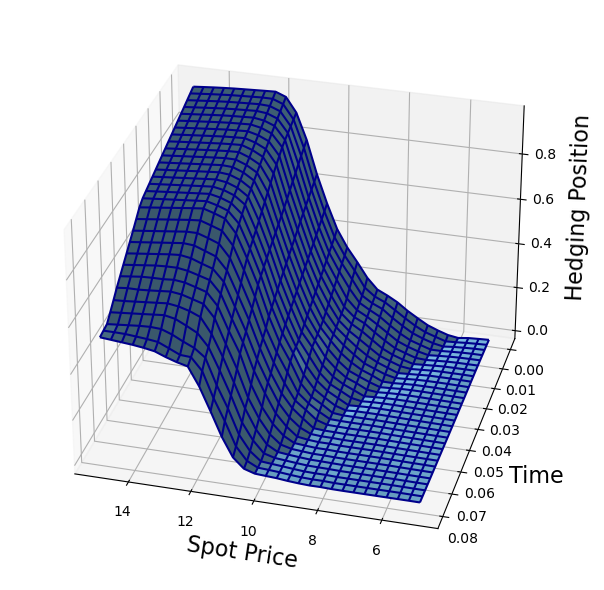

In [6]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid[i,j] = hedge([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)
# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid,color = "lightskyblue")
ax.plot_wireframe(X, Y , grid,color = "darkblue",label = "Hedge")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
#plt.legend()
plt.tight_layout()
plt.savefig('eps/fig_3d_path_dependent.eps', format='eps')
plt.show()

Depict the Hedging Error

In [7]:
BATCH_SIZE = 50000 # Nr of Samples for the Histogram
t_k = np.linspace(0,T,n+1)
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


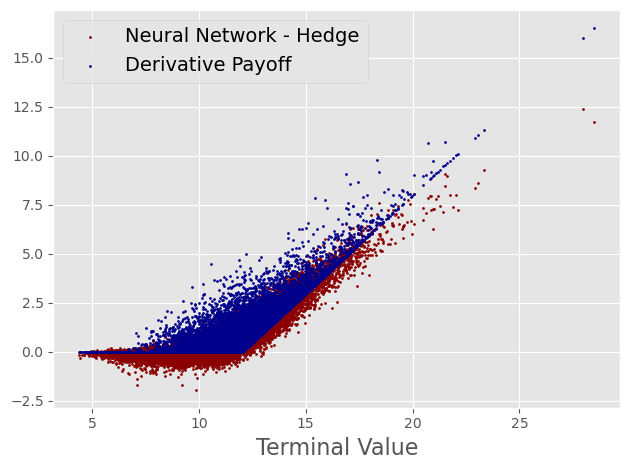

In [8]:
style.use('ggplot')
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "darkred",label = "Neural Network - Hedge",s=2)
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
plt.xlabel("Terminal Value", fontsize=16)
plt.legend( fontsize=14)
plt.tight_layout()
plt.savefig('eps/fig_hedging_mc_path_dependent.eps', format='eps')
plt.show()


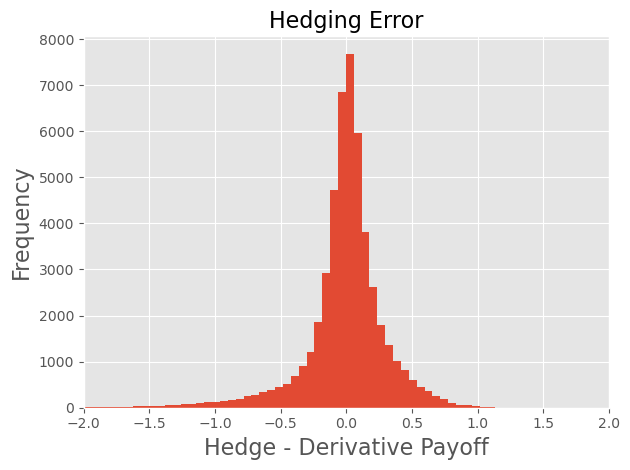

In [9]:
hedging_error = ((price + delta_S) - derivative_on_batch).numpy()
plt.hist(hedging_error,100)
plt.xlim([-2,2])
plt.xlabel("Hedge - Derivative Payoff", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Hedging Error", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_histogram_path_dependent.eps', format='eps')
plt.show()


Save the model

In [10]:
hedge.save("model_path_dependent.h5")

## Training of a hedging strategy with fixed Parameters

In [11]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
# Specify parameters as the mean of the respective intervals.
a_0_fix = [0.5,0.5]
a_1_fix = [0.5,0.5]
b_0_fix = [0,0]
b_1_fix = [0,0]
gamma_fix = [1,1]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(tf.math.reduce_max(path)-12)

price_fix, hedge_fix = optimal_hedge(derivative,a_0_fix,a_1_fix,b_0_fix,b_1_fix,gamma_fix,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)

  0%|          | 11/10000 [00:04<1:00:03,  2.77it/s]

Iteration:10, Price of Hedge: 0.17497484385967255, Loss: 0.15170526504516602


  0%|          | 21/10000 [00:07<59:02,  2.82it/s]  

Iteration:20, Price of Hedge: 0.18126532435417175, Loss: 0.254196435213089


  0%|          | 31/10000 [00:11<59:08,  2.81it/s]  

Iteration:30, Price of Hedge: 0.17955045402050018, Loss: 0.17814482748508453


  0%|          | 41/10000 [00:14<58:49,  2.82it/s]

Iteration:40, Price of Hedge: 0.1726059764623642, Loss: 0.14150011539459229


  1%|          | 51/10000 [00:18<59:05,  2.81it/s]

Iteration:50, Price of Hedge: 0.16504400968551636, Loss: 0.17583613097667694


  1%|          | 61/10000 [00:21<58:48,  2.82it/s]

Iteration:60, Price of Hedge: 0.16047073900699615, Loss: 0.16915476322174072


  1%|          | 71/10000 [00:25<1:00:02,  2.76it/s]

Iteration:70, Price of Hedge: 0.16246150434017181, Loss: 0.10178999602794647


  1%|          | 81/10000 [00:28<58:34,  2.82it/s]  

Iteration:80, Price of Hedge: 0.16706103086471558, Loss: 0.07923659682273865


  1%|          | 91/10000 [00:32<58:35,  2.82it/s]

Iteration:90, Price of Hedge: 0.17042116820812225, Loss: 0.08726243674755096


  1%|          | 101/10000 [00:36<58:39,  2.81it/s]

Iteration:100, Price of Hedge: 0.16899268329143524, Loss: 0.1304146647453308


  1%|          | 111/10000 [00:39<58:30,  2.82it/s]

Iteration:110, Price of Hedge: 0.16965241730213165, Loss: 0.06495494395494461


  1%|          | 121/10000 [00:43<58:49,  2.80it/s]

Iteration:120, Price of Hedge: 0.17070965468883514, Loss: 0.1517074704170227


  1%|▏         | 131/10000 [00:46<58:21,  2.82it/s]

Iteration:130, Price of Hedge: 0.1693127453327179, Loss: 0.07028480619192123


  1%|▏         | 141/10000 [00:50<58:09,  2.83it/s]

Iteration:140, Price of Hedge: 0.16269053518772125, Loss: 0.0563802644610405


  2%|▏         | 151/10000 [00:53<58:18,  2.82it/s]

Iteration:150, Price of Hedge: 0.16349060833454132, Loss: 0.10502764582633972


  2%|▏         | 161/10000 [00:57<58:52,  2.79it/s]

Iteration:160, Price of Hedge: 0.16954101622104645, Loss: 0.0971609354019165


  2%|▏         | 171/10000 [01:00<58:12,  2.81it/s]

Iteration:170, Price of Hedge: 0.16996578872203827, Loss: 0.04870796948671341


  2%|▏         | 181/10000 [01:04<58:12,  2.81it/s]

Iteration:180, Price of Hedge: 0.1705639660358429, Loss: 0.06397692859172821


  2%|▏         | 191/10000 [01:08<58:12,  2.81it/s]

Iteration:190, Price of Hedge: 0.17125914990901947, Loss: 0.07598962634801865


  2%|▏         | 201/10000 [01:11<58:29,  2.79it/s]  

Iteration:200, Price of Hedge: 0.17530718445777893, Loss: 0.06675876677036285


  2%|▏         | 211/10000 [01:15<58:50,  2.77it/s]  

Iteration:210, Price of Hedge: 0.17255312204360962, Loss: 0.06845039874315262


  2%|▏         | 221/10000 [01:18<58:54,  2.77it/s]

Iteration:220, Price of Hedge: 0.1700354367494583, Loss: 0.06774315237998962


  2%|▏         | 231/10000 [01:22<58:39,  2.78it/s]

Iteration:230, Price of Hedge: 0.16791458427906036, Loss: 0.11333556473255157


  2%|▏         | 241/10000 [01:26<58:17,  2.79it/s]

Iteration:240, Price of Hedge: 0.17058280110359192, Loss: 0.061865322291851044


  3%|▎         | 251/10000 [01:29<59:03,  2.75it/s]

Iteration:250, Price of Hedge: 0.16824914515018463, Loss: 0.09662516415119171


  3%|▎         | 261/10000 [01:33<58:26,  2.78it/s]

Iteration:260, Price of Hedge: 0.170796200633049, Loss: 0.044650230556726456


  3%|▎         | 271/10000 [01:37<1:01:12,  2.65it/s]

Iteration:270, Price of Hedge: 0.16900555789470673, Loss: 0.08721213787794113


  3%|▎         | 281/10000 [01:40<1:00:09,  2.69it/s]

Iteration:280, Price of Hedge: 0.16453033685684204, Loss: 0.07168388366699219


  3%|▎         | 291/10000 [01:44<59:49,  2.70it/s]  

Iteration:290, Price of Hedge: 0.16696059703826904, Loss: 0.10425572097301483


  3%|▎         | 301/10000 [01:48<58:23,  2.77it/s]  

Iteration:300, Price of Hedge: 0.1679479032754898, Loss: 0.04904572293162346


  3%|▎         | 311/10000 [01:51<57:44,  2.80it/s]

Iteration:310, Price of Hedge: 0.16189391911029816, Loss: 0.0723956823348999


  3%|▎         | 321/10000 [01:55<58:17,  2.77it/s]

Iteration:320, Price of Hedge: 0.1646653562784195, Loss: 0.07285390794277191


  3%|▎         | 331/10000 [01:59<57:52,  2.78it/s]

Iteration:330, Price of Hedge: 0.1730325073003769, Loss: 0.0637969970703125


  3%|▎         | 341/10000 [02:02<58:21,  2.76it/s]

Iteration:340, Price of Hedge: 0.1699586808681488, Loss: 0.05387777090072632


  4%|▎         | 351/10000 [02:06<57:48,  2.78it/s]

Iteration:350, Price of Hedge: 0.1705946922302246, Loss: 0.05207206308841705


  4%|▎         | 361/10000 [02:09<57:53,  2.78it/s]

Iteration:360, Price of Hedge: 0.17155498266220093, Loss: 0.06808631122112274


  4%|▎         | 371/10000 [02:13<57:40,  2.78it/s]

Iteration:370, Price of Hedge: 0.1702730804681778, Loss: 0.06555883586406708


  4%|▍         | 381/10000 [02:17<58:43,  2.73it/s]

Iteration:380, Price of Hedge: 0.1712421178817749, Loss: 0.07530002295970917


  4%|▍         | 391/10000 [02:20<57:45,  2.77it/s]

Iteration:390, Price of Hedge: 0.16621333360671997, Loss: 0.04732070863246918


  4%|▍         | 401/10000 [02:24<57:44,  2.77it/s]

Iteration:400, Price of Hedge: 0.16537189483642578, Loss: 0.04244765639305115


  4%|▍         | 411/10000 [02:27<57:37,  2.77it/s]

Iteration:410, Price of Hedge: 0.16616882383823395, Loss: 0.03780791535973549


  4%|▍         | 421/10000 [02:31<57:21,  2.78it/s]

Iteration:420, Price of Hedge: 0.1650356948375702, Loss: 0.0624116025865078


  4%|▍         | 431/10000 [02:35<57:45,  2.76it/s]

Iteration:430, Price of Hedge: 0.17172376811504364, Loss: 0.07330134510993958


  4%|▍         | 441/10000 [02:38<57:27,  2.77it/s]

Iteration:440, Price of Hedge: 0.17407426238059998, Loss: 0.0972878485918045


  5%|▍         | 451/10000 [02:42<57:20,  2.78it/s]

Iteration:450, Price of Hedge: 0.16680660843849182, Loss: 0.11035885661840439


  5%|▍         | 461/10000 [02:46<57:10,  2.78it/s]

Iteration:460, Price of Hedge: 0.16465410590171814, Loss: 0.07384634017944336


  5%|▍         | 471/10000 [02:49<58:54,  2.70it/s]

Iteration:470, Price of Hedge: 0.1654275506734848, Loss: 0.06424020975828171


  5%|▍         | 481/10000 [02:53<57:06,  2.78it/s]

Iteration:480, Price of Hedge: 0.17000405490398407, Loss: 0.04397232457995415


  5%|▍         | 491/10000 [02:56<57:08,  2.77it/s]

Iteration:490, Price of Hedge: 0.17328475415706635, Loss: 0.05886346101760864


  5%|▌         | 501/10000 [03:00<56:40,  2.79it/s]

Iteration:500, Price of Hedge: 0.17709046602249146, Loss: 0.10134904086589813


  5%|▌         | 511/10000 [03:04<56:45,  2.79it/s]

Iteration:510, Price of Hedge: 0.1735626757144928, Loss: 0.05284244194626808


  5%|▌         | 521/10000 [03:07<57:13,  2.76it/s]

Iteration:520, Price of Hedge: 0.16732434928417206, Loss: 0.056778471916913986


  5%|▌         | 531/10000 [03:11<56:50,  2.78it/s]

Iteration:530, Price of Hedge: 0.16612298786640167, Loss: 0.06032514199614525


  5%|▌         | 541/10000 [03:14<56:56,  2.77it/s]

Iteration:540, Price of Hedge: 0.17098483443260193, Loss: 0.040393099188804626


  6%|▌         | 551/10000 [03:18<56:34,  2.78it/s]

Iteration:550, Price of Hedge: 0.17112849652767181, Loss: 0.05128709599375725


  6%|▌         | 561/10000 [03:22<57:02,  2.76it/s]

Iteration:560, Price of Hedge: 0.16823546588420868, Loss: 0.06877525895833969


  6%|▌         | 571/10000 [03:25<56:25,  2.78it/s]

Iteration:570, Price of Hedge: 0.17041349411010742, Loss: 0.03405850753188133


  6%|▌         | 581/10000 [03:29<56:34,  2.77it/s]

Iteration:580, Price of Hedge: 0.16977128386497498, Loss: 0.05134417489171028


  6%|▌         | 591/10000 [03:32<56:09,  2.79it/s]

Iteration:590, Price of Hedge: 0.17007982730865479, Loss: 0.04621701315045357


  6%|▌         | 601/10000 [03:36<58:16,  2.69it/s]

Iteration:600, Price of Hedge: 0.17328307032585144, Loss: 0.031779494136571884


  6%|▌         | 611/10000 [03:40<59:26,  2.63it/s]  

Iteration:610, Price of Hedge: 0.17124004662036896, Loss: 0.04208161681890488


  6%|▌         | 621/10000 [03:44<1:00:58,  2.56it/s]

Iteration:620, Price of Hedge: 0.1709391176700592, Loss: 0.035027433186769485


  6%|▋         | 631/10000 [03:47<56:05,  2.78it/s]  

Iteration:630, Price of Hedge: 0.17161743342876434, Loss: 0.0413767509162426


  6%|▋         | 641/10000 [03:51<56:09,  2.78it/s]

Iteration:640, Price of Hedge: 0.16677597165107727, Loss: 0.042728520929813385


  7%|▋         | 651/10000 [03:55<56:16,  2.77it/s]

Iteration:650, Price of Hedge: 0.17100104689598083, Loss: 0.03021547943353653


  7%|▋         | 661/10000 [03:58<55:59,  2.78it/s]

Iteration:660, Price of Hedge: 0.1699875444173813, Loss: 0.039105989038944244


  7%|▋         | 671/10000 [04:02<55:55,  2.78it/s]

Iteration:670, Price of Hedge: 0.1698196679353714, Loss: 0.04993563890457153


  7%|▋         | 681/10000 [04:05<55:44,  2.79it/s]

Iteration:680, Price of Hedge: 0.1662367731332779, Loss: 0.05606778711080551


  7%|▋         | 691/10000 [04:09<56:43,  2.73it/s]

Iteration:690, Price of Hedge: 0.17199692130088806, Loss: 0.06388311088085175


  7%|▋         | 701/10000 [04:13<55:56,  2.77it/s]

Iteration:700, Price of Hedge: 0.17350804805755615, Loss: 0.027671750634908676


  7%|▋         | 711/10000 [04:16<55:47,  2.77it/s]

Iteration:710, Price of Hedge: 0.1709623485803604, Loss: 0.022252272814512253


  7%|▋         | 721/10000 [04:20<55:25,  2.79it/s]

Iteration:720, Price of Hedge: 0.1726090908050537, Loss: 0.03225032612681389


  7%|▋         | 731/10000 [04:23<55:32,  2.78it/s]

Iteration:730, Price of Hedge: 0.1723051518201828, Loss: 0.02619100734591484


  7%|▋         | 741/10000 [04:27<55:37,  2.77it/s]

Iteration:740, Price of Hedge: 0.17288728058338165, Loss: 0.04327602684497833


  8%|▊         | 751/10000 [04:31<55:17,  2.79it/s]

Iteration:750, Price of Hedge: 0.17262759804725647, Loss: 0.04048166051506996


  8%|▊         | 761/10000 [04:34<55:22,  2.78it/s]

Iteration:760, Price of Hedge: 0.16801752150058746, Loss: 0.04611613601446152


  8%|▊         | 771/10000 [04:38<55:36,  2.77it/s]

Iteration:770, Price of Hedge: 0.16118086874485016, Loss: 0.05174439400434494


  8%|▊         | 781/10000 [04:41<55:51,  2.75it/s]

Iteration:780, Price of Hedge: 0.1730004847049713, Loss: 0.06897780299186707


  8%|▊         | 791/10000 [04:45<55:21,  2.77it/s]

Iteration:790, Price of Hedge: 0.18237857520580292, Loss: 0.05976809933781624


  8%|▊         | 801/10000 [04:49<55:22,  2.77it/s]

Iteration:800, Price of Hedge: 0.1836327165365219, Loss: 0.06186828389763832


  8%|▊         | 811/10000 [04:52<54:43,  2.80it/s]

Iteration:810, Price of Hedge: 0.16290678083896637, Loss: 0.04512769728899002


  8%|▊         | 821/10000 [04:56<55:14,  2.77it/s]

Iteration:820, Price of Hedge: 0.16159042716026306, Loss: 0.057007722556591034


  8%|▊         | 831/10000 [05:00<55:04,  2.77it/s]

Iteration:830, Price of Hedge: 0.17275606095790863, Loss: 0.032797396183013916


  8%|▊         | 841/10000 [05:03<54:57,  2.78it/s]

Iteration:840, Price of Hedge: 0.16720448434352875, Loss: 0.05201735720038414


  9%|▊         | 851/10000 [05:07<54:43,  2.79it/s]

Iteration:850, Price of Hedge: 0.16669262945652008, Loss: 0.030181465670466423


  9%|▊         | 861/10000 [05:10<54:47,  2.78it/s]

Iteration:860, Price of Hedge: 0.17150388658046722, Loss: 0.047483280301094055


  9%|▊         | 871/10000 [05:14<56:08,  2.71it/s]

Iteration:870, Price of Hedge: 0.17166413366794586, Loss: 0.05450339615345001


  9%|▉         | 881/10000 [05:18<54:42,  2.78it/s]

Iteration:880, Price of Hedge: 0.16514527797698975, Loss: 0.05078845098614693


  9%|▉         | 891/10000 [05:21<54:38,  2.78it/s]

Iteration:890, Price of Hedge: 0.1745021641254425, Loss: 0.03293463587760925


  9%|▉         | 901/10000 [05:25<54:37,  2.78it/s]

Iteration:900, Price of Hedge: 0.1773594617843628, Loss: 0.03639792650938034


  9%|▉         | 911/10000 [05:28<54:36,  2.77it/s]

Iteration:910, Price of Hedge: 0.16844390332698822, Loss: 0.03660546988248825


  9%|▉         | 921/10000 [05:32<54:35,  2.77it/s]

Iteration:920, Price of Hedge: 0.17058515548706055, Loss: 0.03511729836463928


  9%|▉         | 931/10000 [05:36<55:12,  2.74it/s]

Iteration:930, Price of Hedge: 0.17522749304771423, Loss: 0.055766861885786057


  9%|▉         | 941/10000 [05:40<57:56,  2.61it/s]

Iteration:940, Price of Hedge: 0.17321543395519257, Loss: 0.03191598132252693


 10%|▉         | 951/10000 [05:43<58:04,  2.60it/s]

Iteration:950, Price of Hedge: 0.17026753723621368, Loss: 0.07005848735570908


 10%|▉         | 961/10000 [05:47<54:36,  2.76it/s]

Iteration:960, Price of Hedge: 0.17854654788970947, Loss: 0.04197438061237335


 10%|▉         | 971/10000 [05:50<54:06,  2.78it/s]

Iteration:970, Price of Hedge: 0.1757422536611557, Loss: 0.037065014243125916


 10%|▉         | 981/10000 [05:54<54:14,  2.77it/s]

Iteration:980, Price of Hedge: 0.16959472000598907, Loss: 0.0398264080286026


 10%|▉         | 991/10000 [05:58<53:38,  2.80it/s]

Iteration:990, Price of Hedge: 0.16959922015666962, Loss: 0.0586109533905983


 10%|█         | 1001/10000 [06:01<54:39,  2.74it/s]

Iteration:1000, Price of Hedge: 0.17187541723251343, Loss: 0.03443747013807297


 10%|█         | 1011/10000 [06:05<53:56,  2.78it/s]

Iteration:1010, Price of Hedge: 0.17443649470806122, Loss: 0.028622876852750778


 10%|█         | 1021/10000 [06:08<54:10,  2.76it/s]

Iteration:1020, Price of Hedge: 0.16512039303779602, Loss: 0.10353672504425049


 10%|█         | 1031/10000 [06:12<53:47,  2.78it/s]

Iteration:1030, Price of Hedge: 0.15887713432312012, Loss: 0.04091474786400795


 10%|█         | 1041/10000 [06:16<53:43,  2.78it/s]

Iteration:1040, Price of Hedge: 0.17071160674095154, Loss: 0.02812994085252285


 11%|█         | 1051/10000 [06:19<53:45,  2.77it/s]

Iteration:1050, Price of Hedge: 0.17196807265281677, Loss: 0.027637438848614693


 11%|█         | 1061/10000 [06:23<53:39,  2.78it/s]

Iteration:1060, Price of Hedge: 0.1689758151769638, Loss: 0.03217184916138649


 11%|█         | 1071/10000 [06:27<53:19,  2.79it/s]

Iteration:1070, Price of Hedge: 0.16154146194458008, Loss: 0.033455632627010345


 11%|█         | 1081/10000 [06:30<53:25,  2.78it/s]

Iteration:1080, Price of Hedge: 0.1755937933921814, Loss: 0.04305131733417511


 11%|█         | 1091/10000 [06:34<53:59,  2.75it/s]

Iteration:1090, Price of Hedge: 0.17576293647289276, Loss: 0.038651518523693085


 11%|█         | 1101/10000 [06:37<53:21,  2.78it/s]

Iteration:1100, Price of Hedge: 0.16968314349651337, Loss: 0.025193843990564346


 11%|█         | 1111/10000 [06:41<53:21,  2.78it/s]

Iteration:1110, Price of Hedge: 0.1675385981798172, Loss: 0.03606385737657547


 11%|█         | 1121/10000 [06:45<53:11,  2.78it/s]

Iteration:1120, Price of Hedge: 0.16912998259067535, Loss: 0.026128051802515984


 11%|█▏        | 1131/10000 [06:48<52:58,  2.79it/s]

Iteration:1130, Price of Hedge: 0.17256034910678864, Loss: 0.026474252343177795


 11%|█▏        | 1141/10000 [06:52<53:30,  2.76it/s]

Iteration:1140, Price of Hedge: 0.17003580927848816, Loss: 0.03693578392267227


 12%|█▏        | 1151/10000 [06:55<53:17,  2.77it/s]

Iteration:1150, Price of Hedge: 0.16433638334274292, Loss: 0.02135113999247551


 12%|█▏        | 1161/10000 [06:59<52:56,  2.78it/s]

Iteration:1160, Price of Hedge: 0.15848328173160553, Loss: 0.03597524017095566


 12%|█▏        | 1171/10000 [07:03<53:00,  2.78it/s]

Iteration:1170, Price of Hedge: 0.17194022238254547, Loss: 0.051715314388275146


 12%|█▏        | 1181/10000 [07:06<53:23,  2.75it/s]

Iteration:1180, Price of Hedge: 0.17528189718723297, Loss: 0.04482376575469971


 12%|█▏        | 1191/10000 [07:10<53:08,  2.76it/s]

Iteration:1190, Price of Hedge: 0.16394490003585815, Loss: 0.03277119994163513


 12%|█▏        | 1201/10000 [07:14<52:48,  2.78it/s]

Iteration:1200, Price of Hedge: 0.16354423761367798, Loss: 0.03638247400522232


 12%|█▏        | 1211/10000 [07:17<52:51,  2.77it/s]

Iteration:1210, Price of Hedge: 0.1687064915895462, Loss: 0.03920138254761696


 12%|█▏        | 1221/10000 [07:21<55:03,  2.66it/s]

Iteration:1220, Price of Hedge: 0.17227008938789368, Loss: 0.03476415574550629


 12%|█▏        | 1231/10000 [07:24<52:48,  2.77it/s]

Iteration:1230, Price of Hedge: 0.17452006042003632, Loss: 0.030156796798110008


 12%|█▏        | 1241/10000 [07:28<52:33,  2.78it/s]

Iteration:1240, Price of Hedge: 0.16837285459041595, Loss: 0.033050280064344406


 13%|█▎        | 1251/10000 [07:32<52:35,  2.77it/s]

Iteration:1250, Price of Hedge: 0.1692477911710739, Loss: 0.026781834661960602


 13%|█▎        | 1261/10000 [07:35<52:33,  2.77it/s]

Iteration:1260, Price of Hedge: 0.16690754890441895, Loss: 0.02828317880630493


 13%|█▎        | 1271/10000 [07:39<57:32,  2.53it/s]

Iteration:1270, Price of Hedge: 0.16973087191581726, Loss: 0.0410555936396122


 13%|█▎        | 1281/10000 [07:43<55:11,  2.63it/s]

Iteration:1280, Price of Hedge: 0.16812458634376526, Loss: 0.02172667160630226


 13%|█▎        | 1291/10000 [07:46<52:35,  2.76it/s]

Iteration:1290, Price of Hedge: 0.17012566328048706, Loss: 0.03418998792767525


 13%|█▎        | 1301/10000 [07:50<52:15,  2.77it/s]

Iteration:1300, Price of Hedge: 0.17091941833496094, Loss: 0.028625784441828728


 13%|█▎        | 1311/10000 [07:54<52:49,  2.74it/s]

Iteration:1310, Price of Hedge: 0.16896705329418182, Loss: 0.030958831310272217


 13%|█▎        | 1321/10000 [07:57<51:57,  2.78it/s]

Iteration:1320, Price of Hedge: 0.16301202774047852, Loss: 0.0481901541352272


 13%|█▎        | 1331/10000 [08:01<51:49,  2.79it/s]

Iteration:1330, Price of Hedge: 0.1700514554977417, Loss: 0.025378160178661346


 13%|█▎        | 1341/10000 [08:04<52:02,  2.77it/s]

Iteration:1340, Price of Hedge: 0.17052783071994781, Loss: 0.03957716375589371


 14%|█▎        | 1351/10000 [08:08<51:54,  2.78it/s]

Iteration:1350, Price of Hedge: 0.17979632318019867, Loss: 0.04563954845070839


 14%|█▎        | 1361/10000 [08:12<52:00,  2.77it/s]

Iteration:1360, Price of Hedge: 0.17119839787483215, Loss: 0.05863242223858833


 14%|█▎        | 1371/10000 [08:15<51:31,  2.79it/s]

Iteration:1370, Price of Hedge: 0.15879040956497192, Loss: 0.0447990745306015


 14%|█▍        | 1381/10000 [08:19<51:25,  2.79it/s]

Iteration:1380, Price of Hedge: 0.16887997090816498, Loss: 0.03274782747030258


 14%|█▍        | 1391/10000 [08:23<51:28,  2.79it/s]

Iteration:1390, Price of Hedge: 0.1721518635749817, Loss: 0.02841302379965782


 14%|█▍        | 1401/10000 [08:26<52:07,  2.75it/s]

Iteration:1400, Price of Hedge: 0.16885052621364594, Loss: 0.03721272200345993


 14%|█▍        | 1411/10000 [08:30<51:22,  2.79it/s]

Iteration:1410, Price of Hedge: 0.1599227339029312, Loss: 0.021447550505399704


 14%|█▍        | 1421/10000 [08:33<51:32,  2.77it/s]

Iteration:1420, Price of Hedge: 0.16927725076675415, Loss: 0.03086896613240242


 14%|█▍        | 1431/10000 [08:37<51:16,  2.79it/s]

Iteration:1430, Price of Hedge: 0.17683793604373932, Loss: 0.03454313427209854


 14%|█▍        | 1441/10000 [08:41<52:02,  2.74it/s]

Iteration:1440, Price of Hedge: 0.17668510973453522, Loss: 0.037993043661117554


 15%|█▍        | 1451/10000 [08:44<51:23,  2.77it/s]

Iteration:1450, Price of Hedge: 0.16926099359989166, Loss: 0.01996593177318573


 15%|█▍        | 1461/10000 [08:48<51:13,  2.78it/s]

Iteration:1460, Price of Hedge: 0.1659972071647644, Loss: 0.031720880419015884


 15%|█▍        | 1471/10000 [08:51<51:09,  2.78it/s]

Iteration:1470, Price of Hedge: 0.16861537098884583, Loss: 0.04014535993337631


 15%|█▍        | 1481/10000 [08:55<51:19,  2.77it/s]

Iteration:1480, Price of Hedge: 0.17339949309825897, Loss: 0.055371541529893875


 15%|█▍        | 1491/10000 [08:59<50:56,  2.78it/s]

Iteration:1490, Price of Hedge: 0.17173896729946136, Loss: 0.031218580901622772


 15%|█▌        | 1501/10000 [09:02<52:02,  2.72it/s]

Iteration:1500, Price of Hedge: 0.17758972942829132, Loss: 0.032182589173316956


 15%|█▌        | 1511/10000 [09:06<50:58,  2.78it/s]

Iteration:1510, Price of Hedge: 0.16911974549293518, Loss: 0.038783833384513855


 15%|█▌        | 1521/10000 [09:09<50:58,  2.77it/s]

Iteration:1520, Price of Hedge: 0.1735464632511139, Loss: 0.032048292458057404


 15%|█▌        | 1531/10000 [09:13<54:04,  2.61it/s]

Iteration:1530, Price of Hedge: 0.17564620077610016, Loss: 0.03106328658759594


 15%|█▌        | 1541/10000 [09:17<51:07,  2.76it/s]

Iteration:1540, Price of Hedge: 0.16685599088668823, Loss: 0.017277123406529427


 16%|█▌        | 1551/10000 [09:20<50:53,  2.77it/s]

Iteration:1550, Price of Hedge: 0.1728755682706833, Loss: 0.037757404148578644


 16%|█▌        | 1561/10000 [09:24<50:52,  2.77it/s]

Iteration:1560, Price of Hedge: 0.17031003534793854, Loss: 0.03273935616016388


 16%|█▌        | 1571/10000 [09:28<50:49,  2.76it/s]

Iteration:1570, Price of Hedge: 0.17556878924369812, Loss: 0.02580275572836399


 16%|█▌        | 1581/10000 [09:31<50:37,  2.77it/s]

Iteration:1580, Price of Hedge: 0.1710975170135498, Loss: 0.04291171580553055


 16%|█▌        | 1591/10000 [09:35<50:36,  2.77it/s]

Iteration:1590, Price of Hedge: 0.16144761443138123, Loss: 0.03447595238685608


 16%|█▌        | 1601/10000 [09:39<54:41,  2.56it/s]

Iteration:1600, Price of Hedge: 0.165854349732399, Loss: 0.04092659056186676


 16%|█▌        | 1611/10000 [09:42<50:40,  2.76it/s]

Iteration:1610, Price of Hedge: 0.17432647943496704, Loss: 0.052959080785512924


 16%|█▌        | 1621/10000 [09:46<51:00,  2.74it/s]

Iteration:1620, Price of Hedge: 0.17149607837200165, Loss: 0.05402668938040733


 16%|█▋        | 1631/10000 [09:50<50:19,  2.77it/s]

Iteration:1630, Price of Hedge: 0.16843105852603912, Loss: 0.037128835916519165


 16%|█▋        | 1641/10000 [09:53<50:12,  2.77it/s]

Iteration:1640, Price of Hedge: 0.16781513392925262, Loss: 0.03898473083972931


 17%|█▋        | 1651/10000 [09:57<50:09,  2.77it/s]

Iteration:1650, Price of Hedge: 0.17522121965885162, Loss: 0.029721468687057495


 17%|█▋        | 1661/10000 [10:01<50:59,  2.73it/s]

Iteration:1660, Price of Hedge: 0.1722148358821869, Loss: 0.031232815235853195


 17%|█▋        | 1671/10000 [10:04<49:57,  2.78it/s]

Iteration:1670, Price of Hedge: 0.17201508581638336, Loss: 0.02946620248258114


 17%|█▋        | 1681/10000 [10:08<50:03,  2.77it/s]

Iteration:1680, Price of Hedge: 0.16846700012683868, Loss: 0.02273978851735592


 17%|█▋        | 1691/10000 [10:11<50:04,  2.77it/s]

Iteration:1690, Price of Hedge: 0.1710401475429535, Loss: 0.02309919148683548


 17%|█▋        | 1701/10000 [10:15<49:56,  2.77it/s]

Iteration:1700, Price of Hedge: 0.16861577332019806, Loss: 0.025519421324133873


 17%|█▋        | 1711/10000 [10:19<49:51,  2.77it/s]

Iteration:1710, Price of Hedge: 0.1661173552274704, Loss: 0.03147444874048233


 17%|█▋        | 1721/10000 [10:22<49:57,  2.76it/s]

Iteration:1720, Price of Hedge: 0.16967234015464783, Loss: 0.03850622475147247


 17%|█▋        | 1731/10000 [10:26<49:36,  2.78it/s]

Iteration:1730, Price of Hedge: 0.16851608455181122, Loss: 0.034261129796504974


 17%|█▋        | 1741/10000 [10:30<49:29,  2.78it/s]

Iteration:1740, Price of Hedge: 0.16999822854995728, Loss: 0.037748612463474274


 18%|█▊        | 1751/10000 [10:33<50:55,  2.70it/s]

Iteration:1750, Price of Hedge: 0.17223608493804932, Loss: 0.04115934297442436


 18%|█▊        | 1761/10000 [10:37<49:24,  2.78it/s]

Iteration:1760, Price of Hedge: 0.16966307163238525, Loss: 0.024562684819102287


 18%|█▊        | 1771/10000 [10:40<49:21,  2.78it/s]

Iteration:1770, Price of Hedge: 0.17276808619499207, Loss: 0.028893349692225456


 18%|█▊        | 1781/10000 [10:44<49:28,  2.77it/s]

Iteration:1780, Price of Hedge: 0.17018474638462067, Loss: 0.06330081820487976


 18%|█▊        | 1791/10000 [10:48<49:24,  2.77it/s]

Iteration:1790, Price of Hedge: 0.17363528907299042, Loss: 0.029097218066453934


 18%|█▊        | 1801/10000 [10:51<49:30,  2.76it/s]

Iteration:1800, Price of Hedge: 0.16891832649707794, Loss: 0.02328178659081459


 18%|█▊        | 1811/10000 [10:55<49:22,  2.76it/s]

Iteration:1810, Price of Hedge: 0.17061318457126617, Loss: 0.04976070299744606


 18%|█▊        | 1821/10000 [10:58<49:07,  2.77it/s]

Iteration:1820, Price of Hedge: 0.1758616715669632, Loss: 0.06290111690759659


 18%|█▊        | 1831/10000 [11:02<49:24,  2.76it/s]

Iteration:1830, Price of Hedge: 0.16777677834033966, Loss: 0.047125257551670074


 18%|█▊        | 1841/10000 [11:06<50:00,  2.72it/s]

Iteration:1840, Price of Hedge: 0.17315547168254852, Loss: 0.028776740655303


 19%|█▊        | 1851/10000 [11:09<48:42,  2.79it/s]

Iteration:1850, Price of Hedge: 0.17151866853237152, Loss: 0.03481251746416092


 19%|█▊        | 1861/10000 [11:13<48:37,  2.79it/s]

Iteration:1860, Price of Hedge: 0.16841337084770203, Loss: 0.04354183375835419


 19%|█▊        | 1871/10000 [11:17<48:32,  2.79it/s]

Iteration:1870, Price of Hedge: 0.17965471744537354, Loss: 0.028425760567188263


 19%|█▉        | 1881/10000 [11:20<48:40,  2.78it/s]

Iteration:1880, Price of Hedge: 0.17069289088249207, Loss: 0.03559832274913788


 19%|█▉        | 1891/10000 [11:24<48:46,  2.77it/s]

Iteration:1890, Price of Hedge: 0.1677921563386917, Loss: 0.021684639155864716


 19%|█▉        | 1901/10000 [11:27<48:33,  2.78it/s]

Iteration:1900, Price of Hedge: 0.17267116904258728, Loss: 0.025716882199048996


 19%|█▉        | 1911/10000 [11:31<48:33,  2.78it/s]

Iteration:1910, Price of Hedge: 0.16820992529392242, Loss: 0.041249506175518036


 19%|█▉        | 1921/10000 [11:35<48:45,  2.76it/s]

Iteration:1920, Price of Hedge: 0.16467352211475372, Loss: 0.025793401524424553


 19%|█▉        | 1931/10000 [11:39<52:31,  2.56it/s]

Iteration:1930, Price of Hedge: 0.17133022844791412, Loss: 0.04141397774219513


 19%|█▉        | 1941/10000 [11:42<48:20,  2.78it/s]

Iteration:1940, Price of Hedge: 0.17097647488117218, Loss: 0.04885522276163101


 20%|█▉        | 1951/10000 [11:46<48:45,  2.75it/s]

Iteration:1950, Price of Hedge: 0.1759716421365738, Loss: 0.0363292470574379


 20%|█▉        | 1961/10000 [11:50<48:51,  2.74it/s]

Iteration:1960, Price of Hedge: 0.16776315867900848, Loss: 0.034246791154146194


 20%|█▉        | 1971/10000 [11:53<50:21,  2.66it/s]

Iteration:1970, Price of Hedge: 0.17388471961021423, Loss: 0.034292541444301605


 20%|█▉        | 1981/10000 [11:57<1:00:01,  2.23it/s]

Iteration:1980, Price of Hedge: 0.16639265418052673, Loss: 0.03842496499419212


 20%|█▉        | 1991/10000 [12:02<53:18,  2.50it/s]  

Iteration:1990, Price of Hedge: 0.16982433199882507, Loss: 0.038081660866737366


 20%|██        | 2001/10000 [12:05<50:27,  2.64it/s]

Iteration:2000, Price of Hedge: 0.16659896075725555, Loss: 0.021716909483075142


 20%|██        | 2011/10000 [12:09<51:52,  2.57it/s]

Iteration:2010, Price of Hedge: 0.1718313843011856, Loss: 0.024807002395391464


 20%|██        | 2021/10000 [12:13<49:16,  2.70it/s]

Iteration:2020, Price of Hedge: 0.17612755298614502, Loss: 0.031347814947366714


 20%|██        | 2031/10000 [12:17<49:47,  2.67it/s]

Iteration:2030, Price of Hedge: 0.16982051730155945, Loss: 0.05153807997703552


 20%|██        | 2041/10000 [12:20<48:56,  2.71it/s]

Iteration:2040, Price of Hedge: 0.17256318032741547, Loss: 0.0371926911175251


 21%|██        | 2051/10000 [12:24<49:56,  2.65it/s]

Iteration:2050, Price of Hedge: 0.16540293395519257, Loss: 0.03729218989610672


 21%|██        | 2061/10000 [12:28<51:09,  2.59it/s]

Iteration:2060, Price of Hedge: 0.17392107844352722, Loss: 0.017285648733377457


 21%|██        | 2071/10000 [12:32<50:57,  2.59it/s]

Iteration:2070, Price of Hedge: 0.17303474247455597, Loss: 0.028006775304675102


 21%|██        | 2081/10000 [12:36<50:11,  2.63it/s]

Iteration:2080, Price of Hedge: 0.1710539162158966, Loss: 0.03453323245048523


 21%|██        | 2091/10000 [12:40<51:22,  2.57it/s]

Iteration:2090, Price of Hedge: 0.1777694672346115, Loss: 0.03623203933238983


 21%|██        | 2101/10000 [12:43<49:37,  2.65it/s]

Iteration:2100, Price of Hedge: 0.17028868198394775, Loss: 0.03221667557954788


 21%|██        | 2111/10000 [12:47<50:04,  2.63it/s]

Iteration:2110, Price of Hedge: 0.16651767492294312, Loss: 0.021425828337669373


 21%|██        | 2121/10000 [12:51<50:39,  2.59it/s]

Iteration:2120, Price of Hedge: 0.17227871716022491, Loss: 0.04871993139386177


 21%|██▏       | 2131/10000 [12:55<50:47,  2.58it/s]

Iteration:2130, Price of Hedge: 0.17026904225349426, Loss: 0.035725776106119156


 21%|██▏       | 2141/10000 [12:59<49:51,  2.63it/s]

Iteration:2140, Price of Hedge: 0.17509745061397552, Loss: 0.03209715336561203


 22%|██▏       | 2151/10000 [13:03<48:35,  2.69it/s]

Iteration:2150, Price of Hedge: 0.17513546347618103, Loss: 0.053576353937387466


 22%|██▏       | 2161/10000 [13:06<47:56,  2.73it/s]

Iteration:2160, Price of Hedge: 0.1695105880498886, Loss: 0.03613175451755524


 22%|██▏       | 2171/10000 [13:10<48:29,  2.69it/s]

Iteration:2170, Price of Hedge: 0.17561055719852448, Loss: 0.04330998659133911


 22%|██▏       | 2181/10000 [13:14<49:04,  2.66it/s]

Iteration:2180, Price of Hedge: 0.1704995334148407, Loss: 0.020112674683332443


 22%|██▏       | 2191/10000 [13:17<50:14,  2.59it/s]

Iteration:2190, Price of Hedge: 0.17217092216014862, Loss: 0.033147554844617844


 22%|██▏       | 2201/10000 [13:21<48:18,  2.69it/s]

Iteration:2200, Price of Hedge: 0.17184604704380035, Loss: 0.026485702022910118


 22%|██▏       | 2211/10000 [13:25<49:01,  2.65it/s]

Iteration:2210, Price of Hedge: 0.17005376517772675, Loss: 0.03189805522561073


 22%|██▏       | 2221/10000 [13:29<50:45,  2.55it/s]

Iteration:2220, Price of Hedge: 0.17298150062561035, Loss: 0.019037023186683655


 22%|██▏       | 2231/10000 [13:33<48:40,  2.66it/s]

Iteration:2230, Price of Hedge: 0.16917316615581512, Loss: 0.04087767004966736


 22%|██▏       | 2241/10000 [13:36<48:25,  2.67it/s]

Iteration:2240, Price of Hedge: 0.17095929384231567, Loss: 0.040576204657554626


 23%|██▎       | 2251/10000 [13:40<52:06,  2.48it/s]

Iteration:2250, Price of Hedge: 0.16694313287734985, Loss: 0.029287811368703842


 23%|██▎       | 2261/10000 [13:44<50:20,  2.56it/s]

Iteration:2260, Price of Hedge: 0.16717971861362457, Loss: 0.03753834217786789


 23%|██▎       | 2271/10000 [13:48<49:03,  2.63it/s]

Iteration:2270, Price of Hedge: 0.18241508305072784, Loss: 0.023746704682707787


 23%|██▎       | 2281/10000 [13:52<46:54,  2.74it/s]

Iteration:2280, Price of Hedge: 0.17474068701267242, Loss: 0.0330025777220726


 23%|██▎       | 2291/10000 [13:55<47:47,  2.69it/s]

Iteration:2290, Price of Hedge: 0.16715213656425476, Loss: 0.04762045294046402


 23%|██▎       | 2301/10000 [13:59<47:06,  2.72it/s]

Iteration:2300, Price of Hedge: 0.17008201777935028, Loss: 0.05165529251098633


 23%|██▎       | 2311/10000 [14:03<47:30,  2.70it/s]

Iteration:2310, Price of Hedge: 0.17647407948970795, Loss: 0.02995855174958706


 23%|██▎       | 2321/10000 [14:06<46:28,  2.75it/s]

Iteration:2320, Price of Hedge: 0.1651265174150467, Loss: 0.018498452380299568


 23%|██▎       | 2331/10000 [14:10<47:05,  2.71it/s]

Iteration:2330, Price of Hedge: 0.1592094898223877, Loss: 0.034236907958984375


 23%|██▎       | 2341/10000 [14:14<46:35,  2.74it/s]

Iteration:2340, Price of Hedge: 0.1762041300535202, Loss: 0.028748461976647377


 24%|██▎       | 2351/10000 [14:17<48:52,  2.61it/s]

Iteration:2350, Price of Hedge: 0.17013709247112274, Loss: 0.027971934527158737


 24%|██▎       | 2361/10000 [14:21<46:39,  2.73it/s]

Iteration:2360, Price of Hedge: 0.1753954440355301, Loss: 0.04029569402337074


 24%|██▎       | 2371/10000 [14:25<47:00,  2.70it/s]

Iteration:2370, Price of Hedge: 0.17791247367858887, Loss: 0.021873269230127335


 24%|██▍       | 2381/10000 [14:29<46:56,  2.70it/s]

Iteration:2380, Price of Hedge: 0.17754946649074554, Loss: 0.026728345081210136


 24%|██▍       | 2391/10000 [14:33<57:40,  2.20it/s]

Iteration:2390, Price of Hedge: 0.16872891783714294, Loss: 0.028830278664827347


 24%|██▍       | 2401/10000 [14:37<50:05,  2.53it/s]  

Iteration:2400, Price of Hedge: 0.17309992015361786, Loss: 0.03502199798822403


 24%|██▍       | 2411/10000 [14:41<48:32,  2.61it/s]

Iteration:2410, Price of Hedge: 0.1628052145242691, Loss: 0.0653379037976265


 24%|██▍       | 2421/10000 [14:45<47:20,  2.67it/s]

Iteration:2420, Price of Hedge: 0.1662503331899643, Loss: 0.039006538689136505


 24%|██▍       | 2431/10000 [14:48<46:38,  2.70it/s]

Iteration:2430, Price of Hedge: 0.16795209050178528, Loss: 0.06975652277469635


 24%|██▍       | 2441/10000 [14:52<46:32,  2.71it/s]

Iteration:2440, Price of Hedge: 0.1701636016368866, Loss: 0.02597592957317829


 25%|██▍       | 2451/10000 [14:56<46:42,  2.69it/s]

Iteration:2450, Price of Hedge: 0.17532673478126526, Loss: 0.03388048708438873


 25%|██▍       | 2461/10000 [15:00<46:56,  2.68it/s]

Iteration:2460, Price of Hedge: 0.1802021563053131, Loss: 0.0617731474339962


 25%|██▍       | 2471/10000 [15:03<46:58,  2.67it/s]

Iteration:2470, Price of Hedge: 0.16732539236545563, Loss: 0.030432453379034996


 25%|██▍       | 2481/10000 [15:07<46:05,  2.72it/s]

Iteration:2480, Price of Hedge: 0.16778185963630676, Loss: 0.02447666972875595


 25%|██▍       | 2491/10000 [15:11<47:08,  2.65it/s]

Iteration:2490, Price of Hedge: 0.1736164093017578, Loss: 0.02329864725470543


 25%|██▌       | 2501/10000 [15:15<48:43,  2.56it/s]

Iteration:2500, Price of Hedge: 0.17457707226276398, Loss: 0.030828746035695076


 25%|██▌       | 2511/10000 [15:18<48:13,  2.59it/s]

Iteration:2510, Price of Hedge: 0.16834214329719543, Loss: 0.02505103498697281


 25%|██▌       | 2521/10000 [15:22<49:06,  2.54it/s]

Iteration:2520, Price of Hedge: 0.1702265441417694, Loss: 0.02454926259815693


 25%|██▌       | 2531/10000 [15:26<47:49,  2.60it/s]

Iteration:2530, Price of Hedge: 0.16745525598526, Loss: 0.050439201295375824


 25%|██▌       | 2541/10000 [15:30<47:33,  2.61it/s]

Iteration:2540, Price of Hedge: 0.1711355745792389, Loss: 0.029735613614320755


 26%|██▌       | 2551/10000 [15:34<45:52,  2.71it/s]

Iteration:2550, Price of Hedge: 0.1618887037038803, Loss: 0.029348116368055344


 26%|██▌       | 2561/10000 [15:38<57:19,  2.16it/s]

Iteration:2560, Price of Hedge: 0.16846917569637299, Loss: 0.028627030551433563


 26%|██▌       | 2571/10000 [15:43<59:35,  2.08it/s]  

Iteration:2570, Price of Hedge: 0.1696898341178894, Loss: 0.03528399020433426


 26%|██▌       | 2581/10000 [15:47<52:18,  2.36it/s]

Iteration:2580, Price of Hedge: 0.16975510120391846, Loss: 0.024498358368873596


 26%|██▌       | 2591/10000 [15:51<48:04,  2.57it/s]

Iteration:2590, Price of Hedge: 0.16142579913139343, Loss: 0.030462775379419327


 26%|██▌       | 2601/10000 [15:55<51:36,  2.39it/s]

Iteration:2600, Price of Hedge: 0.17022518813610077, Loss: 0.02519526518881321


 26%|██▌       | 2611/10000 [15:59<47:22,  2.60it/s]

Iteration:2610, Price of Hedge: 0.1764010488986969, Loss: 0.03161302208900452


 26%|██▌       | 2621/10000 [16:03<58:40,  2.10it/s]

Iteration:2620, Price of Hedge: 0.1698710173368454, Loss: 0.022120699286460876


 26%|██▋       | 2631/10000 [16:08<50:58,  2.41it/s]

Iteration:2630, Price of Hedge: 0.1637786477804184, Loss: 0.0336015522480011


 26%|██▋       | 2641/10000 [16:12<53:03,  2.31it/s]

Iteration:2640, Price of Hedge: 0.17310014367103577, Loss: 0.027860572561621666


 27%|██▋       | 2651/10000 [16:17<56:03,  2.18it/s]

Iteration:2650, Price of Hedge: 0.17103485763072968, Loss: 0.02944517321884632


 27%|██▋       | 2661/10000 [16:21<54:37,  2.24it/s]

Iteration:2660, Price of Hedge: 0.16373451054096222, Loss: 0.036871060729026794


 27%|██▋       | 2671/10000 [16:25<55:11,  2.21it/s]

Iteration:2670, Price of Hedge: 0.17680712044239044, Loss: 0.019801734015345573


 27%|██▋       | 2681/10000 [16:29<45:58,  2.65it/s]

Iteration:2680, Price of Hedge: 0.17861492931842804, Loss: 0.025955863296985626


 27%|██▋       | 2691/10000 [16:33<45:19,  2.69it/s]

Iteration:2690, Price of Hedge: 0.17125409841537476, Loss: 0.02545352652668953


 27%|██▋       | 2701/10000 [16:37<44:55,  2.71it/s]

Iteration:2700, Price of Hedge: 0.1649734228849411, Loss: 0.022918742150068283


 27%|██▋       | 2711/10000 [16:41<45:26,  2.67it/s]

Iteration:2710, Price of Hedge: 0.1697721928358078, Loss: 0.037023670971393585


 27%|██▋       | 2721/10000 [16:44<44:52,  2.70it/s]

Iteration:2720, Price of Hedge: 0.1729993373155594, Loss: 0.035238780081272125


 27%|██▋       | 2731/10000 [16:48<45:35,  2.66it/s]

Iteration:2730, Price of Hedge: 0.175362229347229, Loss: 0.053644247353076935


 27%|██▋       | 2741/10000 [16:52<46:32,  2.60it/s]

Iteration:2740, Price of Hedge: 0.166701078414917, Loss: 0.024040287360548973


 28%|██▊       | 2751/10000 [16:56<45:33,  2.65it/s]

Iteration:2750, Price of Hedge: 0.165776327252388, Loss: 0.02798812836408615


 28%|██▊       | 2761/10000 [16:59<45:47,  2.63it/s]

Iteration:2760, Price of Hedge: 0.1675921380519867, Loss: 0.02888374775648117


 28%|██▊       | 2771/10000 [17:03<44:23,  2.71it/s]

Iteration:2770, Price of Hedge: 0.1653270572423935, Loss: 0.03461727499961853


 28%|██▊       | 2781/10000 [17:07<45:05,  2.67it/s]

Iteration:2780, Price of Hedge: 0.17498624324798584, Loss: 0.018725115805864334


 28%|██▊       | 2791/10000 [17:11<45:18,  2.65it/s]

Iteration:2790, Price of Hedge: 0.16711871325969696, Loss: 0.042084917426109314


 28%|██▊       | 2801/10000 [17:14<45:37,  2.63it/s]

Iteration:2800, Price of Hedge: 0.16476178169250488, Loss: 0.028179990127682686


 28%|██▊       | 2811/10000 [17:18<45:17,  2.65it/s]

Iteration:2810, Price of Hedge: 0.1716783493757248, Loss: 0.029825543984770775


 28%|██▊       | 2821/10000 [17:22<49:13,  2.43it/s]

Iteration:2820, Price of Hedge: 0.17239408195018768, Loss: 0.03334050253033638


 28%|██▊       | 2831/10000 [17:27<52:45,  2.26it/s]

Iteration:2830, Price of Hedge: 0.16534116864204407, Loss: 0.024250496178865433


 28%|██▊       | 2841/10000 [17:31<54:42,  2.18it/s]

Iteration:2840, Price of Hedge: 0.17069250345230103, Loss: 0.02107812836766243


 29%|██▊       | 2851/10000 [17:36<57:40,  2.07it/s]  

Iteration:2850, Price of Hedge: 0.17327940464019775, Loss: 0.021809322759509087


 29%|██▊       | 2861/10000 [17:40<56:31,  2.11it/s]

Iteration:2860, Price of Hedge: 0.17086736857891083, Loss: 0.01976480334997177


 29%|██▊       | 2871/10000 [17:45<53:54,  2.20it/s]

Iteration:2870, Price of Hedge: 0.17425106465816498, Loss: 0.053438883274793625


 29%|██▉       | 2881/10000 [17:49<50:44,  2.34it/s]

Iteration:2880, Price of Hedge: 0.17278450727462769, Loss: 0.018181167542934418


 29%|██▉       | 2891/10000 [17:54<48:42,  2.43it/s]

Iteration:2890, Price of Hedge: 0.16625399887561798, Loss: 0.03064400516450405


 29%|██▉       | 2901/10000 [17:57<44:46,  2.64it/s]

Iteration:2900, Price of Hedge: 0.1661180555820465, Loss: 0.024096520617604256


 29%|██▉       | 2911/10000 [18:01<45:49,  2.58it/s]

Iteration:2910, Price of Hedge: 0.1777208149433136, Loss: 0.018431024625897408


 29%|██▉       | 2921/10000 [18:05<52:36,  2.24it/s]

Iteration:2920, Price of Hedge: 0.17404860258102417, Loss: 0.034011732786893845


 29%|██▉       | 2931/10000 [18:10<47:19,  2.49it/s]

Iteration:2930, Price of Hedge: 0.1768224835395813, Loss: 0.028209690004587173


 29%|██▉       | 2941/10000 [18:14<45:37,  2.58it/s]

Iteration:2940, Price of Hedge: 0.16886863112449646, Loss: 0.03770183399319649


 30%|██▉       | 2951/10000 [18:18<45:16,  2.59it/s]

Iteration:2950, Price of Hedge: 0.16814222931861877, Loss: 0.01805149018764496


 30%|██▉       | 2961/10000 [18:21<44:05,  2.66it/s]

Iteration:2960, Price of Hedge: 0.17455659806728363, Loss: 0.05415946990251541


 30%|██▉       | 2971/10000 [18:25<44:12,  2.65it/s]

Iteration:2970, Price of Hedge: 0.166446715593338, Loss: 0.02489076927304268


 30%|██▉       | 2981/10000 [18:29<44:16,  2.64it/s]

Iteration:2980, Price of Hedge: 0.16865146160125732, Loss: 0.05675176531076431


 30%|██▉       | 2991/10000 [18:33<44:37,  2.62it/s]

Iteration:2990, Price of Hedge: 0.17347078025341034, Loss: 0.024565692991018295


 30%|███       | 3001/10000 [18:36<44:15,  2.64it/s]

Iteration:3000, Price of Hedge: 0.17059087753295898, Loss: 0.02536843717098236


 30%|███       | 3011/10000 [18:40<44:17,  2.63it/s]

Iteration:3010, Price of Hedge: 0.1590585708618164, Loss: 0.0307022575289011


 30%|███       | 3021/10000 [18:44<43:25,  2.68it/s]

Iteration:3020, Price of Hedge: 0.16841430962085724, Loss: 0.025441762059926987


 30%|███       | 3031/10000 [18:48<43:36,  2.66it/s]

Iteration:3030, Price of Hedge: 0.17021353542804718, Loss: 0.03154226392507553


 30%|███       | 3041/10000 [18:51<43:12,  2.68it/s]

Iteration:3040, Price of Hedge: 0.16705746948719025, Loss: 0.03226630017161369


 31%|███       | 3051/10000 [18:55<44:04,  2.63it/s]

Iteration:3050, Price of Hedge: 0.1621258556842804, Loss: 0.019972223788499832


 31%|███       | 3061/10000 [18:59<43:09,  2.68it/s]

Iteration:3060, Price of Hedge: 0.1764005720615387, Loss: 0.023859484121203423


 31%|███       | 3071/10000 [19:03<42:45,  2.70it/s]

Iteration:3070, Price of Hedge: 0.17594555020332336, Loss: 0.030499432235956192


 31%|███       | 3081/10000 [19:07<47:40,  2.42it/s]

Iteration:3080, Price of Hedge: 0.1625397503376007, Loss: 0.05615874379873276


 31%|███       | 3091/10000 [19:12<53:27,  2.15it/s]  

Iteration:3090, Price of Hedge: 0.17331013083457947, Loss: 0.04184913635253906


 31%|███       | 3101/10000 [19:16<46:11,  2.49it/s]

Iteration:3100, Price of Hedge: 0.18789280951023102, Loss: 0.03128843009471893


 31%|███       | 3111/10000 [19:20<42:42,  2.69it/s]

Iteration:3110, Price of Hedge: 0.1670447289943695, Loss: 0.02334822714328766


 31%|███       | 3121/10000 [19:23<42:02,  2.73it/s]

Iteration:3120, Price of Hedge: 0.16161313652992249, Loss: 0.026422761380672455


 31%|███▏      | 3131/10000 [19:27<41:49,  2.74it/s]

Iteration:3130, Price of Hedge: 0.1844131201505661, Loss: 0.0334111750125885


 31%|███▏      | 3141/10000 [19:31<41:56,  2.73it/s]

Iteration:3140, Price of Hedge: 0.17357973754405975, Loss: 0.0288916677236557


 32%|███▏      | 3151/10000 [19:34<41:31,  2.75it/s]

Iteration:3150, Price of Hedge: 0.1741170585155487, Loss: 0.03414086252450943


 32%|███▏      | 3161/10000 [19:38<49:43,  2.29it/s]

Iteration:3160, Price of Hedge: 0.16651517152786255, Loss: 0.03942427039146423


 32%|███▏      | 3171/10000 [19:43<52:59,  2.15it/s]  

Iteration:3170, Price of Hedge: 0.17381203174591064, Loss: 0.057763341814279556


 32%|███▏      | 3181/10000 [19:47<45:33,  2.49it/s]

Iteration:3180, Price of Hedge: 0.16559505462646484, Loss: 0.016998672857880592


 32%|███▏      | 3191/10000 [19:51<41:39,  2.72it/s]

Iteration:3190, Price of Hedge: 0.15894073247909546, Loss: 0.02027938701212406


 32%|███▏      | 3201/10000 [19:55<41:50,  2.71it/s]

Iteration:3200, Price of Hedge: 0.17000208795070648, Loss: 0.030121615156531334


 32%|███▏      | 3211/10000 [19:58<41:32,  2.72it/s]

Iteration:3210, Price of Hedge: 0.1712411642074585, Loss: 0.02588096633553505


 32%|███▏      | 3221/10000 [20:02<41:56,  2.69it/s]

Iteration:3220, Price of Hedge: 0.17078574001789093, Loss: 0.023161159828305244


 32%|███▏      | 3231/10000 [20:06<41:32,  2.72it/s]

Iteration:3230, Price of Hedge: 0.16818828880786896, Loss: 0.020120732486248016


 32%|███▏      | 3241/10000 [20:10<47:14,  2.38it/s]

Iteration:3240, Price of Hedge: 0.16713152825832367, Loss: 0.024606378749012947


 33%|███▎      | 3251/10000 [20:14<49:21,  2.28it/s]

Iteration:3250, Price of Hedge: 0.1731632798910141, Loss: 0.03451354056596756


 33%|███▎      | 3261/10000 [20:18<43:00,  2.61it/s]

Iteration:3260, Price of Hedge: 0.1654679775238037, Loss: 0.02624618634581566


 33%|███▎      | 3271/10000 [20:23<47:10,  2.38it/s]

Iteration:3270, Price of Hedge: 0.16443054378032684, Loss: 0.025024691596627235


 33%|███▎      | 3281/10000 [20:26<42:38,  2.63it/s]

Iteration:3280, Price of Hedge: 0.1754101663827896, Loss: 0.03502603620290756


 33%|███▎      | 3291/10000 [20:30<48:27,  2.31it/s]

Iteration:3290, Price of Hedge: 0.17323088645935059, Loss: 0.026140378788113594


 33%|███▎      | 3301/10000 [20:35<49:07,  2.27it/s]

Iteration:3300, Price of Hedge: 0.1619948446750641, Loss: 0.023915398865938187


 33%|███▎      | 3311/10000 [20:39<44:32,  2.50it/s]

Iteration:3310, Price of Hedge: 0.17076370120048523, Loss: 0.036955855786800385


 33%|███▎      | 3321/10000 [20:43<42:23,  2.63it/s]

Iteration:3320, Price of Hedge: 0.17036017775535583, Loss: 0.02629099413752556


 33%|███▎      | 3331/10000 [20:47<41:22,  2.69it/s]

Iteration:3330, Price of Hedge: 0.17320726811885834, Loss: 0.017542053014039993


 33%|███▎      | 3341/10000 [20:51<41:49,  2.65it/s]

Iteration:3340, Price of Hedge: 0.1673690378665924, Loss: 0.026509756222367287


 34%|███▎      | 3351/10000 [20:54<41:41,  2.66it/s]

Iteration:3350, Price of Hedge: 0.17279349267482758, Loss: 0.01888950914144516


 34%|███▎      | 3361/10000 [20:58<42:30,  2.60it/s]

Iteration:3360, Price of Hedge: 0.17516706883907318, Loss: 0.02594314143061638


 34%|███▎      | 3371/10000 [21:02<41:59,  2.63it/s]

Iteration:3370, Price of Hedge: 0.17016588151454926, Loss: 0.048776280134916306


 34%|███▍      | 3381/10000 [21:06<41:40,  2.65it/s]

Iteration:3380, Price of Hedge: 0.17344340682029724, Loss: 0.038815420120954514


 34%|███▍      | 3391/10000 [21:09<41:28,  2.66it/s]

Iteration:3390, Price of Hedge: 0.16739563643932343, Loss: 0.02131371572613716


 34%|███▍      | 3401/10000 [21:13<42:24,  2.59it/s]

Iteration:3400, Price of Hedge: 0.17315910756587982, Loss: 0.02822231873869896


 34%|███▍      | 3411/10000 [21:17<41:12,  2.67it/s]

Iteration:3410, Price of Hedge: 0.16761121153831482, Loss: 0.022525329142808914


 34%|███▍      | 3421/10000 [21:21<41:25,  2.65it/s]

Iteration:3420, Price of Hedge: 0.17093628644943237, Loss: 0.03283832222223282


 34%|███▍      | 3431/10000 [21:25<41:02,  2.67it/s]

Iteration:3430, Price of Hedge: 0.16467581689357758, Loss: 0.030095115303993225


 34%|███▍      | 3441/10000 [21:28<40:55,  2.67it/s]

Iteration:3440, Price of Hedge: 0.1760982722043991, Loss: 0.0215469840914011


 35%|███▍      | 3451/10000 [21:32<41:06,  2.65it/s]

Iteration:3450, Price of Hedge: 0.16286601126194, Loss: 0.015609532594680786


 35%|███▍      | 3461/10000 [21:36<40:54,  2.66it/s]

Iteration:3460, Price of Hedge: 0.17433571815490723, Loss: 0.029820110648870468


 35%|███▍      | 3471/10000 [21:40<42:00,  2.59it/s]

Iteration:3470, Price of Hedge: 0.1637326031923294, Loss: 0.038577523082494736


 35%|███▍      | 3481/10000 [21:44<42:44,  2.54it/s]

Iteration:3480, Price of Hedge: 0.16460393369197845, Loss: 0.021071907132864


 35%|███▍      | 3491/10000 [21:48<41:12,  2.63it/s]

Iteration:3490, Price of Hedge: 0.18052458763122559, Loss: 0.024307899177074432


 35%|███▌      | 3501/10000 [21:51<40:22,  2.68it/s]

Iteration:3500, Price of Hedge: 0.1686692237854004, Loss: 0.020567823201417923


 35%|███▌      | 3511/10000 [21:55<40:47,  2.65it/s]

Iteration:3510, Price of Hedge: 0.16371764242649078, Loss: 0.022374819964170456


 35%|███▌      | 3521/10000 [21:59<40:13,  2.68it/s]

Iteration:3520, Price of Hedge: 0.16817225515842438, Loss: 0.026001738384366035


 35%|███▌      | 3531/10000 [22:03<41:08,  2.62it/s]

Iteration:3530, Price of Hedge: 0.17026904225349426, Loss: 0.0252548735588789


 35%|███▌      | 3541/10000 [22:07<39:56,  2.70it/s]

Iteration:3540, Price of Hedge: 0.16542045772075653, Loss: 0.02333923988044262


 36%|███▌      | 3551/10000 [22:10<42:02,  2.56it/s]

Iteration:3550, Price of Hedge: 0.16599129140377045, Loss: 0.02139826864004135


 36%|███▌      | 3561/10000 [22:14<39:59,  2.68it/s]

Iteration:3560, Price of Hedge: 0.1697346419095993, Loss: 0.018054146319627762


 36%|███▌      | 3571/10000 [22:18<41:03,  2.61it/s]

Iteration:3570, Price of Hedge: 0.1762830913066864, Loss: 0.021240174770355225


 36%|███▌      | 3581/10000 [22:22<39:31,  2.71it/s]

Iteration:3580, Price of Hedge: 0.16849875450134277, Loss: 0.01812409795820713


 36%|███▌      | 3591/10000 [22:25<40:23,  2.64it/s]

Iteration:3590, Price of Hedge: 0.16919144988059998, Loss: 0.024260304868221283


 36%|███▌      | 3601/10000 [22:29<39:36,  2.69it/s]

Iteration:3600, Price of Hedge: 0.17342722415924072, Loss: 0.033720389008522034


 36%|███▌      | 3611/10000 [22:33<42:05,  2.53it/s]

Iteration:3610, Price of Hedge: 0.17055344581604004, Loss: 0.022520363330841064


 36%|███▌      | 3621/10000 [22:37<39:47,  2.67it/s]

Iteration:3620, Price of Hedge: 0.16648636758327484, Loss: 0.021158091723918915


 36%|███▋      | 3631/10000 [22:40<40:14,  2.64it/s]

Iteration:3630, Price of Hedge: 0.1775825470685959, Loss: 0.01968233659863472


 36%|███▋      | 3641/10000 [22:44<39:37,  2.67it/s]

Iteration:3640, Price of Hedge: 0.16765505075454712, Loss: 0.03369557112455368


 37%|███▋      | 3651/10000 [22:48<39:58,  2.65it/s]

Iteration:3650, Price of Hedge: 0.1691499799489975, Loss: 0.028786495327949524


 37%|███▋      | 3661/10000 [22:52<39:24,  2.68it/s]

Iteration:3660, Price of Hedge: 0.1750403642654419, Loss: 0.02570485509932041


 37%|███▋      | 3671/10000 [22:56<39:48,  2.65it/s]

Iteration:3670, Price of Hedge: 0.17530900239944458, Loss: 0.024768084287643433


 37%|███▋      | 3681/10000 [22:59<39:47,  2.65it/s]

Iteration:3680, Price of Hedge: 0.17092140018939972, Loss: 0.03197956830263138


 37%|███▋      | 3691/10000 [23:03<39:21,  2.67it/s]

Iteration:3690, Price of Hedge: 0.16034993529319763, Loss: 0.03373448923230171


 37%|███▋      | 3701/10000 [23:07<40:09,  2.61it/s]

Iteration:3700, Price of Hedge: 0.1737004965543747, Loss: 0.02634235844016075


 37%|███▋      | 3711/10000 [23:11<39:48,  2.63it/s]

Iteration:3710, Price of Hedge: 0.16722314059734344, Loss: 0.037638403475284576


 37%|███▋      | 3721/10000 [23:14<39:16,  2.66it/s]

Iteration:3720, Price of Hedge: 0.17129047214984894, Loss: 0.06449078023433685


 37%|███▋      | 3731/10000 [23:18<39:18,  2.66it/s]

Iteration:3730, Price of Hedge: 0.17573976516723633, Loss: 0.029016967862844467


 37%|███▋      | 3741/10000 [23:22<39:20,  2.65it/s]

Iteration:3740, Price of Hedge: 0.162112295627594, Loss: 0.032821349799633026


 38%|███▊      | 3751/10000 [23:26<39:24,  2.64it/s]

Iteration:3750, Price of Hedge: 0.16883069276809692, Loss: 0.017181599512696266


 38%|███▊      | 3761/10000 [23:30<39:18,  2.64it/s]

Iteration:3760, Price of Hedge: 0.1662617325782776, Loss: 0.026641134172677994


 38%|███▊      | 3771/10000 [23:33<39:04,  2.66it/s]

Iteration:3770, Price of Hedge: 0.1723792999982834, Loss: 0.02753891423344612


 38%|███▊      | 3781/10000 [23:37<39:36,  2.62it/s]

Iteration:3780, Price of Hedge: 0.1746443659067154, Loss: 0.024207599461078644


 38%|███▊      | 3791/10000 [23:41<45:00,  2.30it/s]

Iteration:3790, Price of Hedge: 0.16636385023593903, Loss: 0.025781964883208275


 38%|███▊      | 3801/10000 [23:45<39:44,  2.60it/s]

Iteration:3800, Price of Hedge: 0.15653330087661743, Loss: 0.04158662259578705


 38%|███▊      | 3811/10000 [23:49<38:19,  2.69it/s]

Iteration:3810, Price of Hedge: 0.17319534718990326, Loss: 0.063743457198143


 38%|███▊      | 3821/10000 [23:53<40:30,  2.54it/s]

Iteration:3820, Price of Hedge: 0.18293912708759308, Loss: 0.02202138677239418


 38%|███▊      | 3831/10000 [23:57<38:24,  2.68it/s]

Iteration:3830, Price of Hedge: 0.1611533761024475, Loss: 0.03283223509788513


 38%|███▊      | 3841/10000 [24:00<38:38,  2.66it/s]

Iteration:3840, Price of Hedge: 0.16904020309448242, Loss: 0.03473065048456192


 39%|███▊      | 3851/10000 [24:04<38:01,  2.69it/s]

Iteration:3850, Price of Hedge: 0.17531855404376984, Loss: 0.03841404616832733


 39%|███▊      | 3861/10000 [24:08<38:42,  2.64it/s]

Iteration:3860, Price of Hedge: 0.16377389430999756, Loss: 0.018229003995656967


 39%|███▊      | 3871/10000 [24:12<38:18,  2.67it/s]

Iteration:3870, Price of Hedge: 0.1646908074617386, Loss: 0.02766203135251999


 39%|███▉      | 3881/10000 [24:15<38:49,  2.63it/s]

Iteration:3880, Price of Hedge: 0.1703673154115677, Loss: 0.05579560250043869


 39%|███▉      | 3891/10000 [24:19<38:02,  2.68it/s]

Iteration:3890, Price of Hedge: 0.16839773952960968, Loss: 0.03132717311382294


 39%|███▉      | 3901/10000 [24:23<38:21,  2.65it/s]

Iteration:3900, Price of Hedge: 0.16962458193302155, Loss: 0.031838253140449524


 39%|███▉      | 3911/10000 [24:27<38:31,  2.63it/s]

Iteration:3910, Price of Hedge: 0.17251862585544586, Loss: 0.023752208799123764


 39%|███▉      | 3921/10000 [24:31<38:16,  2.65it/s]

Iteration:3920, Price of Hedge: 0.17336544394493103, Loss: 0.03729605674743652


 39%|███▉      | 3931/10000 [24:34<37:59,  2.66it/s]

Iteration:3930, Price of Hedge: 0.17132823169231415, Loss: 0.03554714843630791


 39%|███▉      | 3941/10000 [24:38<37:56,  2.66it/s]

Iteration:3940, Price of Hedge: 0.16908589005470276, Loss: 0.05640028417110443


 40%|███▉      | 3951/10000 [24:42<38:42,  2.60it/s]

Iteration:3950, Price of Hedge: 0.16759441792964935, Loss: 0.031227700412273407


 40%|███▉      | 3961/10000 [24:46<37:49,  2.66it/s]

Iteration:3960, Price of Hedge: 0.1734669953584671, Loss: 0.03560543432831764


 40%|███▉      | 3971/10000 [24:49<37:29,  2.68it/s]

Iteration:3970, Price of Hedge: 0.17910081148147583, Loss: 0.02688554860651493


 40%|███▉      | 3981/10000 [24:53<37:48,  2.65it/s]

Iteration:3980, Price of Hedge: 0.17118355631828308, Loss: 0.02126021310687065


 40%|███▉      | 3991/10000 [24:57<40:00,  2.50it/s]

Iteration:3990, Price of Hedge: 0.1666252315044403, Loss: 0.02746119163930416


 40%|████      | 4001/10000 [25:01<37:42,  2.65it/s]

Iteration:4000, Price of Hedge: 0.16654017567634583, Loss: 0.01877353899180889


 40%|████      | 4011/10000 [25:04<37:02,  2.69it/s]

Iteration:4010, Price of Hedge: 0.1714532971382141, Loss: 0.024473337456583977


 40%|████      | 4021/10000 [25:08<38:48,  2.57it/s]

Iteration:4020, Price of Hedge: 0.1649569272994995, Loss: 0.03034692257642746


 40%|████      | 4031/10000 [25:12<37:45,  2.64it/s]

Iteration:4030, Price of Hedge: 0.16979865729808807, Loss: 0.022130876779556274


 40%|████      | 4041/10000 [25:16<37:31,  2.65it/s]

Iteration:4040, Price of Hedge: 0.17429102957248688, Loss: 0.019139565527439117


 41%|████      | 4051/10000 [25:20<37:12,  2.66it/s]

Iteration:4050, Price of Hedge: 0.17500802874565125, Loss: 0.04129274934530258


 41%|████      | 4061/10000 [25:23<38:55,  2.54it/s]

Iteration:4060, Price of Hedge: 0.16520746052265167, Loss: 0.024783335626125336


 41%|████      | 4071/10000 [25:27<37:06,  2.66it/s]

Iteration:4070, Price of Hedge: 0.1602669656276703, Loss: 0.020800702273845673


 41%|████      | 4081/10000 [25:31<37:05,  2.66it/s]

Iteration:4080, Price of Hedge: 0.17356303334236145, Loss: 0.03264783322811127


 41%|████      | 4091/10000 [25:35<37:01,  2.66it/s]

Iteration:4090, Price of Hedge: 0.1701733022928238, Loss: 0.04258384183049202


 41%|████      | 4101/10000 [25:39<38:36,  2.55it/s]

Iteration:4100, Price of Hedge: 0.17353123426437378, Loss: 0.0936567485332489


 41%|████      | 4111/10000 [25:43<40:35,  2.42it/s]

Iteration:4110, Price of Hedge: 0.18165607750415802, Loss: 0.028124691918492317


 41%|████      | 4121/10000 [25:47<37:24,  2.62it/s]

Iteration:4120, Price of Hedge: 0.17078329622745514, Loss: 0.021291470155119896


 41%|████▏     | 4131/10000 [25:51<36:54,  2.65it/s]

Iteration:4130, Price of Hedge: 0.16938161849975586, Loss: 0.03194000944495201


 41%|████▏     | 4141/10000 [25:54<36:27,  2.68it/s]

Iteration:4140, Price of Hedge: 0.1740250438451767, Loss: 0.02974574826657772


 42%|████▏     | 4151/10000 [25:58<36:36,  2.66it/s]

Iteration:4150, Price of Hedge: 0.17358866333961487, Loss: 0.03680240362882614


 42%|████▏     | 4161/10000 [26:02<37:05,  2.62it/s]

Iteration:4160, Price of Hedge: 0.16571496427059174, Loss: 0.02390376850962639


 42%|████▏     | 4171/10000 [26:06<36:38,  2.65it/s]

Iteration:4170, Price of Hedge: 0.17604005336761475, Loss: 0.022690249606966972


 42%|████▏     | 4181/10000 [26:09<36:09,  2.68it/s]

Iteration:4180, Price of Hedge: 0.16786031424999237, Loss: 0.02888164296746254


 42%|████▏     | 4191/10000 [26:13<36:26,  2.66it/s]

Iteration:4190, Price of Hedge: 0.17170171439647675, Loss: 0.0623864009976387


 42%|████▏     | 4201/10000 [26:17<37:14,  2.59it/s]

Iteration:4200, Price of Hedge: 0.17181791365146637, Loss: 0.03144312649965286


 42%|████▏     | 4211/10000 [26:21<36:13,  2.66it/s]

Iteration:4210, Price of Hedge: 0.16791044175624847, Loss: 0.02771342173218727


 42%|████▏     | 4221/10000 [26:24<35:50,  2.69it/s]

Iteration:4220, Price of Hedge: 0.1732582300901413, Loss: 0.020381897687911987


 42%|████▏     | 4231/10000 [26:28<36:19,  2.65it/s]

Iteration:4230, Price of Hedge: 0.17454496026039124, Loss: 0.027153916656970978


 42%|████▏     | 4241/10000 [26:32<35:40,  2.69it/s]

Iteration:4240, Price of Hedge: 0.1778685301542282, Loss: 0.028059406206011772


 43%|████▎     | 4251/10000 [26:36<36:00,  2.66it/s]

Iteration:4250, Price of Hedge: 0.17115475237369537, Loss: 0.02098195254802704


 43%|████▎     | 4261/10000 [26:39<35:58,  2.66it/s]

Iteration:4260, Price of Hedge: 0.1714206039905548, Loss: 0.030555732548236847


 43%|████▎     | 4271/10000 [26:43<35:43,  2.67it/s]

Iteration:4270, Price of Hedge: 0.1654515266418457, Loss: 0.03716813027858734


 43%|████▎     | 4281/10000 [26:47<35:35,  2.68it/s]

Iteration:4280, Price of Hedge: 0.17049086093902588, Loss: 0.033196426928043365


 43%|████▎     | 4291/10000 [26:51<36:11,  2.63it/s]

Iteration:4290, Price of Hedge: 0.17019332945346832, Loss: 0.025724735110998154


 43%|████▎     | 4301/10000 [26:54<35:38,  2.66it/s]

Iteration:4300, Price of Hedge: 0.1713537722826004, Loss: 0.028383666649460793


 43%|████▎     | 4311/10000 [26:58<35:34,  2.66it/s]

Iteration:4310, Price of Hedge: 0.17345298826694489, Loss: 0.018120605498552322


 43%|████▎     | 4321/10000 [27:02<35:26,  2.67it/s]

Iteration:4320, Price of Hedge: 0.17393837869167328, Loss: 0.03261519968509674


 43%|████▎     | 4331/10000 [27:06<36:33,  2.58it/s]

Iteration:4330, Price of Hedge: 0.163603737950325, Loss: 0.0334971658885479


 43%|████▎     | 4341/10000 [27:10<35:47,  2.64it/s]

Iteration:4340, Price of Hedge: 0.17407719790935516, Loss: 0.0326719656586647


 44%|████▎     | 4351/10000 [27:13<35:11,  2.68it/s]

Iteration:4350, Price of Hedge: 0.1717933565378189, Loss: 0.022548476234078407


 44%|████▎     | 4361/10000 [27:17<35:17,  2.66it/s]

Iteration:4360, Price of Hedge: 0.17097322642803192, Loss: 0.032932620495557785


 44%|████▎     | 4371/10000 [27:21<36:50,  2.55it/s]

Iteration:4370, Price of Hedge: 0.17008517682552338, Loss: 0.030357982963323593


 44%|████▍     | 4381/10000 [27:25<35:35,  2.63it/s]

Iteration:4380, Price of Hedge: 0.16768895089626312, Loss: 0.025721123442053795


 44%|████▍     | 4391/10000 [27:29<35:06,  2.66it/s]

Iteration:4390, Price of Hedge: 0.16641919314861298, Loss: 0.031000450253486633


 44%|████▍     | 4401/10000 [27:32<38:26,  2.43it/s]

Iteration:4400, Price of Hedge: 0.1729871779680252, Loss: 0.028106261044740677


 44%|████▍     | 4411/10000 [27:37<41:21,  2.25it/s]

Iteration:4410, Price of Hedge: 0.16782814264297485, Loss: 0.02479197457432747


 44%|████▍     | 4421/10000 [27:41<39:15,  2.37it/s]

Iteration:4420, Price of Hedge: 0.1700010895729065, Loss: 0.024704044684767723


 44%|████▍     | 4431/10000 [27:45<35:40,  2.60it/s]

Iteration:4430, Price of Hedge: 0.17626455426216125, Loss: 0.035225700587034225


 44%|████▍     | 4441/10000 [27:49<34:33,  2.68it/s]

Iteration:4440, Price of Hedge: 0.16811251640319824, Loss: 0.0270795039832592


 45%|████▍     | 4451/10000 [27:53<35:03,  2.64it/s]

Iteration:4450, Price of Hedge: 0.16052931547164917, Loss: 0.031206373125314713


 45%|████▍     | 4461/10000 [27:56<34:33,  2.67it/s]

Iteration:4460, Price of Hedge: 0.17706802487373352, Loss: 0.018160954117774963


 45%|████▍     | 4471/10000 [28:00<35:11,  2.62it/s]

Iteration:4470, Price of Hedge: 0.17682887613773346, Loss: 0.04547666013240814


 45%|████▍     | 4481/10000 [28:04<34:23,  2.67it/s]

Iteration:4480, Price of Hedge: 0.1747943013906479, Loss: 0.028775744140148163


 45%|████▍     | 4491/10000 [28:08<35:02,  2.62it/s]

Iteration:4490, Price of Hedge: 0.17314580082893372, Loss: 0.022738296538591385


 45%|████▌     | 4501/10000 [28:11<34:19,  2.67it/s]

Iteration:4500, Price of Hedge: 0.17089751362800598, Loss: 0.02872360870242119


 45%|████▌     | 4511/10000 [28:15<34:18,  2.67it/s]

Iteration:4510, Price of Hedge: 0.162491112947464, Loss: 0.02954721823334694


 45%|████▌     | 4521/10000 [28:19<34:01,  2.68it/s]

Iteration:4520, Price of Hedge: 0.16299261152744293, Loss: 0.03947480767965317


 45%|████▌     | 4531/10000 [28:23<34:32,  2.64it/s]

Iteration:4530, Price of Hedge: 0.1849096417427063, Loss: 0.025725506246089935


 45%|████▌     | 4541/10000 [28:27<34:14,  2.66it/s]

Iteration:4540, Price of Hedge: 0.16721881926059723, Loss: 0.024265792220830917


 46%|████▌     | 4551/10000 [28:30<34:22,  2.64it/s]

Iteration:4550, Price of Hedge: 0.16730645298957825, Loss: 0.03696524724364281


 46%|████▌     | 4561/10000 [28:34<33:43,  2.69it/s]

Iteration:4560, Price of Hedge: 0.17831705510616302, Loss: 0.03337909281253815


 46%|████▌     | 4571/10000 [28:38<34:14,  2.64it/s]

Iteration:4570, Price of Hedge: 0.16786928474903107, Loss: 0.016258805990219116


 46%|████▌     | 4581/10000 [28:42<34:28,  2.62it/s]

Iteration:4580, Price of Hedge: 0.16266216337680817, Loss: 0.035485997796058655


 46%|████▌     | 4591/10000 [28:45<34:09,  2.64it/s]

Iteration:4590, Price of Hedge: 0.17980501055717468, Loss: 0.02556021511554718


 46%|████▌     | 4601/10000 [28:49<33:31,  2.68it/s]

Iteration:4600, Price of Hedge: 0.17103098332881927, Loss: 0.02193346619606018


 46%|████▌     | 4611/10000 [28:53<34:19,  2.62it/s]

Iteration:4610, Price of Hedge: 0.1688356250524521, Loss: 0.025997811928391457


 46%|████▌     | 4621/10000 [28:57<35:10,  2.55it/s]

Iteration:4620, Price of Hedge: 0.1729157418012619, Loss: 0.015814470127224922


 46%|████▋     | 4631/10000 [29:01<33:45,  2.65it/s]

Iteration:4630, Price of Hedge: 0.1731680929660797, Loss: 0.024686597287654877


 46%|████▋     | 4641/10000 [29:04<35:15,  2.53it/s]

Iteration:4640, Price of Hedge: 0.17799727618694305, Loss: 0.04268650338053703


 47%|████▋     | 4651/10000 [29:08<34:01,  2.62it/s]

Iteration:4650, Price of Hedge: 0.1678573191165924, Loss: 0.03208259493112564


 47%|████▋     | 4661/10000 [29:12<32:33,  2.73it/s]

Iteration:4660, Price of Hedge: 0.16750843822956085, Loss: 0.043564990162849426


 47%|████▋     | 4671/10000 [29:16<32:47,  2.71it/s]

Iteration:4670, Price of Hedge: 0.1738794445991516, Loss: 0.02171967923641205


 47%|████▋     | 4681/10000 [29:19<32:14,  2.75it/s]

Iteration:4680, Price of Hedge: 0.173302561044693, Loss: 0.06962619721889496


 47%|████▋     | 4691/10000 [29:23<32:51,  2.69it/s]

Iteration:4690, Price of Hedge: 0.1610393226146698, Loss: 0.04553363472223282


 47%|████▋     | 4701/10000 [29:27<32:45,  2.70it/s]

Iteration:4700, Price of Hedge: 0.17859889566898346, Loss: 0.03069157525897026


 47%|████▋     | 4711/10000 [29:30<33:00,  2.67it/s]

Iteration:4710, Price of Hedge: 0.1642082780599594, Loss: 0.021568045020103455


 47%|████▋     | 4721/10000 [29:34<36:37,  2.40it/s]

Iteration:4720, Price of Hedge: 0.16521064937114716, Loss: 0.018756862729787827


 47%|████▋     | 4731/10000 [29:39<38:36,  2.27it/s]

Iteration:4730, Price of Hedge: 0.17309464514255524, Loss: 0.025221187621355057


 47%|████▋     | 4741/10000 [29:43<37:58,  2.31it/s]

Iteration:4740, Price of Hedge: 0.17244009673595428, Loss: 0.04237261414527893


 48%|████▊     | 4751/10000 [29:47<34:01,  2.57it/s]

Iteration:4750, Price of Hedge: 0.16648077964782715, Loss: 0.06055907905101776


 48%|████▊     | 4761/10000 [29:51<32:44,  2.67it/s]

Iteration:4760, Price of Hedge: 0.17162862420082092, Loss: 0.024389274418354034


 48%|████▊     | 4771/10000 [29:55<33:01,  2.64it/s]

Iteration:4770, Price of Hedge: 0.1675865799188614, Loss: 0.022346872836351395


 48%|████▊     | 4781/10000 [29:59<32:35,  2.67it/s]

Iteration:4780, Price of Hedge: 0.16924123466014862, Loss: 0.020211821421980858


 48%|████▊     | 4791/10000 [30:03<33:08,  2.62it/s]

Iteration:4790, Price of Hedge: 0.17231842875480652, Loss: 0.037273772060871124


 48%|████▊     | 4801/10000 [30:06<32:31,  2.66it/s]

Iteration:4800, Price of Hedge: 0.17396581172943115, Loss: 0.02054581046104431


 48%|████▊     | 4811/10000 [30:10<32:32,  2.66it/s]

Iteration:4810, Price of Hedge: 0.16733522713184357, Loss: 0.01988029107451439


 48%|████▊     | 4821/10000 [30:14<32:26,  2.66it/s]

Iteration:4820, Price of Hedge: 0.17184565961360931, Loss: 0.030496979132294655


 48%|████▊     | 4831/10000 [30:18<35:51,  2.40it/s]

Iteration:4830, Price of Hedge: 0.1671897917985916, Loss: 0.020504746586084366


 48%|████▊     | 4841/10000 [30:22<36:23,  2.36it/s]

Iteration:4840, Price of Hedge: 0.17059199512004852, Loss: 0.03245032951235771


 49%|████▊     | 4851/10000 [30:26<32:59,  2.60it/s]

Iteration:4850, Price of Hedge: 0.17260140180587769, Loss: 0.026629019528627396


 49%|████▊     | 4861/10000 [30:30<32:18,  2.65it/s]

Iteration:4860, Price of Hedge: 0.16692067682743073, Loss: 0.044515762478113174


 49%|████▊     | 4871/10000 [30:34<32:52,  2.60it/s]

Iteration:4870, Price of Hedge: 0.17134137451648712, Loss: 0.03723033890128136


 49%|████▉     | 4881/10000 [30:37<32:05,  2.66it/s]

Iteration:4880, Price of Hedge: 0.17174603044986725, Loss: 0.03500579297542572


 49%|████▉     | 4891/10000 [30:41<32:07,  2.65it/s]

Iteration:4890, Price of Hedge: 0.1751447319984436, Loss: 0.016688693314790726


 49%|████▉     | 4901/10000 [30:45<32:50,  2.59it/s]

Iteration:4900, Price of Hedge: 0.16064031422138214, Loss: 0.024366524070501328


 49%|████▉     | 4911/10000 [30:49<32:42,  2.59it/s]

Iteration:4910, Price of Hedge: 0.1715177595615387, Loss: 0.04051176458597183


 49%|████▉     | 4921/10000 [30:53<32:02,  2.64it/s]

Iteration:4920, Price of Hedge: 0.17738474905490875, Loss: 0.027535099536180496


 49%|████▉     | 4931/10000 [30:56<31:30,  2.68it/s]

Iteration:4930, Price of Hedge: 0.1616380661725998, Loss: 0.02537469193339348


 49%|████▉     | 4941/10000 [31:00<31:43,  2.66it/s]

Iteration:4940, Price of Hedge: 0.16583161056041718, Loss: 0.03171020746231079


 50%|████▉     | 4951/10000 [31:04<31:25,  2.68it/s]

Iteration:4950, Price of Hedge: 0.17916791141033173, Loss: 0.036145225167274475


 50%|████▉     | 4961/10000 [31:08<32:21,  2.60it/s]

Iteration:4960, Price of Hedge: 0.17369329929351807, Loss: 0.017363447695970535


 50%|████▉     | 4971/10000 [31:11<31:16,  2.68it/s]

Iteration:4970, Price of Hedge: 0.15985508263111115, Loss: 0.03845194727182388


 50%|████▉     | 4981/10000 [31:15<31:39,  2.64it/s]

Iteration:4980, Price of Hedge: 0.16228140890598297, Loss: 0.02404012158513069


 50%|████▉     | 4991/10000 [31:19<31:13,  2.67it/s]

Iteration:4990, Price of Hedge: 0.1777932047843933, Loss: 0.03667338937520981


 50%|█████     | 5001/10000 [31:23<31:44,  2.62it/s]

Iteration:5000, Price of Hedge: 0.16887147724628448, Loss: 0.028788842260837555


 50%|█████     | 5011/10000 [31:26<31:01,  2.68it/s]

Iteration:5010, Price of Hedge: 0.1692153811454773, Loss: 0.026254110038280487


 50%|█████     | 5021/10000 [31:30<31:27,  2.64it/s]

Iteration:5020, Price of Hedge: 0.1713785082101822, Loss: 0.023007914423942566


 50%|█████     | 5031/10000 [31:34<30:58,  2.67it/s]

Iteration:5030, Price of Hedge: 0.17231285572052002, Loss: 0.02866644598543644


 50%|█████     | 5041/10000 [31:38<31:47,  2.60it/s]

Iteration:5040, Price of Hedge: 0.16685311496257782, Loss: 0.02239338308572769


 51%|█████     | 5051/10000 [31:42<34:05,  2.42it/s]

Iteration:5050, Price of Hedge: 0.1763850301504135, Loss: 0.022776084020733833


 51%|█████     | 5061/10000 [31:46<31:57,  2.58it/s]

Iteration:5060, Price of Hedge: 0.17762286961078644, Loss: 0.037714630365371704


 51%|█████     | 5071/10000 [31:50<30:53,  2.66it/s]

Iteration:5070, Price of Hedge: 0.16852743923664093, Loss: 0.0137496842071414


 51%|█████     | 5081/10000 [31:53<32:00,  2.56it/s]

Iteration:5080, Price of Hedge: 0.17157205939292908, Loss: 0.036988869309425354


 51%|█████     | 5091/10000 [31:57<30:31,  2.68it/s]

Iteration:5090, Price of Hedge: 0.16876719892024994, Loss: 0.018086867406964302


 51%|█████     | 5101/10000 [32:01<30:46,  2.65it/s]

Iteration:5100, Price of Hedge: 0.16533520817756653, Loss: 0.02375832572579384


 51%|█████     | 5111/10000 [32:05<30:30,  2.67it/s]

Iteration:5110, Price of Hedge: 0.17735451459884644, Loss: 0.037449851632118225


 51%|█████     | 5121/10000 [32:09<32:04,  2.54it/s]

Iteration:5120, Price of Hedge: 0.17080025374889374, Loss: 0.05454866215586662


 51%|█████▏    | 5131/10000 [32:12<30:36,  2.65it/s]

Iteration:5130, Price of Hedge: 0.1691209077835083, Loss: 0.02621523290872574


 51%|█████▏    | 5141/10000 [32:16<30:10,  2.68it/s]

Iteration:5140, Price of Hedge: 0.1762671023607254, Loss: 0.037724778056144714


 52%|█████▏    | 5151/10000 [32:20<30:54,  2.61it/s]

Iteration:5150, Price of Hedge: 0.1703673154115677, Loss: 0.039795227348804474


 52%|█████▏    | 5161/10000 [32:24<29:41,  2.72it/s]

Iteration:5160, Price of Hedge: 0.170585036277771, Loss: 0.026904961094260216


 52%|█████▏    | 5171/10000 [32:27<30:16,  2.66it/s]

Iteration:5170, Price of Hedge: 0.18050779402256012, Loss: 0.02753167599439621


 52%|█████▏    | 5181/10000 [32:31<29:57,  2.68it/s]

Iteration:5180, Price of Hedge: 0.1665583848953247, Loss: 0.016374461352825165


 52%|█████▏    | 5191/10000 [32:35<30:10,  2.66it/s]

Iteration:5190, Price of Hedge: 0.16559503972530365, Loss: 0.03398716449737549


 52%|█████▏    | 5201/10000 [32:39<30:14,  2.65it/s]

Iteration:5200, Price of Hedge: 0.1717848926782608, Loss: 0.031174134463071823


 52%|█████▏    | 5211/10000 [32:42<29:59,  2.66it/s]

Iteration:5210, Price of Hedge: 0.17300722002983093, Loss: 0.021938707679510117


 52%|█████▏    | 5221/10000 [32:46<29:11,  2.73it/s]

Iteration:5220, Price of Hedge: 0.16543693840503693, Loss: 0.019244972616434097


 52%|█████▏    | 5231/10000 [32:50<29:15,  2.72it/s]

Iteration:5230, Price of Hedge: 0.1699213832616806, Loss: 0.043565187603235245


 52%|█████▏    | 5241/10000 [32:53<28:54,  2.74it/s]

Iteration:5240, Price of Hedge: 0.17546360194683075, Loss: 0.019001096487045288


 53%|█████▎    | 5251/10000 [32:57<30:14,  2.62it/s]

Iteration:5250, Price of Hedge: 0.1636403352022171, Loss: 0.03673222288489342


 53%|█████▎    | 5261/10000 [33:01<28:58,  2.73it/s]

Iteration:5260, Price of Hedge: 0.17137759923934937, Loss: 0.021367045119404793


 53%|█████▎    | 5271/10000 [33:04<29:00,  2.72it/s]

Iteration:5270, Price of Hedge: 0.16679620742797852, Loss: 0.024843275547027588


 53%|█████▎    | 5281/10000 [33:08<29:19,  2.68it/s]

Iteration:5280, Price of Hedge: 0.17113174498081207, Loss: 0.035138048231601715


 53%|█████▎    | 5291/10000 [33:13<37:31,  2.09it/s]

Iteration:5290, Price of Hedge: 0.16307924687862396, Loss: 0.02779560536146164


 53%|█████▎    | 5301/10000 [33:17<31:34,  2.48it/s]

Iteration:5300, Price of Hedge: 0.17724399268627167, Loss: 0.026732124388217926


 53%|█████▎    | 5311/10000 [33:21<28:41,  2.72it/s]

Iteration:5310, Price of Hedge: 0.1795991063117981, Loss: 0.02696014754474163


 53%|█████▎    | 5321/10000 [33:25<29:08,  2.68it/s]

Iteration:5320, Price of Hedge: 0.16500453650951385, Loss: 0.03271520137786865


 53%|█████▎    | 5331/10000 [33:28<28:22,  2.74it/s]

Iteration:5330, Price of Hedge: 0.17063330113887787, Loss: 0.03139795735478401


 53%|█████▎    | 5341/10000 [33:32<28:26,  2.73it/s]

Iteration:5340, Price of Hedge: 0.1785302758216858, Loss: 0.022602159529924393


 54%|█████▎    | 5351/10000 [33:36<28:22,  2.73it/s]

Iteration:5350, Price of Hedge: 0.16600674390792847, Loss: 0.028502270579338074


 54%|█████▎    | 5361/10000 [33:39<28:44,  2.69it/s]

Iteration:5360, Price of Hedge: 0.1679811328649521, Loss: 0.02859244868159294


 54%|█████▎    | 5371/10000 [33:44<41:30,  1.86it/s]

Iteration:5370, Price of Hedge: 0.17007951438426971, Loss: 0.016515277326107025


 54%|█████▍    | 5381/10000 [33:49<30:11,  2.55it/s]

Iteration:5380, Price of Hedge: 0.1628967523574829, Loss: 0.017046477645635605


 54%|█████▍    | 5391/10000 [33:53<34:56,  2.20it/s]

Iteration:5390, Price of Hedge: 0.17487718164920807, Loss: 0.016816403716802597


 54%|█████▍    | 5401/10000 [33:57<30:06,  2.55it/s]

Iteration:5400, Price of Hedge: 0.17369884252548218, Loss: 0.0222390778362751


 54%|█████▍    | 5411/10000 [34:01<29:51,  2.56it/s]

Iteration:5410, Price of Hedge: 0.1741720288991928, Loss: 0.025791333988308907


 54%|█████▍    | 5421/10000 [34:05<29:09,  2.62it/s]

Iteration:5420, Price of Hedge: 0.1694006770849228, Loss: 0.0315951406955719


 54%|█████▍    | 5431/10000 [34:09<28:16,  2.69it/s]

Iteration:5430, Price of Hedge: 0.16962508857250214, Loss: 0.03035065345466137


 54%|█████▍    | 5441/10000 [34:13<28:48,  2.64it/s]

Iteration:5440, Price of Hedge: 0.1681492179632187, Loss: 0.028615310788154602


 55%|█████▍    | 5451/10000 [34:17<28:14,  2.69it/s]

Iteration:5450, Price of Hedge: 0.16823597252368927, Loss: 0.019079023972153664


 55%|█████▍    | 5461/10000 [34:20<28:46,  2.63it/s]

Iteration:5460, Price of Hedge: 0.1708269864320755, Loss: 0.03218718618154526


 55%|█████▍    | 5471/10000 [34:24<28:07,  2.68it/s]

Iteration:5470, Price of Hedge: 0.17103108763694763, Loss: 0.018732663244009018


 55%|█████▍    | 5481/10000 [34:28<28:29,  2.64it/s]

Iteration:5480, Price of Hedge: 0.17109660804271698, Loss: 0.030349142849445343


 55%|█████▍    | 5491/10000 [34:32<28:09,  2.67it/s]

Iteration:5490, Price of Hedge: 0.1691948026418686, Loss: 0.028890345245599747


 55%|█████▌    | 5501/10000 [34:35<28:24,  2.64it/s]

Iteration:5500, Price of Hedge: 0.16744624078273773, Loss: 0.01987377554178238


 55%|█████▌    | 5511/10000 [34:39<27:58,  2.67it/s]

Iteration:5510, Price of Hedge: 0.17299649119377136, Loss: 0.027313008904457092


 55%|█████▌    | 5521/10000 [34:43<28:09,  2.65it/s]

Iteration:5520, Price of Hedge: 0.1636756956577301, Loss: 0.025840958580374718


 55%|█████▌    | 5531/10000 [34:47<27:50,  2.68it/s]

Iteration:5530, Price of Hedge: 0.17188075184822083, Loss: 0.029595481231808662


 55%|█████▌    | 5541/10000 [34:51<28:22,  2.62it/s]

Iteration:5540, Price of Hedge: 0.18278834223747253, Loss: 0.02463138848543167


 56%|█████▌    | 5551/10000 [34:54<27:53,  2.66it/s]

Iteration:5550, Price of Hedge: 0.1687147170305252, Loss: 0.020684046670794487


 56%|█████▌    | 5561/10000 [34:58<27:54,  2.65it/s]

Iteration:5560, Price of Hedge: 0.16877076029777527, Loss: 0.029224172234535217


 56%|█████▌    | 5571/10000 [35:02<28:07,  2.62it/s]

Iteration:5570, Price of Hedge: 0.16778092086315155, Loss: 0.027726884931325912


 56%|█████▌    | 5581/10000 [35:06<28:10,  2.61it/s]

Iteration:5580, Price of Hedge: 0.16747738420963287, Loss: 0.017819050699472427


 56%|█████▌    | 5591/10000 [35:10<27:42,  2.65it/s]

Iteration:5590, Price of Hedge: 0.17624101042747498, Loss: 0.018729938194155693


 56%|█████▌    | 5601/10000 [35:13<27:33,  2.66it/s]

Iteration:5600, Price of Hedge: 0.17222532629966736, Loss: 0.024787474423646927


 56%|█████▌    | 5611/10000 [35:17<27:31,  2.66it/s]

Iteration:5610, Price of Hedge: 0.16852857172489166, Loss: 0.024852389469742775


 56%|█████▌    | 5621/10000 [35:21<29:05,  2.51it/s]

Iteration:5620, Price of Hedge: 0.1760019212961197, Loss: 0.04172690957784653


 56%|█████▋    | 5631/10000 [35:25<27:47,  2.62it/s]

Iteration:5630, Price of Hedge: 0.17119720578193665, Loss: 0.032312847673892975


 56%|█████▋    | 5641/10000 [35:29<27:18,  2.66it/s]

Iteration:5640, Price of Hedge: 0.1668912172317505, Loss: 0.019831709563732147


 57%|█████▋    | 5651/10000 [35:32<27:17,  2.66it/s]

Iteration:5650, Price of Hedge: 0.16726075112819672, Loss: 0.014577861875295639


 57%|█████▋    | 5661/10000 [35:36<27:16,  2.65it/s]

Iteration:5660, Price of Hedge: 0.1728551834821701, Loss: 0.023877209052443504


 57%|█████▋    | 5671/10000 [35:40<27:17,  2.64it/s]

Iteration:5670, Price of Hedge: 0.18214236199855804, Loss: 0.026091448962688446


 57%|█████▋    | 5681/10000 [35:44<31:31,  2.28it/s]

Iteration:5680, Price of Hedge: 0.17199791967868805, Loss: 0.032688647508621216


 57%|█████▋    | 5691/10000 [35:49<32:57,  2.18it/s]

Iteration:5690, Price of Hedge: 0.1671021431684494, Loss: 0.026209387928247452


 57%|█████▋    | 5701/10000 [35:53<30:24,  2.36it/s]

Iteration:5700, Price of Hedge: 0.17373229563236237, Loss: 0.03271572291851044


 57%|█████▋    | 5711/10000 [35:57<28:31,  2.51it/s]

Iteration:5710, Price of Hedge: 0.1648436039686203, Loss: 0.019790833815932274


 57%|█████▋    | 5721/10000 [36:01<27:07,  2.63it/s]

Iteration:5720, Price of Hedge: 0.1703794151544571, Loss: 0.030373968183994293


 57%|█████▋    | 5731/10000 [36:04<26:54,  2.64it/s]

Iteration:5730, Price of Hedge: 0.17118960618972778, Loss: 0.026536844670772552


 57%|█████▋    | 5741/10000 [36:08<27:00,  2.63it/s]

Iteration:5740, Price of Hedge: 0.1672011762857437, Loss: 0.025903556495904922


 58%|█████▊    | 5751/10000 [36:12<26:29,  2.67it/s]

Iteration:5750, Price of Hedge: 0.1713983416557312, Loss: 0.02345236949622631


 58%|█████▊    | 5761/10000 [36:16<26:48,  2.63it/s]

Iteration:5760, Price of Hedge: 0.1715022474527359, Loss: 0.030408304184675217


 58%|█████▊    | 5771/10000 [36:20<26:28,  2.66it/s]

Iteration:5770, Price of Hedge: 0.17668922245502472, Loss: 0.04100792109966278


 58%|█████▊    | 5781/10000 [36:23<26:37,  2.64it/s]

Iteration:5780, Price of Hedge: 0.1654108762741089, Loss: 0.015208104625344276


 58%|█████▊    | 5791/10000 [36:27<26:35,  2.64it/s]

Iteration:5790, Price of Hedge: 0.1664590835571289, Loss: 0.020564405247569084


 58%|█████▊    | 5801/10000 [36:31<26:13,  2.67it/s]

Iteration:5800, Price of Hedge: 0.17033737897872925, Loss: 0.023262621834874153


 58%|█████▊    | 5811/10000 [36:35<26:14,  2.66it/s]

Iteration:5810, Price of Hedge: 0.17435143887996674, Loss: 0.029083367437124252


 58%|█████▊    | 5821/10000 [36:38<25:59,  2.68it/s]

Iteration:5820, Price of Hedge: 0.17445345222949982, Loss: 0.02249426580965519


 58%|█████▊    | 5831/10000 [36:42<26:26,  2.63it/s]

Iteration:5830, Price of Hedge: 0.16146144270896912, Loss: 0.011011982336640358


 58%|█████▊    | 5841/10000 [36:46<25:49,  2.68it/s]

Iteration:5840, Price of Hedge: 0.17292249202728271, Loss: 0.018593471497297287


 59%|█████▊    | 5851/10000 [36:50<26:09,  2.64it/s]

Iteration:5850, Price of Hedge: 0.17585287988185883, Loss: 0.017034051939845085


 59%|█████▊    | 5861/10000 [36:54<25:49,  2.67it/s]

Iteration:5860, Price of Hedge: 0.16208599507808685, Loss: 0.02693723887205124


 59%|█████▊    | 5871/10000 [36:57<26:51,  2.56it/s]

Iteration:5870, Price of Hedge: 0.1742267608642578, Loss: 0.024901391938328743


 59%|█████▉    | 5881/10000 [37:01<25:59,  2.64it/s]

Iteration:5880, Price of Hedge: 0.17321130633354187, Loss: 0.020468533039093018


 59%|█████▉    | 5891/10000 [37:05<25:40,  2.67it/s]

Iteration:5890, Price of Hedge: 0.1683964729309082, Loss: 0.020457834005355835


 59%|█████▉    | 5901/10000 [37:09<26:22,  2.59it/s]

Iteration:5900, Price of Hedge: 0.16575641930103302, Loss: 0.029954135417938232


 59%|█████▉    | 5911/10000 [37:13<26:08,  2.61it/s]

Iteration:5910, Price of Hedge: 0.1726306527853012, Loss: 0.03370312228798866


 59%|█████▉    | 5921/10000 [37:16<25:51,  2.63it/s]

Iteration:5920, Price of Hedge: 0.17139378190040588, Loss: 0.02143479883670807


 59%|█████▉    | 5931/10000 [37:20<25:30,  2.66it/s]

Iteration:5930, Price of Hedge: 0.16234652698040009, Loss: 0.024211473762989044


 59%|█████▉    | 5941/10000 [37:24<25:08,  2.69it/s]

Iteration:5940, Price of Hedge: 0.16791749000549316, Loss: 0.016805564984679222


 60%|█████▉    | 5951/10000 [37:28<25:14,  2.67it/s]

Iteration:5950, Price of Hedge: 0.16530108451843262, Loss: 0.03743512183427811


 60%|█████▉    | 5961/10000 [37:32<25:01,  2.69it/s]

Iteration:5960, Price of Hedge: 0.17043061554431915, Loss: 0.037961624562740326


 60%|█████▉    | 5971/10000 [37:35<25:20,  2.65it/s]

Iteration:5970, Price of Hedge: 0.1683211326599121, Loss: 0.03971214219927788


 60%|█████▉    | 5981/10000 [37:39<24:49,  2.70it/s]

Iteration:5980, Price of Hedge: 0.16544760763645172, Loss: 0.0174602922052145


 60%|█████▉    | 5991/10000 [37:43<27:26,  2.43it/s]

Iteration:5990, Price of Hedge: 0.17703740298748016, Loss: 0.02858041413128376


 60%|██████    | 6001/10000 [37:47<27:12,  2.45it/s]

Iteration:6000, Price of Hedge: 0.1706000715494156, Loss: 0.032039690762758255


 60%|██████    | 6011/10000 [37:51<26:10,  2.54it/s]

Iteration:6010, Price of Hedge: 0.16677483916282654, Loss: 0.036067552864551544


 60%|██████    | 6021/10000 [37:55<24:45,  2.68it/s]

Iteration:6020, Price of Hedge: 0.17451269924640656, Loss: 0.02008422464132309


 60%|██████    | 6031/10000 [37:59<24:31,  2.70it/s]

Iteration:6030, Price of Hedge: 0.16781094670295715, Loss: 0.012804154306650162


 60%|██████    | 6041/10000 [38:02<25:14,  2.61it/s]

Iteration:6040, Price of Hedge: 0.16832828521728516, Loss: 0.04149024188518524


 61%|██████    | 6051/10000 [38:06<24:17,  2.71it/s]

Iteration:6050, Price of Hedge: 0.17369134724140167, Loss: 0.029487844556570053


 61%|██████    | 6061/10000 [38:10<24:28,  2.68it/s]

Iteration:6060, Price of Hedge: 0.16854269802570343, Loss: 0.03477344661951065


 61%|██████    | 6071/10000 [38:14<24:39,  2.66it/s]

Iteration:6070, Price of Hedge: 0.17470258474349976, Loss: 0.031941626220941544


 61%|██████    | 6081/10000 [38:17<24:56,  2.62it/s]

Iteration:6080, Price of Hedge: 0.1668650209903717, Loss: 0.038777511566877365


 61%|██████    | 6091/10000 [38:21<24:12,  2.69it/s]

Iteration:6090, Price of Hedge: 0.17698386311531067, Loss: 0.03816070780158043


 61%|██████    | 6101/10000 [38:25<24:13,  2.68it/s]

Iteration:6100, Price of Hedge: 0.17019817233085632, Loss: 0.031366825103759766


 61%|██████    | 6111/10000 [38:29<23:59,  2.70it/s]

Iteration:6110, Price of Hedge: 0.1732580065727234, Loss: 0.028103206306695938


 61%|██████    | 6121/10000 [38:32<23:57,  2.70it/s]

Iteration:6120, Price of Hedge: 0.16404712200164795, Loss: 0.0258497167378664


 61%|██████▏   | 6131/10000 [38:36<24:01,  2.68it/s]

Iteration:6130, Price of Hedge: 0.16548030078411102, Loss: 0.03972455859184265


 61%|██████▏   | 6141/10000 [38:40<24:12,  2.66it/s]

Iteration:6140, Price of Hedge: 0.1805216521024704, Loss: 0.02920953743159771


 62%|██████▏   | 6151/10000 [38:44<23:48,  2.70it/s]

Iteration:6150, Price of Hedge: 0.16898393630981445, Loss: 0.023100346326828003


 62%|██████▏   | 6161/10000 [38:47<23:49,  2.68it/s]

Iteration:6160, Price of Hedge: 0.1680217981338501, Loss: 0.03323570638895035


 62%|██████▏   | 6171/10000 [38:51<24:03,  2.65it/s]

Iteration:6170, Price of Hedge: 0.17620143294334412, Loss: 0.02195427566766739


 62%|██████▏   | 6181/10000 [38:55<24:08,  2.64it/s]

Iteration:6180, Price of Hedge: 0.17490391433238983, Loss: 0.024778714403510094


 62%|██████▏   | 6191/10000 [38:59<23:31,  2.70it/s]

Iteration:6190, Price of Hedge: 0.16504789888858795, Loss: 0.014381470158696175


 62%|██████▏   | 6201/10000 [39:02<23:19,  2.71it/s]

Iteration:6200, Price of Hedge: 0.16867226362228394, Loss: 0.01819709688425064


 62%|██████▏   | 6211/10000 [39:06<24:04,  2.62it/s]

Iteration:6210, Price of Hedge: 0.17963507771492004, Loss: 0.028167642652988434


 62%|██████▏   | 6221/10000 [39:10<23:31,  2.68it/s]

Iteration:6220, Price of Hedge: 0.16481684148311615, Loss: 0.03255276381969452


 62%|██████▏   | 6231/10000 [39:14<23:28,  2.68it/s]

Iteration:6230, Price of Hedge: 0.16019132733345032, Loss: 0.02924404665827751


 62%|██████▏   | 6241/10000 [39:17<23:32,  2.66it/s]

Iteration:6240, Price of Hedge: 0.1716066300868988, Loss: 0.022599993273615837


 63%|██████▎   | 6251/10000 [39:21<24:21,  2.57it/s]

Iteration:6250, Price of Hedge: 0.17436861991882324, Loss: 0.021931283175945282


 63%|██████▎   | 6261/10000 [39:25<23:18,  2.67it/s]

Iteration:6260, Price of Hedge: 0.1720045506954193, Loss: 0.020763151347637177


 63%|██████▎   | 6271/10000 [39:29<23:09,  2.68it/s]

Iteration:6270, Price of Hedge: 0.17700327932834625, Loss: 0.01960258185863495


 63%|██████▎   | 6281/10000 [39:32<23:08,  2.68it/s]

Iteration:6280, Price of Hedge: 0.16511675715446472, Loss: 0.027404610067605972


 63%|██████▎   | 6291/10000 [39:36<22:58,  2.69it/s]

Iteration:6290, Price of Hedge: 0.17122964560985565, Loss: 0.025399355217814445


 63%|██████▎   | 6301/10000 [39:40<23:04,  2.67it/s]

Iteration:6300, Price of Hedge: 0.17698194086551666, Loss: 0.026744337752461433


 63%|██████▎   | 6311/10000 [39:44<26:27,  2.32it/s]

Iteration:6310, Price of Hedge: 0.16750213503837585, Loss: 0.019536353647708893


 63%|██████▎   | 6321/10000 [39:48<23:50,  2.57it/s]

Iteration:6320, Price of Hedge: 0.17019732296466827, Loss: 0.02422725223004818


 63%|██████▎   | 6331/10000 [39:52<23:14,  2.63it/s]

Iteration:6330, Price of Hedge: 0.1705745905637741, Loss: 0.023519106209278107


 63%|██████▎   | 6341/10000 [39:56<22:53,  2.66it/s]

Iteration:6340, Price of Hedge: 0.1706521362066269, Loss: 0.023812461644411087


 64%|██████▎   | 6351/10000 [40:00<22:30,  2.70it/s]

Iteration:6350, Price of Hedge: 0.1705917865037918, Loss: 0.022918490692973137


 64%|██████▎   | 6361/10000 [40:03<22:25,  2.70it/s]

Iteration:6360, Price of Hedge: 0.16328065097332, Loss: 0.02939344011247158


 64%|██████▎   | 6371/10000 [40:07<23:48,  2.54it/s]

Iteration:6370, Price of Hedge: 0.17299963533878326, Loss: 0.022792618721723557


 64%|██████▍   | 6381/10000 [40:11<22:47,  2.65it/s]

Iteration:6380, Price of Hedge: 0.16673599183559418, Loss: 0.021990668028593063


 64%|██████▍   | 6391/10000 [40:15<22:25,  2.68it/s]

Iteration:6390, Price of Hedge: 0.16966556012630463, Loss: 0.022496262565255165


 64%|██████▍   | 6401/10000 [40:18<22:18,  2.69it/s]

Iteration:6400, Price of Hedge: 0.17545780539512634, Loss: 0.020779898390173912


 64%|██████▍   | 6411/10000 [40:22<22:27,  2.66it/s]

Iteration:6410, Price of Hedge: 0.1694376915693283, Loss: 0.03480329364538193


 64%|██████▍   | 6421/10000 [40:26<22:36,  2.64it/s]

Iteration:6420, Price of Hedge: 0.17079433798789978, Loss: 0.016886182129383087


 64%|██████▍   | 6431/10000 [40:30<22:14,  2.67it/s]

Iteration:6430, Price of Hedge: 0.17289942502975464, Loss: 0.029276683926582336


 64%|██████▍   | 6441/10000 [40:33<22:03,  2.69it/s]

Iteration:6440, Price of Hedge: 0.17287291586399078, Loss: 0.021813228726387024


 65%|██████▍   | 6451/10000 [40:37<22:06,  2.68it/s]

Iteration:6450, Price of Hedge: 0.16436885297298431, Loss: 0.02531428076326847


 65%|██████▍   | 6461/10000 [40:41<22:32,  2.62it/s]

Iteration:6460, Price of Hedge: 0.1597122848033905, Loss: 0.03286578506231308


 65%|██████▍   | 6471/10000 [40:45<22:02,  2.67it/s]

Iteration:6470, Price of Hedge: 0.1766611486673355, Loss: 0.038813527673482895


 65%|██████▍   | 6481/10000 [40:48<21:55,  2.68it/s]

Iteration:6480, Price of Hedge: 0.17225024104118347, Loss: 0.02520747482776642


 65%|██████▍   | 6491/10000 [40:52<21:53,  2.67it/s]

Iteration:6490, Price of Hedge: 0.16631874442100525, Loss: 0.030604470521211624


 65%|██████▌   | 6501/10000 [40:56<21:36,  2.70it/s]

Iteration:6500, Price of Hedge: 0.17725346982479095, Loss: 0.03135325759649277


 65%|██████▌   | 6511/10000 [41:00<21:46,  2.67it/s]

Iteration:6510, Price of Hedge: 0.16779020428657532, Loss: 0.02220367267727852


 65%|██████▌   | 6521/10000 [41:03<21:43,  2.67it/s]

Iteration:6520, Price of Hedge: 0.17488212883472443, Loss: 0.02561778575181961


 65%|██████▌   | 6531/10000 [41:07<21:33,  2.68it/s]

Iteration:6530, Price of Hedge: 0.17236007750034332, Loss: 0.04163489118218422


 65%|██████▌   | 6541/10000 [41:11<21:40,  2.66it/s]

Iteration:6540, Price of Hedge: 0.1665361374616623, Loss: 0.02403523027896881


 66%|██████▌   | 6551/10000 [41:15<21:26,  2.68it/s]

Iteration:6550, Price of Hedge: 0.16641053557395935, Loss: 0.026005975902080536


 66%|██████▌   | 6561/10000 [41:18<21:28,  2.67it/s]

Iteration:6560, Price of Hedge: 0.1702500730752945, Loss: 0.03549443930387497


 66%|██████▌   | 6571/10000 [41:22<21:29,  2.66it/s]

Iteration:6570, Price of Hedge: 0.1765773594379425, Loss: 0.02160937897861004


 66%|██████▌   | 6581/10000 [41:26<22:45,  2.50it/s]

Iteration:6580, Price of Hedge: 0.16408875584602356, Loss: 0.026342198252677917


 66%|██████▌   | 6591/10000 [41:30<21:31,  2.64it/s]

Iteration:6590, Price of Hedge: 0.16738758981227875, Loss: 0.026077624410390854


 66%|██████▌   | 6601/10000 [41:34<21:00,  2.70it/s]

Iteration:6600, Price of Hedge: 0.17391979694366455, Loss: 0.031491369009017944


 66%|██████▌   | 6611/10000 [41:37<21:12,  2.66it/s]

Iteration:6610, Price of Hedge: 0.17416980862617493, Loss: 0.028094906359910965


 66%|██████▌   | 6621/10000 [41:41<21:13,  2.65it/s]

Iteration:6620, Price of Hedge: 0.17380909621715546, Loss: 0.03324560075998306


 66%|██████▋   | 6631/10000 [41:45<24:24,  2.30it/s]

Iteration:6630, Price of Hedge: 0.16384483873844147, Loss: 0.016588307917118073


 66%|██████▋   | 6641/10000 [41:49<21:32,  2.60it/s]

Iteration:6640, Price of Hedge: 0.1723977029323578, Loss: 0.018508251756429672


 67%|██████▋   | 6651/10000 [41:53<23:45,  2.35it/s]

Iteration:6650, Price of Hedge: 0.16300509870052338, Loss: 0.0499090850353241


 67%|██████▋   | 6661/10000 [41:57<20:58,  2.65it/s]

Iteration:6660, Price of Hedge: 0.17799198627471924, Loss: 0.030865713953971863


 67%|██████▋   | 6671/10000 [42:01<21:35,  2.57it/s]

Iteration:6670, Price of Hedge: 0.16591797769069672, Loss: 0.027278553694486618


 67%|██████▋   | 6681/10000 [42:05<20:33,  2.69it/s]

Iteration:6680, Price of Hedge: 0.16837482154369354, Loss: 0.020890451967716217


 67%|██████▋   | 6691/10000 [42:08<20:39,  2.67it/s]

Iteration:6690, Price of Hedge: 0.17111414670944214, Loss: 0.03877927362918854


 67%|██████▋   | 6701/10000 [42:12<20:35,  2.67it/s]

Iteration:6700, Price of Hedge: 0.17774152755737305, Loss: 0.0196981318295002


 67%|██████▋   | 6711/10000 [42:16<20:33,  2.67it/s]

Iteration:6710, Price of Hedge: 0.16826452314853668, Loss: 0.02819264866411686


 67%|██████▋   | 6721/10000 [42:20<20:27,  2.67it/s]

Iteration:6720, Price of Hedge: 0.1695900559425354, Loss: 0.04403826594352722


 67%|██████▋   | 6731/10000 [42:23<20:26,  2.67it/s]

Iteration:6730, Price of Hedge: 0.17153015732765198, Loss: 0.029049281030893326


 67%|██████▋   | 6741/10000 [42:27<20:19,  2.67it/s]

Iteration:6740, Price of Hedge: 0.17260469496250153, Loss: 0.027509821578860283


 68%|██████▊   | 6751/10000 [42:31<20:12,  2.68it/s]

Iteration:6750, Price of Hedge: 0.1729290783405304, Loss: 0.029804108664393425


 68%|██████▊   | 6761/10000 [42:35<20:12,  2.67it/s]

Iteration:6760, Price of Hedge: 0.1690935492515564, Loss: 0.02264312654733658


 68%|██████▊   | 6771/10000 [42:39<20:22,  2.64it/s]

Iteration:6770, Price of Hedge: 0.16846364736557007, Loss: 0.02699703723192215


 68%|██████▊   | 6781/10000 [42:42<20:04,  2.67it/s]

Iteration:6780, Price of Hedge: 0.1678563356399536, Loss: 0.018780019134283066


 68%|██████▊   | 6791/10000 [42:46<19:56,  2.68it/s]

Iteration:6790, Price of Hedge: 0.1655178815126419, Loss: 0.01780838519334793


 68%|██████▊   | 6801/10000 [42:50<20:29,  2.60it/s]

Iteration:6800, Price of Hedge: 0.17436809837818146, Loss: 0.03181864321231842


 68%|██████▊   | 6811/10000 [42:54<19:57,  2.66it/s]

Iteration:6810, Price of Hedge: 0.16456925868988037, Loss: 0.033680856227874756


 68%|██████▊   | 6821/10000 [42:57<19:51,  2.67it/s]

Iteration:6820, Price of Hedge: 0.16887453198432922, Loss: 0.020250380039215088


 68%|██████▊   | 6831/10000 [43:01<19:37,  2.69it/s]

Iteration:6830, Price of Hedge: 0.1688350886106491, Loss: 0.019973818212747574


 68%|██████▊   | 6841/10000 [43:05<19:47,  2.66it/s]

Iteration:6840, Price of Hedge: 0.16605299711227417, Loss: 0.02642631344497204


 69%|██████▊   | 6851/10000 [43:08<19:44,  2.66it/s]

Iteration:6850, Price of Hedge: 0.1695382446050644, Loss: 0.03223341330885887


 69%|██████▊   | 6861/10000 [43:12<19:32,  2.68it/s]

Iteration:6860, Price of Hedge: 0.1671534776687622, Loss: 0.01880936697125435


 69%|██████▊   | 6871/10000 [43:16<19:25,  2.68it/s]

Iteration:6870, Price of Hedge: 0.16776695847511292, Loss: 0.029720604419708252


 69%|██████▉   | 6881/10000 [43:20<19:21,  2.69it/s]

Iteration:6880, Price of Hedge: 0.17382153868675232, Loss: 0.019192976877093315


 69%|██████▉   | 6891/10000 [43:23<19:31,  2.65it/s]

Iteration:6890, Price of Hedge: 0.16763916611671448, Loss: 0.01936332695186138


 69%|██████▉   | 6901/10000 [43:27<19:25,  2.66it/s]

Iteration:6900, Price of Hedge: 0.16273577511310577, Loss: 0.019535750150680542


 69%|██████▉   | 6911/10000 [43:31<19:12,  2.68it/s]

Iteration:6910, Price of Hedge: 0.16242054104804993, Loss: 0.04056248068809509


 69%|██████▉   | 6921/10000 [43:35<19:07,  2.68it/s]

Iteration:6920, Price of Hedge: 0.1752002090215683, Loss: 0.03600631654262543


 69%|██████▉   | 6931/10000 [43:38<19:15,  2.66it/s]

Iteration:6930, Price of Hedge: 0.17261192202568054, Loss: 0.019534580409526825


 69%|██████▉   | 6941/10000 [43:42<19:05,  2.67it/s]

Iteration:6940, Price of Hedge: 0.17367060482501984, Loss: 0.029615575447678566


 70%|██████▉   | 6951/10000 [43:47<23:13,  2.19it/s]

Iteration:6950, Price of Hedge: 0.17307457327842712, Loss: 0.029790259897708893


 70%|██████▉   | 6961/10000 [43:50<20:20,  2.49it/s]

Iteration:6960, Price of Hedge: 0.16847862303256989, Loss: 0.019151978194713593


 70%|██████▉   | 6971/10000 [43:54<19:20,  2.61it/s]

Iteration:6970, Price of Hedge: 0.1676776260137558, Loss: 0.022447619587183


 70%|██████▉   | 6981/10000 [43:58<18:55,  2.66it/s]

Iteration:6980, Price of Hedge: 0.16725784540176392, Loss: 0.0126553475856781


 70%|██████▉   | 6991/10000 [44:02<18:33,  2.70it/s]

Iteration:6990, Price of Hedge: 0.16758204996585846, Loss: 0.02083202823996544


 70%|███████   | 7001/10000 [44:06<18:44,  2.67it/s]

Iteration:7000, Price of Hedge: 0.17670749127864838, Loss: 0.024061650037765503


 70%|███████   | 7011/10000 [44:09<19:05,  2.61it/s]

Iteration:7010, Price of Hedge: 0.16342829167842865, Loss: 0.03176715597510338


 70%|███████   | 7021/10000 [44:13<18:37,  2.66it/s]

Iteration:7020, Price of Hedge: 0.1743505895137787, Loss: 0.016298707574605942


 70%|███████   | 7031/10000 [44:17<18:17,  2.71it/s]

Iteration:7030, Price of Hedge: 0.175615593791008, Loss: 0.03400743007659912


 70%|███████   | 7041/10000 [44:20<18:24,  2.68it/s]

Iteration:7040, Price of Hedge: 0.16563613712787628, Loss: 0.031564027070999146


 71%|███████   | 7051/10000 [44:24<18:15,  2.69it/s]

Iteration:7050, Price of Hedge: 0.16972656548023224, Loss: 0.019535446539521217


 71%|███████   | 7061/10000 [44:28<18:31,  2.64it/s]

Iteration:7060, Price of Hedge: 0.17855919897556305, Loss: 0.043262094259262085


 71%|███████   | 7071/10000 [44:32<18:04,  2.70it/s]

Iteration:7070, Price of Hedge: 0.16458380222320557, Loss: 0.02441803552210331


 71%|███████   | 7081/10000 [44:36<18:30,  2.63it/s]

Iteration:7080, Price of Hedge: 0.16008448600769043, Loss: 0.027019986882805824


 71%|███████   | 7091/10000 [44:39<17:59,  2.69it/s]

Iteration:7090, Price of Hedge: 0.17002391815185547, Loss: 0.025891074910759926


 71%|███████   | 7101/10000 [44:43<18:08,  2.66it/s]

Iteration:7100, Price of Hedge: 0.16946905851364136, Loss: 0.024716690182685852


 71%|███████   | 7111/10000 [44:47<17:53,  2.69it/s]

Iteration:7110, Price of Hedge: 0.1698421835899353, Loss: 0.0373416543006897


 71%|███████   | 7121/10000 [44:51<18:04,  2.65it/s]

Iteration:7120, Price of Hedge: 0.1741185486316681, Loss: 0.020635657012462616


 71%|███████▏  | 7131/10000 [44:54<17:58,  2.66it/s]

Iteration:7130, Price of Hedge: 0.17564958333969116, Loss: 0.040251269936561584


 71%|███████▏  | 7141/10000 [44:58<18:07,  2.63it/s]

Iteration:7140, Price of Hedge: 0.16257891058921814, Loss: 0.03775209188461304


 72%|███████▏  | 7151/10000 [45:02<17:58,  2.64it/s]

Iteration:7150, Price of Hedge: 0.16925346851348877, Loss: 0.029358278959989548


 72%|███████▏  | 7161/10000 [45:06<17:44,  2.67it/s]

Iteration:7160, Price of Hedge: 0.17422473430633545, Loss: 0.02712712436914444


 72%|███████▏  | 7171/10000 [45:09<17:35,  2.68it/s]

Iteration:7170, Price of Hedge: 0.16462047398090363, Loss: 0.029072444885969162


 72%|███████▏  | 7181/10000 [45:13<18:18,  2.57it/s]

Iteration:7180, Price of Hedge: 0.16581207513809204, Loss: 0.016540640965104103


 72%|███████▏  | 7191/10000 [45:17<17:29,  2.68it/s]

Iteration:7190, Price of Hedge: 0.17231661081314087, Loss: 0.01514766737818718


 72%|███████▏  | 7201/10000 [45:21<17:31,  2.66it/s]

Iteration:7200, Price of Hedge: 0.1731605976819992, Loss: 0.02281120792031288


 72%|███████▏  | 7211/10000 [45:24<17:28,  2.66it/s]

Iteration:7210, Price of Hedge: 0.16882672905921936, Loss: 0.03795403242111206


 72%|███████▏  | 7221/10000 [45:28<17:21,  2.67it/s]

Iteration:7220, Price of Hedge: 0.1745082288980484, Loss: 0.026618754491209984


 72%|███████▏  | 7231/10000 [45:32<17:14,  2.68it/s]

Iteration:7230, Price of Hedge: 0.1659248322248459, Loss: 0.03106037899851799


 72%|███████▏  | 7241/10000 [45:36<17:07,  2.68it/s]

Iteration:7240, Price of Hedge: 0.1699625700712204, Loss: 0.035561807453632355


 73%|███████▎  | 7251/10000 [45:39<17:02,  2.69it/s]

Iteration:7250, Price of Hedge: 0.17092743515968323, Loss: 0.023069631308317184


 73%|███████▎  | 7261/10000 [45:43<18:59,  2.40it/s]

Iteration:7260, Price of Hedge: 0.16970330476760864, Loss: 0.02531980350613594


 73%|███████▎  | 7271/10000 [45:48<21:54,  2.08it/s]

Iteration:7270, Price of Hedge: 0.16940808296203613, Loss: 0.01884474977850914


 73%|███████▎  | 7281/10000 [45:52<19:27,  2.33it/s]

Iteration:7280, Price of Hedge: 0.1719704270362854, Loss: 0.02762519009411335


 73%|███████▎  | 7291/10000 [45:56<16:55,  2.67it/s]

Iteration:7290, Price of Hedge: 0.17536824941635132, Loss: 0.027182910591363907


 73%|███████▎  | 7301/10000 [45:59<16:49,  2.67it/s]

Iteration:7300, Price of Hedge: 0.1623304784297943, Loss: 0.02758946269750595


 73%|███████▎  | 7311/10000 [46:03<17:00,  2.63it/s]

Iteration:7310, Price of Hedge: 0.17184440791606903, Loss: 0.030411140993237495


 73%|███████▎  | 7321/10000 [46:07<16:41,  2.67it/s]

Iteration:7320, Price of Hedge: 0.17230594158172607, Loss: 0.020346608012914658


 73%|███████▎  | 7331/10000 [46:11<16:43,  2.66it/s]

Iteration:7330, Price of Hedge: 0.16502098739147186, Loss: 0.023175131529569626


 73%|███████▎  | 7341/10000 [46:15<16:28,  2.69it/s]

Iteration:7340, Price of Hedge: 0.16916052997112274, Loss: 0.024779966101050377


 74%|███████▎  | 7351/10000 [46:18<16:47,  2.63it/s]

Iteration:7350, Price of Hedge: 0.17635509371757507, Loss: 0.02252446487545967


 74%|███████▎  | 7361/10000 [46:22<16:26,  2.67it/s]

Iteration:7360, Price of Hedge: 0.16670875251293182, Loss: 0.03626468777656555


 74%|███████▎  | 7371/10000 [46:26<16:12,  2.70it/s]

Iteration:7370, Price of Hedge: 0.16466757655143738, Loss: 0.024944018572568893


 74%|███████▍  | 7381/10000 [46:29<16:13,  2.69it/s]

Iteration:7380, Price of Hedge: 0.1672646403312683, Loss: 0.026416581124067307


 74%|███████▍  | 7391/10000 [46:33<16:40,  2.61it/s]

Iteration:7390, Price of Hedge: 0.17866194248199463, Loss: 0.02370910346508026


 74%|███████▍  | 7401/10000 [46:37<16:07,  2.69it/s]

Iteration:7400, Price of Hedge: 0.16653107106685638, Loss: 0.02640330232679844


 74%|███████▍  | 7411/10000 [46:41<16:08,  2.67it/s]

Iteration:7410, Price of Hedge: 0.16544854640960693, Loss: 0.031217265874147415


 74%|███████▍  | 7421/10000 [46:44<16:00,  2.69it/s]

Iteration:7420, Price of Hedge: 0.17877788841724396, Loss: 0.03037029132246971


 74%|███████▍  | 7431/10000 [46:48<16:02,  2.67it/s]

Iteration:7430, Price of Hedge: 0.1637316346168518, Loss: 0.029206901788711548


 74%|███████▍  | 7441/10000 [46:52<16:05,  2.65it/s]

Iteration:7440, Price of Hedge: 0.17807304859161377, Loss: 0.026878774166107178


 75%|███████▍  | 7451/10000 [46:56<15:57,  2.66it/s]

Iteration:7450, Price of Hedge: 0.17480067908763885, Loss: 0.02850351855158806


 75%|███████▍  | 7461/10000 [47:00<15:53,  2.66it/s]

Iteration:7460, Price of Hedge: 0.16370368003845215, Loss: 0.02274974063038826


 75%|███████▍  | 7471/10000 [47:03<15:53,  2.65it/s]

Iteration:7470, Price of Hedge: 0.17990520596504211, Loss: 0.023882800713181496


 75%|███████▍  | 7481/10000 [47:07<15:48,  2.66it/s]

Iteration:7480, Price of Hedge: 0.1684706062078476, Loss: 0.01828080601990223


 75%|███████▍  | 7491/10000 [47:11<15:43,  2.66it/s]

Iteration:7490, Price of Hedge: 0.1644999235868454, Loss: 0.02765537053346634


 75%|███████▌  | 7501/10000 [47:15<15:28,  2.69it/s]

Iteration:7500, Price of Hedge: 0.17765457928180695, Loss: 0.03620932251214981


 75%|███████▌  | 7511/10000 [47:18<15:27,  2.68it/s]

Iteration:7510, Price of Hedge: 0.17523223161697388, Loss: 0.027349349111318588


 75%|███████▌  | 7521/10000 [47:22<16:10,  2.56it/s]

Iteration:7520, Price of Hedge: 0.16100984811782837, Loss: 0.02933517098426819


 75%|███████▌  | 7531/10000 [47:26<15:19,  2.69it/s]

Iteration:7530, Price of Hedge: 0.1719319373369217, Loss: 0.041727419942617416


 75%|███████▌  | 7541/10000 [47:30<15:27,  2.65it/s]

Iteration:7540, Price of Hedge: 0.17939876019954681, Loss: 0.02462095394730568


 76%|███████▌  | 7551/10000 [47:33<14:47,  2.76it/s]

Iteration:7550, Price of Hedge: 0.173416405916214, Loss: 0.03782229870557785


 76%|███████▌  | 7561/10000 [47:37<15:12,  2.67it/s]

Iteration:7560, Price of Hedge: 0.17591966688632965, Loss: 0.02949708327651024


 76%|███████▌  | 7571/10000 [47:41<14:46,  2.74it/s]

Iteration:7570, Price of Hedge: 0.17308172583580017, Loss: 0.02868637815117836


 76%|███████▌  | 7581/10000 [47:45<20:19,  1.98it/s]

Iteration:7580, Price of Hedge: 0.16606751084327698, Loss: 0.027318330481648445


 76%|███████▌  | 7591/10000 [47:50<16:55,  2.37it/s]

Iteration:7590, Price of Hedge: 0.1664288341999054, Loss: 0.018503516912460327


 76%|███████▌  | 7601/10000 [47:54<15:25,  2.59it/s]

Iteration:7600, Price of Hedge: 0.17151464521884918, Loss: 0.0395314060151577


 76%|███████▌  | 7611/10000 [47:58<14:31,  2.74it/s]

Iteration:7610, Price of Hedge: 0.17069049179553986, Loss: 0.036993253976106644


 76%|███████▌  | 7621/10000 [48:01<14:16,  2.78it/s]

Iteration:7620, Price of Hedge: 0.17433372139930725, Loss: 0.025426896288990974


 76%|███████▋  | 7631/10000 [48:05<14:22,  2.75it/s]

Iteration:7630, Price of Hedge: 0.1730337142944336, Loss: 0.02852206490933895


 76%|███████▋  | 7641/10000 [48:09<14:31,  2.71it/s]

Iteration:7640, Price of Hedge: 0.17227862775325775, Loss: 0.03125358372926712


 77%|███████▋  | 7651/10000 [48:12<14:17,  2.74it/s]

Iteration:7650, Price of Hedge: 0.17419292032718658, Loss: 0.026615744456648827


 77%|███████▋  | 7661/10000 [48:16<14:06,  2.76it/s]

Iteration:7660, Price of Hedge: 0.16921883821487427, Loss: 0.028571564704179764


 77%|███████▋  | 7671/10000 [48:20<14:02,  2.77it/s]

Iteration:7670, Price of Hedge: 0.1646304726600647, Loss: 0.02782559022307396


 77%|███████▋  | 7681/10000 [48:23<14:05,  2.74it/s]

Iteration:7680, Price of Hedge: 0.17228272557258606, Loss: 0.023551467806100845


 77%|███████▋  | 7691/10000 [48:27<13:57,  2.76it/s]

Iteration:7690, Price of Hedge: 0.16903460025787354, Loss: 0.025491055101156235


 77%|███████▋  | 7701/10000 [48:31<14:04,  2.72it/s]

Iteration:7700, Price of Hedge: 0.17523017525672913, Loss: 0.01955467462539673


 77%|███████▋  | 7711/10000 [48:34<13:47,  2.76it/s]

Iteration:7710, Price of Hedge: 0.16685150563716888, Loss: 0.035174183547496796


 77%|███████▋  | 7721/10000 [48:38<13:55,  2.73it/s]

Iteration:7720, Price of Hedge: 0.17326882481575012, Loss: 0.017708273604512215


 77%|███████▋  | 7731/10000 [48:42<13:52,  2.73it/s]

Iteration:7730, Price of Hedge: 0.1786736249923706, Loss: 0.03615815192461014


 77%|███████▋  | 7741/10000 [48:45<13:49,  2.72it/s]

Iteration:7740, Price of Hedge: 0.16983000934123993, Loss: 0.039729464799165726


 78%|███████▊  | 7751/10000 [48:49<13:34,  2.76it/s]

Iteration:7750, Price of Hedge: 0.16911610960960388, Loss: 0.029441513121128082


 78%|███████▊  | 7761/10000 [48:52<13:39,  2.73it/s]

Iteration:7760, Price of Hedge: 0.17755743861198425, Loss: 0.02453196421265602


 78%|███████▊  | 7771/10000 [48:56<13:50,  2.68it/s]

Iteration:7770, Price of Hedge: 0.17270345985889435, Loss: 0.021466221660375595


 78%|███████▊  | 7781/10000 [49:00<13:35,  2.72it/s]

Iteration:7780, Price of Hedge: 0.16136223077774048, Loss: 0.022721659392118454


 78%|███████▊  | 7791/10000 [49:04<13:36,  2.71it/s]

Iteration:7790, Price of Hedge: 0.17441053688526154, Loss: 0.021735256537795067


 78%|███████▊  | 7801/10000 [49:07<13:24,  2.73it/s]

Iteration:7800, Price of Hedge: 0.1713845431804657, Loss: 0.03342524915933609


 78%|███████▊  | 7811/10000 [49:11<13:16,  2.75it/s]

Iteration:7810, Price of Hedge: 0.16998395323753357, Loss: 0.031631551682949066


 78%|███████▊  | 7821/10000 [49:15<13:26,  2.70it/s]

Iteration:7820, Price of Hedge: 0.18026229739189148, Loss: 0.015564070083200932


 78%|███████▊  | 7831/10000 [49:18<13:09,  2.75it/s]

Iteration:7830, Price of Hedge: 0.17166036367416382, Loss: 0.04124828055500984


 78%|███████▊  | 7841/10000 [49:22<13:02,  2.76it/s]

Iteration:7840, Price of Hedge: 0.16316664218902588, Loss: 0.02932961843907833


 79%|███████▊  | 7851/10000 [49:26<13:04,  2.74it/s]

Iteration:7850, Price of Hedge: 0.1707000881433487, Loss: 0.01661057397723198


 79%|███████▊  | 7861/10000 [49:29<13:18,  2.68it/s]

Iteration:7860, Price of Hedge: 0.1667197197675705, Loss: 0.02265896089375019


 79%|███████▊  | 7871/10000 [49:33<13:00,  2.73it/s]

Iteration:7870, Price of Hedge: 0.16865499317646027, Loss: 0.019172949716448784


 79%|███████▉  | 7881/10000 [49:37<12:44,  2.77it/s]

Iteration:7880, Price of Hedge: 0.17554432153701782, Loss: 0.01712147891521454


 79%|███████▉  | 7891/10000 [49:40<12:50,  2.74it/s]

Iteration:7890, Price of Hedge: 0.17103001475334167, Loss: 0.02645816095173359


 79%|███████▉  | 7901/10000 [49:44<15:38,  2.24it/s]

Iteration:7900, Price of Hedge: 0.1764022558927536, Loss: 0.026280835270881653


 79%|███████▉  | 7911/10000 [49:49<16:13,  2.14it/s]

Iteration:7910, Price of Hedge: 0.17180219292640686, Loss: 0.024649374186992645


 79%|███████▉  | 7921/10000 [49:53<14:02,  2.47it/s]

Iteration:7920, Price of Hedge: 0.17158293724060059, Loss: 0.03102225437760353


 79%|███████▉  | 7931/10000 [49:57<12:47,  2.70it/s]

Iteration:7930, Price of Hedge: 0.17475277185440063, Loss: 0.03800496459007263


 79%|███████▉  | 7941/10000 [50:01<12:37,  2.72it/s]

Iteration:7940, Price of Hedge: 0.17004728317260742, Loss: 0.030269455164670944


 80%|███████▉  | 7951/10000 [50:04<12:21,  2.76it/s]

Iteration:7950, Price of Hedge: 0.16036637127399445, Loss: 0.04194255173206329


 80%|███████▉  | 7961/10000 [50:08<13:09,  2.58it/s]

Iteration:7960, Price of Hedge: 0.16958142817020416, Loss: 0.02979428693652153


 80%|███████▉  | 7971/10000 [50:12<12:20,  2.74it/s]

Iteration:7970, Price of Hedge: 0.17699584364891052, Loss: 0.037759505212306976


 80%|███████▉  | 7981/10000 [50:15<12:24,  2.71it/s]

Iteration:7980, Price of Hedge: 0.16763031482696533, Loss: 0.023050352931022644


 80%|███████▉  | 7991/10000 [50:19<12:07,  2.76it/s]

Iteration:7990, Price of Hedge: 0.15608586370944977, Loss: 0.01999320276081562


 80%|████████  | 8001/10000 [50:23<12:15,  2.72it/s]

Iteration:8000, Price of Hedge: 0.1784811019897461, Loss: 0.0232887901365757


 80%|████████  | 8011/10000 [50:26<12:00,  2.76it/s]

Iteration:8010, Price of Hedge: 0.16510817408561707, Loss: 0.027315553277730942


 80%|████████  | 8021/10000 [50:30<12:07,  2.72it/s]

Iteration:8020, Price of Hedge: 0.17412005364894867, Loss: 0.023606296628713608


 80%|████████  | 8031/10000 [50:34<12:08,  2.70it/s]

Iteration:8030, Price of Hedge: 0.17234954237937927, Loss: 0.039460670202970505


 80%|████████  | 8041/10000 [50:37<11:53,  2.75it/s]

Iteration:8040, Price of Hedge: 0.16524600982666016, Loss: 0.025342103093862534


 81%|████████  | 8051/10000 [50:41<11:51,  2.74it/s]

Iteration:8050, Price of Hedge: 0.17223359644412994, Loss: 0.02818235568702221


 81%|████████  | 8061/10000 [50:45<11:45,  2.75it/s]

Iteration:8060, Price of Hedge: 0.1819087713956833, Loss: 0.025615708902478218


 81%|████████  | 8071/10000 [50:48<11:42,  2.75it/s]

Iteration:8070, Price of Hedge: 0.16481508314609528, Loss: 0.024434179067611694


 81%|████████  | 8081/10000 [50:52<11:41,  2.74it/s]

Iteration:8080, Price of Hedge: 0.1715729683637619, Loss: 0.021361110731959343


 81%|████████  | 8091/10000 [50:56<11:36,  2.74it/s]

Iteration:8090, Price of Hedge: 0.16854551434516907, Loss: 0.026964066550135612


 81%|████████  | 8101/10000 [50:59<11:25,  2.77it/s]

Iteration:8100, Price of Hedge: 0.1647985875606537, Loss: 0.020225558429956436


 81%|████████  | 8111/10000 [51:03<11:35,  2.72it/s]

Iteration:8110, Price of Hedge: 0.16681374609470367, Loss: 0.03996029496192932


 81%|████████  | 8121/10000 [51:07<11:25,  2.74it/s]

Iteration:8120, Price of Hedge: 0.17725558578968048, Loss: 0.02560417726635933


 81%|████████▏ | 8131/10000 [51:10<11:29,  2.71it/s]

Iteration:8130, Price of Hedge: 0.17179523408412933, Loss: 0.021697524935007095


 81%|████████▏ | 8141/10000 [51:14<11:10,  2.77it/s]

Iteration:8140, Price of Hedge: 0.1648554801940918, Loss: 0.030510660260915756


 82%|████████▏ | 8151/10000 [51:18<11:14,  2.74it/s]

Iteration:8150, Price of Hedge: 0.1674618422985077, Loss: 0.030860789120197296


 82%|████████▏ | 8161/10000 [51:21<11:18,  2.71it/s]

Iteration:8160, Price of Hedge: 0.16892676055431366, Loss: 0.025733791291713715


 82%|████████▏ | 8171/10000 [51:25<11:06,  2.74it/s]

Iteration:8170, Price of Hedge: 0.17677296698093414, Loss: 0.020380999892950058


 82%|████████▏ | 8181/10000 [51:28<10:59,  2.76it/s]

Iteration:8180, Price of Hedge: 0.1658201664686203, Loss: 0.028864849358797073


 82%|████████▏ | 8191/10000 [51:32<11:00,  2.74it/s]

Iteration:8190, Price of Hedge: 0.17437511682510376, Loss: 0.020174898207187653


 82%|████████▏ | 8201/10000 [51:36<10:55,  2.74it/s]

Iteration:8200, Price of Hedge: 0.16682833433151245, Loss: 0.029645852744579315


 82%|████████▏ | 8211/10000 [51:39<11:01,  2.71it/s]

Iteration:8210, Price of Hedge: 0.17125369608402252, Loss: 0.023341678082942963


 82%|████████▏ | 8221/10000 [51:43<10:51,  2.73it/s]

Iteration:8220, Price of Hedge: 0.1704142838716507, Loss: 0.022120337933301926


 82%|████████▏ | 8231/10000 [51:48<15:21,  1.92it/s]

Iteration:8230, Price of Hedge: 0.1701207160949707, Loss: 0.03581139072775841


 82%|████████▏ | 8241/10000 [51:52<11:20,  2.58it/s]

Iteration:8240, Price of Hedge: 0.17149370908737183, Loss: 0.023183079436421394


 83%|████████▎ | 8251/10000 [51:56<10:46,  2.71it/s]

Iteration:8250, Price of Hedge: 0.1746825873851776, Loss: 0.026867244392633438


 83%|████████▎ | 8261/10000 [52:00<10:33,  2.75it/s]

Iteration:8260, Price of Hedge: 0.16953741014003754, Loss: 0.021349074319005013


 83%|████████▎ | 8271/10000 [52:04<10:28,  2.75it/s]

Iteration:8270, Price of Hedge: 0.16816599667072296, Loss: 0.025828853249549866


 83%|████████▎ | 8281/10000 [52:07<10:31,  2.72it/s]

Iteration:8280, Price of Hedge: 0.17217212915420532, Loss: 0.028551097959280014


 83%|████████▎ | 8291/10000 [52:11<10:27,  2.72it/s]

Iteration:8290, Price of Hedge: 0.17070817947387695, Loss: 0.02140914462506771


 83%|████████▎ | 8301/10000 [52:15<10:19,  2.74it/s]

Iteration:8300, Price of Hedge: 0.17307163774967194, Loss: 0.01395428366959095


 83%|████████▎ | 8311/10000 [52:18<10:15,  2.75it/s]

Iteration:8310, Price of Hedge: 0.17570972442626953, Loss: 0.019136909395456314


 83%|████████▎ | 8321/10000 [52:22<10:05,  2.77it/s]

Iteration:8320, Price of Hedge: 0.1725916862487793, Loss: 0.03148745000362396


 83%|████████▎ | 8331/10000 [52:25<10:21,  2.68it/s]

Iteration:8330, Price of Hedge: 0.17167772352695465, Loss: 0.028814353048801422


 83%|████████▎ | 8341/10000 [52:29<10:01,  2.76it/s]

Iteration:8340, Price of Hedge: 0.1665351539850235, Loss: 0.02039584517478943


 84%|████████▎ | 8351/10000 [52:33<10:08,  2.71it/s]

Iteration:8350, Price of Hedge: 0.16635221242904663, Loss: 0.02062792144715786


 84%|████████▎ | 8361/10000 [52:36<09:54,  2.76it/s]

Iteration:8360, Price of Hedge: 0.17720218002796173, Loss: 0.024627814069390297


 84%|████████▎ | 8371/10000 [52:40<09:54,  2.74it/s]

Iteration:8370, Price of Hedge: 0.17126663029193878, Loss: 0.03502896428108215


 84%|████████▍ | 8381/10000 [52:44<09:46,  2.76it/s]

Iteration:8380, Price of Hedge: 0.17497636377811432, Loss: 0.03487314283847809


 84%|████████▍ | 8391/10000 [52:47<09:48,  2.74it/s]

Iteration:8390, Price of Hedge: 0.16608746349811554, Loss: 0.029277997091412544


 84%|████████▍ | 8401/10000 [52:51<09:41,  2.75it/s]

Iteration:8400, Price of Hedge: 0.1734786033630371, Loss: 0.02131730131804943


 84%|████████▍ | 8411/10000 [52:55<09:45,  2.71it/s]

Iteration:8410, Price of Hedge: 0.16865764558315277, Loss: 0.02390444464981556


 84%|████████▍ | 8421/10000 [52:58<09:36,  2.74it/s]

Iteration:8420, Price of Hedge: 0.16785161197185516, Loss: 0.025148216634988785


 84%|████████▍ | 8431/10000 [53:02<09:31,  2.75it/s]

Iteration:8430, Price of Hedge: 0.16949684917926788, Loss: 0.03486691042780876


 84%|████████▍ | 8441/10000 [53:06<09:26,  2.75it/s]

Iteration:8440, Price of Hedge: 0.17243418097496033, Loss: 0.027179082855582237


 85%|████████▍ | 8451/10000 [53:09<09:26,  2.74it/s]

Iteration:8450, Price of Hedge: 0.169204443693161, Loss: 0.020852386951446533


 85%|████████▍ | 8461/10000 [53:13<09:43,  2.64it/s]

Iteration:8460, Price of Hedge: 0.17106924951076508, Loss: 0.018038442358374596


 85%|████████▍ | 8471/10000 [53:17<09:14,  2.76it/s]

Iteration:8470, Price of Hedge: 0.17085397243499756, Loss: 0.03475434333086014


 85%|████████▍ | 8481/10000 [53:20<09:14,  2.74it/s]

Iteration:8480, Price of Hedge: 0.16469290852546692, Loss: 0.024969369173049927


 85%|████████▍ | 8491/10000 [53:24<10:10,  2.47it/s]

Iteration:8490, Price of Hedge: 0.18485374748706818, Loss: 0.03275102376937866


 85%|████████▌ | 8501/10000 [53:28<09:36,  2.60it/s]

Iteration:8500, Price of Hedge: 0.16731597483158112, Loss: 0.01897329092025757


 85%|████████▌ | 8511/10000 [53:32<09:01,  2.75it/s]

Iteration:8510, Price of Hedge: 0.17136061191558838, Loss: 0.023267120122909546


 85%|████████▌ | 8521/10000 [53:35<09:04,  2.71it/s]

Iteration:8520, Price of Hedge: 0.16067372262477875, Loss: 0.020665764808654785


 85%|████████▌ | 8531/10000 [53:39<08:49,  2.78it/s]

Iteration:8530, Price of Hedge: 0.17889030277729034, Loss: 0.02409844845533371


 85%|████████▌ | 8541/10000 [53:43<08:53,  2.73it/s]

Iteration:8540, Price of Hedge: 0.18439871072769165, Loss: 0.033774394541978836


 86%|████████▌ | 8551/10000 [53:47<12:18,  1.96it/s]

Iteration:8550, Price of Hedge: 0.1691146194934845, Loss: 0.024469107389450073


 86%|████████▌ | 8561/10000 [53:52<09:45,  2.46it/s]

Iteration:8560, Price of Hedge: 0.17221811413764954, Loss: 0.022691477090120316


 86%|████████▌ | 8571/10000 [53:56<09:04,  2.63it/s]

Iteration:8570, Price of Hedge: 0.16548648476600647, Loss: 0.021227046847343445


 86%|████████▌ | 8581/10000 [53:59<08:41,  2.72it/s]

Iteration:8580, Price of Hedge: 0.17352285981178284, Loss: 0.02257479354739189


 86%|████████▌ | 8591/10000 [54:03<08:40,  2.71it/s]

Iteration:8590, Price of Hedge: 0.16201870143413544, Loss: 0.021937329322099686


 86%|████████▌ | 8601/10000 [54:07<08:27,  2.76it/s]

Iteration:8600, Price of Hedge: 0.17610247433185577, Loss: 0.052575767040252686


 86%|████████▌ | 8611/10000 [54:10<08:28,  2.73it/s]

Iteration:8610, Price of Hedge: 0.17161637544631958, Loss: 0.03643704950809479


 86%|████████▌ | 8621/10000 [54:14<08:58,  2.56it/s]

Iteration:8620, Price of Hedge: 0.16436752676963806, Loss: 0.050896815955638885


 86%|████████▋ | 8631/10000 [54:18<08:33,  2.66it/s]

Iteration:8630, Price of Hedge: 0.16835367679595947, Loss: 0.03303096443414688


 86%|████████▋ | 8641/10000 [54:22<08:13,  2.75it/s]

Iteration:8640, Price of Hedge: 0.1639988273382187, Loss: 0.02979867532849312


 87%|████████▋ | 8651/10000 [54:25<08:16,  2.72it/s]

Iteration:8650, Price of Hedge: 0.16054022312164307, Loss: 0.028064057230949402


 87%|████████▋ | 8661/10000 [54:29<08:01,  2.78it/s]

Iteration:8660, Price of Hedge: 0.17290975153446198, Loss: 0.01701190322637558


 87%|████████▋ | 8671/10000 [54:33<08:04,  2.74it/s]

Iteration:8670, Price of Hedge: 0.16566714644432068, Loss: 0.028602056205272675


 87%|████████▋ | 8681/10000 [54:36<08:00,  2.74it/s]

Iteration:8680, Price of Hedge: 0.1770138144493103, Loss: 0.030635446310043335


 87%|████████▋ | 8691/10000 [54:40<07:55,  2.75it/s]

Iteration:8690, Price of Hedge: 0.16761277616024017, Loss: 0.020688366144895554


 87%|████████▋ | 8701/10000 [54:43<07:51,  2.76it/s]

Iteration:8700, Price of Hedge: 0.1694982498884201, Loss: 0.02055162563920021


 87%|████████▋ | 8711/10000 [54:47<07:48,  2.75it/s]

Iteration:8710, Price of Hedge: 0.17000162601470947, Loss: 0.02367500774562359


 87%|████████▋ | 8721/10000 [54:51<07:46,  2.74it/s]

Iteration:8720, Price of Hedge: 0.17587313055992126, Loss: 0.02528493106365204


 87%|████████▋ | 8731/10000 [54:54<07:40,  2.76it/s]

Iteration:8730, Price of Hedge: 0.16389285027980804, Loss: 0.03680821880698204


 87%|████████▋ | 8741/10000 [54:58<07:38,  2.75it/s]

Iteration:8740, Price of Hedge: 0.1719626933336258, Loss: 0.027796421200037003


 88%|████████▊ | 8751/10000 [55:02<07:32,  2.76it/s]

Iteration:8750, Price of Hedge: 0.17261238396167755, Loss: 0.049869269132614136


 88%|████████▊ | 8761/10000 [55:05<07:42,  2.68it/s]

Iteration:8760, Price of Hedge: 0.1756553202867508, Loss: 0.04910174757242203


 88%|████████▊ | 8771/10000 [55:09<07:23,  2.77it/s]

Iteration:8770, Price of Hedge: 0.17980346083641052, Loss: 0.03490891680121422


 88%|████████▊ | 8781/10000 [55:13<07:22,  2.75it/s]

Iteration:8780, Price of Hedge: 0.17176546156406403, Loss: 0.04030797630548477


 88%|████████▊ | 8791/10000 [55:16<07:18,  2.76it/s]

Iteration:8790, Price of Hedge: 0.16369524598121643, Loss: 0.03314916044473648


 88%|████████▊ | 8801/10000 [55:20<07:18,  2.73it/s]

Iteration:8800, Price of Hedge: 0.16280221939086914, Loss: 0.020795105025172234


 88%|████████▊ | 8811/10000 [55:24<07:11,  2.75it/s]

Iteration:8810, Price of Hedge: 0.1645170897245407, Loss: 0.029683101922273636


 88%|████████▊ | 8821/10000 [55:27<07:11,  2.73it/s]

Iteration:8820, Price of Hedge: 0.17851762473583221, Loss: 0.02276182919740677


 88%|████████▊ | 8831/10000 [55:31<07:11,  2.71it/s]

Iteration:8830, Price of Hedge: 0.16936472058296204, Loss: 0.023854374885559082


 88%|████████▊ | 8841/10000 [55:35<06:59,  2.76it/s]

Iteration:8840, Price of Hedge: 0.16847699880599976, Loss: 0.03308083117008209


 89%|████████▊ | 8851/10000 [55:38<06:59,  2.74it/s]

Iteration:8850, Price of Hedge: 0.16085778176784515, Loss: 0.024159230291843414


 89%|████████▊ | 8861/10000 [55:42<06:55,  2.74it/s]

Iteration:8860, Price of Hedge: 0.17899452149868011, Loss: 0.02703305333852768


 89%|████████▊ | 8871/10000 [55:46<07:00,  2.68it/s]

Iteration:8870, Price of Hedge: 0.17498727142810822, Loss: 0.029652025550603867


 89%|████████▉ | 8881/10000 [55:51<08:40,  2.15it/s]

Iteration:8880, Price of Hedge: 0.16484135389328003, Loss: 0.023026298731565475


 89%|████████▉ | 8891/10000 [55:55<08:10,  2.26it/s]

Iteration:8890, Price of Hedge: 0.17173022031784058, Loss: 0.0230813417583704


 89%|████████▉ | 8901/10000 [55:59<08:26,  2.17it/s]

Iteration:8900, Price of Hedge: 0.1713678240776062, Loss: 0.03716146945953369


 89%|████████▉ | 8911/10000 [56:04<07:26,  2.44it/s]

Iteration:8910, Price of Hedge: 0.1696673035621643, Loss: 0.02452920936048031


 89%|████████▉ | 8921/10000 [56:08<07:12,  2.49it/s]

Iteration:8920, Price of Hedge: 0.17244765162467957, Loss: 0.017767595127224922


 89%|████████▉ | 8931/10000 [56:12<06:59,  2.55it/s]

Iteration:8930, Price of Hedge: 0.17285074293613434, Loss: 0.020624618977308273


 89%|████████▉ | 8941/10000 [56:15<06:34,  2.68it/s]

Iteration:8940, Price of Hedge: 0.17072659730911255, Loss: 0.03054477460682392


 90%|████████▉ | 8951/10000 [56:19<06:33,  2.67it/s]

Iteration:8950, Price of Hedge: 0.1758861541748047, Loss: 0.01980704627931118


 90%|████████▉ | 8961/10000 [56:23<06:29,  2.67it/s]

Iteration:8960, Price of Hedge: 0.16951541602611542, Loss: 0.03918085992336273


 90%|████████▉ | 8971/10000 [56:27<06:32,  2.62it/s]

Iteration:8970, Price of Hedge: 0.1764620840549469, Loss: 0.029852833598852158


 90%|████████▉ | 8981/10000 [56:31<06:31,  2.60it/s]

Iteration:8980, Price of Hedge: 0.17551012337207794, Loss: 0.02700112946331501


 90%|████████▉ | 8991/10000 [56:35<06:36,  2.54it/s]

Iteration:8990, Price of Hedge: 0.1635476052761078, Loss: 0.023515447974205017


 90%|█████████ | 9001/10000 [56:38<06:31,  2.55it/s]

Iteration:9000, Price of Hedge: 0.16511166095733643, Loss: 0.025528835132718086


 90%|█████████ | 9011/10000 [56:42<06:02,  2.73it/s]

Iteration:9010, Price of Hedge: 0.17621320486068726, Loss: 0.023710820823907852


 90%|█████████ | 9021/10000 [56:46<05:54,  2.76it/s]

Iteration:9020, Price of Hedge: 0.17094683647155762, Loss: 0.030520016327500343


 90%|█████████ | 9031/10000 [56:49<05:51,  2.76it/s]

Iteration:9030, Price of Hedge: 0.17053571343421936, Loss: 0.022986609488725662


 90%|█████████ | 9041/10000 [56:53<05:47,  2.76it/s]

Iteration:9040, Price of Hedge: 0.17587389051914215, Loss: 0.02061135321855545


 91%|█████████ | 9051/10000 [56:57<05:44,  2.75it/s]

Iteration:9050, Price of Hedge: 0.16625437140464783, Loss: 0.026069609448313713


 91%|█████████ | 9061/10000 [57:00<05:42,  2.74it/s]

Iteration:9060, Price of Hedge: 0.17272798717021942, Loss: 0.020706772804260254


 91%|█████████ | 9071/10000 [57:04<05:42,  2.71it/s]

Iteration:9070, Price of Hedge: 0.16790138185024261, Loss: 0.023135438561439514


 91%|█████████ | 9081/10000 [57:08<05:36,  2.73it/s]

Iteration:9080, Price of Hedge: 0.17070631682872772, Loss: 0.02611646056175232


 91%|█████████ | 9091/10000 [57:11<05:30,  2.75it/s]

Iteration:9090, Price of Hedge: 0.17579418420791626, Loss: 0.02999943122267723


 91%|█████████ | 9101/10000 [57:15<05:24,  2.77it/s]

Iteration:9100, Price of Hedge: 0.17072640359401703, Loss: 0.02463432401418686


 91%|█████████ | 9111/10000 [57:18<05:20,  2.77it/s]

Iteration:9110, Price of Hedge: 0.1675339788198471, Loss: 0.0172259658575058


 91%|█████████ | 9121/10000 [57:22<05:24,  2.70it/s]

Iteration:9120, Price of Hedge: 0.17068316042423248, Loss: 0.030337117612361908


 91%|█████████▏| 9131/10000 [57:26<05:29,  2.64it/s]

Iteration:9130, Price of Hedge: 0.16565775871276855, Loss: 0.024168647825717926


 91%|█████████▏| 9141/10000 [57:30<05:40,  2.53it/s]

Iteration:9140, Price of Hedge: 0.17618341743946075, Loss: 0.029928386211395264


 92%|█████████▏| 9151/10000 [57:34<05:19,  2.66it/s]

Iteration:9150, Price of Hedge: 0.17181771993637085, Loss: 0.029592417180538177


 92%|█████████▏| 9161/10000 [57:38<05:27,  2.56it/s]

Iteration:9160, Price of Hedge: 0.1724233776330948, Loss: 0.024179313331842422


 92%|█████████▏| 9171/10000 [57:42<05:45,  2.40it/s]

Iteration:9170, Price of Hedge: 0.1625518798828125, Loss: 0.016053441911935806


 92%|█████████▏| 9181/10000 [57:46<05:44,  2.38it/s]

Iteration:9180, Price of Hedge: 0.17093446850776672, Loss: 0.02119557559490204


 92%|█████████▏| 9191/10000 [57:50<06:13,  2.17it/s]

Iteration:9190, Price of Hedge: 0.17214034497737885, Loss: 0.02704712562263012


 92%|█████████▏| 9201/10000 [57:54<05:08,  2.59it/s]

Iteration:9200, Price of Hedge: 0.16112130880355835, Loss: 0.02686014026403427


 92%|█████████▏| 9211/10000 [57:58<05:45,  2.29it/s]

Iteration:9210, Price of Hedge: 0.17358654737472534, Loss: 0.025104587897658348


 92%|█████████▏| 9221/10000 [58:03<05:47,  2.24it/s]

Iteration:9220, Price of Hedge: 0.167512446641922, Loss: 0.025921162217855453


 92%|█████████▏| 9231/10000 [58:07<04:48,  2.66it/s]

Iteration:9230, Price of Hedge: 0.17025111615657806, Loss: 0.028566157445311546


 92%|█████████▏| 9241/10000 [58:11<05:34,  2.27it/s]

Iteration:9240, Price of Hedge: 0.1730348765850067, Loss: 0.016197456046938896


 93%|█████████▎| 9251/10000 [58:14<04:37,  2.70it/s]

Iteration:9250, Price of Hedge: 0.16465997695922852, Loss: 0.030836820602416992


 93%|█████████▎| 9261/10000 [58:19<05:41,  2.16it/s]

Iteration:9260, Price of Hedge: 0.1692652702331543, Loss: 0.02718094363808632


 93%|█████████▎| 9271/10000 [58:23<04:35,  2.65it/s]

Iteration:9270, Price of Hedge: 0.17433984577655792, Loss: 0.024044957011938095


 93%|█████████▎| 9281/10000 [58:27<04:47,  2.50it/s]

Iteration:9280, Price of Hedge: 0.16379591822624207, Loss: 0.023917775601148605


 93%|█████████▎| 9291/10000 [58:31<04:31,  2.61it/s]

Iteration:9290, Price of Hedge: 0.1768413484096527, Loss: 0.028689833357930183


 93%|█████████▎| 9301/10000 [58:35<04:29,  2.59it/s]

Iteration:9300, Price of Hedge: 0.16842594742774963, Loss: 0.0151909701526165


 93%|█████████▎| 9311/10000 [58:39<04:31,  2.54it/s]

Iteration:9310, Price of Hedge: 0.16768279671669006, Loss: 0.030737385153770447


 93%|█████████▎| 9321/10000 [58:43<04:35,  2.46it/s]

Iteration:9320, Price of Hedge: 0.17543767392635345, Loss: 0.02352580614387989


 93%|█████████▎| 9331/10000 [58:47<04:18,  2.59it/s]

Iteration:9330, Price of Hedge: 0.17179501056671143, Loss: 0.014512036927044392


 93%|█████████▎| 9341/10000 [58:51<04:11,  2.62it/s]

Iteration:9340, Price of Hedge: 0.16344007849693298, Loss: 0.029039902612566948


 94%|█████████▎| 9351/10000 [58:54<04:12,  2.57it/s]

Iteration:9350, Price of Hedge: 0.16975514590740204, Loss: 0.018934043124318123


 94%|█████████▎| 9361/10000 [58:58<03:52,  2.75it/s]

Iteration:9360, Price of Hedge: 0.17604945600032806, Loss: 0.022549476474523544


 94%|█████████▎| 9371/10000 [59:02<03:47,  2.76it/s]

Iteration:9370, Price of Hedge: 0.16769781708717346, Loss: 0.02682235650718212


 94%|█████████▍| 9381/10000 [59:05<03:50,  2.69it/s]

Iteration:9380, Price of Hedge: 0.1727437525987625, Loss: 0.02560899406671524


 94%|█████████▍| 9391/10000 [59:09<03:41,  2.75it/s]

Iteration:9390, Price of Hedge: 0.17953336238861084, Loss: 0.023422617465257645


 94%|█████████▍| 9401/10000 [59:13<03:33,  2.80it/s]

Iteration:9400, Price of Hedge: 0.172457754611969, Loss: 0.02175668440759182


 94%|█████████▍| 9411/10000 [59:16<03:29,  2.81it/s]

Iteration:9410, Price of Hedge: 0.1669946014881134, Loss: 0.02379990741610527


 94%|█████████▍| 9421/10000 [59:20<03:27,  2.79it/s]

Iteration:9420, Price of Hedge: 0.16573362052440643, Loss: 0.033511288464069366


 94%|█████████▍| 9431/10000 [59:23<03:25,  2.77it/s]

Iteration:9430, Price of Hedge: 0.1713588833808899, Loss: 0.027405180037021637


 94%|█████████▍| 9441/10000 [59:27<03:20,  2.78it/s]

Iteration:9440, Price of Hedge: 0.16071966290473938, Loss: 0.03139897435903549


 95%|█████████▍| 9451/10000 [59:30<03:16,  2.79it/s]

Iteration:9450, Price of Hedge: 0.173343226313591, Loss: 0.021480094641447067


 95%|█████████▍| 9461/10000 [59:34<03:16,  2.74it/s]

Iteration:9460, Price of Hedge: 0.15966738760471344, Loss: 0.024030648171901703


 95%|█████████▍| 9471/10000 [59:38<03:11,  2.76it/s]

Iteration:9470, Price of Hedge: 0.17644403874874115, Loss: 0.03589366003870964


 95%|█████████▍| 9481/10000 [59:41<03:07,  2.76it/s]

Iteration:9480, Price of Hedge: 0.1780586987733841, Loss: 0.03421105071902275


 95%|█████████▍| 9491/10000 [59:45<03:04,  2.75it/s]

Iteration:9490, Price of Hedge: 0.1684371829032898, Loss: 0.02911718748509884


 95%|█████████▌| 9501/10000 [59:50<04:08,  2.01it/s]

Iteration:9500, Price of Hedge: 0.17409272491931915, Loss: 0.01810941845178604


 95%|█████████▌| 9511/10000 [59:54<03:48,  2.14it/s]

Iteration:9510, Price of Hedge: 0.16745218634605408, Loss: 0.02272644452750683


 95%|█████████▌| 9521/10000 [59:59<03:07,  2.55it/s]

Iteration:9520, Price of Hedge: 0.16868701577186584, Loss: 0.027811504900455475


 95%|█████████▌| 9531/10000 [1:00:02<02:48,  2.78it/s]

Iteration:9530, Price of Hedge: 0.17697764933109283, Loss: 0.017017437145113945


 95%|█████████▌| 9541/10000 [1:00:06<02:44,  2.79it/s]

Iteration:9540, Price of Hedge: 0.15009619295597076, Loss: 0.018601633608341217


 96%|█████████▌| 9551/10000 [1:00:10<02:45,  2.71it/s]

Iteration:9550, Price of Hedge: 0.17738357186317444, Loss: 0.028195859864354134


 96%|█████████▌| 9561/10000 [1:00:13<02:38,  2.77it/s]

Iteration:9560, Price of Hedge: 0.17511782050132751, Loss: 0.02127353474497795


 96%|█████████▌| 9571/10000 [1:00:17<02:33,  2.79it/s]

Iteration:9570, Price of Hedge: 0.1666366457939148, Loss: 0.041846148669719696


 96%|█████████▌| 9581/10000 [1:00:20<02:30,  2.78it/s]

Iteration:9580, Price of Hedge: 0.17182296514511108, Loss: 0.024702265858650208


 96%|█████████▌| 9591/10000 [1:00:24<02:27,  2.78it/s]

Iteration:9590, Price of Hedge: 0.1741459220647812, Loss: 0.03655710816383362


 96%|█████████▌| 9601/10000 [1:00:28<02:24,  2.76it/s]

Iteration:9600, Price of Hedge: 0.17024460434913635, Loss: 0.014192668721079826


 96%|█████████▌| 9611/10000 [1:00:31<02:22,  2.72it/s]

Iteration:9610, Price of Hedge: 0.16637668013572693, Loss: 0.03147776052355766


 96%|█████████▌| 9621/10000 [1:00:35<02:17,  2.76it/s]

Iteration:9620, Price of Hedge: 0.17145156860351562, Loss: 0.014449788257479668


 96%|█████████▋| 9631/10000 [1:00:39<02:27,  2.50it/s]

Iteration:9630, Price of Hedge: 0.16784405708312988, Loss: 0.014321654103696346


 96%|█████████▋| 9641/10000 [1:00:44<03:08,  1.91it/s]

Iteration:9640, Price of Hedge: 0.1732403188943863, Loss: 0.024640226736664772


 97%|█████████▋| 9651/10000 [1:00:48<02:11,  2.65it/s]

Iteration:9650, Price of Hedge: 0.17192210257053375, Loss: 0.027454093098640442


 97%|█████████▋| 9661/10000 [1:00:52<02:08,  2.64it/s]

Iteration:9660, Price of Hedge: 0.16910581290721893, Loss: 0.021471232175827026


 97%|█████████▋| 9671/10000 [1:00:55<02:02,  2.68it/s]

Iteration:9670, Price of Hedge: 0.17193149030208588, Loss: 0.019401516765356064


 97%|█████████▋| 9681/10000 [1:00:59<01:57,  2.71it/s]

Iteration:9680, Price of Hedge: 0.17173725366592407, Loss: 0.03174503892660141


 97%|█████████▋| 9691/10000 [1:01:03<01:53,  2.72it/s]

Iteration:9690, Price of Hedge: 0.16705955564975739, Loss: 0.022946439683437347


 97%|█████████▋| 9701/10000 [1:01:06<01:49,  2.74it/s]

Iteration:9700, Price of Hedge: 0.17456857860088348, Loss: 0.025439118966460228


 97%|█████████▋| 9711/10000 [1:01:10<01:46,  2.71it/s]

Iteration:9710, Price of Hedge: 0.17078791558742523, Loss: 0.027163710445165634


 97%|█████████▋| 9721/10000 [1:01:14<01:43,  2.68it/s]

Iteration:9720, Price of Hedge: 0.16854822635650635, Loss: 0.023482514545321465


 97%|█████████▋| 9731/10000 [1:01:17<01:37,  2.75it/s]

Iteration:9730, Price of Hedge: 0.17692260444164276, Loss: 0.02264104038476944


 97%|█████████▋| 9741/10000 [1:01:21<01:35,  2.72it/s]

Iteration:9740, Price of Hedge: 0.16978807747364044, Loss: 0.023668067529797554


 98%|█████████▊| 9751/10000 [1:01:25<01:31,  2.72it/s]

Iteration:9750, Price of Hedge: 0.17373669147491455, Loss: 0.019612176343798637


 98%|█████████▊| 9761/10000 [1:01:28<01:27,  2.73it/s]

Iteration:9760, Price of Hedge: 0.16537004709243774, Loss: 0.03032848797738552


 98%|█████████▊| 9771/10000 [1:01:32<01:24,  2.72it/s]

Iteration:9770, Price of Hedge: 0.1712721586227417, Loss: 0.015648141503334045


 98%|█████████▊| 9781/10000 [1:01:36<01:20,  2.71it/s]

Iteration:9780, Price of Hedge: 0.16722029447555542, Loss: 0.01976883038878441


 98%|█████████▊| 9791/10000 [1:01:39<01:16,  2.73it/s]

Iteration:9790, Price of Hedge: 0.16911877691745758, Loss: 0.023563724011182785


 98%|█████████▊| 9801/10000 [1:01:43<01:13,  2.72it/s]

Iteration:9800, Price of Hedge: 0.1679094284772873, Loss: 0.016778334975242615


 98%|█████████▊| 9811/10000 [1:01:47<01:14,  2.55it/s]

Iteration:9810, Price of Hedge: 0.17667709290981293, Loss: 0.016059694811701775


 98%|█████████▊| 9821/10000 [1:01:51<01:16,  2.33it/s]

Iteration:9820, Price of Hedge: 0.16824869811534882, Loss: 0.029721567407250404


 98%|█████████▊| 9831/10000 [1:01:55<01:08,  2.47it/s]

Iteration:9830, Price of Hedge: 0.17337629199028015, Loss: 0.02114918828010559


 98%|█████████▊| 9841/10000 [1:01:59<00:58,  2.72it/s]

Iteration:9840, Price of Hedge: 0.16923202574253082, Loss: 0.030134061351418495


 99%|█████████▊| 9851/10000 [1:02:03<00:55,  2.70it/s]

Iteration:9850, Price of Hedge: 0.17020750045776367, Loss: 0.030868537724018097


 99%|█████████▊| 9861/10000 [1:02:06<00:50,  2.73it/s]

Iteration:9860, Price of Hedge: 0.16761483252048492, Loss: 0.029313774779438972


 99%|█████████▊| 9871/10000 [1:02:10<00:47,  2.71it/s]

Iteration:9870, Price of Hedge: 0.16601869463920593, Loss: 0.02972288243472576


 99%|█████████▉| 9881/10000 [1:02:14<00:43,  2.74it/s]

Iteration:9880, Price of Hedge: 0.17468777298927307, Loss: 0.03146358206868172


 99%|█████████▉| 9891/10000 [1:02:17<00:41,  2.64it/s]

Iteration:9890, Price of Hedge: 0.1719377338886261, Loss: 0.022994879633188248


 99%|█████████▉| 9901/10000 [1:02:21<00:37,  2.62it/s]

Iteration:9900, Price of Hedge: 0.17144763469696045, Loss: 0.017553161829710007


 99%|█████████▉| 9911/10000 [1:02:25<00:32,  2.71it/s]

Iteration:9910, Price of Hedge: 0.16428200900554657, Loss: 0.022805357351899147


 99%|█████████▉| 9921/10000 [1:02:28<00:28,  2.73it/s]

Iteration:9920, Price of Hedge: 0.1617429405450821, Loss: 0.028583504259586334


 99%|█████████▉| 9931/10000 [1:02:32<00:25,  2.72it/s]

Iteration:9930, Price of Hedge: 0.1777762472629547, Loss: 0.01903281919658184


 99%|█████████▉| 9941/10000 [1:02:36<00:21,  2.72it/s]

Iteration:9940, Price of Hedge: 0.16904930770397186, Loss: 0.02224191650748253


100%|█████████▉| 9951/10000 [1:02:39<00:18,  2.69it/s]

Iteration:9950, Price of Hedge: 0.16988907754421234, Loss: 0.03183470666408539


100%|█████████▉| 9961/10000 [1:02:43<00:14,  2.74it/s]

Iteration:9960, Price of Hedge: 0.17432191967964172, Loss: 0.019723670557141304


100%|█████████▉| 9971/10000 [1:02:47<00:10,  2.71it/s]

Iteration:9970, Price of Hedge: 0.1661478877067566, Loss: 0.022510696202516556


100%|█████████▉| 9981/10000 [1:02:51<00:07,  2.71it/s]

Iteration:9980, Price of Hedge: 0.16465501487255096, Loss: 0.03307481110095978


100%|█████████▉| 9991/10000 [1:02:54<00:03,  2.72it/s]

Iteration:9990, Price of Hedge: 0.17130236327648163, Loss: 0.023808013647794724


100%|██████████| 10000/10000 [1:02:58<00:00,  2.65it/s]


We display the trained non-robust strategy.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


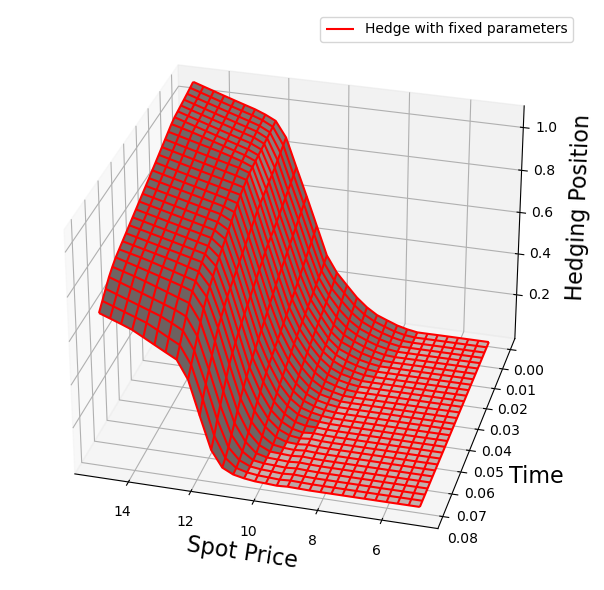

In [12]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid_fix = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid_fix[i,j] = hedge_fix([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)

# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid_fix,color = "mistyrose")
ax.plot_wireframe(X, Y , grid_fix,color = "red",label = "Hedge with fixed parameters")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
plt.legend()
plt.tight_layout()
plt.savefig('eps/fig_path_dependent_uncertain_fix.eps', format='eps')
plt.show()

Compare the hedges

In [13]:
style.use('ggplot')
BATCH_SIZE = 50000 # Nr of Samples for the Histogram
t_k = np.linspace(0,T,n+1)

# The hedge with fix gamma
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated_fix = [hedge_fix([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S_fix = tf.reduce_sum([hedge_evaluated_fix[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch_fix = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

# The hedge for the model with uncertainty
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)]) 

Compare how the hedges perform.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
<ipython-input-14-e36851560d41>:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


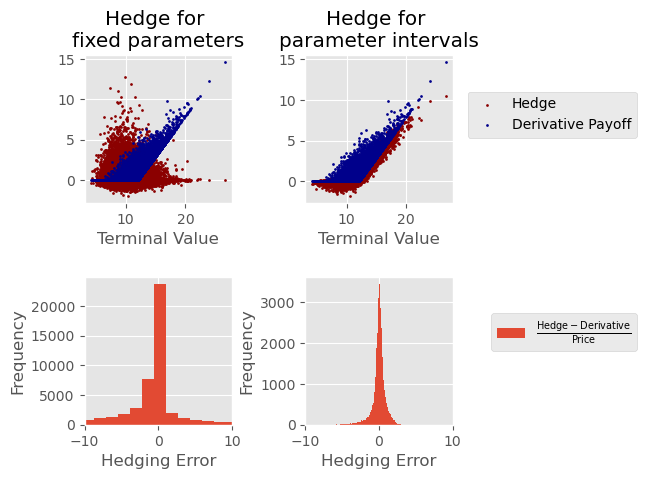

In [14]:
style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5,wspace = 0.5,right=0.7)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price_fix + delta_S_fix,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
axs[0,0].set_xlabel("Terminal Value")
axs[0,0].set_title("Hedge for \nfixed parameters")
axs[0,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative",s=2)
axs[0,1].set_xlabel("Terminal Value")
axs[0,1].set_title("Hedge for \nparameter intervals")

hedging_error_fix = (((price_fix + delta_S_fix) - derivative_on_batch)/price_fix).numpy()
axs[1,0].hist(hedging_error_fix,100,label = r"$\frac{\mathrm{Hedge}-\mathrm{Derivative}}{\mathrm{Price}}$")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_xlim([-10,10])
axs[1,0].set_xlabel("Hedging Error")
axs[1,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

hedging_error = (((price + delta_S) - derivative_on_batch)/price).numpy()
axs[1,1].hist(hedging_error,200)
axs[1,1].set_xlabel("Hedging Error")
axs[1,1].set_xlim([-10,10])
axs[1,1].set_ylabel("Frequency")

fig.savefig('eps/fig_path_dependent_example_hedge_error.eps', format='eps')
fig.show()

Adjusted Histogram: Difference between hedging errors

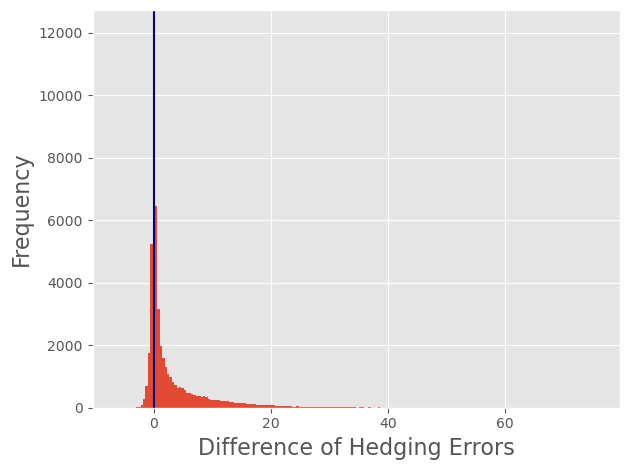

In [15]:
hedging_difference = np.abs(hedging_error_fix) - np.abs(hedging_error)
plt.hist(hedging_difference,200)
plt.axvline(x=0,color="darkblue")
#plt.xlim([-10,10])
plt.xlabel("Difference of Hedging Errors", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
#plt.title("Difference of Hedging Errors", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_histogram_path_dependent_difference.eps', format='eps')
plt.show()

## Statistics on Relative Hedging Errors

Fixed Parameters:

In [16]:
pd.DataFrame(np.abs(hedging_error_fix)).describe()

,0
count,50000.000000
mean,3.558276
std,6.048223
min,0.000032
25%,0.249716
50%,0.816828
75%,4.164591
max,87.322945


Robust Parameters:

In [17]:
pd.DataFrame(np.abs(hedging_error)).describe()

,0
count,50000.000000
mean,0.585754
std,0.722869
min,0.000001
25%,0.146659
50%,0.339666
75%,0.742108
max,11.892262


# Part 2)
# Non-Markovian Setting: We let the hedge depend also on the max

In [18]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
a_0 = [0.3,0.7]
a_1 = [0.4,0.6]
b_0 = [-0.2,0.2]
b_1 = [-0.1,0.1]
gamma = [0.5,1.5]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(tf.math.reduce_max(path)-12)

price_non_M, hedge_non_M = optimal_hedge(derivative,a_0,a_1,b_0,b_1,gamma,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256,
                            path_dependent = True)

  0%|          | 11/10000 [00:04<1:05:15,  2.55it/s]

Iteration:10, Price of Hedge: 0.3092694878578186, Loss: 1.144625186920166


  0%|          | 21/10000 [00:08<1:01:18,  2.71it/s]

Iteration:20, Price of Hedge: 0.3236747682094574, Loss: 0.5948693156242371


  0%|          | 31/10000 [00:11<1:04:33,  2.57it/s]

Iteration:30, Price of Hedge: 0.3401971757411957, Loss: 0.32043367624282837


  0%|          | 41/10000 [00:15<1:01:52,  2.68it/s]

Iteration:40, Price of Hedge: 0.34927862882614136, Loss: 0.3731715977191925


  1%|          | 51/10000 [00:19<1:04:53,  2.56it/s]

Iteration:50, Price of Hedge: 0.3583925664424896, Loss: 0.2044210135936737


  1%|          | 61/10000 [00:23<1:07:00,  2.47it/s]

Iteration:60, Price of Hedge: 0.3633003234863281, Loss: 0.4121913015842438


  1%|          | 71/10000 [00:27<1:02:37,  2.64it/s]

Iteration:70, Price of Hedge: 0.3657386898994446, Loss: 0.4347831606864929


  1%|          | 81/10000 [00:31<1:08:14,  2.42it/s]

Iteration:80, Price of Hedge: 0.3698290288448334, Loss: 0.3478415012359619


  1%|          | 91/10000 [00:35<1:04:46,  2.55it/s]

Iteration:90, Price of Hedge: 0.37111109495162964, Loss: 0.21508000791072845


  1%|          | 101/10000 [00:39<1:07:05,  2.46it/s]

Iteration:100, Price of Hedge: 0.36704787611961365, Loss: 0.2521781921386719


  1%|          | 111/10000 [00:43<1:05:04,  2.53it/s]

Iteration:110, Price of Hedge: 0.36095064878463745, Loss: 0.1401349902153015


  1%|          | 121/10000 [00:47<1:01:37,  2.67it/s]

Iteration:120, Price of Hedge: 0.35439935326576233, Loss: 0.25546756386756897


  1%|▏         | 131/10000 [00:51<1:00:35,  2.71it/s]

Iteration:130, Price of Hedge: 0.35669219493865967, Loss: 0.2376825362443924


  1%|▏         | 141/10000 [00:54<1:00:58,  2.69it/s]

Iteration:140, Price of Hedge: 0.3655630350112915, Loss: 0.22618290781974792


  2%|▏         | 151/10000 [00:58<1:03:57,  2.57it/s]

Iteration:150, Price of Hedge: 0.37348249554634094, Loss: 0.19976335763931274


  2%|▏         | 161/10000 [01:02<1:00:55,  2.69it/s]

Iteration:160, Price of Hedge: 0.36694270372390747, Loss: 0.19108396768569946


  2%|▏         | 171/10000 [01:06<59:44,  2.74it/s]  

Iteration:170, Price of Hedge: 0.3592534065246582, Loss: 0.2750156819820404


  2%|▏         | 181/10000 [01:09<59:33,  2.75it/s]  

Iteration:180, Price of Hedge: 0.3608359694480896, Loss: 0.2397874891757965


  2%|▏         | 191/10000 [01:13<59:52,  2.73it/s]  

Iteration:190, Price of Hedge: 0.3578907549381256, Loss: 0.1642516702413559


  2%|▏         | 201/10000 [01:17<1:00:04,  2.72it/s]

Iteration:200, Price of Hedge: 0.3536422550678253, Loss: 0.18136847019195557


  2%|▏         | 211/10000 [01:20<59:50,  2.73it/s]  

Iteration:210, Price of Hedge: 0.36252862215042114, Loss: 0.1577712893486023


  2%|▏         | 221/10000 [01:24<59:47,  2.73it/s]  

Iteration:220, Price of Hedge: 0.3648063540458679, Loss: 0.20039880275726318


  2%|▏         | 231/10000 [01:28<1:00:49,  2.68it/s]

Iteration:230, Price of Hedge: 0.35741275548934937, Loss: 0.11252040416002274


  2%|▏         | 241/10000 [01:32<1:02:02,  2.62it/s]

Iteration:240, Price of Hedge: 0.35202670097351074, Loss: 0.14586719870567322


  3%|▎         | 251/10000 [01:36<1:03:52,  2.54it/s]

Iteration:250, Price of Hedge: 0.3514126241207123, Loss: 0.15312156081199646


  3%|▎         | 261/10000 [01:40<1:09:55,  2.32it/s]

Iteration:260, Price of Hedge: 0.35506802797317505, Loss: 0.2530219554901123


  3%|▎         | 271/10000 [01:44<59:38,  2.72it/s]  

Iteration:270, Price of Hedge: 0.3610115349292755, Loss: 0.13740837574005127


  3%|▎         | 281/10000 [01:47<1:01:18,  2.64it/s]

Iteration:280, Price of Hedge: 0.36270037293434143, Loss: 0.12413401901721954


  3%|▎         | 291/10000 [01:51<1:00:03,  2.69it/s]

Iteration:290, Price of Hedge: 0.35838860273361206, Loss: 0.1758185625076294


  3%|▎         | 301/10000 [01:55<1:01:44,  2.62it/s]

Iteration:300, Price of Hedge: 0.3568883538246155, Loss: 0.14070263504981995


  3%|▎         | 311/10000 [01:59<1:01:42,  2.62it/s]

Iteration:310, Price of Hedge: 0.3606216609477997, Loss: 0.2202381044626236


  3%|▎         | 321/10000 [02:03<1:05:55,  2.45it/s]

Iteration:320, Price of Hedge: 0.36533042788505554, Loss: 0.1610345095396042


  3%|▎         | 331/10000 [02:07<1:06:01,  2.44it/s]

Iteration:330, Price of Hedge: 0.3659861981868744, Loss: 0.16346317529678345


  3%|▎         | 341/10000 [02:11<1:03:18,  2.54it/s]

Iteration:340, Price of Hedge: 0.3583795130252838, Loss: 0.15297628939151764


  4%|▎         | 351/10000 [02:15<1:01:14,  2.63it/s]

Iteration:350, Price of Hedge: 0.3605041801929474, Loss: 0.1536051332950592


  4%|▎         | 361/10000 [02:18<59:27,  2.70it/s]  

Iteration:360, Price of Hedge: 0.35734423995018005, Loss: 0.13729648292064667


  4%|▎         | 371/10000 [02:22<1:03:12,  2.54it/s]

Iteration:370, Price of Hedge: 0.362500935792923, Loss: 0.16742287576198578


  4%|▍         | 381/10000 [02:26<1:01:34,  2.60it/s]

Iteration:380, Price of Hedge: 0.36794352531433105, Loss: 0.20779980719089508


  4%|▍         | 391/10000 [02:30<1:01:17,  2.61it/s]

Iteration:390, Price of Hedge: 0.3600935637950897, Loss: 0.1106647402048111


  4%|▍         | 401/10000 [02:34<1:04:30,  2.48it/s]

Iteration:400, Price of Hedge: 0.35625600814819336, Loss: 0.1310867816209793


  4%|▍         | 411/10000 [02:38<1:00:27,  2.64it/s]

Iteration:410, Price of Hedge: 0.3585927486419678, Loss: 0.13412444293498993


  4%|▍         | 421/10000 [02:41<59:57,  2.66it/s]  

Iteration:420, Price of Hedge: 0.3594367206096649, Loss: 0.1220531016588211


  4%|▍         | 431/10000 [02:45<1:05:27,  2.44it/s]

Iteration:430, Price of Hedge: 0.3602939248085022, Loss: 0.1799725890159607


  4%|▍         | 441/10000 [02:49<1:00:51,  2.62it/s]

Iteration:440, Price of Hedge: 0.37029826641082764, Loss: 0.15694937109947205


  5%|▍         | 451/10000 [02:53<59:23,  2.68it/s]  

Iteration:450, Price of Hedge: 0.3666016459465027, Loss: 0.14535164833068848


  5%|▍         | 461/10000 [02:57<59:44,  2.66it/s]  

Iteration:460, Price of Hedge: 0.35629791021347046, Loss: 0.14354658126831055


  5%|▍         | 471/10000 [03:01<1:01:15,  2.59it/s]

Iteration:470, Price of Hedge: 0.35260874032974243, Loss: 0.16709555685520172


  5%|▍         | 481/10000 [03:04<1:01:18,  2.59it/s]

Iteration:480, Price of Hedge: 0.36202573776245117, Loss: 0.13099639117717743


  5%|▍         | 491/10000 [03:08<1:01:32,  2.58it/s]

Iteration:490, Price of Hedge: 0.36066097021102905, Loss: 0.18898488581180573


  5%|▌         | 501/10000 [03:12<58:54,  2.69it/s]  

Iteration:500, Price of Hedge: 0.3525964021682739, Loss: 0.14264154434204102


  5%|▌         | 511/10000 [03:16<1:02:10,  2.54it/s]

Iteration:510, Price of Hedge: 0.3471479117870331, Loss: 0.18740972876548767


  5%|▌         | 521/10000 [03:20<1:01:16,  2.58it/s]

Iteration:520, Price of Hedge: 0.3503260910511017, Loss: 0.18098394572734833


  5%|▌         | 531/10000 [03:24<1:00:15,  2.62it/s]

Iteration:530, Price of Hedge: 0.35320842266082764, Loss: 0.16859939694404602


  5%|▌         | 541/10000 [03:27<59:19,  2.66it/s]  

Iteration:540, Price of Hedge: 0.3644455075263977, Loss: 0.13547544181346893


  6%|▌         | 551/10000 [03:31<58:22,  2.70it/s]  

Iteration:550, Price of Hedge: 0.3687923550605774, Loss: 0.1196649819612503


  6%|▌         | 561/10000 [03:35<1:04:07,  2.45it/s]

Iteration:560, Price of Hedge: 0.3576522469520569, Loss: 0.13440600037574768


  6%|▌         | 571/10000 [03:39<1:08:18,  2.30it/s]

Iteration:570, Price of Hedge: 0.35230380296707153, Loss: 0.14500074088573456


  6%|▌         | 581/10000 [03:43<58:23,  2.69it/s]  

Iteration:580, Price of Hedge: 0.35322773456573486, Loss: 0.12292993068695068


  6%|▌         | 591/10000 [03:47<57:04,  2.75it/s]  

Iteration:590, Price of Hedge: 0.36202141642570496, Loss: 0.12021084129810333


  6%|▌         | 601/10000 [03:51<57:16,  2.74it/s]

Iteration:600, Price of Hedge: 0.35919734835624695, Loss: 0.1561371088027954


  6%|▌         | 611/10000 [03:54<58:32,  2.67it/s]

Iteration:610, Price of Hedge: 0.364610880613327, Loss: 0.19207797944545746


  6%|▌         | 621/10000 [03:58<59:25,  2.63it/s]  

Iteration:620, Price of Hedge: 0.36537259817123413, Loss: 0.1167592853307724


  6%|▋         | 631/10000 [04:02<1:06:02,  2.36it/s]

Iteration:630, Price of Hedge: 0.3589943051338196, Loss: 0.10678502172231674


  6%|▋         | 641/10000 [04:06<58:06,  2.68it/s]  

Iteration:640, Price of Hedge: 0.3586972653865814, Loss: 0.1827104091644287


  7%|▋         | 651/10000 [04:10<57:05,  2.73it/s]  

Iteration:650, Price of Hedge: 0.3506094217300415, Loss: 0.16598239541053772


  7%|▋         | 661/10000 [04:14<1:02:23,  2.49it/s]

Iteration:660, Price of Hedge: 0.3540678024291992, Loss: 0.2007823884487152


  7%|▋         | 671/10000 [04:18<1:03:12,  2.46it/s]

Iteration:670, Price of Hedge: 0.35209742188453674, Loss: 0.15565307438373566


  7%|▋         | 681/10000 [04:21<58:34,  2.65it/s]  

Iteration:680, Price of Hedge: 0.3504776358604431, Loss: 0.1387859433889389


  7%|▋         | 691/10000 [04:25<1:00:30,  2.56it/s]

Iteration:690, Price of Hedge: 0.3623456358909607, Loss: 0.178766667842865


  7%|▋         | 701/10000 [04:29<59:08,  2.62it/s]  

Iteration:700, Price of Hedge: 0.36255016922950745, Loss: 0.15808366239070892


  7%|▋         | 711/10000 [04:33<59:27,  2.60it/s]  

Iteration:710, Price of Hedge: 0.3681434988975525, Loss: 0.13554774224758148


  7%|▋         | 721/10000 [04:37<59:51,  2.58it/s]  

Iteration:720, Price of Hedge: 0.3653883934020996, Loss: 0.17612656950950623


  7%|▋         | 731/10000 [04:41<59:04,  2.62it/s]  

Iteration:730, Price of Hedge: 0.35560256242752075, Loss: 0.1655658483505249


  7%|▋         | 741/10000 [04:45<59:08,  2.61it/s]  

Iteration:740, Price of Hedge: 0.34685462713241577, Loss: 0.1143418624997139


  8%|▊         | 751/10000 [04:49<1:19:50,  1.93it/s]

Iteration:750, Price of Hedge: 0.35085514187812805, Loss: 0.11348824203014374


  8%|▊         | 761/10000 [04:54<1:06:18,  2.32it/s]

Iteration:760, Price of Hedge: 0.3645172119140625, Loss: 0.16667768359184265


  8%|▊         | 771/10000 [04:58<1:12:21,  2.13it/s]

Iteration:770, Price of Hedge: 0.36957594752311707, Loss: 0.16434885561466217


  8%|▊         | 781/10000 [05:02<1:07:41,  2.27it/s]

Iteration:780, Price of Hedge: 0.3652786612510681, Loss: 0.17396919429302216


  8%|▊         | 791/10000 [05:07<1:03:46,  2.41it/s]

Iteration:790, Price of Hedge: 0.36259087920188904, Loss: 0.11914923042058945


  8%|▊         | 801/10000 [05:11<59:18,  2.59it/s]  

Iteration:800, Price of Hedge: 0.3573356568813324, Loss: 0.1966366320848465


  8%|▊         | 811/10000 [05:15<1:06:15,  2.31it/s]

Iteration:810, Price of Hedge: 0.34976112842559814, Loss: 0.1067642867565155


  8%|▊         | 821/10000 [05:19<1:06:18,  2.31it/s]

Iteration:820, Price of Hedge: 0.3512060344219208, Loss: 0.1700631082057953


  8%|▊         | 831/10000 [05:23<1:02:07,  2.46it/s]

Iteration:830, Price of Hedge: 0.36119550466537476, Loss: 0.15214672684669495


  8%|▊         | 841/10000 [05:27<1:04:36,  2.36it/s]

Iteration:840, Price of Hedge: 0.36059093475341797, Loss: 0.1255936473608017


  9%|▊         | 851/10000 [05:31<59:48,  2.55it/s]  

Iteration:850, Price of Hedge: 0.3603209853172302, Loss: 0.1467057168483734


  9%|▊         | 861/10000 [05:36<1:16:45,  1.98it/s]

Iteration:860, Price of Hedge: 0.35765257477760315, Loss: 0.1503545045852661


  9%|▊         | 871/10000 [05:40<1:01:27,  2.48it/s]

Iteration:870, Price of Hedge: 0.3572724461555481, Loss: 0.1475829780101776


  9%|▉         | 881/10000 [05:44<58:08,  2.61it/s]  

Iteration:880, Price of Hedge: 0.35914403200149536, Loss: 0.10719294846057892


  9%|▉         | 891/10000 [05:48<57:22,  2.65it/s]  

Iteration:890, Price of Hedge: 0.3577248752117157, Loss: 0.1280832439661026


  9%|▉         | 901/10000 [05:52<57:54,  2.62it/s]  

Iteration:900, Price of Hedge: 0.3555369973182678, Loss: 0.1548052430152893


  9%|▉         | 911/10000 [05:56<1:00:41,  2.50it/s]

Iteration:910, Price of Hedge: 0.3517787754535675, Loss: 0.11857469379901886


  9%|▉         | 921/10000 [06:00<57:26,  2.63it/s]  

Iteration:920, Price of Hedge: 0.3474772572517395, Loss: 0.14316216111183167


  9%|▉         | 931/10000 [06:03<57:14,  2.64it/s]  

Iteration:930, Price of Hedge: 0.3630784749984741, Loss: 0.11162780970335007


  9%|▉         | 941/10000 [06:07<59:23,  2.54it/s]  

Iteration:940, Price of Hedge: 0.372292697429657, Loss: 0.15995165705680847


 10%|▉         | 951/10000 [06:11<58:11,  2.59it/s]

Iteration:950, Price of Hedge: 0.37835267186164856, Loss: 0.10411426424980164


 10%|▉         | 961/10000 [06:15<1:02:04,  2.43it/s]

Iteration:960, Price of Hedge: 0.3691347539424896, Loss: 0.13842657208442688


 10%|▉         | 971/10000 [06:20<1:12:10,  2.08it/s]

Iteration:970, Price of Hedge: 0.34899112582206726, Loss: 0.1093834787607193


 10%|▉         | 981/10000 [06:25<1:10:44,  2.12it/s]

Iteration:980, Price of Hedge: 0.34900614619255066, Loss: 0.12676376104354858


 10%|▉         | 991/10000 [06:31<1:30:48,  1.65it/s]

Iteration:990, Price of Hedge: 0.3659413754940033, Loss: 0.1269071251153946


 10%|█         | 1001/10000 [06:37<1:28:13,  1.70it/s]

Iteration:1000, Price of Hedge: 0.36300018429756165, Loss: 0.13223020732402802


 10%|█         | 1011/10000 [06:42<1:24:17,  1.78it/s]

Iteration:1010, Price of Hedge: 0.36371588706970215, Loss: 0.15360873937606812


 10%|█         | 1021/10000 [06:48<1:24:22,  1.77it/s]

Iteration:1020, Price of Hedge: 0.36237263679504395, Loss: 0.06421378999948502


 10%|█         | 1031/10000 [06:54<1:25:25,  1.75it/s]

Iteration:1030, Price of Hedge: 0.36140871047973633, Loss: 0.17637422680854797


 10%|█         | 1041/10000 [06:59<1:24:30,  1.77it/s]

Iteration:1040, Price of Hedge: 0.3614259362220764, Loss: 0.1453554928302765


 11%|█         | 1051/10000 [07:05<1:26:54,  1.72it/s]

Iteration:1050, Price of Hedge: 0.36272066831588745, Loss: 0.23311057686805725


 11%|█         | 1061/10000 [07:11<1:24:42,  1.76it/s]

Iteration:1060, Price of Hedge: 0.3526378273963928, Loss: 0.10596540570259094


 11%|█         | 1071/10000 [07:16<1:18:13,  1.90it/s]

Iteration:1070, Price of Hedge: 0.34976115822792053, Loss: 0.10815156996250153


 11%|█         | 1081/10000 [07:22<1:23:12,  1.79it/s]

Iteration:1080, Price of Hedge: 0.3509623408317566, Loss: 0.19497737288475037


 11%|█         | 1091/10000 [07:26<1:02:59,  2.36it/s]

Iteration:1090, Price of Hedge: 0.3613635301589966, Loss: 0.11255922168493271


 11%|█         | 1101/10000 [07:31<1:03:51,  2.32it/s]

Iteration:1100, Price of Hedge: 0.36564144492149353, Loss: 0.09218550473451614


 11%|█         | 1111/10000 [07:35<1:07:50,  2.18it/s]

Iteration:1110, Price of Hedge: 0.3550657331943512, Loss: 0.14923009276390076


 11%|█         | 1121/10000 [07:39<1:04:50,  2.28it/s]

Iteration:1120, Price of Hedge: 0.3578924834728241, Loss: 0.09960415959358215


 11%|█▏        | 1131/10000 [07:43<57:00,  2.59it/s]  

Iteration:1130, Price of Hedge: 0.3607170581817627, Loss: 0.1499420404434204


 11%|█▏        | 1141/10000 [07:47<1:00:20,  2.45it/s]

Iteration:1140, Price of Hedge: 0.35973745584487915, Loss: 0.146569162607193


 12%|█▏        | 1151/10000 [07:51<1:02:47,  2.35it/s]

Iteration:1150, Price of Hedge: 0.36216023564338684, Loss: 0.10697315633296967


 12%|█▏        | 1161/10000 [07:55<56:07,  2.63it/s]  

Iteration:1160, Price of Hedge: 0.3526245951652527, Loss: 0.10280489921569824


 12%|█▏        | 1171/10000 [07:59<53:56,  2.73it/s]

Iteration:1170, Price of Hedge: 0.35118234157562256, Loss: 0.1107424944639206


 12%|█▏        | 1181/10000 [08:03<53:58,  2.72it/s]

Iteration:1180, Price of Hedge: 0.3580159544944763, Loss: 0.15671224892139435


 12%|█▏        | 1191/10000 [08:06<53:26,  2.75it/s]

Iteration:1190, Price of Hedge: 0.35525527596473694, Loss: 0.1416025608778


 12%|█▏        | 1201/10000 [08:10<55:04,  2.66it/s]

Iteration:1200, Price of Hedge: 0.3746134638786316, Loss: 0.13521850109100342


 12%|█▏        | 1211/10000 [08:14<54:27,  2.69it/s]

Iteration:1210, Price of Hedge: 0.37273284792900085, Loss: 0.1357651650905609


 12%|█▏        | 1221/10000 [08:18<57:53,  2.53it/s]

Iteration:1220, Price of Hedge: 0.3611786365509033, Loss: 0.13342837989330292


 12%|█▏        | 1231/10000 [08:22<56:46,  2.57it/s]

Iteration:1230, Price of Hedge: 0.3574979901313782, Loss: 0.16445176303386688


 12%|█▏        | 1241/10000 [08:26<59:26,  2.46it/s]

Iteration:1240, Price of Hedge: 0.35872167348861694, Loss: 0.15786099433898926


 13%|█▎        | 1251/10000 [08:30<56:20,  2.59it/s]

Iteration:1250, Price of Hedge: 0.35676056146621704, Loss: 0.16965515911579132


 13%|█▎        | 1261/10000 [08:33<55:31,  2.62it/s]

Iteration:1260, Price of Hedge: 0.36105990409851074, Loss: 0.16191771626472473


 13%|█▎        | 1271/10000 [08:37<55:19,  2.63it/s]

Iteration:1270, Price of Hedge: 0.366188645362854, Loss: 0.16111622750759125


 13%|█▎        | 1281/10000 [08:41<55:41,  2.61it/s]

Iteration:1280, Price of Hedge: 0.36108824610710144, Loss: 0.10779480636119843


 13%|█▎        | 1291/10000 [08:45<54:43,  2.65it/s]

Iteration:1290, Price of Hedge: 0.3706645965576172, Loss: 0.1738872081041336


 13%|█▎        | 1301/10000 [08:49<57:17,  2.53it/s]  

Iteration:1300, Price of Hedge: 0.3727879226207733, Loss: 0.19511590898036957


 13%|█▎        | 1311/10000 [08:53<54:41,  2.65it/s]

Iteration:1310, Price of Hedge: 0.36678919196128845, Loss: 0.0968337133526802


 13%|█▎        | 1321/10000 [08:56<53:08,  2.72it/s]

Iteration:1320, Price of Hedge: 0.3523868918418884, Loss: 0.18204261362552643


 13%|█▎        | 1331/10000 [09:00<1:04:13,  2.25it/s]

Iteration:1330, Price of Hedge: 0.35833364725112915, Loss: 0.11215053498744965


 13%|█▎        | 1341/10000 [09:05<1:00:34,  2.38it/s]

Iteration:1340, Price of Hedge: 0.35560452938079834, Loss: 0.12211328744888306


 14%|█▎        | 1351/10000 [09:10<1:19:11,  1.82it/s]

Iteration:1350, Price of Hedge: 0.3565821945667267, Loss: 0.10147497802972794


 14%|█▎        | 1361/10000 [09:15<1:18:13,  1.84it/s]

Iteration:1360, Price of Hedge: 0.3621675372123718, Loss: 0.12436111271381378


 14%|█▎        | 1371/10000 [09:20<1:08:32,  2.10it/s]

Iteration:1370, Price of Hedge: 0.36816099286079407, Loss: 0.11289172619581223


 14%|█▍        | 1381/10000 [09:24<58:41,  2.45it/s]  

Iteration:1380, Price of Hedge: 0.3571857213973999, Loss: 0.1410919725894928


 14%|█▍        | 1391/10000 [09:28<59:09,  2.43it/s]  

Iteration:1390, Price of Hedge: 0.354471892118454, Loss: 0.1094730794429779


 14%|█▍        | 1401/10000 [09:32<55:34,  2.58it/s]

Iteration:1400, Price of Hedge: 0.3608255088329315, Loss: 0.147689089179039


 14%|█▍        | 1411/10000 [09:36<58:42,  2.44it/s]

Iteration:1410, Price of Hedge: 0.3691401183605194, Loss: 0.1401926875114441


 14%|█▍        | 1421/10000 [09:41<1:13:16,  1.95it/s]

Iteration:1420, Price of Hedge: 0.3497476577758789, Loss: 0.22705821692943573


 14%|█▍        | 1431/10000 [09:45<1:01:35,  2.32it/s]

Iteration:1430, Price of Hedge: 0.35067474842071533, Loss: 0.17587122321128845


 14%|█▍        | 1441/10000 [09:49<57:01,  2.50it/s]  

Iteration:1440, Price of Hedge: 0.3597625195980072, Loss: 0.15684646368026733


 15%|█▍        | 1451/10000 [09:53<56:09,  2.54it/s]

Iteration:1450, Price of Hedge: 0.36483094096183777, Loss: 0.19672878086566925


 15%|█▍        | 1461/10000 [09:57<54:35,  2.61it/s]

Iteration:1460, Price of Hedge: 0.3655698895454407, Loss: 0.0958353579044342


 15%|█▍        | 1471/10000 [10:01<53:37,  2.65it/s]

Iteration:1470, Price of Hedge: 0.36727532744407654, Loss: 0.19152870774269104


 15%|█▍        | 1481/10000 [10:05<54:20,  2.61it/s]

Iteration:1480, Price of Hedge: 0.35646700859069824, Loss: 0.10241000354290009


 15%|█▍        | 1491/10000 [10:08<52:57,  2.68it/s]

Iteration:1490, Price of Hedge: 0.35526660084724426, Loss: 0.11505685746669769


 15%|█▌        | 1501/10000 [10:12<55:57,  2.53it/s]

Iteration:1500, Price of Hedge: 0.3497419059276581, Loss: 0.12400802969932556


 15%|█▌        | 1511/10000 [10:16<54:05,  2.62it/s]

Iteration:1510, Price of Hedge: 0.3606199026107788, Loss: 0.11234267055988312


 15%|█▌        | 1521/10000 [10:20<56:48,  2.49it/s]

Iteration:1520, Price of Hedge: 0.3660791218280792, Loss: 0.14200875163078308


 15%|█▌        | 1531/10000 [10:24<52:58,  2.66it/s]

Iteration:1530, Price of Hedge: 0.3493748903274536, Loss: 0.1045427918434143


 15%|█▌        | 1541/10000 [10:28<54:02,  2.61it/s]

Iteration:1540, Price of Hedge: 0.34847205877304077, Loss: 0.17538601160049438


 16%|█▌        | 1551/10000 [10:32<55:12,  2.55it/s]

Iteration:1550, Price of Hedge: 0.36336907744407654, Loss: 0.11667908728122711


 16%|█▌        | 1561/10000 [10:36<58:30,  2.40it/s]

Iteration:1560, Price of Hedge: 0.37786322832107544, Loss: 0.09482860565185547


 16%|█▌        | 1571/10000 [10:40<1:08:11,  2.06it/s]

Iteration:1570, Price of Hedge: 0.37008604407310486, Loss: 0.10945343226194382


 16%|█▌        | 1581/10000 [10:45<1:05:39,  2.14it/s]

Iteration:1580, Price of Hedge: 0.35746294260025024, Loss: 0.17200741171836853


 16%|█▌        | 1591/10000 [10:49<1:00:06,  2.33it/s]

Iteration:1590, Price of Hedge: 0.3635144531726837, Loss: 0.10644856095314026


 16%|█▌        | 1601/10000 [10:54<1:10:44,  1.98it/s]

Iteration:1600, Price of Hedge: 0.3730243146419525, Loss: 0.1349039375782013


 16%|█▌        | 1611/10000 [10:59<1:13:57,  1.89it/s]

Iteration:1610, Price of Hedge: 0.36068275570869446, Loss: 0.13361425697803497


 16%|█▌        | 1621/10000 [11:03<52:11,  2.68it/s]  

Iteration:1620, Price of Hedge: 0.3643094599246979, Loss: 0.09836189448833466


 16%|█▋        | 1631/10000 [11:07<52:04,  2.68it/s]

Iteration:1630, Price of Hedge: 0.36148202419281006, Loss: 0.16100339591503143


 16%|█▋        | 1641/10000 [11:11<55:56,  2.49it/s]

Iteration:1640, Price of Hedge: 0.35786908864974976, Loss: 0.08360433578491211


 17%|█▋        | 1651/10000 [11:14<51:38,  2.69it/s]

Iteration:1650, Price of Hedge: 0.3626393675804138, Loss: 0.15335780382156372


 17%|█▋        | 1661/10000 [11:18<52:23,  2.65it/s]

Iteration:1660, Price of Hedge: 0.36485621333122253, Loss: 0.06543774902820587


 17%|█▋        | 1671/10000 [11:22<54:09,  2.56it/s]

Iteration:1670, Price of Hedge: 0.34905919432640076, Loss: 0.19817429780960083


 17%|█▋        | 1681/10000 [11:26<53:29,  2.59it/s]

Iteration:1680, Price of Hedge: 0.34521156549453735, Loss: 0.194871723651886


 17%|█▋        | 1691/10000 [11:30<52:43,  2.63it/s]

Iteration:1690, Price of Hedge: 0.354107528924942, Loss: 0.10206888616085052


 17%|█▋        | 1701/10000 [11:33<51:09,  2.70it/s]

Iteration:1700, Price of Hedge: 0.3644663095474243, Loss: 0.1273365169763565


 17%|█▋        | 1711/10000 [11:38<1:06:50,  2.07it/s]

Iteration:1710, Price of Hedge: 0.36541303992271423, Loss: 0.13149724900722504


 17%|█▋        | 1721/10000 [11:42<54:24,  2.54it/s]  

Iteration:1720, Price of Hedge: 0.36514320969581604, Loss: 0.11400395631790161


 17%|█▋        | 1731/10000 [11:46<54:00,  2.55it/s]

Iteration:1730, Price of Hedge: 0.3571684658527374, Loss: 0.14699460566043854


 17%|█▋        | 1741/10000 [11:50<51:51,  2.65it/s]

Iteration:1740, Price of Hedge: 0.351909875869751, Loss: 0.192123144865036


 18%|█▊        | 1751/10000 [11:54<50:50,  2.70it/s]

Iteration:1750, Price of Hedge: 0.3610423505306244, Loss: 0.16866162419319153


 18%|█▊        | 1761/10000 [11:58<52:48,  2.60it/s]

Iteration:1760, Price of Hedge: 0.36823680996894836, Loss: 0.13582287728786469


 18%|█▊        | 1771/10000 [12:02<49:56,  2.75it/s]

Iteration:1770, Price of Hedge: 0.3579891324043274, Loss: 0.12367091327905655


 18%|█▊        | 1781/10000 [12:05<50:14,  2.73it/s]

Iteration:1780, Price of Hedge: 0.3479878306388855, Loss: 0.1200084239244461


 18%|█▊        | 1791/10000 [12:09<51:23,  2.66it/s]

Iteration:1790, Price of Hedge: 0.35386478900909424, Loss: 0.1033468022942543


 18%|█▊        | 1801/10000 [12:13<51:44,  2.64it/s]

Iteration:1800, Price of Hedge: 0.3562242388725281, Loss: 0.10889485478401184


 18%|█▊        | 1811/10000 [12:17<51:06,  2.67it/s]

Iteration:1810, Price of Hedge: 0.3591861128807068, Loss: 0.10127213597297668


 18%|█▊        | 1821/10000 [12:20<50:49,  2.68it/s]

Iteration:1820, Price of Hedge: 0.35363876819610596, Loss: 0.1315997838973999


 18%|█▊        | 1831/10000 [12:24<50:35,  2.69it/s]

Iteration:1830, Price of Hedge: 0.3554404675960541, Loss: 0.18408356606960297


 18%|█▊        | 1841/10000 [12:28<51:55,  2.62it/s]

Iteration:1840, Price of Hedge: 0.35486847162246704, Loss: 0.30722829699516296


 19%|█▊        | 1851/10000 [12:32<52:48,  2.57it/s]

Iteration:1850, Price of Hedge: 0.35525065660476685, Loss: 0.173722505569458


 19%|█▊        | 1861/10000 [12:35<52:30,  2.58it/s]

Iteration:1860, Price of Hedge: 0.3632356822490692, Loss: 0.13669610023498535


 19%|█▊        | 1871/10000 [12:39<54:00,  2.51it/s]

Iteration:1870, Price of Hedge: 0.3586488664150238, Loss: 0.1571386754512787


 19%|█▉        | 1881/10000 [12:44<1:10:02,  1.93it/s]

Iteration:1880, Price of Hedge: 0.35572919249534607, Loss: 0.1607588231563568


 19%|█▉        | 1891/10000 [12:48<52:15,  2.59it/s]  

Iteration:1890, Price of Hedge: 0.3590267300605774, Loss: 0.12994061410427094


 19%|█▉        | 1901/10000 [12:52<52:05,  2.59it/s]

Iteration:1900, Price of Hedge: 0.3675162196159363, Loss: 0.15981648862361908


 19%|█▉        | 1911/10000 [12:56<52:37,  2.56it/s]

Iteration:1910, Price of Hedge: 0.3645773231983185, Loss: 0.10819221287965775


 19%|█▉        | 1921/10000 [12:59<50:55,  2.64it/s]

Iteration:1920, Price of Hedge: 0.3619841933250427, Loss: 0.10027560591697693


 19%|█▉        | 1931/10000 [13:03<51:53,  2.59it/s]

Iteration:1930, Price of Hedge: 0.3565985858440399, Loss: 0.11137497425079346


 19%|█▉        | 1941/10000 [13:07<51:01,  2.63it/s]

Iteration:1940, Price of Hedge: 0.3534177541732788, Loss: 0.12736272811889648


 20%|█▉        | 1951/10000 [13:11<50:43,  2.64it/s]

Iteration:1950, Price of Hedge: 0.3577267825603485, Loss: 0.13244979083538055


 20%|█▉        | 1961/10000 [13:15<51:18,  2.61it/s]

Iteration:1960, Price of Hedge: 0.3563807010650635, Loss: 0.08869688212871552


 20%|█▉        | 1971/10000 [13:19<52:01,  2.57it/s]

Iteration:1970, Price of Hedge: 0.36209824681282043, Loss: 0.09200287610292435


 20%|█▉        | 1981/10000 [13:22<50:17,  2.66it/s]

Iteration:1980, Price of Hedge: 0.3688400685787201, Loss: 0.10872049629688263


 20%|█▉        | 1991/10000 [13:26<49:22,  2.70it/s]

Iteration:1990, Price of Hedge: 0.37267372012138367, Loss: 0.096206896007061


 20%|██        | 2001/10000 [13:30<50:31,  2.64it/s]

Iteration:2000, Price of Hedge: 0.34892508387565613, Loss: 0.09846660494804382


 20%|██        | 2011/10000 [13:34<53:02,  2.51it/s]

Iteration:2010, Price of Hedge: 0.35205382108688354, Loss: 0.11661986261606216


 20%|██        | 2021/10000 [13:39<1:16:01,  1.75it/s]

Iteration:2020, Price of Hedge: 0.3558674156665802, Loss: 0.13081768155097961


 20%|██        | 2031/10000 [13:44<59:19,  2.24it/s]  

Iteration:2030, Price of Hedge: 0.3572597801685333, Loss: 0.17472660541534424


 20%|██        | 2041/10000 [13:48<52:32,  2.52it/s]

Iteration:2040, Price of Hedge: 0.36909011006355286, Loss: 0.17112664878368378


 21%|██        | 2051/10000 [13:52<50:49,  2.61it/s]

Iteration:2050, Price of Hedge: 0.3656654357910156, Loss: 0.15039871633052826


 21%|██        | 2061/10000 [13:56<56:39,  2.34it/s]

Iteration:2060, Price of Hedge: 0.3611934185028076, Loss: 0.1207427829504013


 21%|██        | 2071/10000 [14:00<54:23,  2.43it/s]  

Iteration:2070, Price of Hedge: 0.3424485921859741, Loss: 0.09837722778320312


 21%|██        | 2081/10000 [14:04<52:09,  2.53it/s]

Iteration:2080, Price of Hedge: 0.3508121967315674, Loss: 0.16577006876468658


 21%|██        | 2091/10000 [14:08<49:30,  2.66it/s]

Iteration:2090, Price of Hedge: 0.356256902217865, Loss: 0.1281982958316803


 21%|██        | 2101/10000 [14:12<48:57,  2.69it/s]

Iteration:2100, Price of Hedge: 0.3542136549949646, Loss: 0.13406555354595184


 21%|██        | 2111/10000 [14:16<57:15,  2.30it/s]

Iteration:2110, Price of Hedge: 0.35114529728889465, Loss: 0.12084174156188965


 21%|██        | 2121/10000 [14:20<58:53,  2.23it/s]

Iteration:2120, Price of Hedge: 0.3558802604675293, Loss: 0.20515938103199005


 21%|██▏       | 2131/10000 [14:25<55:00,  2.38it/s]  

Iteration:2130, Price of Hedge: 0.3585006296634674, Loss: 0.1762942373752594


 21%|██▏       | 2141/10000 [14:29<50:07,  2.61it/s]

Iteration:2140, Price of Hedge: 0.35749074816703796, Loss: 0.1120077446103096


 22%|██▏       | 2151/10000 [14:32<49:45,  2.63it/s]

Iteration:2150, Price of Hedge: 0.3602965176105499, Loss: 0.12075334787368774


 22%|██▏       | 2161/10000 [14:36<51:41,  2.53it/s]

Iteration:2160, Price of Hedge: 0.36060768365859985, Loss: 0.12972208857536316


 22%|██▏       | 2171/10000 [14:40<48:36,  2.68it/s]

Iteration:2170, Price of Hedge: 0.362058162689209, Loss: 0.1615046113729477


 22%|██▏       | 2181/10000 [14:44<47:34,  2.74it/s]

Iteration:2180, Price of Hedge: 0.36535540223121643, Loss: 0.1311001032590866


 22%|██▏       | 2191/10000 [14:48<50:45,  2.56it/s]

Iteration:2190, Price of Hedge: 0.36652448773384094, Loss: 0.11635136604309082


 22%|██▏       | 2201/10000 [14:52<51:49,  2.51it/s]

Iteration:2200, Price of Hedge: 0.37332233786582947, Loss: 0.10875110328197479


 22%|██▏       | 2211/10000 [14:55<47:56,  2.71it/s]

Iteration:2210, Price of Hedge: 0.36661872267723083, Loss: 0.12844081223011017


 22%|██▏       | 2221/10000 [14:59<49:46,  2.60it/s]

Iteration:2220, Price of Hedge: 0.3550781309604645, Loss: 0.16118288040161133


 22%|██▏       | 2231/10000 [15:03<50:03,  2.59it/s]

Iteration:2230, Price of Hedge: 0.3662019670009613, Loss: 0.14628934860229492


 22%|██▏       | 2241/10000 [15:07<49:04,  2.64it/s]

Iteration:2240, Price of Hedge: 0.3615318834781647, Loss: 0.1199827641248703


 23%|██▎       | 2251/10000 [15:11<49:48,  2.59it/s]

Iteration:2250, Price of Hedge: 0.3547976016998291, Loss: 0.17264556884765625


 23%|██▎       | 2261/10000 [15:15<49:29,  2.61it/s]

Iteration:2260, Price of Hedge: 0.3612419664859772, Loss: 0.14375333487987518


 23%|██▎       | 2271/10000 [15:19<50:40,  2.54it/s]

Iteration:2270, Price of Hedge: 0.37230536341667175, Loss: 0.11647744476795197


 23%|██▎       | 2281/10000 [15:23<49:47,  2.58it/s]

Iteration:2280, Price of Hedge: 0.37787240743637085, Loss: 0.1514935940504074


 23%|██▎       | 2291/10000 [15:26<48:43,  2.64it/s]

Iteration:2290, Price of Hedge: 0.37571772933006287, Loss: 0.1128532737493515


 23%|██▎       | 2301/10000 [15:30<47:48,  2.68it/s]

Iteration:2300, Price of Hedge: 0.37481167912483215, Loss: 0.16676685214042664


 23%|██▎       | 2311/10000 [15:34<49:08,  2.61it/s]

Iteration:2310, Price of Hedge: 0.37685227394104004, Loss: 0.13337339460849762


 23%|██▎       | 2321/10000 [15:38<51:51,  2.47it/s]

Iteration:2320, Price of Hedge: 0.3546660244464874, Loss: 0.1141883134841919


 23%|██▎       | 2331/10000 [15:42<50:05,  2.55it/s]

Iteration:2330, Price of Hedge: 0.3678905963897705, Loss: 0.10792092978954315


 23%|██▎       | 2341/10000 [15:46<47:00,  2.72it/s]

Iteration:2340, Price of Hedge: 0.36876675486564636, Loss: 0.11971940845251083


 24%|██▎       | 2351/10000 [15:50<55:36,  2.29it/s]

Iteration:2350, Price of Hedge: 0.3676642179489136, Loss: 0.10285035520792007


 24%|██▎       | 2361/10000 [15:54<56:50,  2.24it/s]

Iteration:2360, Price of Hedge: 0.3595843017101288, Loss: 0.12704752385616302


 24%|██▎       | 2371/10000 [15:58<49:07,  2.59it/s]

Iteration:2370, Price of Hedge: 0.3477170467376709, Loss: 0.12140054255723953


 24%|██▍       | 2381/10000 [16:02<49:02,  2.59it/s]

Iteration:2380, Price of Hedge: 0.34968897700309753, Loss: 0.10910239815711975


 24%|██▍       | 2391/10000 [16:06<48:56,  2.59it/s]

Iteration:2390, Price of Hedge: 0.34892210364341736, Loss: 0.07827459275722504


 24%|██▍       | 2401/10000 [16:10<49:02,  2.58it/s]

Iteration:2400, Price of Hedge: 0.3546176254749298, Loss: 0.15495038032531738


 24%|██▍       | 2411/10000 [16:14<48:43,  2.60it/s]

Iteration:2410, Price of Hedge: 0.35631123185157776, Loss: 0.10741236805915833


 24%|██▍       | 2421/10000 [16:18<47:38,  2.65it/s]

Iteration:2420, Price of Hedge: 0.3631214201450348, Loss: 0.18194150924682617


 24%|██▍       | 2431/10000 [16:21<47:17,  2.67it/s]

Iteration:2430, Price of Hedge: 0.3545752465724945, Loss: 0.12049013376235962


 24%|██▍       | 2441/10000 [16:25<46:15,  2.72it/s]

Iteration:2440, Price of Hedge: 0.35451555252075195, Loss: 0.13227999210357666


 25%|██▍       | 2451/10000 [16:29<49:07,  2.56it/s]

Iteration:2450, Price of Hedge: 0.3702353239059448, Loss: 0.22970697283744812


 25%|██▍       | 2461/10000 [16:33<48:39,  2.58it/s]

Iteration:2460, Price of Hedge: 0.3658200800418854, Loss: 0.18705981969833374


 25%|██▍       | 2471/10000 [16:37<47:58,  2.62it/s]

Iteration:2470, Price of Hedge: 0.34786471724510193, Loss: 0.27142369747161865


 25%|██▍       | 2481/10000 [16:41<53:33,  2.34it/s]

Iteration:2480, Price of Hedge: 0.34768080711364746, Loss: 0.20196761190891266


 25%|██▍       | 2491/10000 [16:45<47:58,  2.61it/s]

Iteration:2490, Price of Hedge: 0.36352089047431946, Loss: 0.16473469138145447


 25%|██▌       | 2501/10000 [16:49<45:50,  2.73it/s]

Iteration:2500, Price of Hedge: 0.36527469754219055, Loss: 0.13342222571372986


 25%|██▌       | 2511/10000 [16:52<46:24,  2.69it/s]

Iteration:2510, Price of Hedge: 0.35978490114212036, Loss: 0.1345289945602417


 25%|██▌       | 2521/10000 [16:56<48:42,  2.56it/s]

Iteration:2520, Price of Hedge: 0.35404151678085327, Loss: 0.14970773458480835


 25%|██▌       | 2531/10000 [17:00<48:04,  2.59it/s]

Iteration:2530, Price of Hedge: 0.35911107063293457, Loss: 0.12932108342647552


 25%|██▌       | 2541/10000 [17:04<46:03,  2.70it/s]

Iteration:2540, Price of Hedge: 0.3633478581905365, Loss: 0.1317484974861145


 26%|██▌       | 2551/10000 [17:08<48:18,  2.57it/s]

Iteration:2550, Price of Hedge: 0.35494184494018555, Loss: 0.09946286678314209


 26%|██▌       | 2561/10000 [17:11<45:53,  2.70it/s]

Iteration:2560, Price of Hedge: 0.3611254096031189, Loss: 0.16905686259269714


 26%|██▌       | 2571/10000 [17:15<46:28,  2.66it/s]

Iteration:2570, Price of Hedge: 0.36186569929122925, Loss: 0.15734270215034485


 26%|██▌       | 2581/10000 [17:19<48:33,  2.55it/s]

Iteration:2580, Price of Hedge: 0.3552527129650116, Loss: 0.12402282655239105


 26%|██▌       | 2591/10000 [17:23<45:23,  2.72it/s]

Iteration:2590, Price of Hedge: 0.3586473762989044, Loss: 0.1152661144733429


 26%|██▌       | 2601/10000 [17:26<45:50,  2.69it/s]

Iteration:2600, Price of Hedge: 0.3687148690223694, Loss: 0.10816793143749237


 26%|██▌       | 2611/10000 [17:30<45:50,  2.69it/s]

Iteration:2610, Price of Hedge: 0.3687835931777954, Loss: 0.18024012446403503


 26%|██▌       | 2621/10000 [17:34<46:26,  2.65it/s]

Iteration:2620, Price of Hedge: 0.3670751750469208, Loss: 0.12009069323539734


 26%|██▋       | 2631/10000 [17:38<58:34,  2.10it/s]

Iteration:2630, Price of Hedge: 0.3612091541290283, Loss: 0.13270634412765503


 26%|██▋       | 2641/10000 [17:43<52:15,  2.35it/s]  

Iteration:2640, Price of Hedge: 0.36768046021461487, Loss: 0.1400560736656189


 27%|██▋       | 2651/10000 [17:48<1:01:45,  1.98it/s]

Iteration:2650, Price of Hedge: 0.361794650554657, Loss: 0.15619787573814392


 27%|██▋       | 2661/10000 [17:52<46:07,  2.65it/s]  

Iteration:2660, Price of Hedge: 0.34824877977371216, Loss: 0.1398373246192932


 27%|██▋       | 2671/10000 [17:56<45:04,  2.71it/s]

Iteration:2670, Price of Hedge: 0.35556986927986145, Loss: 0.1411338597536087


 27%|██▋       | 2681/10000 [17:59<45:36,  2.67it/s]

Iteration:2680, Price of Hedge: 0.3594105541706085, Loss: 0.11509072780609131


 27%|██▋       | 2691/10000 [18:03<45:04,  2.70it/s]

Iteration:2690, Price of Hedge: 0.3713100552558899, Loss: 0.08687514066696167


 27%|██▋       | 2701/10000 [18:07<48:23,  2.51it/s]

Iteration:2700, Price of Hedge: 0.3755543828010559, Loss: 0.13349266350269318


 27%|██▋       | 2711/10000 [18:11<47:06,  2.58it/s]

Iteration:2710, Price of Hedge: 0.35477718710899353, Loss: 0.1476936936378479


 27%|██▋       | 2721/10000 [18:15<44:04,  2.75it/s]

Iteration:2720, Price of Hedge: 0.34974706172943115, Loss: 0.1419951170682907


 27%|██▋       | 2731/10000 [18:18<44:16,  2.74it/s]

Iteration:2730, Price of Hedge: 0.36174729466438293, Loss: 0.10142634809017181


 27%|██▋       | 2741/10000 [18:22<47:43,  2.54it/s]

Iteration:2740, Price of Hedge: 0.36527490615844727, Loss: 0.1872788369655609


 28%|██▊       | 2751/10000 [18:26<48:24,  2.50it/s]

Iteration:2750, Price of Hedge: 0.35750889778137207, Loss: 0.09960997849702835


 28%|██▊       | 2761/10000 [18:30<50:52,  2.37it/s]

Iteration:2760, Price of Hedge: 0.35760068893432617, Loss: 0.08390682935714722


 28%|██▊       | 2771/10000 [18:34<50:44,  2.37it/s]

Iteration:2770, Price of Hedge: 0.3625601530075073, Loss: 0.11286024749279022


 28%|██▊       | 2781/10000 [18:39<49:12,  2.44it/s]

Iteration:2780, Price of Hedge: 0.35393771529197693, Loss: 0.12499422580003738


 28%|██▊       | 2791/10000 [18:42<46:33,  2.58it/s]

Iteration:2790, Price of Hedge: 0.3538821041584015, Loss: 0.0911828875541687


 28%|██▊       | 2801/10000 [18:46<49:55,  2.40it/s]

Iteration:2800, Price of Hedge: 0.3592773973941803, Loss: 0.15946218371391296


 28%|██▊       | 2811/10000 [18:51<54:17,  2.21it/s]

Iteration:2810, Price of Hedge: 0.35271602869033813, Loss: 0.14461088180541992


 28%|██▊       | 2821/10000 [18:55<45:56,  2.60it/s]

Iteration:2820, Price of Hedge: 0.35335487127304077, Loss: 0.15283237397670746


 28%|██▊       | 2831/10000 [18:59<45:42,  2.61it/s]

Iteration:2830, Price of Hedge: 0.36406758427619934, Loss: 0.13919146358966827


 28%|██▊       | 2841/10000 [19:02<44:32,  2.68it/s]

Iteration:2840, Price of Hedge: 0.3747353255748749, Loss: 0.13300280272960663


 29%|██▊       | 2851/10000 [19:06<45:22,  2.63it/s]

Iteration:2850, Price of Hedge: 0.3721378445625305, Loss: 0.14935113489627838


 29%|██▊       | 2861/10000 [19:10<43:45,  2.72it/s]

Iteration:2860, Price of Hedge: 0.3615734875202179, Loss: 0.14004498720169067


 29%|██▊       | 2871/10000 [19:13<42:38,  2.79it/s]

Iteration:2870, Price of Hedge: 0.3701559901237488, Loss: 0.12020856142044067


 29%|██▉       | 2881/10000 [19:17<42:38,  2.78it/s]

Iteration:2880, Price of Hedge: 0.3757411241531372, Loss: 0.10885892808437347


 29%|██▉       | 2891/10000 [19:21<42:43,  2.77it/s]

Iteration:2890, Price of Hedge: 0.3686525225639343, Loss: 0.17039592564105988


 29%|██▉       | 2901/10000 [19:24<43:21,  2.73it/s]

Iteration:2900, Price of Hedge: 0.35479405522346497, Loss: 0.12478471547365189


 29%|██▉       | 2911/10000 [19:28<42:23,  2.79it/s]

Iteration:2910, Price of Hedge: 0.3604840040206909, Loss: 0.14688707888126373


 29%|██▉       | 2921/10000 [19:31<42:07,  2.80it/s]

Iteration:2920, Price of Hedge: 0.36326754093170166, Loss: 0.10597348213195801


 29%|██▉       | 2931/10000 [19:35<42:14,  2.79it/s]

Iteration:2930, Price of Hedge: 0.35710227489471436, Loss: 0.10290639102458954


 29%|██▉       | 2941/10000 [19:39<58:13,  2.02it/s]

Iteration:2940, Price of Hedge: 0.3580171465873718, Loss: 0.1026853397488594


 30%|██▉       | 2951/10000 [19:44<49:48,  2.36it/s]  

Iteration:2950, Price of Hedge: 0.3592626452445984, Loss: 0.10781588405370712


 30%|██▉       | 2961/10000 [19:48<45:22,  2.59it/s]

Iteration:2960, Price of Hedge: 0.3604952096939087, Loss: 0.12741254270076752


 30%|██▉       | 2971/10000 [19:52<43:36,  2.69it/s]

Iteration:2970, Price of Hedge: 0.36409279704093933, Loss: 0.11670123785734177


 30%|██▉       | 2981/10000 [19:56<45:44,  2.56it/s]

Iteration:2980, Price of Hedge: 0.34998995065689087, Loss: 0.11038048565387726


 30%|██▉       | 2991/10000 [20:00<44:12,  2.64it/s]

Iteration:2990, Price of Hedge: 0.34526190161705017, Loss: 0.1400637924671173


 30%|███       | 3001/10000 [20:03<42:10,  2.77it/s]

Iteration:3000, Price of Hedge: 0.3586408793926239, Loss: 0.12068618834018707


 30%|███       | 3011/10000 [20:07<41:32,  2.80it/s]

Iteration:3010, Price of Hedge: 0.3644849359989166, Loss: 0.13902193307876587


 30%|███       | 3021/10000 [20:10<43:04,  2.70it/s]

Iteration:3020, Price of Hedge: 0.3652907609939575, Loss: 0.12108318507671356


 30%|███       | 3031/10000 [20:14<41:46,  2.78it/s]

Iteration:3030, Price of Hedge: 0.3509299159049988, Loss: 0.10161443054676056


 30%|███       | 3041/10000 [20:18<41:16,  2.81it/s]

Iteration:3040, Price of Hedge: 0.35350143909454346, Loss: 0.08770723640918732


 31%|███       | 3051/10000 [20:21<43:57,  2.64it/s]

Iteration:3050, Price of Hedge: 0.3677874803543091, Loss: 0.13153468072414398


 31%|███       | 3061/10000 [20:25<41:50,  2.76it/s]

Iteration:3060, Price of Hedge: 0.3602539598941803, Loss: 0.10034747421741486


 31%|███       | 3071/10000 [20:29<42:15,  2.73it/s]

Iteration:3070, Price of Hedge: 0.3491768538951874, Loss: 0.14680100977420807


 31%|███       | 3081/10000 [20:32<41:38,  2.77it/s]

Iteration:3080, Price of Hedge: 0.3469983637332916, Loss: 0.06985069811344147


 31%|███       | 3091/10000 [20:36<41:44,  2.76it/s]

Iteration:3090, Price of Hedge: 0.36011603474617004, Loss: 0.1443701982498169


 31%|███       | 3101/10000 [20:40<41:40,  2.76it/s]

Iteration:3100, Price of Hedge: 0.3725733458995819, Loss: 0.19421906769275665


 31%|███       | 3111/10000 [20:43<41:21,  2.78it/s]

Iteration:3110, Price of Hedge: 0.36319437623023987, Loss: 0.11953074485063553


 31%|███       | 3121/10000 [20:47<41:15,  2.78it/s]

Iteration:3120, Price of Hedge: 0.35937461256980896, Loss: 0.10517162084579468


 31%|███▏      | 3131/10000 [20:50<41:18,  2.77it/s]

Iteration:3130, Price of Hedge: 0.35723572969436646, Loss: 0.12398697435855865


 31%|███▏      | 3141/10000 [20:54<41:47,  2.74it/s]

Iteration:3140, Price of Hedge: 0.3544102907180786, Loss: 0.10242029279470444


 32%|███▏      | 3151/10000 [20:58<41:08,  2.77it/s]

Iteration:3150, Price of Hedge: 0.36066675186157227, Loss: 0.10738232731819153


 32%|███▏      | 3161/10000 [21:01<41:48,  2.73it/s]

Iteration:3160, Price of Hedge: 0.36919939517974854, Loss: 0.10987617820501328


 32%|███▏      | 3171/10000 [21:05<40:56,  2.78it/s]

Iteration:3170, Price of Hedge: 0.3725835680961609, Loss: 0.12602010369300842


 32%|███▏      | 3181/10000 [21:09<41:09,  2.76it/s]

Iteration:3180, Price of Hedge: 0.3662406802177429, Loss: 0.1698930263519287


 32%|███▏      | 3191/10000 [21:12<41:03,  2.76it/s]

Iteration:3190, Price of Hedge: 0.3635266423225403, Loss: 0.12122394144535065


 32%|███▏      | 3201/10000 [21:16<41:53,  2.70it/s]

Iteration:3200, Price of Hedge: 0.35885709524154663, Loss: 0.13387306034564972


 32%|███▏      | 3211/10000 [21:20<40:50,  2.77it/s]

Iteration:3210, Price of Hedge: 0.3531358540058136, Loss: 0.07546228170394897


 32%|███▏      | 3221/10000 [21:23<40:50,  2.77it/s]

Iteration:3220, Price of Hedge: 0.356055349111557, Loss: 0.1746751070022583


 32%|███▏      | 3231/10000 [21:27<40:46,  2.77it/s]

Iteration:3230, Price of Hedge: 0.36657649278640747, Loss: 0.10365156084299088


 32%|███▏      | 3241/10000 [21:30<40:50,  2.76it/s]

Iteration:3240, Price of Hedge: 0.35707318782806396, Loss: 0.09399396181106567


 33%|███▎      | 3251/10000 [21:34<40:48,  2.76it/s]

Iteration:3250, Price of Hedge: 0.352749228477478, Loss: 0.09895686060190201


 33%|███▎      | 3261/10000 [21:38<41:41,  2.69it/s]

Iteration:3260, Price of Hedge: 0.3628016710281372, Loss: 0.10207095742225647


 33%|███▎      | 3271/10000 [21:42<43:50,  2.56it/s]

Iteration:3270, Price of Hedge: 0.3564930856227875, Loss: 0.13407957553863525


 33%|███▎      | 3281/10000 [21:45<40:29,  2.77it/s]

Iteration:3280, Price of Hedge: 0.3488507568836212, Loss: 0.1367999166250229


 33%|███▎      | 3291/10000 [21:49<41:03,  2.72it/s]

Iteration:3290, Price of Hedge: 0.3514377176761627, Loss: 0.1300056278705597


 33%|███▎      | 3301/10000 [21:53<39:55,  2.80it/s]

Iteration:3300, Price of Hedge: 0.3564370572566986, Loss: 0.10722727328538895


 33%|███▎      | 3311/10000 [21:56<40:22,  2.76it/s]

Iteration:3310, Price of Hedge: 0.36224961280822754, Loss: 0.14377501606941223


 33%|███▎      | 3321/10000 [22:00<40:45,  2.73it/s]

Iteration:3320, Price of Hedge: 0.3656456470489502, Loss: 0.12233437597751617


 33%|███▎      | 3331/10000 [22:04<42:49,  2.60it/s]

Iteration:3330, Price of Hedge: 0.3540487587451935, Loss: 0.14481276273727417


 33%|███▎      | 3341/10000 [22:08<42:28,  2.61it/s]

Iteration:3340, Price of Hedge: 0.35541489720344543, Loss: 0.16523945331573486


 34%|███▎      | 3351/10000 [22:11<42:30,  2.61it/s]

Iteration:3350, Price of Hedge: 0.3690277338027954, Loss: 0.11299404501914978


 34%|███▎      | 3361/10000 [22:15<43:15,  2.56it/s]

Iteration:3360, Price of Hedge: 0.3659072518348694, Loss: 0.10763280838727951


 34%|███▎      | 3371/10000 [22:19<43:59,  2.51it/s]

Iteration:3370, Price of Hedge: 0.3644222319126129, Loss: 0.14545723795890808


 34%|███▍      | 3381/10000 [22:23<43:21,  2.54it/s]

Iteration:3380, Price of Hedge: 0.3631402254104614, Loss: 0.124705970287323


 34%|███▍      | 3391/10000 [22:27<43:38,  2.52it/s]

Iteration:3390, Price of Hedge: 0.36705657839775085, Loss: 0.09594906121492386


 34%|███▍      | 3401/10000 [22:31<43:01,  2.56it/s]

Iteration:3400, Price of Hedge: 0.3603403568267822, Loss: 0.13884088397026062


 34%|███▍      | 3411/10000 [22:35<39:44,  2.76it/s]

Iteration:3410, Price of Hedge: 0.35246026515960693, Loss: 0.09992712736129761


 34%|███▍      | 3421/10000 [22:38<39:36,  2.77it/s]

Iteration:3420, Price of Hedge: 0.3478366434574127, Loss: 0.10628615319728851


 34%|███▍      | 3431/10000 [22:42<39:13,  2.79it/s]

Iteration:3430, Price of Hedge: 0.35881873965263367, Loss: 0.0902155339717865


 34%|███▍      | 3441/10000 [22:45<39:12,  2.79it/s]

Iteration:3440, Price of Hedge: 0.3627912998199463, Loss: 0.11386340856552124


 35%|███▍      | 3451/10000 [22:49<39:32,  2.76it/s]

Iteration:3450, Price of Hedge: 0.3553372919559479, Loss: 0.08116140216588974


 35%|███▍      | 3461/10000 [22:53<41:10,  2.65it/s]

Iteration:3460, Price of Hedge: 0.3601073920726776, Loss: 0.12906034290790558


 35%|███▍      | 3471/10000 [22:56<39:32,  2.75it/s]

Iteration:3470, Price of Hedge: 0.35753172636032104, Loss: 0.07549349218606949


 35%|███▍      | 3481/10000 [23:00<39:29,  2.75it/s]

Iteration:3480, Price of Hedge: 0.3524687886238098, Loss: 0.09513164311647415


 35%|███▍      | 3491/10000 [23:04<39:05,  2.78it/s]

Iteration:3490, Price of Hedge: 0.35238713026046753, Loss: 0.1490124762058258


 35%|███▌      | 3501/10000 [23:07<39:00,  2.78it/s]

Iteration:3500, Price of Hedge: 0.36900952458381653, Loss: 0.07906372845172882


 35%|███▌      | 3511/10000 [23:11<38:53,  2.78it/s]

Iteration:3510, Price of Hedge: 0.3677709102630615, Loss: 0.17334295809268951


 35%|███▌      | 3521/10000 [23:15<38:56,  2.77it/s]

Iteration:3520, Price of Hedge: 0.36059561371803284, Loss: 0.21736884117126465


 35%|███▌      | 3531/10000 [23:18<39:05,  2.76it/s]

Iteration:3530, Price of Hedge: 0.34734785556793213, Loss: 0.1115138977766037


 35%|███▌      | 3541/10000 [23:22<42:26,  2.54it/s]

Iteration:3540, Price of Hedge: 0.35476401448249817, Loss: 0.11543283611536026


 36%|███▌      | 3551/10000 [23:26<39:01,  2.75it/s]

Iteration:3550, Price of Hedge: 0.36977478861808777, Loss: 0.13655970990657806


 36%|███▌      | 3561/10000 [23:29<38:34,  2.78it/s]

Iteration:3560, Price of Hedge: 0.37123462557792664, Loss: 0.09711387753486633


 36%|███▌      | 3571/10000 [23:33<38:46,  2.76it/s]

Iteration:3570, Price of Hedge: 0.3601258099079132, Loss: 0.10576541721820831


 36%|███▌      | 3581/10000 [23:36<38:53,  2.75it/s]

Iteration:3580, Price of Hedge: 0.35313907265663147, Loss: 0.08272825926542282


 36%|███▌      | 3591/10000 [23:40<41:41,  2.56it/s]

Iteration:3590, Price of Hedge: 0.35782015323638916, Loss: 0.12620839476585388


 36%|███▌      | 3601/10000 [23:44<39:10,  2.72it/s]

Iteration:3600, Price of Hedge: 0.36549437046051025, Loss: 0.1338268667459488


 36%|███▌      | 3611/10000 [23:48<38:26,  2.77it/s]

Iteration:3610, Price of Hedge: 0.36529242992401123, Loss: 0.08783259987831116


 36%|███▌      | 3621/10000 [23:51<38:23,  2.77it/s]

Iteration:3620, Price of Hedge: 0.36578869819641113, Loss: 0.10109853744506836


 36%|███▋      | 3631/10000 [23:55<38:46,  2.74it/s]

Iteration:3630, Price of Hedge: 0.36086297035217285, Loss: 0.14696834981441498


 36%|███▋      | 3641/10000 [23:59<38:19,  2.77it/s]

Iteration:3640, Price of Hedge: 0.3566508889198303, Loss: 0.07201199233531952


 37%|███▋      | 3651/10000 [24:02<38:12,  2.77it/s]

Iteration:3650, Price of Hedge: 0.3591511845588684, Loss: 0.0965028628706932


 37%|███▋      | 3661/10000 [24:06<38:05,  2.77it/s]

Iteration:3660, Price of Hedge: 0.35453271865844727, Loss: 0.1221720352768898


 37%|███▋      | 3671/10000 [24:09<37:42,  2.80it/s]

Iteration:3670, Price of Hedge: 0.3597344160079956, Loss: 0.13371005654335022


 37%|███▋      | 3681/10000 [24:13<38:17,  2.75it/s]

Iteration:3680, Price of Hedge: 0.36420464515686035, Loss: 0.09038607776165009


 37%|███▋      | 3691/10000 [24:17<37:33,  2.80it/s]

Iteration:3690, Price of Hedge: 0.36228442192077637, Loss: 0.10288636386394501


 37%|███▋      | 3701/10000 [24:20<37:59,  2.76it/s]

Iteration:3700, Price of Hedge: 0.35765209794044495, Loss: 0.09959488362073898


 37%|███▋      | 3711/10000 [24:24<40:26,  2.59it/s]

Iteration:3710, Price of Hedge: 0.35400673747062683, Loss: 0.08291133493185043


 37%|███▋      | 3721/10000 [24:28<40:45,  2.57it/s]

Iteration:3720, Price of Hedge: 0.3513997197151184, Loss: 0.11188185960054398


 37%|███▋      | 3731/10000 [24:32<39:01,  2.68it/s]

Iteration:3730, Price of Hedge: 0.36385175585746765, Loss: 0.11725685000419617


 37%|███▋      | 3741/10000 [24:35<37:45,  2.76it/s]

Iteration:3740, Price of Hedge: 0.37097421288490295, Loss: 0.10022717714309692


 38%|███▊      | 3751/10000 [24:39<37:34,  2.77it/s]

Iteration:3750, Price of Hedge: 0.36737602949142456, Loss: 0.10808122903108597


 38%|███▊      | 3761/10000 [24:43<37:40,  2.76it/s]

Iteration:3760, Price of Hedge: 0.3594270348548889, Loss: 0.07942891120910645


 38%|███▊      | 3771/10000 [24:46<37:39,  2.76it/s]

Iteration:3770, Price of Hedge: 0.35670310258865356, Loss: 0.11792941391468048


 38%|███▊      | 3781/10000 [24:50<37:31,  2.76it/s]

Iteration:3780, Price of Hedge: 0.35395851731300354, Loss: 0.09432721138000488


 38%|███▊      | 3791/10000 [24:54<37:09,  2.79it/s]

Iteration:3790, Price of Hedge: 0.36153391003608704, Loss: 0.10550075769424438


 38%|███▊      | 3801/10000 [24:57<37:31,  2.75it/s]

Iteration:3800, Price of Hedge: 0.3524160087108612, Loss: 0.05799272656440735


 38%|███▊      | 3811/10000 [25:01<37:42,  2.74it/s]

Iteration:3810, Price of Hedge: 0.3484199047088623, Loss: 0.11819568276405334


 38%|███▊      | 3821/10000 [25:04<37:03,  2.78it/s]

Iteration:3820, Price of Hedge: 0.3598986864089966, Loss: 0.10557830333709717


 38%|███▊      | 3831/10000 [25:08<37:02,  2.78it/s]

Iteration:3830, Price of Hedge: 0.35945379734039307, Loss: 0.08304795622825623


 38%|███▊      | 3841/10000 [25:12<37:20,  2.75it/s]

Iteration:3840, Price of Hedge: 0.3525822162628174, Loss: 0.06885126233100891


 39%|███▊      | 3851/10000 [25:15<36:55,  2.78it/s]

Iteration:3850, Price of Hedge: 0.36332499980926514, Loss: 0.10755162686109543


 39%|███▊      | 3861/10000 [25:19<36:48,  2.78it/s]

Iteration:3860, Price of Hedge: 0.35777708888053894, Loss: 0.06928256154060364


 39%|███▊      | 3871/10000 [25:23<36:58,  2.76it/s]

Iteration:3870, Price of Hedge: 0.3500787615776062, Loss: 0.09326720237731934


 39%|███▉      | 3881/10000 [25:26<36:58,  2.76it/s]

Iteration:3880, Price of Hedge: 0.36083531379699707, Loss: 0.11907552182674408


 39%|███▉      | 3891/10000 [25:30<36:35,  2.78it/s]

Iteration:3890, Price of Hedge: 0.36842530965805054, Loss: 0.11346761882305145


 39%|███▉      | 3901/10000 [25:33<36:53,  2.76it/s]

Iteration:3900, Price of Hedge: 0.36729511618614197, Loss: 0.09687632322311401


 39%|███▉      | 3911/10000 [25:37<36:46,  2.76it/s]

Iteration:3910, Price of Hedge: 0.3600256145000458, Loss: 0.09100915491580963


 39%|███▉      | 3921/10000 [25:41<39:34,  2.56it/s]

Iteration:3920, Price of Hedge: 0.35431164503097534, Loss: 0.09974345564842224


 39%|███▉      | 3931/10000 [25:45<37:13,  2.72it/s]

Iteration:3930, Price of Hedge: 0.3516489565372467, Loss: 0.12301298975944519


 39%|███▉      | 3941/10000 [25:48<37:17,  2.71it/s]

Iteration:3940, Price of Hedge: 0.35547345876693726, Loss: 0.08955109119415283


 40%|███▉      | 3951/10000 [25:52<36:06,  2.79it/s]

Iteration:3950, Price of Hedge: 0.35392460227012634, Loss: 0.06037137657403946


 40%|███▉      | 3961/10000 [25:56<36:46,  2.74it/s]

Iteration:3960, Price of Hedge: 0.35751593112945557, Loss: 0.08885425329208374


 40%|███▉      | 3971/10000 [25:59<36:09,  2.78it/s]

Iteration:3970, Price of Hedge: 0.35637804865837097, Loss: 0.07695970684289932


 40%|███▉      | 3981/10000 [26:03<36:12,  2.77it/s]

Iteration:3980, Price of Hedge: 0.3526434898376465, Loss: 0.06676796823740005


 40%|███▉      | 3991/10000 [26:06<36:21,  2.75it/s]

Iteration:3990, Price of Hedge: 0.3528815805912018, Loss: 0.09408488869667053


 40%|████      | 4001/10000 [26:10<35:58,  2.78it/s]

Iteration:4000, Price of Hedge: 0.36306819319725037, Loss: 0.09625158458948135


 40%|████      | 4011/10000 [26:14<36:06,  2.76it/s]

Iteration:4010, Price of Hedge: 0.36773502826690674, Loss: 0.07840875536203384


 40%|████      | 4021/10000 [26:17<35:49,  2.78it/s]

Iteration:4020, Price of Hedge: 0.3647524416446686, Loss: 0.07646040618419647


 40%|████      | 4031/10000 [26:21<36:13,  2.75it/s]

Iteration:4030, Price of Hedge: 0.3599465787410736, Loss: 0.14322713017463684


 40%|████      | 4041/10000 [26:24<35:47,  2.77it/s]

Iteration:4040, Price of Hedge: 0.35422441363334656, Loss: 0.12008510529994965


 41%|████      | 4051/10000 [26:28<36:00,  2.75it/s]

Iteration:4050, Price of Hedge: 0.3591918349266052, Loss: 0.15358281135559082


 41%|████      | 4061/10000 [26:32<35:46,  2.77it/s]

Iteration:4060, Price of Hedge: 0.36515897512435913, Loss: 0.09470891952514648


 41%|████      | 4071/10000 [26:35<35:46,  2.76it/s]

Iteration:4070, Price of Hedge: 0.35657015442848206, Loss: 0.0967707484960556


 41%|████      | 4081/10000 [26:39<35:49,  2.75it/s]

Iteration:4080, Price of Hedge: 0.35726842284202576, Loss: 0.12053178250789642


 41%|████      | 4091/10000 [26:43<35:40,  2.76it/s]

Iteration:4090, Price of Hedge: 0.36587172746658325, Loss: 0.11222833395004272


 41%|████      | 4101/10000 [26:46<35:36,  2.76it/s]

Iteration:4100, Price of Hedge: 0.3617458939552307, Loss: 0.1172497421503067


 41%|████      | 4111/10000 [26:50<35:37,  2.76it/s]

Iteration:4110, Price of Hedge: 0.34935256838798523, Loss: 0.08862821757793427


 41%|████      | 4121/10000 [26:54<35:42,  2.74it/s]

Iteration:4120, Price of Hedge: 0.35750722885131836, Loss: 0.1000325009226799


 41%|████▏     | 4131/10000 [26:57<35:32,  2.75it/s]

Iteration:4130, Price of Hedge: 0.37191227078437805, Loss: 0.11726833879947662


 41%|████▏     | 4141/10000 [27:01<35:01,  2.79it/s]

Iteration:4140, Price of Hedge: 0.3679112493991852, Loss: 0.086972177028656


 42%|████▏     | 4151/10000 [27:04<35:14,  2.77it/s]

Iteration:4150, Price of Hedge: 0.35121995210647583, Loss: 0.1302303522825241


 42%|████▏     | 4161/10000 [27:08<35:41,  2.73it/s]

Iteration:4160, Price of Hedge: 0.35529354214668274, Loss: 0.09248015284538269


 42%|████▏     | 4171/10000 [27:12<35:04,  2.77it/s]

Iteration:4170, Price of Hedge: 0.3699299693107605, Loss: 0.1296287328004837


 42%|████▏     | 4181/10000 [27:15<35:05,  2.76it/s]

Iteration:4180, Price of Hedge: 0.37215718626976013, Loss: 0.10178309679031372


 42%|████▏     | 4191/10000 [27:19<35:06,  2.76it/s]

Iteration:4190, Price of Hedge: 0.35052576661109924, Loss: 0.09245620667934418


 42%|████▏     | 4201/10000 [27:23<34:50,  2.77it/s]

Iteration:4200, Price of Hedge: 0.35905715823173523, Loss: 0.09306259453296661


 42%|████▏     | 4211/10000 [27:26<35:03,  2.75it/s]

Iteration:4210, Price of Hedge: 0.3782399594783783, Loss: 0.0990075170993805


 42%|████▏     | 4221/10000 [27:30<34:52,  2.76it/s]

Iteration:4220, Price of Hedge: 0.3634192943572998, Loss: 0.09902793914079666


 42%|████▏     | 4231/10000 [27:33<34:40,  2.77it/s]

Iteration:4230, Price of Hedge: 0.3368980288505554, Loss: 0.1274736076593399


 42%|████▏     | 4241/10000 [27:37<34:23,  2.79it/s]

Iteration:4240, Price of Hedge: 0.35925760865211487, Loss: 0.14092756807804108


 43%|████▎     | 4251/10000 [27:41<37:36,  2.55it/s]

Iteration:4250, Price of Hedge: 0.370113343000412, Loss: 0.10912357270717621


 43%|████▎     | 4261/10000 [27:45<34:43,  2.75it/s]

Iteration:4260, Price of Hedge: 0.3578367531299591, Loss: 0.06886760890483856


 43%|████▎     | 4271/10000 [27:48<34:37,  2.76it/s]

Iteration:4270, Price of Hedge: 0.34119370579719543, Loss: 0.08766938745975494


 43%|████▎     | 4281/10000 [27:52<34:36,  2.75it/s]

Iteration:4280, Price of Hedge: 0.35314640402793884, Loss: 0.0784544050693512


 43%|████▎     | 4291/10000 [27:56<35:12,  2.70it/s]

Iteration:4290, Price of Hedge: 0.3661035895347595, Loss: 0.10971832275390625


 43%|████▎     | 4301/10000 [27:59<34:25,  2.76it/s]

Iteration:4300, Price of Hedge: 0.36050665378570557, Loss: 0.13842761516571045


 43%|████▎     | 4311/10000 [28:03<34:40,  2.73it/s]

Iteration:4310, Price of Hedge: 0.36480507254600525, Loss: 0.08399738371372223


 43%|████▎     | 4321/10000 [28:06<34:19,  2.76it/s]

Iteration:4320, Price of Hedge: 0.3603111803531647, Loss: 0.07315140962600708


 43%|████▎     | 4331/10000 [28:10<34:14,  2.76it/s]

Iteration:4330, Price of Hedge: 0.3507656753063202, Loss: 0.08051212131977081


 43%|████▎     | 4341/10000 [28:14<34:17,  2.75it/s]

Iteration:4340, Price of Hedge: 0.35078614950180054, Loss: 0.07118542492389679


 44%|████▎     | 4351/10000 [28:17<33:40,  2.80it/s]

Iteration:4350, Price of Hedge: 0.34998592734336853, Loss: 0.16558293998241425


 44%|████▎     | 4361/10000 [28:21<33:56,  2.77it/s]

Iteration:4360, Price of Hedge: 0.36008957028388977, Loss: 0.09862592071294785


 44%|████▎     | 4371/10000 [28:25<33:58,  2.76it/s]

Iteration:4370, Price of Hedge: 0.3679719865322113, Loss: 0.14592960476875305


 44%|████▍     | 4381/10000 [28:28<34:35,  2.71it/s]

Iteration:4380, Price of Hedge: 0.36466267704963684, Loss: 0.11055070161819458


 44%|████▍     | 4391/10000 [28:32<33:34,  2.78it/s]

Iteration:4390, Price of Hedge: 0.3611368238925934, Loss: 0.0847647488117218


 44%|████▍     | 4401/10000 [28:35<33:49,  2.76it/s]

Iteration:4400, Price of Hedge: 0.3555406332015991, Loss: 0.10604504495859146


 44%|████▍     | 4411/10000 [28:39<33:43,  2.76it/s]

Iteration:4410, Price of Hedge: 0.3622131943702698, Loss: 0.12405836582183838


 44%|████▍     | 4421/10000 [28:43<33:29,  2.78it/s]

Iteration:4420, Price of Hedge: 0.3692004382610321, Loss: 0.08015010505914688


 44%|████▍     | 4431/10000 [28:46<33:39,  2.76it/s]

Iteration:4430, Price of Hedge: 0.35988810658454895, Loss: 0.2016347348690033


 44%|████▍     | 4441/10000 [28:50<33:30,  2.76it/s]

Iteration:4440, Price of Hedge: 0.35662901401519775, Loss: 0.10053957998752594


 45%|████▍     | 4451/10000 [28:54<33:27,  2.76it/s]

Iteration:4450, Price of Hedge: 0.3616451323032379, Loss: 0.0935761034488678


 45%|████▍     | 4461/10000 [28:57<33:23,  2.76it/s]

Iteration:4460, Price of Hedge: 0.35901424288749695, Loss: 0.08630718290805817


 45%|████▍     | 4471/10000 [29:01<33:39,  2.74it/s]

Iteration:4470, Price of Hedge: 0.3552367091178894, Loss: 0.07664743810892105


 45%|████▍     | 4481/10000 [29:04<33:07,  2.78it/s]

Iteration:4480, Price of Hedge: 0.34866923093795776, Loss: 0.09571680426597595


 45%|████▍     | 4491/10000 [29:08<33:11,  2.77it/s]

Iteration:4490, Price of Hedge: 0.35774701833724976, Loss: 0.12765200436115265


 45%|████▌     | 4501/10000 [29:12<33:45,  2.71it/s]

Iteration:4500, Price of Hedge: 0.3561537265777588, Loss: 0.15507040917873383


 45%|████▌     | 4511/10000 [29:15<33:18,  2.75it/s]

Iteration:4510, Price of Hedge: 0.35526636242866516, Loss: 0.1113789975643158


 45%|████▌     | 4521/10000 [29:19<33:07,  2.76it/s]

Iteration:4520, Price of Hedge: 0.35360315442085266, Loss: 0.09475283324718475


 45%|████▌     | 4531/10000 [29:23<32:55,  2.77it/s]

Iteration:4530, Price of Hedge: 0.35953882336616516, Loss: 0.10819198936223984


 45%|████▌     | 4541/10000 [29:26<32:50,  2.77it/s]

Iteration:4540, Price of Hedge: 0.36412936449050903, Loss: 0.1295495331287384


 46%|████▌     | 4551/10000 [29:30<32:46,  2.77it/s]

Iteration:4550, Price of Hedge: 0.3554971218109131, Loss: 0.06508255749940872


 46%|████▌     | 4561/10000 [29:34<32:40,  2.77it/s]

Iteration:4560, Price of Hedge: 0.3617769479751587, Loss: 0.1113368421792984


 46%|████▌     | 4571/10000 [29:37<32:48,  2.76it/s]

Iteration:4570, Price of Hedge: 0.36253994703292847, Loss: 0.12801052629947662


 46%|████▌     | 4581/10000 [29:41<35:31,  2.54it/s]

Iteration:4580, Price of Hedge: 0.3619237542152405, Loss: 0.08606095612049103


 46%|████▌     | 4591/10000 [29:45<32:32,  2.77it/s]

Iteration:4590, Price of Hedge: 0.3630116581916809, Loss: 0.10690930485725403


 46%|████▌     | 4601/10000 [29:48<32:59,  2.73it/s]

Iteration:4600, Price of Hedge: 0.36510011553764343, Loss: 0.1253371685743332


 46%|████▌     | 4611/10000 [29:52<32:38,  2.75it/s]

Iteration:4610, Price of Hedge: 0.357046514749527, Loss: 0.10480567812919617


 46%|████▌     | 4621/10000 [29:56<32:19,  2.77it/s]

Iteration:4620, Price of Hedge: 0.36709660291671753, Loss: 0.07222573459148407


 46%|████▋     | 4631/10000 [29:59<32:29,  2.75it/s]

Iteration:4630, Price of Hedge: 0.36318811774253845, Loss: 0.13533878326416016


 46%|████▋     | 4641/10000 [30:03<32:22,  2.76it/s]

Iteration:4640, Price of Hedge: 0.3606947362422943, Loss: 0.11158351600170135


 47%|████▋     | 4651/10000 [30:07<32:23,  2.75it/s]

Iteration:4650, Price of Hedge: 0.35773250460624695, Loss: 0.10905333608388901


 47%|████▋     | 4661/10000 [30:10<32:15,  2.76it/s]

Iteration:4660, Price of Hedge: 0.356853723526001, Loss: 0.11632008850574493


 47%|████▋     | 4671/10000 [30:14<32:11,  2.76it/s]

Iteration:4670, Price of Hedge: 0.3593531847000122, Loss: 0.08616773784160614


 47%|████▋     | 4681/10000 [30:17<33:02,  2.68it/s]

Iteration:4680, Price of Hedge: 0.3509349524974823, Loss: 0.09628333151340485


 47%|████▋     | 4691/10000 [30:21<32:17,  2.74it/s]

Iteration:4690, Price of Hedge: 0.357936292886734, Loss: 0.07379496097564697


 47%|████▋     | 4701/10000 [30:25<32:55,  2.68it/s]

Iteration:4700, Price of Hedge: 0.36034178733825684, Loss: 0.1182674765586853


 47%|████▋     | 4711/10000 [30:29<32:45,  2.69it/s]

Iteration:4710, Price of Hedge: 0.350850373506546, Loss: 0.08040595799684525


 47%|████▋     | 4721/10000 [30:32<32:33,  2.70it/s]

Iteration:4720, Price of Hedge: 0.34792155027389526, Loss: 0.10994827747344971


 47%|████▋     | 4731/10000 [30:36<33:29,  2.62it/s]

Iteration:4730, Price of Hedge: 0.3611406087875366, Loss: 0.09623502194881439


 47%|████▋     | 4741/10000 [30:40<31:38,  2.77it/s]

Iteration:4740, Price of Hedge: 0.35898521542549133, Loss: 0.11906056106090546


 48%|████▊     | 4751/10000 [30:43<31:20,  2.79it/s]

Iteration:4750, Price of Hedge: 0.365283727645874, Loss: 0.12077877670526505


 48%|████▊     | 4761/10000 [30:47<31:43,  2.75it/s]

Iteration:4760, Price of Hedge: 0.3578232228755951, Loss: 0.09623647481203079


 48%|████▊     | 4771/10000 [30:50<31:20,  2.78it/s]

Iteration:4770, Price of Hedge: 0.358511745929718, Loss: 0.12471310049295425


 48%|████▊     | 4781/10000 [30:54<32:12,  2.70it/s]

Iteration:4780, Price of Hedge: 0.35622382164001465, Loss: 0.12408405542373657


 48%|████▊     | 4791/10000 [30:58<31:18,  2.77it/s]

Iteration:4790, Price of Hedge: 0.3566040098667145, Loss: 0.08304393291473389


 48%|████▊     | 4801/10000 [31:01<31:16,  2.77it/s]

Iteration:4800, Price of Hedge: 0.3615361452102661, Loss: 0.09667785465717316


 48%|████▊     | 4811/10000 [31:05<31:14,  2.77it/s]

Iteration:4810, Price of Hedge: 0.3620181977748871, Loss: 0.10488444566726685


 48%|████▊     | 4821/10000 [31:09<31:57,  2.70it/s]

Iteration:4820, Price of Hedge: 0.36064407229423523, Loss: 0.13482053577899933


 48%|████▊     | 4831/10000 [31:12<31:09,  2.77it/s]

Iteration:4830, Price of Hedge: 0.35185545682907104, Loss: 0.13375094532966614


 48%|████▊     | 4841/10000 [31:16<30:56,  2.78it/s]

Iteration:4840, Price of Hedge: 0.36030447483062744, Loss: 0.09254388511180878


 49%|████▊     | 4851/10000 [31:20<30:59,  2.77it/s]

Iteration:4850, Price of Hedge: 0.36267194151878357, Loss: 0.11860005557537079


 49%|████▊     | 4861/10000 [31:23<30:52,  2.77it/s]

Iteration:4860, Price of Hedge: 0.3550294041633606, Loss: 0.20966464281082153


 49%|████▊     | 4871/10000 [31:27<31:04,  2.75it/s]

Iteration:4870, Price of Hedge: 0.35566219687461853, Loss: 0.14828462898731232


 49%|████▉     | 4881/10000 [31:31<30:41,  2.78it/s]

Iteration:4880, Price of Hedge: 0.3569372594356537, Loss: 0.0758160650730133


 49%|████▉     | 4891/10000 [31:34<31:13,  2.73it/s]

Iteration:4890, Price of Hedge: 0.36328452825546265, Loss: 0.08754478394985199


 49%|████▉     | 4901/10000 [31:38<35:51,  2.37it/s]

Iteration:4900, Price of Hedge: 0.3650663197040558, Loss: 0.09298354387283325


 49%|████▉     | 4911/10000 [31:43<42:37,  1.99it/s]

Iteration:4910, Price of Hedge: 0.36255690455436707, Loss: 0.14143989980220795


 49%|████▉     | 4921/10000 [31:48<43:43,  1.94it/s]

Iteration:4920, Price of Hedge: 0.3636452555656433, Loss: 0.12469746917486191


 49%|████▉     | 4931/10000 [31:52<31:00,  2.72it/s]

Iteration:4930, Price of Hedge: 0.3516368269920349, Loss: 0.09586483240127563


 49%|████▉     | 4941/10000 [31:55<30:23,  2.77it/s]

Iteration:4940, Price of Hedge: 0.364337295293808, Loss: 0.1079014241695404


 50%|████▉     | 4951/10000 [31:59<32:26,  2.59it/s]

Iteration:4950, Price of Hedge: 0.37184712290763855, Loss: 0.12696842849254608


 50%|████▉     | 4961/10000 [32:03<30:17,  2.77it/s]

Iteration:4960, Price of Hedge: 0.3581687808036804, Loss: 0.0796356201171875


 50%|████▉     | 4971/10000 [32:06<30:45,  2.73it/s]

Iteration:4970, Price of Hedge: 0.35895806550979614, Loss: 0.09948781132698059


 50%|████▉     | 4981/10000 [32:10<29:50,  2.80it/s]

Iteration:4980, Price of Hedge: 0.36740976572036743, Loss: 0.07692313939332962


 50%|████▉     | 4991/10000 [32:14<30:13,  2.76it/s]

Iteration:4990, Price of Hedge: 0.36067333817481995, Loss: 0.08293738961219788


 50%|█████     | 5001/10000 [32:17<29:52,  2.79it/s]

Iteration:5000, Price of Hedge: 0.34971925616264343, Loss: 0.09869717806577682


 50%|█████     | 5011/10000 [32:21<29:42,  2.80it/s]

Iteration:5010, Price of Hedge: 0.3426329493522644, Loss: 0.07344907522201538


 50%|█████     | 5021/10000 [32:24<29:50,  2.78it/s]

Iteration:5020, Price of Hedge: 0.35189712047576904, Loss: 0.09209262579679489


 50%|█████     | 5031/10000 [32:28<30:49,  2.69it/s]

Iteration:5030, Price of Hedge: 0.3565569818019867, Loss: 0.10292838513851166


 50%|█████     | 5041/10000 [32:32<29:39,  2.79it/s]

Iteration:5040, Price of Hedge: 0.3582260012626648, Loss: 0.1114390641450882


 51%|█████     | 5051/10000 [32:35<29:36,  2.79it/s]

Iteration:5050, Price of Hedge: 0.36417046189308167, Loss: 0.09163015335798264


 51%|█████     | 5061/10000 [32:39<30:02,  2.74it/s]

Iteration:5060, Price of Hedge: 0.356800377368927, Loss: 0.07154293358325958


 51%|█████     | 5071/10000 [32:42<29:25,  2.79it/s]

Iteration:5070, Price of Hedge: 0.3587214946746826, Loss: 0.09468628466129303


 51%|█████     | 5081/10000 [32:46<29:27,  2.78it/s]

Iteration:5080, Price of Hedge: 0.36273443698883057, Loss: 0.08674025535583496


 51%|█████     | 5091/10000 [32:50<29:22,  2.79it/s]

Iteration:5090, Price of Hedge: 0.3535139262676239, Loss: 0.08347015082836151


 51%|█████     | 5101/10000 [32:53<29:20,  2.78it/s]

Iteration:5100, Price of Hedge: 0.3594313859939575, Loss: 0.056849703192710876


 51%|█████     | 5111/10000 [32:57<29:15,  2.79it/s]

Iteration:5110, Price of Hedge: 0.3614394962787628, Loss: 0.09659813344478607


 51%|█████     | 5121/10000 [33:00<29:50,  2.72it/s]

Iteration:5120, Price of Hedge: 0.35590171813964844, Loss: 0.08027617633342743


 51%|█████▏    | 5131/10000 [33:04<29:08,  2.79it/s]

Iteration:5130, Price of Hedge: 0.3598442077636719, Loss: 0.10808737576007843


 51%|█████▏    | 5141/10000 [33:08<28:59,  2.79it/s]

Iteration:5140, Price of Hedge: 0.36198291182518005, Loss: 0.1803707778453827


 52%|█████▏    | 5151/10000 [33:11<29:18,  2.76it/s]

Iteration:5150, Price of Hedge: 0.3657068908214569, Loss: 0.1291879117488861


 52%|█████▏    | 5161/10000 [33:15<28:51,  2.79it/s]

Iteration:5160, Price of Hedge: 0.3462067246437073, Loss: 0.1024172231554985


 52%|█████▏    | 5171/10000 [33:19<29:49,  2.70it/s]

Iteration:5170, Price of Hedge: 0.3611758351325989, Loss: 0.10030217468738556


 52%|█████▏    | 5181/10000 [33:22<28:50,  2.78it/s]

Iteration:5180, Price of Hedge: 0.3623068630695343, Loss: 0.08246824145317078


 52%|█████▏    | 5191/10000 [33:26<28:39,  2.80it/s]

Iteration:5190, Price of Hedge: 0.35305410623550415, Loss: 0.08968784660100937


 52%|█████▏    | 5201/10000 [33:29<28:46,  2.78it/s]

Iteration:5200, Price of Hedge: 0.3625659644603729, Loss: 0.09474900364875793


 52%|█████▏    | 5211/10000 [33:33<28:57,  2.76it/s]

Iteration:5210, Price of Hedge: 0.3608749508857727, Loss: 0.10366340726613998


 52%|█████▏    | 5221/10000 [33:37<28:40,  2.78it/s]

Iteration:5220, Price of Hedge: 0.36468973755836487, Loss: 0.11056642979383469


 52%|█████▏    | 5231/10000 [33:42<42:24,  1.87it/s]

Iteration:5230, Price of Hedge: 0.3716566860675812, Loss: 0.0966034084558487


 52%|█████▏    | 5241/10000 [33:46<29:42,  2.67it/s]

Iteration:5240, Price of Hedge: 0.3551286458969116, Loss: 0.08660618960857391


 53%|█████▎    | 5251/10000 [33:49<28:44,  2.75it/s]

Iteration:5250, Price of Hedge: 0.3495301604270935, Loss: 0.07320056855678558


 53%|█████▎    | 5261/10000 [33:53<28:16,  2.79it/s]

Iteration:5260, Price of Hedge: 0.3601313829421997, Loss: 0.07306523621082306


 53%|█████▎    | 5271/10000 [33:56<28:11,  2.80it/s]

Iteration:5270, Price of Hedge: 0.36076897382736206, Loss: 0.1497766375541687


 53%|█████▎    | 5281/10000 [34:00<28:11,  2.79it/s]

Iteration:5280, Price of Hedge: 0.35824063420295715, Loss: 0.10690908133983612


 53%|█████▎    | 5291/10000 [34:04<28:46,  2.73it/s]

Iteration:5290, Price of Hedge: 0.36059659719467163, Loss: 0.12809352576732635


 53%|█████▎    | 5301/10000 [34:07<28:15,  2.77it/s]

Iteration:5300, Price of Hedge: 0.35157647728919983, Loss: 0.11732754111289978


 53%|█████▎    | 5311/10000 [34:11<27:56,  2.80it/s]

Iteration:5310, Price of Hedge: 0.3557494282722473, Loss: 0.07718491554260254


 53%|█████▎    | 5321/10000 [34:14<27:52,  2.80it/s]

Iteration:5320, Price of Hedge: 0.3635120391845703, Loss: 0.08767406642436981


 53%|█████▎    | 5331/10000 [34:18<28:06,  2.77it/s]

Iteration:5330, Price of Hedge: 0.37073156237602234, Loss: 0.12715575098991394


 53%|█████▎    | 5341/10000 [34:22<28:05,  2.76it/s]

Iteration:5340, Price of Hedge: 0.3621847331523895, Loss: 0.08324725925922394


 54%|█████▎    | 5351/10000 [34:25<27:47,  2.79it/s]

Iteration:5350, Price of Hedge: 0.35664379596710205, Loss: 0.0997261106967926


 54%|█████▎    | 5361/10000 [34:29<28:41,  2.69it/s]

Iteration:5360, Price of Hedge: 0.355756014585495, Loss: 0.08672760426998138


 54%|█████▎    | 5371/10000 [34:33<27:46,  2.78it/s]

Iteration:5370, Price of Hedge: 0.3534567952156067, Loss: 0.12498169392347336


 54%|█████▍    | 5381/10000 [34:36<28:16,  2.72it/s]

Iteration:5380, Price of Hedge: 0.3636360168457031, Loss: 0.07347647845745087


 54%|█████▍    | 5391/10000 [34:40<28:24,  2.70it/s]

Iteration:5390, Price of Hedge: 0.3627707064151764, Loss: 0.08309414237737656


 54%|█████▍    | 5401/10000 [34:43<27:54,  2.75it/s]

Iteration:5400, Price of Hedge: 0.3582700788974762, Loss: 0.11952664703130722


 54%|█████▍    | 5411/10000 [34:47<27:45,  2.75it/s]

Iteration:5410, Price of Hedge: 0.36741575598716736, Loss: 0.07136742770671844


 54%|█████▍    | 5421/10000 [34:51<27:11,  2.81it/s]

Iteration:5420, Price of Hedge: 0.3699234127998352, Loss: 0.08720381557941437


 54%|█████▍    | 5431/10000 [34:54<27:27,  2.77it/s]

Iteration:5430, Price of Hedge: 0.35418701171875, Loss: 0.06945283710956573


 54%|█████▍    | 5441/10000 [34:58<27:06,  2.80it/s]

Iteration:5440, Price of Hedge: 0.34589889645576477, Loss: 0.08288642764091492


 55%|█████▍    | 5451/10000 [35:02<27:43,  2.74it/s]

Iteration:5450, Price of Hedge: 0.365054726600647, Loss: 0.1192508414387703


 55%|█████▍    | 5461/10000 [35:05<27:09,  2.79it/s]

Iteration:5460, Price of Hedge: 0.3689378798007965, Loss: 0.09071534126996994


 55%|█████▍    | 5471/10000 [35:09<27:35,  2.74it/s]

Iteration:5470, Price of Hedge: 0.36667361855506897, Loss: 0.11184009164571762


 55%|█████▍    | 5481/10000 [35:12<27:00,  2.79it/s]

Iteration:5480, Price of Hedge: 0.361438125371933, Loss: 0.07690338790416718


 55%|█████▍    | 5491/10000 [35:16<26:57,  2.79it/s]

Iteration:5490, Price of Hedge: 0.35202375054359436, Loss: 0.0812816172838211


 55%|█████▌    | 5501/10000 [35:20<27:16,  2.75it/s]

Iteration:5500, Price of Hedge: 0.3463509678840637, Loss: 0.07808192819356918


 55%|█████▌    | 5511/10000 [35:23<26:46,  2.79it/s]

Iteration:5510, Price of Hedge: 0.35109397768974304, Loss: 0.07946571707725525


 55%|█████▌    | 5521/10000 [35:27<27:05,  2.76it/s]

Iteration:5520, Price of Hedge: 0.3562552034854889, Loss: 0.07519536465406418


 55%|█████▌    | 5531/10000 [35:30<26:44,  2.79it/s]

Iteration:5530, Price of Hedge: 0.36257147789001465, Loss: 0.08791954815387726


 55%|█████▌    | 5541/10000 [35:34<26:38,  2.79it/s]

Iteration:5540, Price of Hedge: 0.3695334494113922, Loss: 0.1343574821949005


 56%|█████▌    | 5551/10000 [35:38<28:16,  2.62it/s]

Iteration:5550, Price of Hedge: 0.3681349456310272, Loss: 0.08698272705078125


 56%|█████▌    | 5561/10000 [35:43<39:13,  1.89it/s]

Iteration:5560, Price of Hedge: 0.36186161637306213, Loss: 0.06844634562730789


 56%|█████▌    | 5571/10000 [35:48<39:25,  1.87it/s]

Iteration:5570, Price of Hedge: 0.3661525845527649, Loss: 0.09624210000038147


 56%|█████▌    | 5581/10000 [35:52<27:13,  2.71it/s]

Iteration:5580, Price of Hedge: 0.3525199592113495, Loss: 0.06610243022441864


 56%|█████▌    | 5591/10000 [35:55<26:28,  2.78it/s]

Iteration:5590, Price of Hedge: 0.34640929102897644, Loss: 0.08303092420101166


 56%|█████▌    | 5601/10000 [35:59<26:30,  2.77it/s]

Iteration:5600, Price of Hedge: 0.35708579421043396, Loss: 0.11889757215976715


 56%|█████▌    | 5611/10000 [36:02<26:13,  2.79it/s]

Iteration:5610, Price of Hedge: 0.36723604798316956, Loss: 0.08366307616233826


 56%|█████▌    | 5621/10000 [36:06<26:07,  2.79it/s]

Iteration:5620, Price of Hedge: 0.3629521429538727, Loss: 0.07101422548294067


 56%|█████▋    | 5631/10000 [36:10<26:06,  2.79it/s]

Iteration:5630, Price of Hedge: 0.37847861647605896, Loss: 0.13871392607688904


 56%|█████▋    | 5641/10000 [36:13<26:23,  2.75it/s]

Iteration:5640, Price of Hedge: 0.35907816886901855, Loss: 0.09030656516551971


 57%|█████▋    | 5651/10000 [36:17<25:57,  2.79it/s]

Iteration:5650, Price of Hedge: 0.3489331603050232, Loss: 0.08424334973096848


 57%|█████▋    | 5661/10000 [36:21<25:55,  2.79it/s]

Iteration:5660, Price of Hedge: 0.36016350984573364, Loss: 0.06998594105243683


 57%|█████▋    | 5671/10000 [36:24<25:57,  2.78it/s]

Iteration:5670, Price of Hedge: 0.3706212639808655, Loss: 0.08765517175197601


 57%|█████▋    | 5681/10000 [36:28<26:09,  2.75it/s]

Iteration:5680, Price of Hedge: 0.36385512351989746, Loss: 0.1146068423986435


 57%|█████▋    | 5691/10000 [36:31<25:40,  2.80it/s]

Iteration:5690, Price of Hedge: 0.3614308536052704, Loss: 0.09177156537771225


 57%|█████▋    | 5701/10000 [36:35<25:38,  2.79it/s]

Iteration:5700, Price of Hedge: 0.364919513463974, Loss: 0.09738973528146744


 57%|█████▋    | 5711/10000 [36:39<25:36,  2.79it/s]

Iteration:5710, Price of Hedge: 0.3640664219856262, Loss: 0.13945451378822327


 57%|█████▋    | 5721/10000 [36:42<25:39,  2.78it/s]

Iteration:5720, Price of Hedge: 0.36588454246520996, Loss: 0.0814969465136528


 57%|█████▋    | 5731/10000 [36:46<25:36,  2.78it/s]

Iteration:5730, Price of Hedge: 0.3613465428352356, Loss: 0.1267244517803192


 57%|█████▋    | 5741/10000 [36:49<25:32,  2.78it/s]

Iteration:5740, Price of Hedge: 0.35162797570228577, Loss: 0.1344117671251297


 58%|█████▊    | 5751/10000 [36:53<25:17,  2.80it/s]

Iteration:5750, Price of Hedge: 0.35865309834480286, Loss: 0.10808533430099487


 58%|█████▊    | 5761/10000 [36:57<25:17,  2.79it/s]

Iteration:5760, Price of Hedge: 0.3539239168167114, Loss: 0.058831654489040375


 58%|█████▊    | 5771/10000 [37:00<25:47,  2.73it/s]

Iteration:5770, Price of Hedge: 0.3561710715293884, Loss: 0.07636229693889618


 58%|█████▊    | 5781/10000 [37:04<25:07,  2.80it/s]

Iteration:5780, Price of Hedge: 0.35841134190559387, Loss: 0.10971663147211075


 58%|█████▊    | 5791/10000 [37:07<25:32,  2.75it/s]

Iteration:5790, Price of Hedge: 0.36369168758392334, Loss: 0.08963817358016968


 58%|█████▊    | 5801/10000 [37:11<25:07,  2.79it/s]

Iteration:5800, Price of Hedge: 0.3580729365348816, Loss: 0.0651860386133194


 58%|█████▊    | 5811/10000 [37:15<25:07,  2.78it/s]

Iteration:5810, Price of Hedge: 0.35924777388572693, Loss: 0.0912197083234787


 58%|█████▊    | 5821/10000 [37:18<25:03,  2.78it/s]

Iteration:5820, Price of Hedge: 0.3623564541339874, Loss: 0.09615510702133179


 58%|█████▊    | 5831/10000 [37:22<24:52,  2.79it/s]

Iteration:5830, Price of Hedge: 0.34872812032699585, Loss: 0.10449844598770142


 58%|█████▊    | 5841/10000 [37:25<24:58,  2.78it/s]

Iteration:5840, Price of Hedge: 0.35062170028686523, Loss: 0.09548389166593552


 59%|█████▊    | 5851/10000 [37:29<24:53,  2.78it/s]

Iteration:5850, Price of Hedge: 0.36377671360969543, Loss: 0.09846270829439163


 59%|█████▊    | 5861/10000 [37:33<24:54,  2.77it/s]

Iteration:5860, Price of Hedge: 0.3650299906730652, Loss: 0.10276622325181961


 59%|█████▊    | 5871/10000 [37:36<24:42,  2.79it/s]

Iteration:5870, Price of Hedge: 0.35367050766944885, Loss: 0.11676930636167526


 59%|█████▉    | 5881/10000 [37:41<36:33,  1.88it/s]

Iteration:5880, Price of Hedge: 0.3591247498989105, Loss: 0.12517410516738892


 59%|█████▉    | 5891/10000 [37:46<26:29,  2.58it/s]

Iteration:5890, Price of Hedge: 0.3543160557746887, Loss: 0.13295717537403107


 59%|█████▉    | 5901/10000 [37:49<24:51,  2.75it/s]

Iteration:5900, Price of Hedge: 0.3588249087333679, Loss: 0.1382560133934021


 59%|█████▉    | 5911/10000 [37:53<24:32,  2.78it/s]

Iteration:5910, Price of Hedge: 0.36066141724586487, Loss: 0.1080419197678566


 59%|█████▉    | 5921/10000 [37:57<25:46,  2.64it/s]

Iteration:5920, Price of Hedge: 0.3508293032646179, Loss: 0.09805906563997269


 59%|█████▉    | 5931/10000 [38:00<24:17,  2.79it/s]

Iteration:5930, Price of Hedge: 0.34263700246810913, Loss: 0.07816796004772186


 59%|█████▉    | 5941/10000 [38:04<25:01,  2.70it/s]

Iteration:5940, Price of Hedge: 0.3469099700450897, Loss: 0.08249934762716293


 60%|█████▉    | 5951/10000 [38:08<24:13,  2.79it/s]

Iteration:5950, Price of Hedge: 0.35260123014450073, Loss: 0.08850125223398209


 60%|█████▉    | 5961/10000 [38:11<24:20,  2.77it/s]

Iteration:5960, Price of Hedge: 0.353769987821579, Loss: 0.08648595213890076


 60%|█████▉    | 5971/10000 [38:15<24:12,  2.77it/s]

Iteration:5970, Price of Hedge: 0.35822293162345886, Loss: 0.08375492691993713


 60%|█████▉    | 5981/10000 [38:18<24:10,  2.77it/s]

Iteration:5980, Price of Hedge: 0.36242038011550903, Loss: 0.08922897279262543


 60%|█████▉    | 5991/10000 [38:22<23:54,  2.80it/s]

Iteration:5990, Price of Hedge: 0.36799436807632446, Loss: 0.08651113510131836


 60%|██████    | 6001/10000 [38:26<23:47,  2.80it/s]

Iteration:6000, Price of Hedge: 0.35144224762916565, Loss: 0.07171308249235153


 60%|██████    | 6011/10000 [38:29<23:50,  2.79it/s]

Iteration:6010, Price of Hedge: 0.3434845805168152, Loss: 0.07131234556436539


 60%|██████    | 6021/10000 [38:33<23:44,  2.79it/s]

Iteration:6020, Price of Hedge: 0.3549584746360779, Loss: 0.10423417389392853


 60%|██████    | 6031/10000 [38:36<24:23,  2.71it/s]

Iteration:6030, Price of Hedge: 0.36519643664360046, Loss: 0.120330810546875


 60%|██████    | 6041/10000 [38:40<23:49,  2.77it/s]

Iteration:6040, Price of Hedge: 0.3670119643211365, Loss: 0.11152201890945435


 61%|██████    | 6051/10000 [38:44<23:36,  2.79it/s]

Iteration:6050, Price of Hedge: 0.35460591316223145, Loss: 0.10478559881448746


 61%|██████    | 6061/10000 [38:47<23:27,  2.80it/s]

Iteration:6060, Price of Hedge: 0.3435475528240204, Loss: 0.07556909322738647


 61%|██████    | 6071/10000 [38:51<23:21,  2.80it/s]

Iteration:6070, Price of Hedge: 0.35409918427467346, Loss: 0.07939404249191284


 61%|██████    | 6081/10000 [38:54<23:31,  2.78it/s]

Iteration:6080, Price of Hedge: 0.3643120527267456, Loss: 0.07618512213230133


 61%|██████    | 6091/10000 [38:58<23:18,  2.79it/s]

Iteration:6090, Price of Hedge: 0.3681369423866272, Loss: 0.08882660418748856


 61%|██████    | 6101/10000 [39:02<23:16,  2.79it/s]

Iteration:6100, Price of Hedge: 0.3685595691204071, Loss: 0.1459479033946991


 61%|██████    | 6111/10000 [39:05<24:01,  2.70it/s]

Iteration:6110, Price of Hedge: 0.34712621569633484, Loss: 0.08255613595247269


 61%|██████    | 6121/10000 [39:09<23:52,  2.71it/s]

Iteration:6120, Price of Hedge: 0.35184186697006226, Loss: 0.08418028056621552


 61%|██████▏   | 6131/10000 [39:13<23:16,  2.77it/s]

Iteration:6130, Price of Hedge: 0.3681701421737671, Loss: 0.09789271652698517


 61%|██████▏   | 6141/10000 [39:16<23:05,  2.79it/s]

Iteration:6140, Price of Hedge: 0.3594028353691101, Loss: 0.07715782523155212


 62%|██████▏   | 6151/10000 [39:20<22:53,  2.80it/s]

Iteration:6150, Price of Hedge: 0.355383962392807, Loss: 0.0892098993062973


 62%|██████▏   | 6161/10000 [39:23<22:51,  2.80it/s]

Iteration:6160, Price of Hedge: 0.3592723309993744, Loss: 0.10048812627792358


 62%|██████▏   | 6171/10000 [39:27<27:39,  2.31it/s]

Iteration:6170, Price of Hedge: 0.3725883364677429, Loss: 0.09165997803211212


 62%|██████▏   | 6181/10000 [39:31<23:06,  2.75it/s]

Iteration:6180, Price of Hedge: 0.3619782626628876, Loss: 0.10205502063035965


 62%|██████▏   | 6191/10000 [39:35<22:43,  2.79it/s]

Iteration:6190, Price of Hedge: 0.36091458797454834, Loss: 0.0880592092871666


 62%|██████▏   | 6201/10000 [39:39<29:23,  2.15it/s]

Iteration:6200, Price of Hedge: 0.36257216334342957, Loss: 0.13303153216838837


 62%|██████▏   | 6211/10000 [39:44<28:13,  2.24it/s]

Iteration:6210, Price of Hedge: 0.35551175475120544, Loss: 0.10371291637420654


 62%|██████▏   | 6221/10000 [39:49<30:41,  2.05it/s]

Iteration:6220, Price of Hedge: 0.3579568564891815, Loss: 0.08947370946407318


 62%|██████▏   | 6231/10000 [39:52<22:48,  2.76it/s]

Iteration:6230, Price of Hedge: 0.36213329434394836, Loss: 0.06041552871465683


 62%|██████▏   | 6241/10000 [39:56<23:31,  2.66it/s]

Iteration:6240, Price of Hedge: 0.3632417619228363, Loss: 0.08736170828342438


 63%|██████▎   | 6251/10000 [39:59<22:29,  2.78it/s]

Iteration:6250, Price of Hedge: 0.3536619246006012, Loss: 0.08851166814565659


 63%|██████▎   | 6261/10000 [40:03<22:21,  2.79it/s]

Iteration:6260, Price of Hedge: 0.36231982707977295, Loss: 0.09761311113834381


 63%|██████▎   | 6271/10000 [40:07<22:18,  2.79it/s]

Iteration:6270, Price of Hedge: 0.36318206787109375, Loss: 0.09033982455730438


 63%|██████▎   | 6281/10000 [40:10<22:13,  2.79it/s]

Iteration:6280, Price of Hedge: 0.3633597791194916, Loss: 0.07780151069164276


 63%|██████▎   | 6291/10000 [40:14<23:09,  2.67it/s]

Iteration:6290, Price of Hedge: 0.3564821183681488, Loss: 0.07899469137191772


 63%|██████▎   | 6301/10000 [40:18<22:07,  2.79it/s]

Iteration:6300, Price of Hedge: 0.3555230498313904, Loss: 0.07797802239656448


 63%|██████▎   | 6311/10000 [40:21<22:05,  2.78it/s]

Iteration:6310, Price of Hedge: 0.3542160391807556, Loss: 0.0861603319644928


 63%|██████▎   | 6321/10000 [40:25<21:58,  2.79it/s]

Iteration:6320, Price of Hedge: 0.3562992513179779, Loss: 0.1005949079990387


 63%|██████▎   | 6331/10000 [40:28<22:17,  2.74it/s]

Iteration:6330, Price of Hedge: 0.36482736468315125, Loss: 0.13150548934936523


 63%|██████▎   | 6341/10000 [40:32<21:53,  2.78it/s]

Iteration:6340, Price of Hedge: 0.3562661409378052, Loss: 0.09536448121070862


 64%|██████▎   | 6351/10000 [40:36<21:55,  2.77it/s]

Iteration:6350, Price of Hedge: 0.3531701862812042, Loss: 0.11137984693050385


 64%|██████▎   | 6361/10000 [40:39<21:43,  2.79it/s]

Iteration:6360, Price of Hedge: 0.3486301600933075, Loss: 0.09494005143642426


 64%|██████▎   | 6371/10000 [40:43<21:39,  2.79it/s]

Iteration:6370, Price of Hedge: 0.34628596901893616, Loss: 0.13945668935775757


 64%|██████▍   | 6381/10000 [40:46<21:42,  2.78it/s]

Iteration:6380, Price of Hedge: 0.3691529929637909, Loss: 0.09881404042243958


 64%|██████▍   | 6391/10000 [40:50<21:31,  2.79it/s]

Iteration:6390, Price of Hedge: 0.365598201751709, Loss: 0.11603420972824097


 64%|██████▍   | 6401/10000 [40:54<21:30,  2.79it/s]

Iteration:6400, Price of Hedge: 0.3534148931503296, Loss: 0.09291928261518478


 64%|██████▍   | 6411/10000 [40:57<21:28,  2.79it/s]

Iteration:6410, Price of Hedge: 0.36193060874938965, Loss: 0.09792251884937286


 64%|██████▍   | 6421/10000 [41:01<21:44,  2.74it/s]

Iteration:6420, Price of Hedge: 0.3681388795375824, Loss: 0.0983894094824791


 64%|██████▍   | 6431/10000 [41:04<21:20,  2.79it/s]

Iteration:6430, Price of Hedge: 0.36115485429763794, Loss: 0.08597750961780548


 64%|██████▍   | 6441/10000 [41:08<21:14,  2.79it/s]

Iteration:6440, Price of Hedge: 0.35742515325546265, Loss: 0.09649954736232758


 65%|██████▍   | 6451/10000 [41:12<21:15,  2.78it/s]

Iteration:6450, Price of Hedge: 0.3526403605937958, Loss: 0.07909742742776871


 65%|██████▍   | 6461/10000 [41:15<21:13,  2.78it/s]

Iteration:6460, Price of Hedge: 0.3641898036003113, Loss: 0.08476559817790985


 65%|██████▍   | 6471/10000 [41:19<21:06,  2.79it/s]

Iteration:6470, Price of Hedge: 0.36713695526123047, Loss: 0.08521240204572678


 65%|██████▍   | 6481/10000 [41:22<21:04,  2.78it/s]

Iteration:6480, Price of Hedge: 0.349107563495636, Loss: 0.08389106392860413


 65%|██████▍   | 6491/10000 [41:26<21:01,  2.78it/s]

Iteration:6490, Price of Hedge: 0.3508760631084442, Loss: 0.08808297663927078


 65%|██████▌   | 6501/10000 [41:30<20:56,  2.79it/s]

Iteration:6500, Price of Hedge: 0.36409294605255127, Loss: 0.1372928023338318


 65%|██████▌   | 6511/10000 [41:33<21:02,  2.76it/s]

Iteration:6510, Price of Hedge: 0.35689154267311096, Loss: 0.07797856628894806


 65%|██████▌   | 6521/10000 [41:37<20:47,  2.79it/s]

Iteration:6520, Price of Hedge: 0.35989707708358765, Loss: 0.10442304611206055


 65%|██████▌   | 6531/10000 [41:42<30:59,  1.87it/s]

Iteration:6530, Price of Hedge: 0.36388829350471497, Loss: 0.11687374114990234


 65%|██████▌   | 6541/10000 [41:46<21:37,  2.67it/s]

Iteration:6540, Price of Hedge: 0.3679167330265045, Loss: 0.0786585584282875


 66%|██████▌   | 6551/10000 [41:50<20:45,  2.77it/s]

Iteration:6550, Price of Hedge: 0.3532699942588806, Loss: 0.07382495701313019


 66%|██████▌   | 6561/10000 [41:53<20:33,  2.79it/s]

Iteration:6560, Price of Hedge: 0.36101630330085754, Loss: 0.10474061965942383


 66%|██████▌   | 6571/10000 [41:57<20:36,  2.77it/s]

Iteration:6570, Price of Hedge: 0.36139389872550964, Loss: 0.09607051312923431


 66%|██████▌   | 6581/10000 [42:01<20:26,  2.79it/s]

Iteration:6580, Price of Hedge: 0.35536840558052063, Loss: 0.10891638696193695


 66%|██████▌   | 6591/10000 [42:04<20:40,  2.75it/s]

Iteration:6590, Price of Hedge: 0.35984933376312256, Loss: 0.0643731877207756


 66%|██████▌   | 6601/10000 [42:08<20:19,  2.79it/s]

Iteration:6600, Price of Hedge: 0.37174496054649353, Loss: 0.13349580764770508


 66%|██████▌   | 6611/10000 [42:11<20:24,  2.77it/s]

Iteration:6610, Price of Hedge: 0.3630279302597046, Loss: 0.11412186920642853


 66%|██████▌   | 6621/10000 [42:15<20:15,  2.78it/s]

Iteration:6620, Price of Hedge: 0.3572373390197754, Loss: 0.08975864946842194


 66%|██████▋   | 6631/10000 [42:19<20:08,  2.79it/s]

Iteration:6630, Price of Hedge: 0.35596513748168945, Loss: 0.10181042551994324


 66%|██████▋   | 6641/10000 [42:22<20:12,  2.77it/s]

Iteration:6640, Price of Hedge: 0.35899990797042847, Loss: 0.09265580773353577


 67%|██████▋   | 6651/10000 [42:26<19:56,  2.80it/s]

Iteration:6650, Price of Hedge: 0.36346352100372314, Loss: 0.0761859267950058


 67%|██████▋   | 6661/10000 [42:29<20:01,  2.78it/s]

Iteration:6660, Price of Hedge: 0.3599514663219452, Loss: 0.09274059534072876


 67%|██████▋   | 6671/10000 [42:33<19:52,  2.79it/s]

Iteration:6670, Price of Hedge: 0.35775959491729736, Loss: 0.08128669857978821


 67%|██████▋   | 6681/10000 [42:37<20:16,  2.73it/s]

Iteration:6680, Price of Hedge: 0.3651532828807831, Loss: 0.07674704492092133


 67%|██████▋   | 6691/10000 [42:40<19:51,  2.78it/s]

Iteration:6690, Price of Hedge: 0.3573929965496063, Loss: 0.11050893366336823


 67%|██████▋   | 6701/10000 [42:44<19:42,  2.79it/s]

Iteration:6700, Price of Hedge: 0.35543063282966614, Loss: 0.08897557109594345


 67%|██████▋   | 6711/10000 [42:47<19:42,  2.78it/s]

Iteration:6710, Price of Hedge: 0.3492411971092224, Loss: 0.0829591378569603


 67%|██████▋   | 6721/10000 [42:51<19:34,  2.79it/s]

Iteration:6720, Price of Hedge: 0.35207152366638184, Loss: 0.07263903319835663


 67%|██████▋   | 6731/10000 [42:55<19:40,  2.77it/s]

Iteration:6730, Price of Hedge: 0.36593541502952576, Loss: 0.07600358128547668


 67%|██████▋   | 6741/10000 [42:58<19:31,  2.78it/s]

Iteration:6740, Price of Hedge: 0.3589872717857361, Loss: 0.07596608996391296


 68%|██████▊   | 6751/10000 [43:02<19:29,  2.78it/s]

Iteration:6750, Price of Hedge: 0.35281649231910706, Loss: 0.11742773652076721


 68%|██████▊   | 6761/10000 [43:06<19:21,  2.79it/s]

Iteration:6760, Price of Hedge: 0.3514285385608673, Loss: 0.0831126868724823


 68%|██████▊   | 6771/10000 [43:09<19:25,  2.77it/s]

Iteration:6770, Price of Hedge: 0.37068963050842285, Loss: 0.10191413760185242


 68%|██████▊   | 6781/10000 [43:13<19:19,  2.78it/s]

Iteration:6780, Price of Hedge: 0.367135226726532, Loss: 0.14305932819843292


 68%|██████▊   | 6791/10000 [43:16<19:10,  2.79it/s]

Iteration:6790, Price of Hedge: 0.3507966995239258, Loss: 0.08787865191698074


 68%|██████▊   | 6801/10000 [43:20<19:06,  2.79it/s]

Iteration:6800, Price of Hedge: 0.35249558091163635, Loss: 0.08273301273584366


 68%|██████▊   | 6811/10000 [43:24<19:29,  2.73it/s]

Iteration:6810, Price of Hedge: 0.3620445430278778, Loss: 0.09205994009971619


 68%|██████▊   | 6821/10000 [43:27<19:01,  2.78it/s]

Iteration:6820, Price of Hedge: 0.3678577244281769, Loss: 0.10717763751745224


 68%|██████▊   | 6831/10000 [43:31<18:54,  2.79it/s]

Iteration:6830, Price of Hedge: 0.36232423782348633, Loss: 0.1363227516412735


 68%|██████▊   | 6841/10000 [43:34<18:50,  2.79it/s]

Iteration:6840, Price of Hedge: 0.35917773842811584, Loss: 0.11919161677360535


 69%|██████▊   | 6851/10000 [43:38<22:36,  2.32it/s]

Iteration:6850, Price of Hedge: 0.36042559146881104, Loss: 0.09678174555301666


 69%|██████▊   | 6861/10000 [43:43<24:26,  2.14it/s]

Iteration:6860, Price of Hedge: 0.3574025332927704, Loss: 0.13160037994384766


 69%|██████▊   | 6871/10000 [43:47<19:02,  2.74it/s]

Iteration:6870, Price of Hedge: 0.36478471755981445, Loss: 0.14216698706150055


 69%|██████▉   | 6881/10000 [43:51<18:40,  2.78it/s]

Iteration:6880, Price of Hedge: 0.3576560914516449, Loss: 0.07148221135139465


 69%|██████▉   | 6891/10000 [43:54<18:40,  2.78it/s]

Iteration:6890, Price of Hedge: 0.3501940071582794, Loss: 0.12344710528850555


 69%|██████▉   | 6901/10000 [43:58<18:40,  2.77it/s]

Iteration:6900, Price of Hedge: 0.36149123311042786, Loss: 0.1489771157503128


 69%|██████▉   | 6911/10000 [44:01<18:29,  2.78it/s]

Iteration:6910, Price of Hedge: 0.37394067645072937, Loss: 0.1295759230852127


 69%|██████▉   | 6921/10000 [44:05<18:33,  2.77it/s]

Iteration:6920, Price of Hedge: 0.3711465001106262, Loss: 0.07431593537330627


 69%|██████▉   | 6931/10000 [44:09<18:34,  2.75it/s]

Iteration:6930, Price of Hedge: 0.34665873646736145, Loss: 0.06668903678655624


 69%|██████▉   | 6941/10000 [44:12<18:58,  2.69it/s]

Iteration:6940, Price of Hedge: 0.34406358003616333, Loss: 0.10021257400512695


 70%|██████▉   | 6951/10000 [44:16<18:15,  2.78it/s]

Iteration:6950, Price of Hedge: 0.36537396907806396, Loss: 0.08998055756092072


 70%|██████▉   | 6961/10000 [44:20<18:07,  2.79it/s]

Iteration:6960, Price of Hedge: 0.373691588640213, Loss: 0.1573963463306427


 70%|██████▉   | 6971/10000 [44:23<18:08,  2.78it/s]

Iteration:6970, Price of Hedge: 0.3565111458301544, Loss: 0.07155779004096985


 70%|██████▉   | 6981/10000 [44:27<18:00,  2.79it/s]

Iteration:6980, Price of Hedge: 0.3501659631729126, Loss: 0.08700351417064667


 70%|██████▉   | 6991/10000 [44:30<18:05,  2.77it/s]

Iteration:6990, Price of Hedge: 0.35208430886268616, Loss: 0.07599177956581116


 70%|███████   | 7001/10000 [44:34<18:00,  2.78it/s]

Iteration:7000, Price of Hedge: 0.3571116328239441, Loss: 0.10800419747829437


 70%|███████   | 7011/10000 [44:38<17:54,  2.78it/s]

Iteration:7010, Price of Hedge: 0.363990843296051, Loss: 0.07882051169872284


 70%|███████   | 7021/10000 [44:41<19:32,  2.54it/s]

Iteration:7020, Price of Hedge: 0.3528430461883545, Loss: 0.10494989156723022


 70%|███████   | 7031/10000 [44:45<17:55,  2.76it/s]

Iteration:7030, Price of Hedge: 0.3592642843723297, Loss: 0.07245102524757385


 70%|███████   | 7041/10000 [44:49<17:40,  2.79it/s]

Iteration:7040, Price of Hedge: 0.3698347210884094, Loss: 0.11311864852905273


 71%|███████   | 7051/10000 [44:52<17:47,  2.76it/s]

Iteration:7050, Price of Hedge: 0.3673328459262848, Loss: 0.13672757148742676


 71%|███████   | 7061/10000 [44:56<17:32,  2.79it/s]

Iteration:7060, Price of Hedge: 0.36711880564689636, Loss: 0.05968818813562393


 71%|███████   | 7071/10000 [44:59<17:31,  2.79it/s]

Iteration:7070, Price of Hedge: 0.3555007874965668, Loss: 0.0885721743106842


 71%|███████   | 7081/10000 [45:03<17:33,  2.77it/s]

Iteration:7080, Price of Hedge: 0.3607807159423828, Loss: 0.11581243574619293


 71%|███████   | 7091/10000 [45:07<17:22,  2.79it/s]

Iteration:7090, Price of Hedge: 0.3579601049423218, Loss: 0.09260839223861694


 71%|███████   | 7101/10000 [45:10<17:19,  2.79it/s]

Iteration:7100, Price of Hedge: 0.3526969254016876, Loss: 0.08486078679561615


 71%|███████   | 7111/10000 [45:14<17:21,  2.77it/s]

Iteration:7110, Price of Hedge: 0.3511999547481537, Loss: 0.0814710259437561


 71%|███████   | 7121/10000 [45:17<17:21,  2.76it/s]

Iteration:7120, Price of Hedge: 0.3492850363254547, Loss: 0.09806660562753677


 71%|███████▏  | 7131/10000 [45:21<17:06,  2.79it/s]

Iteration:7130, Price of Hedge: 0.3592537045478821, Loss: 0.0954211875796318


 71%|███████▏  | 7141/10000 [45:25<17:09,  2.78it/s]

Iteration:7140, Price of Hedge: 0.3640711009502411, Loss: 0.08213721960783005


 72%|███████▏  | 7151/10000 [45:28<17:05,  2.78it/s]

Iteration:7150, Price of Hedge: 0.36081957817077637, Loss: 0.09053415060043335


 72%|███████▏  | 7161/10000 [45:32<17:25,  2.72it/s]

Iteration:7160, Price of Hedge: 0.3579483926296234, Loss: 0.0806342363357544


 72%|███████▏  | 7171/10000 [45:35<16:54,  2.79it/s]

Iteration:7170, Price of Hedge: 0.3514736592769623, Loss: 0.09262203425168991


 72%|███████▏  | 7181/10000 [45:40<23:50,  1.97it/s]

Iteration:7180, Price of Hedge: 0.35299769043922424, Loss: 0.08591674268245697


 72%|███████▏  | 7191/10000 [45:45<19:40,  2.38it/s]

Iteration:7190, Price of Hedge: 0.3696046769618988, Loss: 0.07468748092651367


 72%|███████▏  | 7201/10000 [45:48<17:21,  2.69it/s]

Iteration:7200, Price of Hedge: 0.36354902386665344, Loss: 0.1066754162311554


 72%|███████▏  | 7211/10000 [45:52<16:40,  2.79it/s]

Iteration:7210, Price of Hedge: 0.3596515953540802, Loss: 0.06378110498189926


 72%|███████▏  | 7221/10000 [45:56<16:36,  2.79it/s]

Iteration:7220, Price of Hedge: 0.35642799735069275, Loss: 0.08999054878950119


 72%|███████▏  | 7231/10000 [45:59<16:37,  2.78it/s]

Iteration:7230, Price of Hedge: 0.3627987504005432, Loss: 0.06798282265663147


 72%|███████▏  | 7241/10000 [46:03<16:32,  2.78it/s]

Iteration:7240, Price of Hedge: 0.36138322949409485, Loss: 0.11324509978294373


 73%|███████▎  | 7251/10000 [46:06<16:26,  2.79it/s]

Iteration:7250, Price of Hedge: 0.365326851606369, Loss: 0.09359148144721985


 73%|███████▎  | 7261/10000 [46:10<16:21,  2.79it/s]

Iteration:7260, Price of Hedge: 0.36285677552223206, Loss: 0.06632828712463379


 73%|███████▎  | 7271/10000 [46:14<16:18,  2.79it/s]

Iteration:7270, Price of Hedge: 0.3507738411426544, Loss: 0.08936052024364471


 73%|███████▎  | 7281/10000 [46:17<16:15,  2.79it/s]

Iteration:7280, Price of Hedge: 0.3568820655345917, Loss: 0.08933785557746887


 73%|███████▎  | 7291/10000 [46:21<16:30,  2.73it/s]

Iteration:7290, Price of Hedge: 0.35628777742385864, Loss: 0.12267099320888519


 73%|███████▎  | 7301/10000 [46:24<16:22,  2.75it/s]

Iteration:7300, Price of Hedge: 0.3438268303871155, Loss: 0.1016792356967926


 73%|███████▎  | 7311/10000 [46:28<16:05,  2.79it/s]

Iteration:7310, Price of Hedge: 0.34143057465553284, Loss: 0.09276001155376434


 73%|███████▎  | 7321/10000 [46:32<16:00,  2.79it/s]

Iteration:7320, Price of Hedge: 0.36121493577957153, Loss: 0.08897391706705093


 73%|███████▎  | 7331/10000 [46:35<15:55,  2.79it/s]

Iteration:7330, Price of Hedge: 0.3687037229537964, Loss: 0.1193251684308052


 73%|███████▎  | 7341/10000 [46:39<15:56,  2.78it/s]

Iteration:7340, Price of Hedge: 0.3644010126590729, Loss: 0.0711999163031578


 74%|███████▎  | 7351/10000 [46:42<15:46,  2.80it/s]

Iteration:7350, Price of Hedge: 0.35256582498550415, Loss: 0.08360947668552399


 74%|███████▎  | 7361/10000 [46:46<15:45,  2.79it/s]

Iteration:7360, Price of Hedge: 0.3574494421482086, Loss: 0.07624299824237823


 74%|███████▎  | 7371/10000 [46:50<15:42,  2.79it/s]

Iteration:7370, Price of Hedge: 0.35780128836631775, Loss: 0.07831119000911713


 74%|███████▍  | 7381/10000 [46:53<15:50,  2.75it/s]

Iteration:7380, Price of Hedge: 0.3587980270385742, Loss: 0.07085981965065002


 74%|███████▍  | 7391/10000 [46:57<15:33,  2.79it/s]

Iteration:7390, Price of Hedge: 0.3561427891254425, Loss: 0.10906491428613663


 74%|███████▍  | 7401/10000 [47:00<15:33,  2.78it/s]

Iteration:7400, Price of Hedge: 0.36096107959747314, Loss: 0.08041860163211823


 74%|███████▍  | 7411/10000 [47:04<15:31,  2.78it/s]

Iteration:7410, Price of Hedge: 0.3552507162094116, Loss: 0.09793739020824432


 74%|███████▍  | 7421/10000 [47:08<15:39,  2.74it/s]

Iteration:7420, Price of Hedge: 0.3511359393596649, Loss: 0.12689435482025146


 74%|███████▍  | 7431/10000 [47:11<15:37,  2.74it/s]

Iteration:7430, Price of Hedge: 0.34692567586898804, Loss: 0.11565778404474258


 74%|███████▍  | 7441/10000 [47:15<15:19,  2.78it/s]

Iteration:7440, Price of Hedge: 0.35730287432670593, Loss: 0.07121124863624573


 75%|███████▍  | 7451/10000 [47:18<15:15,  2.78it/s]

Iteration:7450, Price of Hedge: 0.3594195544719696, Loss: 0.10020770877599716


 75%|███████▍  | 7461/10000 [47:22<15:09,  2.79it/s]

Iteration:7460, Price of Hedge: 0.359745591878891, Loss: 0.1329377293586731


 75%|███████▍  | 7471/10000 [47:26<15:13,  2.77it/s]

Iteration:7470, Price of Hedge: 0.3628728687763214, Loss: 0.08547402173280716


 75%|███████▍  | 7481/10000 [47:29<15:10,  2.77it/s]

Iteration:7480, Price of Hedge: 0.35606393218040466, Loss: 0.08582405745983124


 75%|███████▍  | 7491/10000 [47:33<14:58,  2.79it/s]

Iteration:7490, Price of Hedge: 0.363031804561615, Loss: 0.10441788285970688


 75%|███████▌  | 7501/10000 [47:37<14:53,  2.80it/s]

Iteration:7500, Price of Hedge: 0.359424889087677, Loss: 0.09482619911432266


 75%|███████▌  | 7511/10000 [47:42<22:06,  1.88it/s]

Iteration:7510, Price of Hedge: 0.35854077339172363, Loss: 0.09743314236402512


 75%|███████▌  | 7521/10000 [47:46<15:57,  2.59it/s]

Iteration:7520, Price of Hedge: 0.35700446367263794, Loss: 0.1323298215866089


 75%|███████▌  | 7531/10000 [47:50<14:52,  2.77it/s]

Iteration:7530, Price of Hedge: 0.36102205514907837, Loss: 0.10196221619844437


 75%|███████▌  | 7541/10000 [47:53<14:44,  2.78it/s]

Iteration:7540, Price of Hedge: 0.3706735372543335, Loss: 0.0832705944776535


 76%|███████▌  | 7551/10000 [47:57<14:58,  2.73it/s]

Iteration:7550, Price of Hedge: 0.36748918890953064, Loss: 0.10021491348743439


 76%|███████▌  | 7561/10000 [48:00<14:33,  2.79it/s]

Iteration:7560, Price of Hedge: 0.3670719563961029, Loss: 0.08491285890340805


 76%|███████▌  | 7571/10000 [48:04<14:32,  2.78it/s]

Iteration:7570, Price of Hedge: 0.3580901622772217, Loss: 0.06972019374370575


 76%|███████▌  | 7581/10000 [48:08<14:26,  2.79it/s]

Iteration:7580, Price of Hedge: 0.3499774932861328, Loss: 0.10715438425540924


 76%|███████▌  | 7591/10000 [48:11<14:23,  2.79it/s]

Iteration:7590, Price of Hedge: 0.3484351634979248, Loss: 0.0862322598695755


 76%|███████▌  | 7601/10000 [48:15<14:20,  2.79it/s]

Iteration:7600, Price of Hedge: 0.36715438961982727, Loss: 0.09886254370212555


 76%|███████▌  | 7611/10000 [48:18<14:19,  2.78it/s]

Iteration:7610, Price of Hedge: 0.3767436742782593, Loss: 0.10666500777006149


 76%|███████▌  | 7621/10000 [48:22<14:11,  2.79it/s]

Iteration:7620, Price of Hedge: 0.36253365874290466, Loss: 0.08886580914258957


 76%|███████▋  | 7631/10000 [48:26<14:08,  2.79it/s]

Iteration:7630, Price of Hedge: 0.34684503078460693, Loss: 0.07917135208845139


 76%|███████▋  | 7641/10000 [48:29<14:15,  2.76it/s]

Iteration:7640, Price of Hedge: 0.36153778433799744, Loss: 0.12262330949306488


 77%|███████▋  | 7651/10000 [48:33<13:59,  2.80it/s]

Iteration:7650, Price of Hedge: 0.368772029876709, Loss: 0.09753172844648361


 77%|███████▋  | 7661/10000 [48:36<14:13,  2.74it/s]

Iteration:7660, Price of Hedge: 0.3597756028175354, Loss: 0.10398824512958527


 77%|███████▋  | 7671/10000 [48:40<13:57,  2.78it/s]

Iteration:7670, Price of Hedge: 0.35608115792274475, Loss: 0.11078029125928879


 77%|███████▋  | 7681/10000 [48:44<13:56,  2.77it/s]

Iteration:7680, Price of Hedge: 0.360652893781662, Loss: 0.12333789467811584


 77%|███████▋  | 7691/10000 [48:47<13:46,  2.79it/s]

Iteration:7690, Price of Hedge: 0.3657912313938141, Loss: 0.094629667699337


 77%|███████▋  | 7701/10000 [48:51<13:45,  2.78it/s]

Iteration:7700, Price of Hedge: 0.3589650094509125, Loss: 0.12198175489902496


 77%|███████▋  | 7711/10000 [48:54<13:43,  2.78it/s]

Iteration:7710, Price of Hedge: 0.35822391510009766, Loss: 0.08330456912517548


 77%|███████▋  | 7721/10000 [48:58<13:35,  2.79it/s]

Iteration:7720, Price of Hedge: 0.35052257776260376, Loss: 0.08909720182418823


 77%|███████▋  | 7731/10000 [49:02<13:37,  2.78it/s]

Iteration:7730, Price of Hedge: 0.3549581468105316, Loss: 0.12162776291370392


 77%|███████▋  | 7741/10000 [49:05<13:30,  2.79it/s]

Iteration:7740, Price of Hedge: 0.36359769105911255, Loss: 0.06439196318387985


 78%|███████▊  | 7751/10000 [49:09<13:30,  2.78it/s]

Iteration:7750, Price of Hedge: 0.36283451318740845, Loss: 0.1114121824502945


 78%|███████▊  | 7761/10000 [49:12<13:30,  2.76it/s]

Iteration:7760, Price of Hedge: 0.3608618378639221, Loss: 0.10616198927164078


 78%|███████▊  | 7771/10000 [49:16<13:54,  2.67it/s]

Iteration:7770, Price of Hedge: 0.37139061093330383, Loss: 0.10499710589647293


 78%|███████▊  | 7781/10000 [49:20<13:17,  2.78it/s]

Iteration:7780, Price of Hedge: 0.3682255148887634, Loss: 0.08344091475009918


 78%|███████▊  | 7791/10000 [49:23<13:11,  2.79it/s]

Iteration:7790, Price of Hedge: 0.3544174134731293, Loss: 0.08338971436023712


 78%|███████▊  | 7801/10000 [49:27<13:06,  2.80it/s]

Iteration:7800, Price of Hedge: 0.3431897461414337, Loss: 0.09112163633108139


 78%|███████▊  | 7811/10000 [49:30<13:09,  2.77it/s]

Iteration:7810, Price of Hedge: 0.3517385423183441, Loss: 0.07990244030952454


 78%|███████▊  | 7821/10000 [49:34<13:06,  2.77it/s]

Iteration:7820, Price of Hedge: 0.35932743549346924, Loss: 0.11622235178947449


 78%|███████▊  | 7831/10000 [49:38<13:46,  2.62it/s]

Iteration:7830, Price of Hedge: 0.36395516991615295, Loss: 0.07498466223478317


 78%|███████▊  | 7841/10000 [49:42<14:14,  2.53it/s]

Iteration:7840, Price of Hedge: 0.3510652482509613, Loss: 0.07492560893297195


 79%|███████▊  | 7851/10000 [49:46<12:53,  2.78it/s]

Iteration:7850, Price of Hedge: 0.34240859746932983, Loss: 0.07753543555736542


 79%|███████▊  | 7861/10000 [49:50<12:55,  2.76it/s]

Iteration:7860, Price of Hedge: 0.356391966342926, Loss: 0.13280794024467468


 79%|███████▊  | 7871/10000 [49:53<13:33,  2.62it/s]

Iteration:7870, Price of Hedge: 0.369433730840683, Loss: 0.12485445290803909


 79%|███████▉  | 7881/10000 [49:57<12:45,  2.77it/s]

Iteration:7880, Price of Hedge: 0.3532823920249939, Loss: 0.09414426237344742


 79%|███████▉  | 7891/10000 [50:01<12:59,  2.71it/s]

Iteration:7890, Price of Hedge: 0.34672027826309204, Loss: 0.11491958051919937


 79%|███████▉  | 7901/10000 [50:04<12:46,  2.74it/s]

Iteration:7900, Price of Hedge: 0.3621847629547119, Loss: 0.08918772637844086


 79%|███████▉  | 7911/10000 [50:08<12:33,  2.77it/s]

Iteration:7910, Price of Hedge: 0.36789268255233765, Loss: 0.10026758909225464


 79%|███████▉  | 7921/10000 [50:12<12:35,  2.75it/s]

Iteration:7920, Price of Hedge: 0.35383081436157227, Loss: 0.12486068904399872


 79%|███████▉  | 7931/10000 [50:15<12:19,  2.80it/s]

Iteration:7930, Price of Hedge: 0.35806748270988464, Loss: 0.10528846830129623


 79%|███████▉  | 7941/10000 [50:19<12:13,  2.81it/s]

Iteration:7940, Price of Hedge: 0.3593326807022095, Loss: 0.10837148129940033


 80%|███████▉  | 7951/10000 [50:22<12:18,  2.77it/s]

Iteration:7950, Price of Hedge: 0.3716001808643341, Loss: 0.09986856579780579


 80%|███████▉  | 7961/10000 [50:26<12:12,  2.78it/s]

Iteration:7960, Price of Hedge: 0.3640189468860626, Loss: 0.08814667165279388


 80%|███████▉  | 7971/10000 [50:30<12:08,  2.79it/s]

Iteration:7970, Price of Hedge: 0.3581959307193756, Loss: 0.1013643890619278


 80%|███████▉  | 7981/10000 [50:33<12:01,  2.80it/s]

Iteration:7980, Price of Hedge: 0.34626638889312744, Loss: 0.08426368236541748


 80%|███████▉  | 7991/10000 [50:37<12:17,  2.73it/s]

Iteration:7990, Price of Hedge: 0.3442068099975586, Loss: 0.11993062496185303


 80%|████████  | 8001/10000 [50:40<11:56,  2.79it/s]

Iteration:8000, Price of Hedge: 0.36155620217323303, Loss: 0.10489693284034729


 80%|████████  | 8011/10000 [50:44<11:59,  2.76it/s]

Iteration:8010, Price of Hedge: 0.36298710107803345, Loss: 0.13091982901096344


 80%|████████  | 8021/10000 [50:48<11:47,  2.80it/s]

Iteration:8020, Price of Hedge: 0.3614596724510193, Loss: 0.10280567407608032


 80%|████████  | 8031/10000 [50:51<11:43,  2.80it/s]

Iteration:8030, Price of Hedge: 0.353427916765213, Loss: 0.12725359201431274


 80%|████████  | 8041/10000 [50:55<11:51,  2.75it/s]

Iteration:8040, Price of Hedge: 0.35922127962112427, Loss: 0.10109251737594604


 81%|████████  | 8051/10000 [50:59<11:58,  2.71it/s]

Iteration:8050, Price of Hedge: 0.37083542346954346, Loss: 0.09279341250658035


 81%|████████  | 8061/10000 [51:02<11:36,  2.78it/s]

Iteration:8060, Price of Hedge: 0.36400893330574036, Loss: 0.09374399483203888


 81%|████████  | 8071/10000 [51:06<11:29,  2.80it/s]

Iteration:8070, Price of Hedge: 0.3678279519081116, Loss: 0.07394621521234512


 81%|████████  | 8081/10000 [51:09<11:36,  2.76it/s]

Iteration:8080, Price of Hedge: 0.36336609721183777, Loss: 0.10050468891859055


 81%|████████  | 8091/10000 [51:13<11:26,  2.78it/s]

Iteration:8090, Price of Hedge: 0.35084041953086853, Loss: 0.1043843924999237


 81%|████████  | 8101/10000 [51:17<11:22,  2.78it/s]

Iteration:8100, Price of Hedge: 0.3639204800128937, Loss: 0.06431126594543457


 81%|████████  | 8111/10000 [51:20<11:18,  2.78it/s]

Iteration:8110, Price of Hedge: 0.369607150554657, Loss: 0.1390116810798645


 81%|████████  | 8121/10000 [51:24<11:30,  2.72it/s]

Iteration:8120, Price of Hedge: 0.35718807578086853, Loss: 0.08577832579612732


 81%|████████▏ | 8131/10000 [51:27<11:11,  2.78it/s]

Iteration:8130, Price of Hedge: 0.34965184330940247, Loss: 0.10893682390451431


 81%|████████▏ | 8141/10000 [51:31<11:07,  2.78it/s]

Iteration:8140, Price of Hedge: 0.3560687303543091, Loss: 0.08133803308010101


 82%|████████▏ | 8151/10000 [51:35<11:07,  2.77it/s]

Iteration:8150, Price of Hedge: 0.35390743613243103, Loss: 0.06314419209957123


 82%|████████▏ | 8161/10000 [51:39<14:06,  2.17it/s]

Iteration:8160, Price of Hedge: 0.36446550488471985, Loss: 0.15480530261993408


 82%|████████▏ | 8171/10000 [51:43<12:54,  2.36it/s]

Iteration:8170, Price of Hedge: 0.36947399377822876, Loss: 0.10669460892677307


 82%|████████▏ | 8181/10000 [51:48<12:24,  2.44it/s]

Iteration:8180, Price of Hedge: 0.3637716770172119, Loss: 0.10742323100566864


 82%|████████▏ | 8191/10000 [51:52<10:52,  2.77it/s]

Iteration:8190, Price of Hedge: 0.3625376522541046, Loss: 0.11867380142211914


 82%|████████▏ | 8201/10000 [51:55<10:51,  2.76it/s]

Iteration:8200, Price of Hedge: 0.35452717542648315, Loss: 0.07202579081058502


 82%|████████▏ | 8211/10000 [51:59<10:50,  2.75it/s]

Iteration:8210, Price of Hedge: 0.36528900265693665, Loss: 0.07532601058483124


 82%|████████▏ | 8221/10000 [52:03<10:37,  2.79it/s]

Iteration:8220, Price of Hedge: 0.3655909299850464, Loss: 0.08066104352474213


 82%|████████▏ | 8231/10000 [52:06<10:40,  2.76it/s]

Iteration:8230, Price of Hedge: 0.35705217719078064, Loss: 0.1040738970041275


 82%|████████▏ | 8241/10000 [52:10<10:37,  2.76it/s]

Iteration:8240, Price of Hedge: 0.3566936254501343, Loss: 0.07299234718084335


 83%|████████▎ | 8251/10000 [52:13<10:30,  2.77it/s]

Iteration:8250, Price of Hedge: 0.35825932025909424, Loss: 0.09908407926559448


 83%|████████▎ | 8261/10000 [52:17<10:25,  2.78it/s]

Iteration:8260, Price of Hedge: 0.3628879487514496, Loss: 0.10319747030735016


 83%|████████▎ | 8271/10000 [52:21<10:21,  2.78it/s]

Iteration:8270, Price of Hedge: 0.3624958097934723, Loss: 0.08540575951337814


 83%|████████▎ | 8281/10000 [52:24<10:15,  2.79it/s]

Iteration:8280, Price of Hedge: 0.35729438066482544, Loss: 0.06917266547679901


 83%|████████▎ | 8291/10000 [52:28<10:32,  2.70it/s]

Iteration:8290, Price of Hedge: 0.36093443632125854, Loss: 0.0976121798157692


 83%|████████▎ | 8301/10000 [52:31<10:13,  2.77it/s]

Iteration:8300, Price of Hedge: 0.36633628606796265, Loss: 0.08140328526496887


 83%|████████▎ | 8311/10000 [52:35<10:44,  2.62it/s]

Iteration:8310, Price of Hedge: 0.3643021285533905, Loss: 0.0809096246957779


 83%|████████▎ | 8321/10000 [52:39<10:03,  2.78it/s]

Iteration:8320, Price of Hedge: 0.3517202138900757, Loss: 0.10329374670982361


 83%|████████▎ | 8331/10000 [52:42<09:57,  2.79it/s]

Iteration:8330, Price of Hedge: 0.36395636200904846, Loss: 0.09441975504159927


 83%|████████▎ | 8341/10000 [52:46<09:56,  2.78it/s]

Iteration:8340, Price of Hedge: 0.3668859302997589, Loss: 0.08470690250396729


 84%|████████▎ | 8351/10000 [52:50<09:49,  2.80it/s]

Iteration:8350, Price of Hedge: 0.3502349853515625, Loss: 0.0690346360206604


 84%|████████▎ | 8361/10000 [52:53<09:46,  2.79it/s]

Iteration:8360, Price of Hedge: 0.35404446721076965, Loss: 0.0738179162144661


 84%|████████▎ | 8371/10000 [52:57<09:45,  2.78it/s]

Iteration:8370, Price of Hedge: 0.35576558113098145, Loss: 0.08772275596857071


 84%|████████▍ | 8381/10000 [53:00<10:07,  2.66it/s]

Iteration:8380, Price of Hedge: 0.36001139879226685, Loss: 0.09365306794643402


 84%|████████▍ | 8391/10000 [53:04<09:36,  2.79it/s]

Iteration:8390, Price of Hedge: 0.36326438188552856, Loss: 0.10330291837453842


 84%|████████▍ | 8401/10000 [53:08<09:33,  2.79it/s]

Iteration:8400, Price of Hedge: 0.3493834435939789, Loss: 0.0921294242143631


 84%|████████▍ | 8411/10000 [53:11<09:32,  2.78it/s]

Iteration:8410, Price of Hedge: 0.35099101066589355, Loss: 0.07380876690149307


 84%|████████▍ | 8421/10000 [53:15<09:26,  2.79it/s]

Iteration:8420, Price of Hedge: 0.35402026772499084, Loss: 0.0738677904009819


 84%|████████▍ | 8431/10000 [53:18<09:27,  2.76it/s]

Iteration:8430, Price of Hedge: 0.35865288972854614, Loss: 0.09000110626220703


 84%|████████▍ | 8441/10000 [53:22<09:21,  2.78it/s]

Iteration:8440, Price of Hedge: 0.35885560512542725, Loss: 0.0854843407869339


 85%|████████▍ | 8451/10000 [53:26<09:18,  2.78it/s]

Iteration:8450, Price of Hedge: 0.36025163531303406, Loss: 0.04994742572307587


 85%|████████▍ | 8461/10000 [53:29<09:11,  2.79it/s]

Iteration:8460, Price of Hedge: 0.3624180257320404, Loss: 0.07869570702314377


 85%|████████▍ | 8471/10000 [53:33<09:20,  2.73it/s]

Iteration:8470, Price of Hedge: 0.3703897297382355, Loss: 0.11963452398777008


 85%|████████▍ | 8481/10000 [53:36<09:06,  2.78it/s]

Iteration:8480, Price of Hedge: 0.3614156246185303, Loss: 0.17679789662361145


 85%|████████▍ | 8491/10000 [53:41<12:20,  2.04it/s]

Iteration:8490, Price of Hedge: 0.3582674264907837, Loss: 0.1830611377954483


 85%|████████▌ | 8501/10000 [53:45<09:55,  2.52it/s]

Iteration:8500, Price of Hedge: 0.36784282326698303, Loss: 0.1408502459526062


 85%|████████▌ | 8511/10000 [53:49<09:18,  2.67it/s]

Iteration:8510, Price of Hedge: 0.36666303873062134, Loss: 0.135914146900177


 85%|████████▌ | 8521/10000 [53:53<09:20,  2.64it/s]

Iteration:8520, Price of Hedge: 0.3515523374080658, Loss: 0.09682692587375641


 85%|████████▌ | 8531/10000 [53:57<09:17,  2.63it/s]

Iteration:8530, Price of Hedge: 0.34390386939048767, Loss: 0.11379341781139374


 85%|████████▌ | 8541/10000 [54:00<09:37,  2.53it/s]

Iteration:8540, Price of Hedge: 0.35901737213134766, Loss: 0.08613992482423782


 86%|████████▌ | 8551/10000 [54:04<09:22,  2.58it/s]

Iteration:8550, Price of Hedge: 0.36171236634254456, Loss: 0.060967620462179184


 86%|████████▌ | 8561/10000 [54:08<09:00,  2.66it/s]

Iteration:8560, Price of Hedge: 0.36257877945899963, Loss: 0.09172231703996658


 86%|████████▌ | 8571/10000 [54:12<08:54,  2.68it/s]

Iteration:8570, Price of Hedge: 0.35761064291000366, Loss: 0.07061928510665894


 86%|████████▌ | 8581/10000 [54:16<09:01,  2.62it/s]

Iteration:8580, Price of Hedge: 0.35164397954940796, Loss: 0.15777096152305603


 86%|████████▌ | 8591/10000 [54:19<08:42,  2.70it/s]

Iteration:8590, Price of Hedge: 0.3662712574005127, Loss: 0.1202489584684372


 86%|████████▌ | 8601/10000 [54:23<08:57,  2.60it/s]

Iteration:8600, Price of Hedge: 0.34763941168785095, Loss: 0.11965341866016388


 86%|████████▌ | 8611/10000 [54:27<08:19,  2.78it/s]

Iteration:8610, Price of Hedge: 0.34631574153900146, Loss: 0.08333286643028259


 86%|████████▌ | 8621/10000 [54:30<08:20,  2.75it/s]

Iteration:8620, Price of Hedge: 0.3593907356262207, Loss: 0.08591389656066895


 86%|████████▋ | 8631/10000 [54:34<08:09,  2.80it/s]

Iteration:8630, Price of Hedge: 0.3738200068473816, Loss: 0.1252504289150238


 86%|████████▋ | 8641/10000 [54:38<08:27,  2.68it/s]

Iteration:8640, Price of Hedge: 0.3561541736125946, Loss: 0.1003740057349205


 87%|████████▋ | 8651/10000 [54:42<08:44,  2.57it/s]

Iteration:8650, Price of Hedge: 0.364766001701355, Loss: 0.1046256422996521


 87%|████████▋ | 8661/10000 [54:45<08:32,  2.61it/s]

Iteration:8660, Price of Hedge: 0.3662971556186676, Loss: 0.0888398289680481


 87%|████████▋ | 8671/10000 [54:49<08:25,  2.63it/s]

Iteration:8670, Price of Hedge: 0.3674265146255493, Loss: 0.08281169086694717


 87%|████████▋ | 8681/10000 [54:53<08:24,  2.61it/s]

Iteration:8680, Price of Hedge: 0.36543014645576477, Loss: 0.1508321315050125


 87%|████████▋ | 8691/10000 [54:57<07:53,  2.76it/s]

Iteration:8690, Price of Hedge: 0.3637220859527588, Loss: 0.11214230209589005


 87%|████████▋ | 8701/10000 [55:00<07:51,  2.76it/s]

Iteration:8700, Price of Hedge: 0.35403287410736084, Loss: 0.0739843100309372


 87%|████████▋ | 8711/10000 [55:04<07:58,  2.69it/s]

Iteration:8710, Price of Hedge: 0.3579500615596771, Loss: 0.08938877284526825


 87%|████████▋ | 8721/10000 [55:08<08:02,  2.65it/s]

Iteration:8720, Price of Hedge: 0.36146479845046997, Loss: 0.06760081648826599


 87%|████████▋ | 8731/10000 [55:11<07:44,  2.73it/s]

Iteration:8730, Price of Hedge: 0.36018022894859314, Loss: 0.1076355129480362


 87%|████████▋ | 8741/10000 [55:15<07:44,  2.71it/s]

Iteration:8740, Price of Hedge: 0.36118829250335693, Loss: 0.07848402857780457


 88%|████████▊ | 8751/10000 [55:19<08:48,  2.36it/s]

Iteration:8750, Price of Hedge: 0.3555823862552643, Loss: 0.09087709337472916


 88%|████████▊ | 8761/10000 [55:23<07:48,  2.64it/s]

Iteration:8760, Price of Hedge: 0.3571460545063019, Loss: 0.08901003003120422


 88%|████████▊ | 8771/10000 [55:27<07:26,  2.75it/s]

Iteration:8770, Price of Hedge: 0.3599759638309479, Loss: 0.07610346376895905


 88%|████████▊ | 8781/10000 [55:30<07:20,  2.76it/s]

Iteration:8780, Price of Hedge: 0.3626212477684021, Loss: 0.11006850749254227


 88%|████████▊ | 8791/10000 [55:34<07:18,  2.76it/s]

Iteration:8790, Price of Hedge: 0.36117199063301086, Loss: 0.10729722678661346


 88%|████████▊ | 8801/10000 [55:38<07:21,  2.71it/s]

Iteration:8800, Price of Hedge: 0.3599342703819275, Loss: 0.08147430419921875


 88%|████████▊ | 8811/10000 [55:42<07:57,  2.49it/s]

Iteration:8810, Price of Hedge: 0.3563013970851898, Loss: 0.06980659067630768


 88%|████████▊ | 8821/10000 [55:45<07:04,  2.78it/s]

Iteration:8820, Price of Hedge: 0.3517509996891022, Loss: 0.14836516976356506


 88%|████████▊ | 8831/10000 [55:49<07:00,  2.78it/s]

Iteration:8830, Price of Hedge: 0.3665832281112671, Loss: 0.11442439258098602


 88%|████████▊ | 8841/10000 [55:53<07:00,  2.75it/s]

Iteration:8840, Price of Hedge: 0.36594125628471375, Loss: 0.1368912309408188


 89%|████████▊ | 8851/10000 [55:56<07:24,  2.58it/s]

Iteration:8850, Price of Hedge: 0.35460519790649414, Loss: 0.09068795293569565


 89%|████████▊ | 8861/10000 [56:00<07:07,  2.67it/s]

Iteration:8860, Price of Hedge: 0.3597332239151001, Loss: 0.07128941267728806


 89%|████████▊ | 8871/10000 [56:04<07:11,  2.62it/s]

Iteration:8870, Price of Hedge: 0.3661957085132599, Loss: 0.08230196684598923


 89%|████████▉ | 8881/10000 [56:07<06:43,  2.78it/s]

Iteration:8880, Price of Hedge: 0.35176709294319153, Loss: 0.07464304566383362


 89%|████████▉ | 8891/10000 [56:11<06:38,  2.78it/s]

Iteration:8890, Price of Hedge: 0.35186412930488586, Loss: 0.10790430009365082


 89%|████████▉ | 8901/10000 [56:15<06:37,  2.76it/s]

Iteration:8900, Price of Hedge: 0.3570232391357422, Loss: 0.09373654425144196


 89%|████████▉ | 8911/10000 [56:18<06:34,  2.76it/s]

Iteration:8910, Price of Hedge: 0.3521885871887207, Loss: 0.08095863461494446


 89%|████████▉ | 8921/10000 [56:22<06:30,  2.76it/s]

Iteration:8920, Price of Hedge: 0.35416179895401, Loss: 0.07751612365245819


 89%|████████▉ | 8931/10000 [56:26<06:23,  2.79it/s]

Iteration:8930, Price of Hedge: 0.3659804165363312, Loss: 0.09414096176624298


 89%|████████▉ | 8941/10000 [56:29<06:23,  2.76it/s]

Iteration:8940, Price of Hedge: 0.35710182785987854, Loss: 0.1022588312625885


 90%|████████▉ | 8951/10000 [56:33<06:20,  2.76it/s]

Iteration:8950, Price of Hedge: 0.3571379482746124, Loss: 0.09553169459104538


 90%|████████▉ | 8961/10000 [56:36<06:15,  2.77it/s]

Iteration:8960, Price of Hedge: 0.3563222885131836, Loss: 0.0799483209848404


 90%|████████▉ | 8971/10000 [56:40<06:08,  2.79it/s]

Iteration:8970, Price of Hedge: 0.359076589345932, Loss: 0.1313568651676178


 90%|████████▉ | 8981/10000 [56:44<06:12,  2.73it/s]

Iteration:8980, Price of Hedge: 0.37146899104118347, Loss: 0.16908439993858337


 90%|████████▉ | 8991/10000 [56:47<06:03,  2.77it/s]

Iteration:8990, Price of Hedge: 0.36829209327697754, Loss: 0.13515087962150574


 90%|█████████ | 9001/10000 [56:51<05:58,  2.78it/s]

Iteration:9000, Price of Hedge: 0.3560298979282379, Loss: 0.11225536465644836


 90%|█████████ | 9011/10000 [56:55<05:55,  2.78it/s]

Iteration:9010, Price of Hedge: 0.3505643904209137, Loss: 0.07019197940826416


 90%|█████████ | 9021/10000 [56:58<05:52,  2.78it/s]

Iteration:9020, Price of Hedge: 0.35985469818115234, Loss: 0.07992541790008545


 90%|█████████ | 9031/10000 [57:02<05:49,  2.77it/s]

Iteration:9030, Price of Hedge: 0.37039023637771606, Loss: 0.0788421630859375


 90%|█████████ | 9041/10000 [57:05<05:45,  2.78it/s]

Iteration:9040, Price of Hedge: 0.36130329966545105, Loss: 0.08571425825357437


 91%|█████████ | 9051/10000 [57:09<05:40,  2.78it/s]

Iteration:9050, Price of Hedge: 0.34273651242256165, Loss: 0.10744491964578629


 91%|█████████ | 9061/10000 [57:13<05:38,  2.78it/s]

Iteration:9060, Price of Hedge: 0.3479039967060089, Loss: 0.10716710984706879


 91%|█████████ | 9071/10000 [57:16<05:44,  2.70it/s]

Iteration:9070, Price of Hedge: 0.36528652906417847, Loss: 0.09391811490058899


 91%|█████████ | 9081/10000 [57:20<05:30,  2.78it/s]

Iteration:9080, Price of Hedge: 0.36632147431373596, Loss: 0.0888667106628418


 91%|█████████ | 9091/10000 [57:23<05:27,  2.78it/s]

Iteration:9090, Price of Hedge: 0.3557756543159485, Loss: 0.08479313552379608


 91%|█████████ | 9101/10000 [57:27<05:24,  2.77it/s]

Iteration:9100, Price of Hedge: 0.35665714740753174, Loss: 0.10298208892345428


 91%|█████████ | 9111/10000 [57:31<05:21,  2.77it/s]

Iteration:9110, Price of Hedge: 0.3466588854789734, Loss: 0.07292243838310242


 91%|█████████ | 9121/10000 [57:34<05:17,  2.77it/s]

Iteration:9120, Price of Hedge: 0.36050400137901306, Loss: 0.06335487216711044


 91%|█████████▏| 9131/10000 [57:38<05:18,  2.73it/s]

Iteration:9130, Price of Hedge: 0.3712192475795746, Loss: 0.06814474612474442


 91%|█████████▏| 9141/10000 [57:42<05:38,  2.54it/s]

Iteration:9140, Price of Hedge: 0.3547936677932739, Loss: 0.09187588840723038


 92%|█████████▏| 9151/10000 [57:46<05:29,  2.57it/s]

Iteration:9150, Price of Hedge: 0.3540247976779938, Loss: 0.08959878981113434


 92%|█████████▏| 9161/10000 [57:49<05:07,  2.73it/s]

Iteration:9160, Price of Hedge: 0.36098548769950867, Loss: 0.07139979302883148


 92%|█████████▏| 9171/10000 [57:53<04:58,  2.78it/s]

Iteration:9170, Price of Hedge: 0.35378363728523254, Loss: 0.07434781640768051


 92%|█████████▏| 9181/10000 [57:57<04:55,  2.78it/s]

Iteration:9180, Price of Hedge: 0.34459546208381653, Loss: 0.07298129796981812


 92%|█████████▏| 9191/10000 [58:00<04:51,  2.78it/s]

Iteration:9190, Price of Hedge: 0.3537262976169586, Loss: 0.0893101692199707


 92%|█████████▏| 9201/10000 [58:04<04:51,  2.74it/s]

Iteration:9200, Price of Hedge: 0.3547994792461395, Loss: 0.08902598172426224


 92%|█████████▏| 9211/10000 [58:07<04:45,  2.77it/s]

Iteration:9210, Price of Hedge: 0.3601095676422119, Loss: 0.0959547758102417


 92%|█████████▏| 9221/10000 [58:11<04:45,  2.72it/s]

Iteration:9220, Price of Hedge: 0.3624889552593231, Loss: 0.08745673298835754


 92%|█████████▏| 9231/10000 [58:15<04:37,  2.77it/s]

Iteration:9230, Price of Hedge: 0.36513006687164307, Loss: 0.08213508129119873


 92%|█████████▏| 9241/10000 [58:18<04:30,  2.81it/s]

Iteration:9240, Price of Hedge: 0.3611139953136444, Loss: 0.0839197114109993


 93%|█████████▎| 9251/10000 [58:22<04:31,  2.76it/s]

Iteration:9250, Price of Hedge: 0.3466995358467102, Loss: 0.08981117606163025


 93%|█████████▎| 9261/10000 [58:26<04:26,  2.78it/s]

Iteration:9260, Price of Hedge: 0.35133084654808044, Loss: 0.08806680887937546


 93%|█████████▎| 9271/10000 [58:29<04:23,  2.77it/s]

Iteration:9270, Price of Hedge: 0.3460535705089569, Loss: 0.09205125272274017


 93%|█████████▎| 9281/10000 [58:33<04:20,  2.76it/s]

Iteration:9280, Price of Hedge: 0.34608012437820435, Loss: 0.08093171566724777


 93%|█████████▎| 9291/10000 [58:36<04:19,  2.73it/s]

Iteration:9290, Price of Hedge: 0.3588373363018036, Loss: 0.07254958152770996


 93%|█████████▎| 9301/10000 [58:40<04:10,  2.79it/s]

Iteration:9300, Price of Hedge: 0.36782392859458923, Loss: 0.09350413084030151


 93%|█████████▎| 9311/10000 [58:44<04:07,  2.79it/s]

Iteration:9310, Price of Hedge: 0.36306026577949524, Loss: 0.0839729756116867


 93%|█████████▎| 9321/10000 [58:47<04:04,  2.77it/s]

Iteration:9320, Price of Hedge: 0.34162506461143494, Loss: 0.07409897446632385


 93%|█████████▎| 9331/10000 [58:51<04:00,  2.78it/s]

Iteration:9330, Price of Hedge: 0.33736488223075867, Loss: 0.07087527960538864


 93%|█████████▎| 9341/10000 [58:54<04:00,  2.74it/s]

Iteration:9340, Price of Hedge: 0.3636370599269867, Loss: 0.06575295329093933


 94%|█████████▎| 9351/10000 [58:58<03:54,  2.77it/s]

Iteration:9350, Price of Hedge: 0.36745789647102356, Loss: 0.07824968546628952


 94%|█████████▎| 9361/10000 [59:02<03:50,  2.77it/s]

Iteration:9360, Price of Hedge: 0.3589119017124176, Loss: 0.09391637146472931


 94%|█████████▎| 9371/10000 [59:05<03:45,  2.79it/s]

Iteration:9370, Price of Hedge: 0.34815025329589844, Loss: 0.1085035502910614


 94%|█████████▍| 9381/10000 [59:09<03:45,  2.74it/s]

Iteration:9380, Price of Hedge: 0.35456332564353943, Loss: 0.10940541326999664


 94%|█████████▍| 9391/10000 [59:13<03:41,  2.75it/s]

Iteration:9390, Price of Hedge: 0.3638981282711029, Loss: 0.10839569568634033


 94%|█████████▍| 9401/10000 [59:16<03:34,  2.79it/s]

Iteration:9400, Price of Hedge: 0.35104578733444214, Loss: 0.12295161932706833


 94%|█████████▍| 9411/10000 [59:20<03:30,  2.80it/s]

Iteration:9410, Price of Hedge: 0.36462438106536865, Loss: 0.10839240252971649


 94%|█████████▍| 9421/10000 [59:23<03:33,  2.72it/s]

Iteration:9420, Price of Hedge: 0.3690131604671478, Loss: 0.10452713072299957


 94%|█████████▍| 9431/10000 [59:27<03:25,  2.77it/s]

Iteration:9430, Price of Hedge: 0.36471542716026306, Loss: 0.1294795274734497


 94%|█████████▍| 9441/10000 [59:31<03:29,  2.67it/s]

Iteration:9440, Price of Hedge: 0.3598259687423706, Loss: 0.11744431406259537


 95%|█████████▍| 9451/10000 [59:34<03:17,  2.77it/s]

Iteration:9450, Price of Hedge: 0.36425507068634033, Loss: 0.1525518298149109


 95%|█████████▍| 9461/10000 [59:38<03:20,  2.69it/s]

Iteration:9460, Price of Hedge: 0.36234310269355774, Loss: 0.10862721502780914


 95%|█████████▍| 9471/10000 [59:42<03:29,  2.52it/s]

Iteration:9470, Price of Hedge: 0.3611689805984497, Loss: 0.12128809094429016


 95%|█████████▍| 9481/10000 [59:46<03:08,  2.76it/s]

Iteration:9480, Price of Hedge: 0.36399197578430176, Loss: 0.08142721652984619


 95%|█████████▍| 9491/10000 [59:49<03:03,  2.78it/s]

Iteration:9490, Price of Hedge: 0.34682923555374146, Loss: 0.10766315460205078


 95%|█████████▌| 9501/10000 [59:53<03:00,  2.76it/s]

Iteration:9500, Price of Hedge: 0.35958656668663025, Loss: 0.08746585249900818


 95%|█████████▌| 9511/10000 [59:57<03:01,  2.69it/s]

Iteration:9510, Price of Hedge: 0.3613945245742798, Loss: 0.10883808881044388


 95%|█████████▌| 9521/10000 [1:00:00<02:53,  2.76it/s]

Iteration:9520, Price of Hedge: 0.3608860373497009, Loss: 0.08348038792610168


 95%|█████████▌| 9531/10000 [1:00:04<02:48,  2.78it/s]

Iteration:9530, Price of Hedge: 0.35602623224258423, Loss: 0.0848252922296524


 95%|█████████▌| 9541/10000 [1:00:07<02:43,  2.80it/s]

Iteration:9540, Price of Hedge: 0.35293787717819214, Loss: 0.09132745862007141


 96%|█████████▌| 9551/10000 [1:00:11<02:42,  2.76it/s]

Iteration:9550, Price of Hedge: 0.3576412796974182, Loss: 0.06366509199142456


 96%|█████████▌| 9561/10000 [1:00:15<02:40,  2.74it/s]

Iteration:9560, Price of Hedge: 0.3639352321624756, Loss: 0.09987282752990723


 96%|█████████▌| 9571/10000 [1:00:18<02:35,  2.76it/s]

Iteration:9570, Price of Hedge: 0.3606491684913635, Loss: 0.13129010796546936


 96%|█████████▌| 9581/10000 [1:00:22<02:31,  2.77it/s]

Iteration:9580, Price of Hedge: 0.3567822575569153, Loss: 0.08992534875869751


 96%|█████████▌| 9591/10000 [1:00:26<02:26,  2.80it/s]

Iteration:9590, Price of Hedge: 0.3578720986843109, Loss: 0.09261982142925262


 96%|█████████▌| 9601/10000 [1:00:29<02:23,  2.78it/s]

Iteration:9600, Price of Hedge: 0.35789355635643005, Loss: 0.0875377431511879


 96%|█████████▌| 9611/10000 [1:00:33<02:20,  2.77it/s]

Iteration:9610, Price of Hedge: 0.35899409651756287, Loss: 0.09914040565490723


 96%|█████████▌| 9621/10000 [1:00:36<02:16,  2.77it/s]

Iteration:9620, Price of Hedge: 0.359684556722641, Loss: 0.05115140601992607


 96%|█████████▋| 9631/10000 [1:00:40<02:12,  2.78it/s]

Iteration:9630, Price of Hedge: 0.3667384088039398, Loss: 0.10313180088996887


 96%|█████████▋| 9641/10000 [1:00:44<02:11,  2.73it/s]

Iteration:9640, Price of Hedge: 0.3548699915409088, Loss: 0.11189800500869751


 97%|█████████▋| 9651/10000 [1:00:47<02:14,  2.60it/s]

Iteration:9650, Price of Hedge: 0.354888916015625, Loss: 0.06459759175777435


 97%|█████████▋| 9661/10000 [1:00:51<02:01,  2.78it/s]

Iteration:9660, Price of Hedge: 0.3644293248653412, Loss: 0.0903007835149765


 97%|█████████▋| 9671/10000 [1:00:55<01:58,  2.77it/s]

Iteration:9670, Price of Hedge: 0.3613254129886627, Loss: 0.10396397113800049


 97%|█████████▋| 9681/10000 [1:00:58<01:55,  2.77it/s]

Iteration:9680, Price of Hedge: 0.3640826344490051, Loss: 0.07770561426877975


 97%|█████████▋| 9691/10000 [1:01:02<01:52,  2.76it/s]

Iteration:9690, Price of Hedge: 0.3577263653278351, Loss: 0.11331045627593994


 97%|█████████▋| 9701/10000 [1:01:05<01:47,  2.77it/s]

Iteration:9700, Price of Hedge: 0.34895527362823486, Loss: 0.08607998490333557


 97%|█████████▋| 9711/10000 [1:01:09<01:44,  2.77it/s]

Iteration:9710, Price of Hedge: 0.36534419655799866, Loss: 0.11679921299219131


 97%|█████████▋| 9721/10000 [1:01:13<01:40,  2.77it/s]

Iteration:9720, Price of Hedge: 0.35841652750968933, Loss: 0.07739007472991943


 97%|█████████▋| 9731/10000 [1:01:16<01:39,  2.71it/s]

Iteration:9730, Price of Hedge: 0.35114607214927673, Loss: 0.09347063302993774


 97%|█████████▋| 9741/10000 [1:01:20<01:33,  2.77it/s]

Iteration:9740, Price of Hedge: 0.35356947779655457, Loss: 0.09959772229194641


 98%|█████████▊| 9751/10000 [1:01:23<01:29,  2.79it/s]

Iteration:9750, Price of Hedge: 0.3503055274486542, Loss: 0.08733104169368744


 98%|█████████▊| 9761/10000 [1:01:27<01:25,  2.81it/s]

Iteration:9760, Price of Hedge: 0.37152165174484253, Loss: 0.13993307948112488


 98%|█████████▊| 9771/10000 [1:01:31<01:22,  2.77it/s]

Iteration:9770, Price of Hedge: 0.3640425205230713, Loss: 0.047719717025756836


 98%|█████████▊| 9781/10000 [1:01:34<01:19,  2.77it/s]

Iteration:9780, Price of Hedge: 0.36255723237991333, Loss: 0.07682223618030548


 98%|█████████▊| 9791/10000 [1:01:38<01:16,  2.73it/s]

Iteration:9790, Price of Hedge: 0.35552817583084106, Loss: 0.0711769163608551


 98%|█████████▊| 9801/10000 [1:01:42<01:18,  2.53it/s]

Iteration:9800, Price of Hedge: 0.3557814955711365, Loss: 0.057069338858127594


 98%|█████████▊| 9811/10000 [1:01:46<01:08,  2.74it/s]

Iteration:9810, Price of Hedge: 0.36164259910583496, Loss: 0.08079099655151367


 98%|█████████▊| 9821/10000 [1:01:49<01:04,  2.76it/s]

Iteration:9820, Price of Hedge: 0.368828684091568, Loss: 0.09394248574972153


 98%|█████████▊| 9831/10000 [1:01:53<01:01,  2.77it/s]

Iteration:9830, Price of Hedge: 0.36012184619903564, Loss: 0.1105162724852562


 98%|█████████▊| 9841/10000 [1:01:56<00:57,  2.79it/s]

Iteration:9840, Price of Hedge: 0.3623383343219757, Loss: 0.12346354126930237


 99%|█████████▊| 9851/10000 [1:02:00<00:53,  2.80it/s]

Iteration:9850, Price of Hedge: 0.3627922534942627, Loss: 0.09253862500190735


 99%|█████████▊| 9861/10000 [1:02:04<00:50,  2.77it/s]

Iteration:9860, Price of Hedge: 0.3534586727619171, Loss: 0.07813757658004761


 99%|█████████▊| 9871/10000 [1:02:07<00:46,  2.79it/s]

Iteration:9870, Price of Hedge: 0.3575012981891632, Loss: 0.08609015494585037


 99%|█████████▉| 9881/10000 [1:02:11<00:42,  2.78it/s]

Iteration:9880, Price of Hedge: 0.3679129481315613, Loss: 0.17957603931427002


 99%|█████████▉| 9891/10000 [1:02:14<00:38,  2.81it/s]

Iteration:9890, Price of Hedge: 0.3668852150440216, Loss: 0.14268708229064941


 99%|█████████▉| 9901/10000 [1:02:18<00:35,  2.77it/s]

Iteration:9900, Price of Hedge: 0.34954842925071716, Loss: 0.06454231590032578


 99%|█████████▉| 9911/10000 [1:02:22<00:32,  2.77it/s]

Iteration:9910, Price of Hedge: 0.35638707876205444, Loss: 0.09937380254268646


 99%|█████████▉| 9921/10000 [1:02:25<00:28,  2.78it/s]

Iteration:9920, Price of Hedge: 0.359661728143692, Loss: 0.08780241012573242


 99%|█████████▉| 9931/10000 [1:02:29<00:25,  2.72it/s]

Iteration:9930, Price of Hedge: 0.3520415425300598, Loss: 0.15947581827640533


 99%|█████████▉| 9941/10000 [1:02:32<00:21,  2.77it/s]

Iteration:9940, Price of Hedge: 0.35779473185539246, Loss: 0.10178396850824356


100%|█████████▉| 9951/10000 [1:02:36<00:17,  2.74it/s]

Iteration:9950, Price of Hedge: 0.3556520640850067, Loss: 0.09902121126651764


100%|█████████▉| 9961/10000 [1:02:40<00:14,  2.78it/s]

Iteration:9960, Price of Hedge: 0.3512051999568939, Loss: 0.09297935664653778


100%|█████████▉| 9971/10000 [1:02:43<00:10,  2.79it/s]

Iteration:9970, Price of Hedge: 0.35803550481796265, Loss: 0.08983699977397919


100%|█████████▉| 9981/10000 [1:02:47<00:06,  2.79it/s]

Iteration:9980, Price of Hedge: 0.3670061230659485, Loss: 0.07931847870349884


100%|█████████▉| 9991/10000 [1:02:50<00:03,  2.81it/s]

Iteration:9990, Price of Hedge: 0.36655864119529724, Loss: 0.06415669620037079


100%|██████████| 10000/10000 [1:02:54<00:00,  2.65it/s]


Hedging Error

In [19]:
BATCH_SIZE = 50000 # Nr of Samples for the Histogram
t_k = np.linspace(0,T,n+1)
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated_non_M = [hedge_non_M([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),
                          tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1)),
                          tf.reshape(tf.reduce_max(path_batch[:,:(i+1)],1),(BATCH_SIZE,1))]) for i in range(n)]
delta_S_non_M = tf.reduce_sum([hedge_evaluated_non_M[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


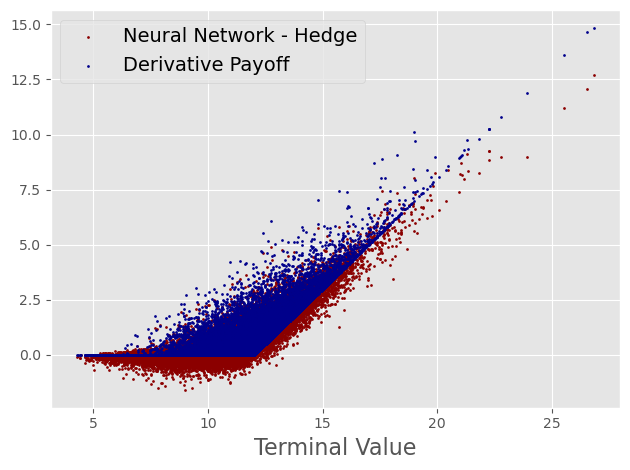

In [20]:
style.use('ggplot')
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price_non_M + delta_S_non_M,(BATCH_SIZE,1)),
            color = "darkred",label = "Neural Network - Hedge",s=2)
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
plt.xlabel("Terminal Value", fontsize=16)
plt.legend( fontsize=14)
plt.tight_layout()
plt.savefig('eps/fig_hedging_mc_path_dependent_non_Markovian.eps', format='eps')
plt.show()

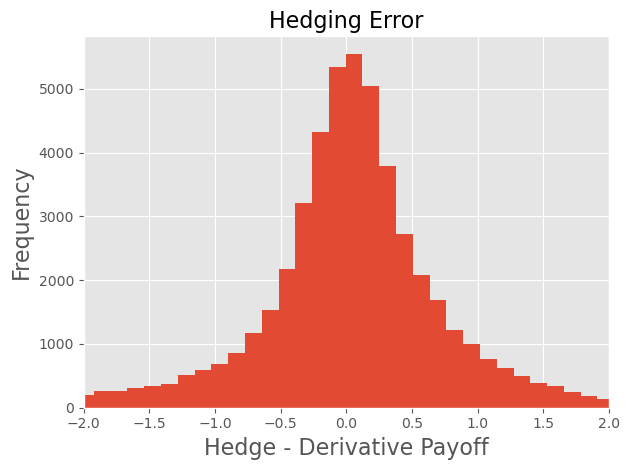

In [35]:
hedging_error_non_M = (((price_non_M + delta_S_non_M) - derivative_on_batch)/price_non_M).numpy()
plt.hist(hedging_error_non_M,100)
plt.xlim([-2,2])
plt.xlabel("Hedge - Derivative Payoff", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Hedging Error", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_histogram_path_dependent_non_Markovian.eps', format='eps')
plt.show()

# Part 3) 
# Difference between Non-Markovian and Markovian

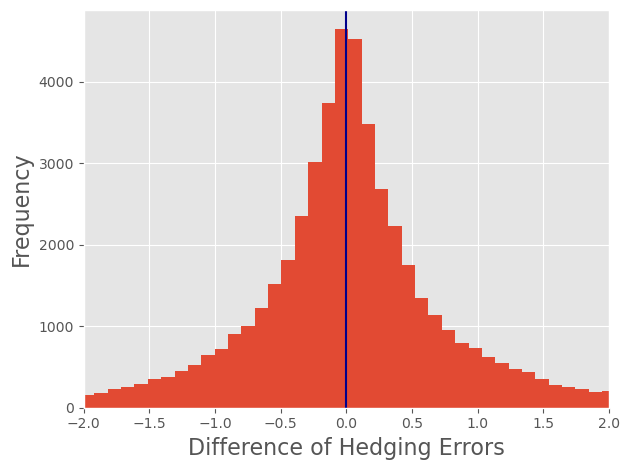

In [36]:
hedging_difference = np.abs(hedging_error) - np.abs(hedging_error_non_M)
plt.hist(hedging_difference,200)
plt.axvline(x=0,color="darkblue")
plt.xlim([-2,2])
plt.xlabel("Difference of Hedging Errors", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
#plt.title("Difference of Hedging Errors", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_histogram_path_dependent_difference_non_M.eps', format='eps')
plt.show()

### Absolute Errors

In [37]:
pd.DataFrame(np.abs(hedging_error_fix)*price_fix).describe()

,0
count,50000.000000
mean,0.596880
std,1.014555
min,0.000005
25%,0.041888
50%,0.137018
75%,0.698585
max,14.647886


Hedging Error of Markovian Strategy

In [38]:
pd.DataFrame(np.abs(hedging_error)*price).describe()

,0
count,5.000000e+04
mean,2.043847e-01
std,2.522303e-01
min,3.576279e-07
25%,5.117375e-02
50%,1.185193e-01
75%,2.589433e-01
max,4.149561e+00


Hedging Error of non-Markovian Strategy

In [39]:
pd.DataFrame(np.abs(hedging_error_non_M)*price_non_M).describe()

,0
count,50000.000000
mean,0.191683
std,0.220694
min,0.000004
25%,0.051896
50%,0.118660
75%,0.250002
max,3.178882


### Relative Errors

In [40]:
print("Price of the fix hedge: {}".format(price_fix))
print("Price of the robust hedge: {}".format(price))
print("Price of the robust non-Markovian hedge: {}".format(price_non_M))

Price of the fix hedge: 0.16774384677410126
Price of the robust hedge: 0.3489294946193695
Price of the robust non-Markovian hedge: 0.35001325607299805


In [41]:
pd.DataFrame(np.abs(hedging_error)).describe()

,0
count,50000.000000
mean,0.585754
std,0.722869
min,0.000001
25%,0.146659
50%,0.339666
75%,0.742108
max,11.892262


In [42]:
pd.DataFrame(np.abs(hedging_error_non_M)).describe()

,0
count,50000.000000
mean,0.547639
std,0.630531
min,0.000012
25%,0.148270
50%,0.339017
75%,0.714264
max,9.082176


In [43]:
pd.DataFrame(np.abs(hedging_error_fix)).describe()

,0
count,50000.000000
mean,3.558276
std,6.048223
min,0.000032
25%,0.249716
50%,0.816828
75%,4.164591
max,87.322945
